In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/staff-attire-detect-sample-video/sample.mp4


In [2]:
!nvidia-smi

Thu Oct 26 07:37:06 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   30C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)


Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5016.7/8062.4 GB disk)


In [4]:
import os
from ultralytics import YOLO
from IPython.display import display, Image

HOME = os.getcwd()
print(HOME)

/kaggle/working


In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

# Download the dataset version based on your modification 
# Simlpy choose the dataset you want and export with generated code as below
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="VgT3DjGuCJJ44HONUfRE")
project = rf.workspace("qi-ming").project("staff-attire-identification")
dataset = project.version(4).download("yolov8")

/kaggle/working/datasets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.3 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/155.3 kB ? eta -:--:--

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/178.7 kB ? eta -:--:--

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 19.1 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/58.8 kB ? eta -:--:--

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.6 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/49.1 MB ? eta -:--:--

     ━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/49.1 MB 151.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/49.1 MB 150.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━ 21.0/49.1 MB 173.1 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━ 21.0/49.1 MB 173.1 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━ 21.0/49.1 MB 173.1 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━ 21.0/49.1 MB 173.1 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━ 23.2/49.1 MB 39.1 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━ 28.2/49.1 MB 38.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━ 39.8/49.1 MB 173.1 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━ 39.8/49.1 MB 173.1 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━ 39.8/49.1 MB 173.1 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━ 39.8/49.1 MB 173.1 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━ 39.8/49.1 MB 173.1 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━ 45.9/49.1 MB 37.6 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━ 47.2/49.1 MB 37.3 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━ 47.2/49.1 MB 37.3 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━ 47.2/49.1 MB 37.3 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━ 47.2/49.1 MB 37.3 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 49.1/49.1 MB 20.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 49.1/49.1 MB 20.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 49.1/49.1 MB 20.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 49.1/49.1 MB 20.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 49.1/49.1 MB 20.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.5 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.3 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 9.0 MB/s eta 0:00:00


  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9


  Attempting uninstall: opencv-python-headless


    Found existing installation: opencv-python-headless 4.8.0.76
    Uninstalling opencv-python-headless-4.8.0.76:


      Successfully uninstalled opencv-python-headless-4.8.0.76


  Attempting uninstall: idna


    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
      Successfully uninstalled idna-3.4


  Attempting uninstall: cycler
    Found existing installation: cycler 0.11.0
    Uninstalling cycler-0.11.0:


      Successfully uninstalled cycler-0.11.0


  Attempting uninstall: certifi
    Found existing installation: certifi 2023.7.22
    Uninstalling certifi-2023.7.22:


      Successfully uninstalled certifi-2023.7.22


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyterlab-lsp 4.2.0 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
momepy 0.6.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
pytoolconfig 1.2.5 requires packaging>=22.0, but you have packaging 21.3 which is incompatible.
ydata-profiling 4.3.1 requires scipy<1.11,>=1.4.1, but you have scipy 1.11.2 which is incompatible.


A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5


loading Roboflow workspace...


loading Roboflow project...


Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`


Extracting Dataset Version Zip to Staff-Attire-Identification-4 in yolov8::   0%|          | 0/1668 [00:00<?, ?it/s]

Extracting Dataset Version Zip to Staff-Attire-Identification-4 in yolov8::  23%|██▎       | 380/1668 [00:00<00:00, 3797.30it/s]

Extracting Dataset Version Zip to Staff-Attire-Identification-4 in yolov8::  46%|████▌     | 760/1668 [00:00<00:00, 3642.31it/s]

Extracting Dataset Version Zip to Staff-Attire-Identification-4 in yolov8::  99%|█████████▊| 1643/1668 [00:00<00:00, 5956.36it/s]

Extracting Dataset Version Zip to Staff-Attire-Identification-4 in yolov8:: 100%|██████████| 1668/1668 [00:00<00:00, 5364.43it/s]

#### Train model

In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 imgsz=960 plots=True

/kaggle/working


  0%|                                               | 0.00/21.5M [00:00<?, ?B/s]

100%|███████████████████████████████████████| 21.5M/21.5M [00:00<00:00, 274MB/s]



Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)


yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/kaggle/working/datasets/Staff-Attire-Identification-4/data.yaml, epochs=100, patience=50, batch=16, imgsz=960, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms=False, lr0=0.01, lrf=0.

100%|████████████████████████████████████████| 755k/755k [00:00<00:00, 95.0MB/s]


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     


  0                  -1  1       928  ultralytics.nn.modules.Conv                  [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.C2f                   [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.Conv                  [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.C2f                   [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics.nn.modules.Conv                  [256, 512, 3, 2]              


  8                  -1  1   1838080  ultralytics.nn.modules.C2f                   [512, 512, 1, True]           
  9                  -1  1    656896  ultralytics.nn.modules.SPPF                  [512, 512, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.Concat                [1]                           
 12                  -1  1    591360  ultralytics.nn.modules.C2f                   [768, 256, 1]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.Concat                [1]                           
 15                  -1  1    148224  ultralytics.nn.modules.C2f                   [384, 128, 1]                 
 16                  -1  1    147712  ultralytics.nn.modules.Conv                  [128,

 21                  -1  1   1969152  ultralytics.nn.modules.C2f                   [768, 512, 1]                 
 22        [15, 18, 21]  1   2116435  ultralytics.nn.modules.Detect                [1, [128, 256, 512]]          


Model summary: 225 layers, 11135987 parameters, 11135971 gradients, 28.6 GFLOPs

Transferred 349/355 items from pretrained weights


optimizer: SGD(lr=0.01) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.001), 63 bias


train: Scanning /kaggle/working/datasets/Staff-Attire-Identification-4/train/lab

train: Scanning /kaggle/working/datasets/Staff-Attire-Identification-4/train/lab

train: Scanning /kaggle/working/datasets/Staff-Attire-Identification-4/train/lab

train: Scanning /kaggle/working/datasets/Staff-Attire-Identification-4/train/lab

train: Scanning /kaggle/working/datasets/Staff-Attire-Identification-4/train/lab

train: Scanning /kaggle/working/datasets/Staff-Attire-Identification-4/train/lab
train: New cache created: /kaggle/working/datasets/Staff-Attire-Identification-4/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
val: Scanning /kaggle/working/datasets/Staff-Attire-Identification-4/valid/label

val: Scanning /kaggle/working/datasets/Staff-Attire-Identification-4/valid/label
val: New cache created: /kaggle/working/datasets/Staff-Attire-Identification-4/valid/labels.cache


Image sizes 960 train, 960 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

      1/100      7.81G      3.037      238.2      1.302         24        960:  

      1/100      8.35G      3.055      177.4      1.402         24        960:  

      1/100      8.35G       2.79      143.5       1.36         20        960:  

      1/100      8.35G      2.714      155.9      1.296         15        960:  

      1/100      8.35G       2.74      145.9      1.287         17        960:  

      1/100      8.35G      2.755      146.8      1.283         23        960:  

      1/100      8.35G      2.894      150.8      1.298         18        960:  

      1/100      8.35G      2.926      159.5      1.288         18        960:  

      1/100      8.35G      2.888        153      1.282         20        960:  

      1/100      8.35G      2.892      152.1      1.273         15        960:  

      1/100      8.35G      2.861      153.3      1.254         17        960:  

      1/100      8.35G      2.822      152.2      1.238         17        960:  

      1/100      8.35G       2.86      156.3       1.28         26        960:  

      1/100      8.37G      2.804      150.3      1.285         22        960:  

      1/100      8.38G      2.815        147      1.288         24        960:  

      1/100      8.38G      2.832      141.1      1.286         25        960:  

      1/100      8.38G      2.827      134.8      1.286         17        960:  

      1/100      8.38G      2.762      128.4      1.273         19        960:  

      1/100      8.38G      2.768      122.4      1.264         14        960:  

      1/100      8.38G      2.752      116.6      1.257         28        960:  

      1/100      8.38G      2.738      111.4       1.26         15        960:  

      1/100      8.38G      2.716      106.5      1.251         17        960:  

      1/100      8.38G      2.687        102      1.244         14        960:  

      1/100      8.38G      2.675      97.84       1.24         21        960:  

      1/100      8.38G       2.65      94.04      1.233         23        960:  

      1/100      8.38G      2.629      90.51      1.227         16        960:  

      1/100      8.38G      2.606      87.23      1.218         26        960:  

      1/100      8.38G      2.599      84.18      1.211         23        960:  

      1/100      8.38G      2.577      81.38       1.21         16        960:  

      1/100      8.38G      2.576      78.75      1.206         20        960:  

      1/100      8.38G      2.568      76.26        1.2         20        960:  

      1/100      8.38G       2.56      73.94      1.202         11        960:  

      1/100      8.38G      2.554      71.76      1.197         20        960:  

      1/100      8.38G      2.546      69.71       1.19         23        960:  

      1/100      8.38G      2.544      67.77      1.185         21        960:  

      1/100      8.38G      2.527      65.95      1.179         15        960:  

      1/100      8.38G      2.522      64.23      1.176         14        960:  

      1/100      8.38G       2.51      62.61       1.17         16        960:  

      1/100      8.38G      2.504      61.06      1.169         17        960:  

      1/100      8.38G       2.48      59.61      1.166         15        960:  

      1/100      8.38G      2.466       58.2      1.162         17        960:  

      1/100      8.38G      2.461      56.86       1.16         22        960:  

      1/100      8.38G      2.445       55.6      1.156         18        960:  

      1/100      8.38G      2.438      54.39      1.152         14        960:  

      1/100      8.38G       2.43      53.22      1.145         28        960:  

      1/100      8.38G      2.423       52.1      1.142          2        960:  

      1/100      8.38G      2.423       52.1      1.142          2        960: 1

      1/100      8.38G      2.423       52.1      1.142          2        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.626      0.648      0.651      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

      2/100      8.39G      2.171      1.753     0.8904         31        960:  

      2/100      8.39G      2.269      1.791      1.041         21        960:  

      2/100      8.39G      2.268      1.661      1.041         20        960:  

      2/100      8.39G      2.172      1.788      1.033         17        960:  

      2/100      8.39G      2.234      1.709      1.022         20        960:  

      2/100      8.39G      2.256      1.674      1.023         16        960:  

      2/100      8.39G      2.264      1.672      1.018         15        960:  

      2/100      8.39G      2.273      1.755      1.027         18        960:  

      2/100      8.39G      2.262      1.817      1.022         27        960:  

      2/100      8.39G      2.238      1.762       1.01         20        960:  

      2/100      8.39G      2.208      1.704      1.003         17        960:  

      2/100      8.39G      2.183      1.686      1.008         16        960:  

      2/100      8.39G      2.165      1.666       1.01         18        960:  

      2/100      8.39G      2.148      1.667       1.01         25        960:  

      2/100      8.39G      2.129      1.694      1.012         20        960:  

      2/100      8.39G      2.122      1.663      1.012         16        960:  

      2/100      8.39G      2.124       1.63      1.013         19        960:  

      2/100      8.39G      2.115       1.68      1.018         23        960:  

      2/100      8.39G      2.101      1.704      1.013         13        960:  

      2/100      8.39G      2.101      1.671      1.011         24        960:  

      2/100      8.39G      2.109      1.657      1.009         18        960:  

      2/100      8.39G      2.111      1.656      1.011         18        960:  

      2/100      8.39G      2.122      1.656      1.012         17        960:  

      2/100      8.39G      2.128      1.668       1.01         17        960:  

      2/100      8.39G      2.137      1.685      1.011         15        960:  

      2/100      8.39G       2.13      1.698       1.01         21        960:  

      2/100      8.39G      2.113      1.675      1.009         15        960:  

      2/100      8.39G      2.118      1.658      1.015         24        960:  

      2/100      8.39G      2.122      1.648      1.017         14        960:  

      2/100      8.39G       2.13      1.631      1.016         26        960:  

      2/100      8.39G       2.13      1.617      1.017         22        960:  

      2/100      8.39G      2.138      1.612      1.019         20        960:  

      2/100      8.39G      2.141      1.615      1.021         17        960:  

      2/100      8.39G      2.136      1.625      1.022         18        960:  

      2/100      8.39G      2.133       1.64      1.023         19        960:  

      2/100      8.39G      2.134      1.642      1.022         14        960:  

      2/100      8.39G      2.138      1.647      1.021         11        960:  

      2/100      8.39G      2.134      1.669      1.019         21        960:  

      2/100      8.39G       2.13      1.654      1.018         18        960:  

      2/100      8.39G      2.125      1.642      1.016         20        960:  

      2/100      8.39G       2.12      1.629      1.018         17        960:  

      2/100      8.39G      2.121      1.617      1.019         27        960:  

      2/100      8.39G      2.126       1.61      1.018         18        960:  

      2/100      8.39G      2.127      1.602       1.02         20        960:  

      2/100      8.39G      2.126       1.59      1.021         19        960:  

      2/100      8.39G      2.143      1.585      1.021          4        960: 1

      2/100      8.39G      2.143      1.585      1.021          4        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         68         54      0.728      0.693      0.756      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

      3/100      8.39G      2.493      1.333      1.003         23        960:  

      3/100      8.39G      2.451      1.471      1.054         24        960:  

      3/100      8.39G      2.372      1.453      1.106         18        960:  

      3/100      8.39G      2.418      1.477      1.079         20        960:  

      3/100      8.39G       2.42      1.439      1.047         18        960:  

      3/100      8.39G      2.443      1.442      1.044         20        960:  

      3/100      8.39G      2.414      1.431       1.04         16        960:  

      3/100      8.39G      2.365      1.396      1.032         20        960:  

      3/100      8.39G      2.364      1.369      1.033         15        960:  

      3/100      8.39G      2.357      1.372      1.029         22        960:  

      3/100      8.39G      2.354      1.375      1.028         15        960:  

      3/100      8.39G      2.354      1.375      1.028         15        960:  

      3/100      8.39G      2.324      1.354      1.022         19        960:  

      3/100      8.39G      2.328      1.344      1.023         14        960:  

      3/100      8.39G      2.341      1.344      1.026         21        960:  

      3/100      8.39G      2.321      1.344      1.019         20        960:  

      3/100      8.39G      2.328      1.333      1.018         18        960:  

      3/100      8.39G      2.315      1.354      1.014         19        960:  

      3/100      8.39G      2.304      1.357       1.02         20        960:  

      3/100      8.39G      2.271      1.401      1.018         18        960:  

      3/100      8.39G      2.265      1.393      1.016         22        960:  

      3/100      8.39G      2.259      1.426      1.023         20        960:  

      3/100      8.39G      2.254      1.423       1.02         25        960:  

      3/100      8.39G       2.24      1.455       1.02         17        960:  

      3/100      8.39G      2.228      1.474       1.02         17        960:  

      3/100      8.39G      2.222      1.498      1.018         19        960:  

      3/100      8.39G      2.213      1.516      1.014         13        960:  

      3/100      8.39G      2.206      1.514      1.013         26        960:  

      3/100      8.39G      2.209      1.538      1.014         18        960:  

      3/100      8.39G      2.215      1.559      1.014         22        960:  

      3/100      8.39G      2.202      1.554      1.013         17        960:  

      3/100      8.39G      2.201      1.574      1.013         19        960:  

      3/100      8.39G      2.196      1.589      1.013         22        960:  

      3/100      8.39G      2.189      1.597       1.01         20        960:  

      3/100      8.39G      2.191      1.608      1.013         17        960:  

      3/100      8.39G       2.19      1.597      1.013         23        960:  

      3/100      8.39G      2.183       1.59      1.012         22        960:  

      3/100      8.39G      2.177      1.576      1.012         25        960:  

      3/100      8.39G       2.18      1.571      1.012         18        960:  

      3/100      8.39G       2.18      1.571      1.012         18        960:  

      3/100      8.39G      2.176      1.571      1.012         24        960:  

      3/100      8.39G      2.161      1.582      1.011         12        960:  

      3/100      8.39G      2.152      1.596      1.013         23        960:  

      3/100      8.39G       2.15        1.6      1.011         20        960:  

      3/100      8.39G      2.157      1.618      1.013         21        960:  

      3/100      8.39G      2.152      1.624      1.014         20        960:  

      3/100      8.39G      2.158      1.628      1.014         16        960:  

      3/100      8.39G      2.146      1.649      1.013          2        960: 1

      3/100      8.39G      2.146      1.649      1.013          2        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.894      0.796       0.85      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

      4/100      8.39G      2.195      1.355       1.05         16        960:  

      4/100      8.39G      1.993      1.434     0.9906         17        960:  

      4/100      8.39G      1.921      1.412     0.9717         14        960:  

      4/100      8.39G      2.037      1.386       1.04         19        960:  

      4/100      8.39G      2.033      1.357       1.03         17        960:  

      4/100      8.39G      2.043      1.418      1.031         22        960:  

      4/100      8.39G      2.054      1.395      1.024         24        960:  

      4/100      8.39G      2.054      1.395      1.024         24        960:  

      4/100      8.39G      2.063      1.364      1.025         28        960:  

      4/100      8.39G      2.097      1.359      1.033         23        960:  

      4/100      8.39G      2.099      1.364      1.023         14        960:  

      4/100      8.39G      2.097      1.346      1.028         19        960:  

      4/100      8.39G      2.102      1.349      1.031         25        960:  

      4/100      8.39G       2.14      1.539       1.04         21        960:  

      4/100      8.39G       2.15      1.615       1.04         20        960:  

      4/100      8.39G      2.174        1.8      1.036         13        960:  

      4/100      8.39G      2.175      1.858      1.038         20        960:  

      4/100      8.39G      2.201      1.865      1.043         20        960:  

      4/100      8.39G      2.241      1.868      1.039         23        960:  

      4/100      8.39G      2.236       1.91      1.052         17        960:  

      4/100      8.39G      2.243      1.901      1.053         21        960:  

      4/100      8.39G       2.23      1.881      1.051         23        960:  

      4/100      8.39G      2.235      1.869      1.047         19        960:  

      4/100      8.39G      2.234      1.869      1.054         21        960:  

      4/100      8.39G      2.218       1.84      1.051         21        960:  

      4/100      8.39G      2.225      1.837      1.053         17        960:  

      4/100      8.39G      2.227      1.829      1.052         18        960:  

      4/100      8.39G      2.217      1.827      1.054         22        960:  

      4/100      8.39G      2.221      1.838      1.071         20        960:  

      4/100      8.39G      2.222      1.862      1.069         22        960:  

      4/100      8.39G      2.219      1.895      1.067         29        960:  

      4/100      8.39G      2.223      1.909      1.078         17        960:  

      4/100      8.39G      2.217       1.92      1.076         21        960:  

      4/100      8.39G       2.21      1.897      1.073         23        960:  

      4/100      8.39G      2.212      1.874      1.069         16        960:  

      4/100      8.39G      2.211      1.854      1.068         16        960:  

      4/100      8.39G      2.211      1.839      1.069         16        960:  

      4/100      8.39G      2.207       1.82      1.065         14        960:  

      4/100      8.39G      2.207       1.82      1.065         14        960:  

      4/100      8.39G      2.205      1.817      1.066         22        960:  

      4/100      8.39G      2.208      1.805      1.065         25        960:  

      4/100      8.39G      2.201      1.789       1.07         17        960:  

      4/100      8.39G      2.203      1.783      1.066         14        960:  

      4/100      8.39G      2.201      1.771      1.066         17        960:  

      4/100      8.39G      2.214      1.763      1.065         26        960:  

      4/100      8.39G      2.209      1.746      1.063         14        960:  

      4/100      8.39G      2.212      1.739      1.071         18        960:  

      4/100      8.39G      2.222      1.748      1.069          6        960: 1

      4/100      8.39G      2.222      1.748      1.069          6        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.642      0.741      0.695      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

      5/100      8.39G      2.435      1.376      1.112         15        960:  

      5/100      8.39G      2.389      1.413      1.096         16        960:  

      5/100      8.39G      2.547      1.483      1.146         21        960:  

      5/100      8.39G      2.436      1.491      1.129         18        960:  

      5/100      8.39G      2.417      1.504      1.121         19        960:  

      5/100      8.39G      2.362      1.524      1.114         21        960:  

      5/100      8.39G      2.308      1.593      1.133         13        960:  

      5/100      8.39G      2.301      1.582      1.141         29        960:  

      5/100      8.39G      2.278      1.523      1.133         16        960:  

      5/100      8.39G      2.235      1.476      1.115         24        960:  

      5/100      8.39G      2.254      1.548       1.14         25        960:  

      5/100      8.39G       2.23      1.561      1.129         16        960:  

      5/100      8.39G      2.216       1.55      1.119         20        960:  

      5/100      8.39G      2.196      1.542      1.112         17        960:  

      5/100      8.39G      2.202      1.519      1.102         13        960:  

      5/100      8.39G      2.193      1.503      1.094         18        960:  

      5/100      8.39G      2.198      1.496      1.101         24        960:  

      5/100      8.39G      2.192      1.471      1.098         18        960:  

      5/100      8.39G      2.186      1.476      1.096         15        960:  

      5/100      8.39G      2.196      1.486      1.094         20        960:  

      5/100      8.39G      2.193      1.541      1.092         14        960:  

      5/100      8.39G      2.189       1.55      1.088         19        960:  

      5/100      8.39G      2.181      1.537      1.081         14        960:  

      5/100      8.39G      2.179      1.516      1.078         26        960:  

      5/100      8.39G      2.171      1.496      1.072         24        960:  

      5/100      8.39G      2.168      1.482      1.066         19        960:  

      5/100      8.39G      2.168      1.482      1.066         19        960:  

      5/100      8.39G       2.18      1.474      1.061         25        960:  

      5/100      8.39G      2.173      1.477      1.054         23        960:  

      5/100      8.39G      2.179      1.482      1.053         18        960:  

      5/100      8.39G      2.183      1.477      1.051         28        960:  

      5/100      8.39G       2.18      1.473      1.052         14        960:  

      5/100      8.39G      2.176      1.461      1.054         21        960:  

      5/100      8.39G      2.174       1.45      1.051         21        960:  

      5/100      8.39G      2.174      1.437       1.05         18        960:  

      5/100      8.39G      2.174      1.435       1.05         11        960:  

      5/100      8.39G      2.177      1.434      1.053         24        960:  

      5/100      8.39G      2.174      1.428      1.051         16        960:  

      5/100      8.39G      2.175       1.43      1.049         17        960:  

      5/100      8.39G      2.178      1.435      1.044         24        960:  

      5/100      8.39G      2.194      1.456      1.049         22        960:  

      5/100      8.39G      2.188      1.453      1.052         22        960:  

      5/100      8.39G      2.192      1.461      1.052         20        960:  

      5/100      8.39G      2.199      1.462      1.053         21        960:  

      5/100      8.39G      2.207      1.467      1.058         32        960:  

      5/100      8.39G      2.211      1.469      1.065         18        960:  

      5/100      8.39G      2.211      1.465       1.07          2        960: 1

      5/100      8.39G      2.211      1.465       1.07          2        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.727      0.692       0.76      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

      6/100      8.39G      2.314      1.073      1.017         20        960:  

      6/100      8.39G      2.244      1.186      1.017         26        960:  

      6/100      8.39G      2.149      1.143     0.9838         26        960:  

      6/100      8.39G      2.068      1.137      1.012         15        960:  

      6/100      8.39G      2.079      1.169      1.019         20        960:  

      6/100      8.39G      2.078       1.19       1.02         16        960:  

      6/100      8.39G      2.117      1.228       1.02         26        960:  

      6/100      8.39G      2.121      1.261      1.034         16        960:  

      6/100      8.39G      2.103      1.269      1.033         16        960:  

      6/100      8.39G      2.087      1.288      1.026         23        960:  

      6/100      8.39G      2.117       1.31       1.02         20        960:  

      6/100      8.39G      2.118        1.3       1.02         21        960:  

      6/100      8.39G       2.15      1.309      1.021         24        960:  

      6/100      8.39G       2.15      1.298      1.022         22        960:  

      6/100      8.39G      2.167      1.293      1.024         14        960:  

      6/100      8.39G      2.155      1.305      1.026         16        960:  

      6/100      8.39G      2.168      1.327      1.031         25        960:  

      6/100      8.39G      2.193      1.368       1.03         19        960:  

      6/100      8.39G      2.193      1.368       1.03         19        960:  

      6/100      8.39G      2.205      1.379      1.027         24        960:  

      6/100      8.39G       2.21      1.388      1.026         11        960:  

      6/100      8.39G      2.202      1.379      1.024         20        960:  

      6/100      8.39G      2.179      1.372      1.022         21        960:  

      6/100      8.39G      2.178      1.362      1.021         25        960:  

      6/100      8.39G      2.179      1.369      1.016         17        960:  

      6/100      8.39G       2.18      1.357      1.012         23        960:  

      6/100      8.39G      2.186      1.359      1.013         21        960:  

      6/100      8.39G      2.183      1.349      1.011         21        960:  

      6/100      8.39G      2.177       1.34      1.008         10        960:  

      6/100      8.39G      2.168      1.337      1.009         24        960:  

      6/100      8.39G      2.165      1.324      1.008         21        960:  

      6/100      8.39G      2.161       1.32      1.011         17        960:  

      6/100      8.39G      2.159      1.311      1.013         19        960:  

      6/100      8.39G      2.161      1.305      1.013         20        960:  

      6/100      8.39G       2.16      1.296      1.013         20        960:  

      6/100      8.39G      2.175      1.297      1.022         21        960:  

      6/100      8.39G       2.17      1.288      1.022         22        960:  

      6/100      8.39G      2.165      1.278      1.022         21        960:  

      6/100      8.39G      2.166      1.287      1.026         23        960:  

      6/100      8.39G      2.174      1.286      1.025         23        960:  

      6/100      8.39G      2.171       1.28      1.028         19        960:  

      6/100      8.39G      2.169      1.273      1.026         25        960:  

      6/100      8.39G      2.171      1.277      1.026         23        960:  

      6/100      8.39G      2.169      1.277      1.026         20        960:  

      6/100      8.39G      2.169      1.274      1.025         17        960:  

      6/100      8.39G      2.161      1.275      1.024         14        960:  

      6/100      8.39G      2.146       1.27       1.02          3        960: 1

      6/100      8.39G      2.146       1.27       1.02          3        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54       0.88      0.811       0.86      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

      7/100      8.39G      2.035      1.032     0.9081         17        960:  

      7/100      8.39G      1.893      1.087     0.9159         24        960:  

      7/100      8.39G      2.083      1.097     0.9529         19        960:  

      7/100      8.39G      2.178      1.106     0.9857         26        960:  

      7/100      8.39G      2.196      1.083     0.9931         16        960:  

      7/100      8.39G      2.228        1.1          1         19        960:  

      7/100      8.39G      2.178      1.069     0.9958         20        960:  

      7/100      8.39G      2.203      1.065      1.001         24        960:  

      7/100      8.39G      2.188      1.094      1.011         27        960:  

      7/100      8.39G      2.197      1.099      1.036         18        960:  

      7/100      8.39G       2.19      1.118       1.04         18        960:  

      7/100      8.39G      2.205       1.12      1.042         15        960:  

      7/100      8.39G      2.209      1.126      1.072         14        960:  

      7/100      8.39G       2.22      1.134      1.073         19        960:  

      7/100      8.39G      2.212      1.132       1.07         17        960:  

      7/100      8.39G      2.206      1.132      1.067         21        960:  

      7/100      8.39G      2.216      1.139      1.064         18        960:  

      7/100      8.39G       2.22      1.141      1.058         18        960:  

      7/100      8.39G      2.219      1.149      1.063         17        960:  

      7/100      8.39G      2.232      1.149      1.058         21        960:  

      7/100      8.39G      2.243      1.163      1.061         16        960:  

      7/100      8.39G      2.239      1.159      1.056         20        960:  

      7/100      8.39G      2.236      1.161      1.053         25        960:  

      7/100      8.39G      2.224      1.156      1.052         17        960:  

      7/100      8.39G      2.229      1.163      1.052         22        960:  

      7/100      8.39G      2.225      1.165       1.05         22        960:  

      7/100      8.39G      2.219      1.158      1.046         22        960:  

      7/100      8.39G      2.217      1.156      1.055         21        960:  

      7/100      8.39G      2.227      1.171      1.056         14        960:  

      7/100      8.39G      2.224      1.172      1.054         15        960:  

      7/100      8.39G      2.225      1.168      1.052         22        960:  

      7/100      8.39G      2.224      1.167      1.049         20        960:  

      7/100      8.39G      2.227      1.175      1.047         17        960:  

      7/100      8.39G      2.225      1.176      1.043         17        960:  

      7/100      8.39G      2.224       1.18      1.045         19        960:  

      7/100      8.39G      2.217       1.18      1.042         19        960:  

      7/100      8.39G      2.217      1.176      1.038         19        960:  

      7/100      8.39G       2.21      1.169      1.037         15        960:  

      7/100      8.39G      2.206      1.163      1.034         26        960:  

      7/100      8.39G      2.198      1.158      1.031         25        960:  

      7/100      8.39G      2.194      1.153      1.034         13        960:  

      7/100      8.39G      2.193      1.152      1.034         17        960:  

      7/100      8.39G      2.187      1.147      1.037         18        960:  

      7/100      8.39G      2.183      1.144      1.035         21        960:  

      7/100      8.39G      2.181      1.144      1.034         20        960:  

      7/100      8.39G      2.206       1.15      1.034          8        960: 1

      7/100      8.39G      2.206       1.15      1.034          8        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         68         54      0.784      0.741      0.809      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

      8/100      8.39G      2.672       1.37     0.9696         20        960:  

      8/100      8.39G      2.179      1.154     0.9566         11        960:  

      8/100      8.39G      2.232      1.226     0.9737         29        960:  

      8/100      8.39G      2.232      1.226     0.9737         29        960:  

      8/100      8.39G      2.238      1.289     0.9812         25        960:  

      8/100      8.39G      2.248      1.249      1.006         26        960:  

      8/100      8.39G      2.207      1.244      1.005         18        960:  

      8/100      8.39G      2.197      1.283      1.031         21        960:  

      8/100      8.39G      2.224      1.278      1.036         15        960:  

      8/100      8.39G      2.203       1.23      1.029         17        960:  

      8/100      8.39G      2.145      1.225      1.023         13        960:  

      8/100      8.39G      2.135      1.211      1.022         17        960:  

      8/100      8.39G      2.117      1.189       1.02         15        960:  

      8/100      8.39G      2.123       1.19       1.03         18        960:  

      8/100      8.39G      2.107      1.172      1.023         22        960:  

      8/100      8.39G      2.128      1.187      1.048         19        960:  

      8/100      8.39G      2.139      1.187      1.048         19        960:  

      8/100      8.39G      2.142      1.188      1.049         11        960:  

      8/100      8.39G      2.158      1.176      1.049         18        960:  

      8/100      8.39G      2.146       1.17      1.043         21        960:  

      8/100      8.39G      2.175       1.17       1.06         17        960:  

      8/100      8.39G      2.182      1.176      1.057         15        960:  

      8/100      8.39G      2.174      1.167      1.056         18        960:  

      8/100      8.39G      2.179      1.159      1.063         19        960:  

      8/100      8.39G       2.16      1.149      1.061         18        960:  

      8/100      8.39G      2.145      1.167      1.058         17        960:  

      8/100      8.39G       2.16      1.161      1.057         20        960:  

      8/100      8.39G      2.164      1.159      1.054         21        960:  

      8/100      8.39G      2.161      1.153      1.051         26        960:  

      8/100      8.39G      2.165       1.15      1.052         18        960:  

      8/100      8.39G       2.17       1.16      1.058         21        960:  

      8/100      8.39G      2.158      1.157      1.055         19        960:  

      8/100      8.39G      2.157      1.154      1.054         24        960:  

      8/100      8.39G      2.145      1.146       1.05         18        960:  

      8/100      8.39G      2.145      1.157      1.058         14        960:  

      8/100      8.39G      2.145      1.157      1.058         14        960:  

      8/100      8.39G      2.138       1.15      1.057         15        960:  

      8/100      8.39G      2.132      1.148      1.054         18        960:  

      8/100      8.39G      2.139       1.15      1.051         15        960:  

      8/100      8.39G       2.14       1.15      1.052         14        960:  

      8/100      8.39G      2.142      1.154      1.055         20        960:  

      8/100      8.39G      2.147      1.149      1.054         13        960:  

      8/100      8.39G       2.14      1.158      1.054         18        960:  

      8/100      8.39G      2.148       1.16      1.055         16        960:  

      8/100      8.39G       2.15      1.156      1.054         21        960:  

      8/100      8.39G      2.151      1.156      1.056         19        960:  

      8/100      8.39G      2.144      1.151      1.057         20        960:  

      8/100      8.39G      2.133       1.15      1.056          3        960: 1

      8/100      8.39G      2.133       1.15      1.056          3        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.816      0.741      0.813      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

      9/100      8.39G      2.332     0.9542      1.321         21        960:  

      9/100      8.39G      2.163      1.029      1.195         16        960:  

      9/100      8.39G       2.17      1.069      1.143         26        960:  

      9/100      8.39G      2.143      1.059      1.135         23        960:  

      9/100      8.39G      2.176      1.113      1.145         24        960:  

      9/100      8.39G      2.188      1.078       1.11         23        960:  

      9/100      8.39G      2.146      1.069      1.091         19        960:  

      9/100      8.39G      2.154      1.052      1.079         19        960:  

      9/100      8.39G      2.158      1.065      1.079         15        960:  

      9/100      8.39G      2.165      1.072      1.068         21        960:  

      9/100      8.39G      2.147      1.095      1.064         16        960:  

      9/100      8.39G      2.184      1.107      1.077         22        960:  

      9/100      8.39G      2.163      1.105       1.07         19        960:  

      9/100      8.39G      2.171      1.098       1.07         20        960:  

      9/100      8.39G      2.163      1.105       1.07         32        960:  

      9/100      8.39G      2.167      1.102      1.068         17        960:  

      9/100      8.39G      2.157       1.09      1.068         19        960:  

      9/100      8.39G      2.149      1.079      1.063         19        960:  

      9/100      8.39G      2.149      1.072      1.055         24        960:  

      9/100      8.39G      2.149      1.072      1.055         24        960:  

      9/100      8.39G      2.143      1.068      1.057         15        960:  

      9/100      8.39G      2.141       1.07      1.054         17        960:  

      9/100      8.39G      2.165      1.083      1.061         24        960:  

      9/100      8.39G      2.185      1.091      1.055         14        960:  

      9/100      8.39G      2.186      1.087       1.05         32        960:  

      9/100      8.39G      2.184      1.087      1.049         15        960:  

      9/100      8.39G      2.183      1.089      1.054         17        960:  

      9/100      8.39G      2.185        1.1       1.05         25        960:  

      9/100      8.39G       2.17      1.098      1.048         15        960:  

      9/100      8.39G       2.17        1.1      1.042         21        960:  

      9/100      8.39G      2.172      1.102       1.04         20        960:  

      9/100      8.39G      2.174        1.1      1.039         21        960:  

      9/100      8.39G       2.18      1.101      1.035         22        960:  

      9/100      8.39G      2.177      1.101      1.034         16        960:  

      9/100      8.39G      2.171        1.1      1.034         20        960:  

      9/100      8.39G      2.162      1.098      1.033         19        960:  

      9/100      8.39G       2.16      1.099       1.03         17        960:  

      9/100      8.39G      2.154      1.098      1.031         23        960:  

      9/100      8.39G      2.149      1.097      1.031         19        960:  

      9/100      8.39G      2.145      1.097      1.032         14        960:  

      9/100      8.39G      2.148      1.102      1.045         22        960:  

      9/100      8.39G      2.144      1.101      1.043         13        960:  

      9/100      8.39G      2.145      1.101       1.04         19        960:  

      9/100      8.39G      2.144      1.098      1.038         21        960:  

      9/100      8.39G      2.145      1.094      1.038         20        960:  

      9/100      8.39G       2.14      1.091      1.036         17        960:  

      9/100      8.39G      2.141      1.089      1.037          4        960: 1

      9/100      8.39G      2.141      1.089      1.037          4        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         68         54      0.819      0.741      0.831      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     10/100      8.39G      1.521       1.29     0.8587         23        960:  

     10/100      8.39G      1.881       1.21     0.9341         19        960:  

     10/100      8.39G      1.961      1.111     0.9365         21        960:  

     10/100      8.39G      1.994      1.109     0.9355         13        960:  

     10/100      8.39G       2.01      1.097     0.9344         17        960:  

     10/100      8.39G      2.014      1.103     0.9389         17        960:  

     10/100      8.39G      2.012      1.105     0.9541         21        960:  

     10/100      8.39G      2.033      1.156     0.9508         24        960:  

     10/100      8.39G      2.039      1.153     0.9565         22        960:  

     10/100      8.39G      2.035       1.14     0.9773         20        960:  

     10/100      8.39G      2.061      1.127      0.974         21        960:  

     10/100      8.39G      2.046      1.115     0.9778         19        960:  

     10/100      8.39G       2.03      1.103     0.9797         15        960:  

     10/100      8.39G      2.038       1.09     0.9989         14        960:  

     10/100      8.39G      2.038       1.09     0.9989         14        960:  

     10/100      8.39G      2.041      1.087     0.9939         25        960:  

     10/100      8.39G       2.05      1.083     0.9936         25        960:  

     10/100      8.39G      2.064      1.091     0.9957         24        960:  

     10/100      8.39G      2.065      1.086      1.004         11        960:  

     10/100      8.39G      2.057       1.07      1.004         18        960:  

     10/100      8.39G      2.062      1.062      1.005         14        960:  

     10/100      8.39G      2.064      1.063      1.007          7        960:  

     10/100      8.39G      2.052      1.059      1.012         15        960:  

     10/100      8.39G      2.048      1.056      1.008         19        960:  

     10/100      8.39G      2.051      1.056      1.008         15        960:  

     10/100      8.39G      2.047      1.066      1.026         27        960:  

     10/100      8.39G      2.042      1.062      1.021         22        960:  

     10/100      8.39G      2.043      1.063      1.019         20        960:  

     10/100      8.39G      2.051      1.062      1.018         15        960:  

     10/100      8.39G      2.064      1.066      1.019         16        960:  

     10/100      8.39G      2.058      1.064      1.016         19        960:  

     10/100      8.39G      2.055      1.068      1.018         18        960:  

     10/100      8.39G      2.052      1.081      1.018         24        960:  

     10/100      8.39G      2.049      1.077      1.016         17        960:  

     10/100      8.39G      2.057      1.078      1.014         17        960:  

     10/100      8.39G      2.044      1.072      1.012         16        960:  

     10/100      8.39G      2.044      1.072      1.012         16        960:  

     10/100      8.39G      2.044      1.079      1.019         26        960:  

     10/100      8.39G      2.046      1.078      1.019         22        960:  

     10/100      8.39G      2.046      1.081      1.016         24        960:  

     10/100      8.39G      2.045      1.079      1.016         20        960:  

     10/100      8.39G      2.046      1.084      1.014         15        960:  

     10/100      8.39G      2.045       1.08      1.014         16        960:  

     10/100      8.39G      2.041      1.076      1.012         18        960:  

     10/100      8.39G      2.033      1.073      1.013         17        960:  

     10/100      8.39G      2.029       1.07      1.013         15        960:  

     10/100      8.39G      2.045      1.076      1.014         18        960:  

     10/100      8.39G      2.049      1.085      1.014          5        960: 1

     10/100      8.39G      2.049      1.085      1.014          5        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.957      0.828      0.884      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     11/100      8.39G      1.933     0.9651     0.9403         19        960:  

     11/100      8.39G      1.954     0.9938     0.9496         16        960:  

     11/100      8.39G      2.024      1.059      1.015         19        960:  

     11/100      8.39G      2.019      1.003      0.992         27        960:  

     11/100      8.39G      2.021      1.009      1.015         16        960:  

     11/100      8.39G      1.975      1.027      1.006         14        960:  

     11/100      8.39G      2.009      1.026      1.002         18        960:  

     11/100      8.39G      2.027      1.006      1.021         16        960:  

     11/100      8.39G      2.046     0.9929      1.017         25        960:  

     11/100      8.39G      2.029     0.9942       1.01         26        960:  

     11/100      8.39G      2.073       1.04      1.025         17        960:  

     11/100      8.39G      2.083      1.048      1.026         20        960:  

     11/100      8.39G      2.087      1.037      1.016         17        960:  

     11/100      8.39G        2.1      1.032      1.015         16        960:  

     11/100      8.39G      2.093      1.037      1.011         14        960:  

     11/100      8.39G      2.108      1.034      1.012         13        960:  

     11/100      8.39G      2.088      1.024      1.009         17        960:  

     11/100      8.39G      2.075      1.025      1.018         16        960:  

     11/100      8.39G      2.066      1.018      1.018         20        960:  

     11/100      8.39G      2.064      1.019      1.015         17        960:  

     11/100      8.39G      2.068      1.025      1.013         20        960:  

     11/100      8.39G      2.077      1.023      1.012         24        960:  

     11/100      8.39G       2.08      1.023      1.014         20        960:  

     11/100      8.39G      2.097      1.036      1.019         21        960:  

     11/100      8.39G      2.092      1.038      1.016         19        960:  

     11/100      8.39G      2.092      1.033      1.014         22        960:  

     11/100      8.39G      2.083      1.027      1.014         21        960:  

     11/100      8.39G      2.078      1.025      1.011         18        960:  

     11/100      8.39G      2.086      1.039      1.009         11        960:  

     11/100      8.39G      2.088      1.038      1.003         15        960:  

     11/100      8.39G       2.09      1.044      1.005         25        960:  

     11/100      8.39G      2.089      1.042      1.003         23        960:  

     11/100      8.39G      2.088      1.037      1.003         21        960:  

     11/100      8.39G      2.095      1.033      1.002         19        960:  

     11/100      8.39G      2.084      1.028      0.998         20        960:  

     11/100      8.39G      2.077      1.026     0.9975         19        960:  

     11/100      8.39G      2.087      1.027      1.004         15        960:  

     11/100      8.39G      2.095      1.029      1.006         26        960:  

     11/100      8.39G      2.091      1.028      1.007         24        960:  

     11/100      8.39G      2.091      1.026      1.008         20        960:  

     11/100      8.39G      2.092       1.05      1.018         22        960:  

     11/100      8.39G      2.092      1.051      1.017         25        960:  

     11/100      8.39G      2.091      1.054      1.016         22        960:  

     11/100      8.39G      2.092      1.055      1.017         11        960:  

     11/100      8.39G      2.095      1.055      1.014         17        960:  

     11/100      8.39G      2.107      1.059      1.018          2        960: 1

     11/100      8.39G      2.107      1.059      1.018          2        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         68         54      0.832      0.796        0.8      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     12/100      8.39G      2.013     0.9643     0.8955         17        960:  

     12/100      8.39G       2.03     0.9727     0.9107         19        960:  

     12/100      8.39G      2.027     0.9953     0.9214         21        960:  

     12/100      8.39G      1.944     0.9817     0.9252         11        960:  

     12/100      8.39G      1.944     0.9817     0.9252         11        960:  

     12/100      8.39G       2.02      1.001     0.9451         17        960:  

     12/100      8.39G      2.048      1.026     0.9762         24        960:  

     12/100      8.39G      2.064      1.044     0.9734         23        960:  

     12/100      8.39G      2.084      1.052     0.9662         17        960:  

     12/100      8.39G      2.089      1.077     0.9748         22        960:  

     12/100      8.39G      2.101      1.087     0.9687         22        960:  

     12/100      8.39G      2.093      1.079     0.9724         19        960:  

     12/100      8.39G      2.097      1.073      0.979         22        960:  

     12/100      8.39G      2.084      1.078     0.9797         32        960:  

     12/100      8.39G      2.081      1.069     0.9911         21        960:  

     12/100      8.39G      2.087      1.078     0.9903         16        960:  

     12/100      8.39G      2.076      1.064     0.9867         17        960:  

     12/100      8.39G      2.074      1.061     0.9871         20        960:  

     12/100      8.39G      2.085      1.069     0.9858         25        960:  

     12/100      8.39G      2.105       1.07     0.9912         20        960:  

     12/100      8.39G      2.086      1.069     0.9869         16        960:  

     12/100      8.39G       2.08      1.064     0.9811         22        960:  

     12/100      8.39G       2.08      1.062     0.9802         19        960:  

     12/100      8.39G      2.085      1.066     0.9922         32        960:  

     12/100      8.39G      2.078      1.067      1.005         18        960:  

     12/100      8.39G      2.086      1.075      1.007         14        960:  

     12/100      8.39G      2.081      1.078      1.006         15        960:  

     12/100      8.39G       2.08      1.079      1.017         23        960:  

     12/100      8.39G      2.076      1.075      1.012         26        960:  

     12/100      8.39G      2.072      1.082      1.011         18        960:  

     12/100      8.39G      2.065       1.08      1.008         17        960:  

     12/100      8.39G      2.065      1.072      1.011         13        960:  

     12/100      8.39G      2.058      1.066       1.01         22        960:  

     12/100      8.39G      2.064      1.069       1.01         17        960:  

     12/100      8.39G      2.068      1.077      1.016         24        960:  

     12/100      8.39G      2.071      1.078      1.017         26        960:  

     12/100      8.39G      2.077      1.076      1.016         24        960:  

     12/100      8.39G      2.069      1.069      1.013         21        960:  

     12/100      8.39G      2.062      1.067      1.011         21        960:  

     12/100      8.39G      2.059      1.066      1.013         17        960:  

     12/100      8.39G       2.06      1.068      1.011         27        960:  

     12/100      8.39G      2.059      1.069       1.01         22        960:  

     12/100      8.39G      2.058      1.065       1.01         22        960:  

     12/100      8.39G      2.053      1.061       1.01         15        960:  

     12/100      8.39G      2.052      1.061      1.007         15        960:  

     12/100      8.39G      2.049      1.063      1.006         21        960:  

     12/100      8.39G      2.077      1.062      1.004          3        960: 1

     12/100      8.39G      2.077      1.062      1.004          3        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.942      0.685       0.79      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     13/100      8.39G      2.148     0.9606      1.116         24        960:  

     13/100      8.39G      2.266     0.9627      1.077         19        960:  

     13/100      8.39G      2.122      0.976      1.039         18        960:  

     13/100      8.39G      2.071      0.976      1.011         24        960:  

     13/100      8.39G      2.067     0.9543      1.012         27        960:  

     13/100      8.39G      2.039     0.9328      1.006         17        960:  

     13/100      8.39G      2.002     0.9776      1.016         14        960:  

     13/100      8.39G      2.017     0.9858      1.013         25        960:  

     13/100      8.39G      1.998      0.974     0.9982         28        960:  

     13/100      8.39G      1.984     0.9875      1.013         16        960:  

     13/100      8.39G      1.982     0.9733      1.002         25        960:  

     13/100      8.39G      1.979     0.9713     0.9985         26        960:  

     13/100      8.39G      1.971     0.9809     0.9979         18        960:  

     13/100      8.39G      1.974     0.9709     0.9915         21        960:  

     13/100      8.39G      2.001     0.9905     0.9912         15        960:  

     13/100      8.39G      2.016     0.9921     0.9881         23        960:  

     13/100      8.39G      2.028      1.019          1         17        960:  

     13/100      8.39G      2.021      1.015      1.001         26        960:  

     13/100      8.39G      2.018       1.01     0.9983         27        960:  

     13/100      8.39G      2.028      1.003      1.002         16        960:  

     13/100      8.39G      2.028      1.002      1.003         21        960:  

     13/100      8.39G       2.05      1.002      1.007         20        960:  

     13/100      8.39G      2.051     0.9953      1.001         29        960:  

     13/100      8.39G      2.039     0.9959          1         10        960:  

     13/100      8.39G      2.033     0.9966     0.9962         24        960:  

     13/100      8.39G      2.033      0.991     0.9919         17        960:  

     13/100      8.39G      2.041     0.9866       0.99         19        960:  

     13/100      8.39G      2.039     0.9897     0.9919         27        960:  

     13/100      8.39G      2.041     0.9871     0.9884         20        960:  

     13/100      8.39G      2.049      1.011     0.9959         16        960:  

     13/100      8.39G      2.045      1.012      1.007         15        960:  

     13/100      8.39G      2.033      1.009      1.004         16        960:  

     13/100      8.39G      2.029      1.005      1.005         24        960:  

     13/100      8.39G      2.023      1.001      1.003         20        960:  

     13/100      8.39G      2.027      1.008      1.006         21        960:  

     13/100      8.39G      2.019      1.002      1.004         24        960:  

     13/100      8.39G      2.018     0.9968      1.002         24        960:  

     13/100      8.39G      2.022     0.9987          1         20        960:  

     13/100      8.39G       2.02      1.003          1         24        960:  

     13/100      8.39G      2.027      1.004      1.008         26        960:  

     13/100      8.39G      2.023      1.002      1.006         22        960:  

     13/100      8.39G      2.022      1.001      1.006         22        960:  

     13/100      8.39G      2.025          1      1.006         13        960:  

     13/100      8.39G      2.022     0.9959      1.005         20        960:  

     13/100      8.39G       2.02     0.9968      1.005         22        960:  

     13/100      8.39G      2.017     0.9932      1.006          4        960: 1

     13/100      8.39G      2.017     0.9932      1.006          4        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.816      0.833      0.851      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     14/100      8.39G      2.097     0.9894     0.8923         19        960:  

     14/100      8.39G      1.963     0.9166     0.9938         22        960:  

     14/100      8.39G      1.992     0.9384      0.982         25        960:  

     14/100      8.39G      1.969     0.8934     0.9922         17        960:  

     14/100      8.39G      1.988     0.8987     0.9788         26        960:  

     14/100      8.39G      1.957     0.8891     0.9655         17        960:  

     14/100      8.39G      2.039     0.9412     0.9738         18        960:  

     14/100      8.39G      2.014     0.9198     0.9768         17        960:  

     14/100      8.39G      2.001      0.915     0.9755         31        960:  

     14/100      8.39G      2.023     0.9244     0.9903         27        960:  

     14/100      8.39G      2.023     0.9244     0.9903         27        960:  

     14/100      8.39G      2.014     0.9162     0.9825         17        960:  

     14/100      8.39G      2.006     0.9105     0.9762         24        960:  

     14/100      8.39G      1.965     0.9079     0.9685         12        960:  

     14/100      8.39G      1.955     0.9039      0.964         20        960:  

     14/100      8.39G      1.984     0.9244     0.9707         21        960:  

     14/100      8.39G      1.982     0.9284     0.9719         20        960:  

     14/100      8.39G      2.008      0.943     0.9699         26        960:  

     14/100      8.39G      2.029     0.9501     0.9704         24        960:  

     14/100      8.39G      2.035      0.944     0.9665         17        960:  

     14/100      8.39G      2.038     0.9503     0.9631         14        960:  

     14/100      8.39G      2.033     0.9492     0.9603         19        960:  

     14/100      8.39G      2.036     0.9544     0.9612         15        960:  

     14/100      8.39G       2.04     0.9651     0.9665         18        960:  

     14/100      8.39G      2.052     0.9825     0.9865         13        960:  

     14/100      8.39G       2.05     0.9844     0.9826         15        960:  

     14/100      8.39G      2.043     0.9901     0.9801         11        960:  

     14/100      8.39G      2.046     0.9954     0.9801         21        960:  

     14/100      8.39G      2.034     0.9919     0.9792         21        960:  

     14/100      8.39G      2.033     0.9944     0.9787         15        960:  

     14/100      8.39G      2.036      1.001     0.9816         23        960:  

     14/100      8.39G      2.035      1.007     0.9792         14        960:  

     14/100      8.39G      2.023      1.005     0.9793         18        960:  

     14/100      8.39G      2.022      1.002     0.9852         29        960:  

     14/100      8.39G      2.012      1.001     0.9833         13        960:  

     14/100      8.39G      2.004      1.002     0.9845         26        960:  

     14/100      8.39G      2.002     0.9974     0.9845         22        960:  

     14/100      8.39G          2     0.9944     0.9821         37        960:  

     14/100      8.39G      1.997     0.9926     0.9811         24        960:  

     14/100      8.39G      1.998     0.9998     0.9857         21        960:  

     14/100      8.39G      1.998      1.002     0.9857         14        960:  

     14/100      8.39G      2.007      1.015     0.9933         18        960:  

     14/100      8.39G      2.015      1.041      1.001         17        960:  

     14/100      8.39G      2.015      1.039     0.9997         27        960:  

     14/100      8.39G      2.013      1.034          1         15        960:  

     14/100      8.39G      2.016      1.031     0.9995         23        960:  

     14/100      8.39G      2.011      1.025     0.9984          6        960: 1

     14/100      8.39G      2.011      1.025     0.9984          6        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.796      0.741      0.799      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     15/100      8.39G      1.862        0.9     0.9256         17        960:  

     15/100      8.39G      1.864     0.9159     0.9268         23        960:  

     15/100      8.39G       1.84     0.9726     0.9498         19        960:  

     15/100      8.39G      1.946     0.9709     0.9768         16        960:  

     15/100      8.39G      1.945     0.9599     0.9993         20        960:  

     15/100      8.39G      1.964       0.97      1.073         17        960:  

     15/100      8.39G      1.944     0.9478      1.055         24        960:  

     15/100      8.39G      1.951     0.9406      1.045         19        960:  

     15/100      8.39G      1.952     0.9556      1.037         17        960:  

     15/100      8.39G      2.009     0.9595       1.04         17        960:  

     15/100      8.39G      2.005     0.9527      1.035         16        960:  

     15/100      8.39G      2.034     0.9599      1.054         13        960:  

     15/100      8.39G      2.044      0.951      1.056         21        960:  

     15/100      8.39G      2.045     0.9488      1.048         19        960:  

     15/100      8.39G      2.032     0.9403      1.042         22        960:  

     15/100      8.39G      2.028     0.9365      1.034         17        960:  

     15/100      8.39G      2.018     0.9374      1.036         23        960:  

     15/100      8.39G      2.027     0.9316      1.039         16        960:  

     15/100      8.39G      2.015     0.9383       1.03         20        960:  

     15/100      8.39G      2.007     0.9354       1.03         16        960:  

     15/100      8.39G      2.016     0.9395       1.03         15        960:  

     15/100      8.39G      2.022      0.944      1.032         16        960:  

     15/100      8.39G      2.031     0.9531      1.039         16        960:  

     15/100      8.39G      2.031     0.9505      1.032         21        960:  

     15/100      8.39G      2.031     0.9505      1.032         21        960:  

     15/100      8.39G      2.026     0.9457       1.03         19        960:  

     15/100      8.39G      2.026     0.9457       1.03         19        960:  

     15/100      8.39G      2.023     0.9406      1.028         20        960:  

     15/100      8.39G      2.032     0.9395      1.026         22        960:  

     15/100      8.39G      2.023     0.9641      1.026         21        960:  

     15/100      8.39G      2.024     0.9666      1.028         20        960:  

     15/100      8.39G      2.016     0.9645      1.024         27        960:  

     15/100      8.39G       2.02     0.9659      1.028         19        960:  

     15/100      8.39G      2.019     0.9702      1.031         15        960:  

     15/100      8.39G      2.017     0.9675       1.03         18        960:  

     15/100      8.39G      2.017     0.9668      1.028         16        960:  

     15/100      8.39G      2.012     0.9617      1.024         16        960:  

     15/100      8.39G      2.014     0.9594       1.02         26        960:  

     15/100      8.39G      2.012     0.9604      1.022         13        960:  

     15/100      8.39G      2.011     0.9606      1.021         23        960:  

     15/100      8.39G      2.006      0.959      1.023         21        960:  

     15/100      8.39G      1.999     0.9579      1.021         16        960:  

     15/100      8.39G      1.998     0.9562      1.021         21        960:  

     15/100      8.39G       1.99     0.9545      1.021         16        960:  

     15/100      8.39G      1.986     0.9536      1.019         21        960:  

     15/100      8.39G      1.985     0.9542      1.018         20        960:  

     15/100      8.39G      1.985      0.956      1.018         15        960:  

     15/100      8.39G      1.979     0.9503      1.017          6        960: 1

     15/100      8.39G      1.979     0.9503      1.017          6        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.894      0.783      0.882      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     16/100      8.39G      2.307      1.392        1.5         15        960:  

     16/100      8.39G      2.094      1.125      1.236         20        960:  

     16/100      8.39G      2.004      1.074       1.16         16        960:  

     16/100      8.39G      1.982      1.092      1.169         20        960:  

     16/100      8.39G      1.911      1.066      1.109         21        960:  

     16/100      8.39G      1.888      1.024      1.082         12        960:  

     16/100      8.39G      1.893      1.023       1.07         13        960:  

     16/100      8.39G      1.889      1.013      1.054         17        960:  

     16/100      8.39G      1.894      1.005      1.046         24        960:  

     16/100      8.39G      1.898     0.9939      1.039         19        960:  

     16/100      8.39G      1.909      1.017      1.035         19        960:  

     16/100      8.39G      1.914      1.013      1.033         18        960:  

     16/100      8.39G      1.892      1.015      1.021         13        960:  

     16/100      8.39G      1.908      1.028      1.047         16        960:  

     16/100      8.39G      1.909      1.021      1.045         16        960:  

     16/100      8.39G      1.906      1.018      1.041         25        960:  

     16/100      8.39G      1.913      1.019      1.048         25        960:  

     16/100      8.39G      1.916      1.024      1.052         17        960:  

     16/100      8.39G      1.935      1.027      1.047         16        960:  

     16/100      8.39G      1.927      1.026       1.04         19        960:  

     16/100      8.39G      1.932      1.022      1.038         24        960:  

     16/100      8.39G      1.951       1.02      1.038         16        960:  

     16/100      8.39G      1.954      1.013      1.034         26        960:  

     16/100      8.39G      1.949      1.009      1.028         17        960:  

     16/100      8.39G      1.964      1.011      1.038         24        960:  

     16/100      8.39G      1.959      1.009      1.037         22        960:  

     16/100      8.39G      1.959      1.008      1.035         19        960:  

     16/100      8.39G       1.97      1.013      1.051         20        960:  

     16/100      8.39G      1.973       1.01      1.048         25        960:  

     16/100      8.39G      1.969      1.012      1.045         15        960:  

     16/100      8.39G      1.974      1.009      1.041         22        960:  

     16/100      8.39G      1.969      1.007      1.042         26        960:  

     16/100      8.39G       1.96      1.008      1.038         12        960:  

     16/100      8.39G      1.952      1.005      1.031         12        960:  

     16/100      8.39G      1.956      1.006      1.027         26        960:  

     16/100      8.39G       1.95      1.003      1.026         18        960:  

     16/100      8.39G      1.947          1      1.026         14        960:  

     16/100      8.39G      1.948     0.9984      1.023         28        960:  

     16/100      8.39G      1.944     0.9946       1.02         20        960:  

     16/100      8.39G      1.939     0.9934      1.018         19        960:  

     16/100      8.39G       1.94     0.9959       1.02         21        960:  

     16/100      8.39G      1.935     0.9914      1.017         19        960:  

     16/100      8.39G      1.935     0.9924      1.019         27        960:  

     16/100      8.39G      1.933     0.9913      1.015         15        960:  

     16/100      8.39G      1.939     0.9897      1.013         22        960:  

     16/100      8.39G      1.927      0.984       1.01          6        960: 1

     16/100      8.39G      1.927      0.984       1.01          6        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.937      0.827      0.887      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     17/100      8.39G      1.893     0.9698     0.9085         21        960:  

     17/100      8.39G      1.908     0.9072     0.9161         20        960:  

     17/100      8.39G      1.888     0.9077      1.011         12        960:  

     17/100      8.39G      1.889     0.9307      1.047         13        960:  

     17/100      8.39G      1.908     0.9493      1.026         14        960:  

     17/100      8.39G      1.922     0.9516      1.015         25        960:  

     17/100      8.39G      1.899     0.9517      1.029         16        960:  

     17/100      8.39G      1.895     0.9558      1.044         19        960:  

     17/100      8.39G      1.886     0.9578      1.031         21        960:  

     17/100      8.39G      1.887     0.9628      1.013         24        960:  

     17/100      8.39G      1.899     0.9693      1.007         11        960:  

     17/100      8.39G      1.915      1.015      1.015         17        960:  

     17/100      8.39G      1.909      1.007      1.011         23        960:  

     17/100      8.39G      1.912      1.021      1.044         12        960:  

     17/100      8.39G      1.904      1.019       1.04         21        960:  

     17/100      8.39G       1.89      1.016      1.034         14        960:  

     17/100      8.39G      1.886      1.027      1.056         21        960:  

     17/100      8.39G      1.882      1.032      1.048         21        960:  

     17/100      8.39G      1.885      1.023      1.041         25        960:  

     17/100      8.39G      1.889       1.01      1.035         23        960:  

     17/100      8.39G       1.89      1.001      1.029         18        960:  

     17/100      8.39G      1.893      1.005       1.04         27        960:  

     17/100      8.39G      1.895      1.009      1.038         14        960:  

     17/100      8.39G       1.91      1.012      1.035         28        960:  

     17/100      8.39G      1.919      1.019      1.034         18        960:  

     17/100      8.39G      1.921      1.019      1.034         15        960:  

     17/100      8.39G      1.923      1.021      1.036         14        960:  

     17/100      8.39G      1.923      1.021      1.036         14        960:  

     17/100      8.39G      1.928      1.025      1.046         17        960:  

     17/100      8.39G      1.927      1.026      1.042         23        960:  

     17/100      8.39G      1.926      1.027      1.039         12        960:  

     17/100      8.39G      1.922       1.02      1.038         17        960:  

     17/100      8.39G      1.921      1.018      1.043         18        960:  

     17/100      8.39G      1.924      1.012      1.041         23        960:  

     17/100      8.39G       1.92      1.011      1.041         18        960:  

     17/100      8.39G      1.922      1.005      1.043         24        960:  

     17/100      8.39G      1.926      1.001      1.046         20        960:  

     17/100      8.39G      1.934      1.005      1.052         32        960:  

     17/100      8.39G      1.931      1.004      1.048         23        960:  

     17/100      8.39G       1.94      1.006      1.048         22        960:  

     17/100      8.39G      1.949      1.008      1.049         21        960:  

     17/100      8.39G      1.945      1.007      1.046         23        960:  

     17/100      8.39G      1.945      1.011      1.045         10        960:  

     17/100      8.39G      1.934      1.005      1.042         18        960:  

     17/100      8.39G       1.93      1.001      1.039         21        960:  

     17/100      8.39G      1.926     0.9982      1.037         13        960:  

     17/100      8.39G       1.94      1.002      1.041          5        960: 1

     17/100      8.39G       1.94      1.002      1.041          5        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         68         54      0.825      0.907      0.879      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     18/100      8.39G      1.782     0.8984     0.8905         19        960:  

     18/100      8.39G      1.795     0.8787     0.9178         17        960:  

     18/100      8.39G      1.724     0.8613     0.9125         11        960:  

     18/100      8.39G      1.787     0.8609     0.9311         18        960:  

     18/100      8.39G      1.805     0.8858     0.9364         23        960:  

     18/100      8.39G      1.849     0.8695     0.9366         21        960:  

     18/100      8.39G      1.847     0.8676     0.9332         21        960:  

     18/100      8.39G      1.879     0.8749      0.981         21        960:  

     18/100      8.39G      1.864     0.8771     0.9772         17        960:  

     18/100      8.39G      1.864     0.8771     0.9772         17        960:  

     18/100      8.39G      1.894     0.9049      1.016         18        960:  

     18/100      8.39G        1.9     0.9149      1.017         18        960:  

     18/100      8.39G        1.9     0.9149      1.017         18        960:  

     18/100      8.39G      1.912     0.9239      1.051         22        960:  

     18/100      8.39G      1.914     0.9165      1.048         20        960:  

     18/100      8.39G      1.904     0.9115      1.034         17        960:  

     18/100      8.39G      1.888     0.9022       1.03         17        960:  

     18/100      8.39G      1.874     0.8924      1.024         17        960:  

     18/100      8.39G      1.868     0.8942      1.018         20        960:  

     18/100      8.39G      1.857     0.8925      1.022         22        960:  

     18/100      8.39G      1.864     0.8879      1.017         17        960:  

     18/100      8.39G      1.859     0.8794       1.01         19        960:  

     18/100      8.39G       1.86     0.8853      1.006         17        960:  

     18/100      8.39G      1.861     0.8845      1.004         19        960:  

     18/100      8.39G      1.849     0.8804      1.002         17        960:  

     18/100      8.39G      1.846     0.8826      1.013         14        960:  

     18/100      8.39G      1.847     0.8778       1.01         18        960:  

     18/100      8.39G      1.859     0.8758      1.009         21        960:  

     18/100      8.39G      1.866     0.8795      1.005         26        960:  

     18/100      8.39G      1.886     0.8916      1.003         24        960:  

     18/100      8.39G       1.89     0.8957      1.001         21        960:  

     18/100      8.39G      1.889     0.8929      0.999         29        960:  

     18/100      8.39G      1.879     0.8906     0.9937         21        960:  

     18/100      8.39G      1.882     0.8942      1.007         25        960:  

     18/100      8.39G      1.888     0.8987      1.006         21        960:  

     18/100      8.39G      1.889      0.898      1.002         20        960:  

     18/100      8.39G      1.888     0.8992      1.001         12        960:  

     18/100      8.39G      1.891     0.9014      1.002         24        960:  

     18/100      8.39G      1.881     0.9005          1         15        960:  

     18/100      8.39G      1.877     0.8999      1.002         18        960:  

     18/100      8.39G      1.881     0.8984      1.002         16        960:  

     18/100      8.39G      1.886     0.9106      1.008         16        960:  

     18/100      8.39G      1.881     0.9098      1.014         20        960:  

     18/100      8.39G      1.882     0.9081      1.013         18        960:  

     18/100      8.39G      1.884     0.9117      1.016         23        960:  

     18/100      8.39G      1.887     0.9116      1.014         20        960:  

     18/100      8.39G      1.881     0.9094      1.011         15        960:  

     18/100      8.39G      1.888     0.9111      1.013          5        960: 1

     18/100      8.39G      1.888     0.9111      1.013          5        960: 1


                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.878      0.833      0.876      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     19/100      8.39G      1.908     0.8779     0.9034         22        960:  

     19/100      8.39G      1.924     0.8498     0.9468         17        960:  

     19/100      8.39G      1.965     0.9082     0.9721         22        960:  

     19/100      8.39G      1.901     0.8757     0.9663         16        960:  

     19/100      8.39G      1.952     0.8626     0.9663         21        960:  

     19/100      8.39G      2.015     0.8925     0.9746         17        960:  

     19/100      8.39G      2.018     0.9072     0.9624         21        960:  

     19/100      8.39G      1.988     0.9102      0.952         19        960:  

     19/100      8.39G      1.978     0.9121     0.9487         28        960:  

     19/100      8.39G      1.969     0.9052     0.9497         27        960:  

     19/100      8.39G      1.979     0.9002     0.9517         20        960:  

     19/100      8.39G      1.959     0.9081      0.949         14        960:  

     19/100      8.39G      1.955     0.9095     0.9466         23        960:  

     19/100      8.39G      1.953     0.9047     0.9519         16        960:  

     19/100      8.39G      1.946     0.9046     0.9541         17        960:  

     19/100      8.39G      1.937     0.8976     0.9532         17        960:  

     19/100      8.39G      1.941      0.899     0.9501         26        960:  

     19/100      8.39G      1.946     0.8942      0.949         24        960:  

     19/100      8.39G       1.93      0.885     0.9468         23        960:  

     19/100      8.39G      1.931     0.8787      0.943         21        960:  

     19/100      8.39G      1.941     0.8848     0.9614         13        960:  

     19/100      8.39G      1.947      0.893     0.9639         20        960:  

     19/100      8.39G      1.944     0.8891      0.973         17        960:  

     19/100      8.39G      1.943     0.8863     0.9734         18        960:  

     19/100      8.39G      1.948     0.8837     0.9722         22        960:  

     19/100      8.39G      1.949     0.8804     0.9697         20        960:  

     19/100      8.39G      1.939     0.8747     0.9701         17        960:  

     19/100      8.39G      1.928     0.8712     0.9685         17        960:  

     19/100      8.39G      1.938     0.8762     0.9815         19        960:  

     19/100      8.39G      1.924     0.8763     0.9778         18        960:  

     19/100      8.39G      1.936     0.8789     0.9793         18        960:  

     19/100      8.39G      1.939     0.8815     0.9856         21        960:  

     19/100      8.39G      1.936     0.8864     0.9895         12        960:  

     19/100      8.39G      1.939     0.8831     0.9887         19        960:  

     19/100      8.39G      1.939     0.8891     0.9965         18        960:  

     19/100      8.39G      1.928     0.8872     0.9946         21        960:  

     19/100      8.39G      1.928      0.884     0.9943         22        960:  

     19/100      8.39G      1.933     0.8883      1.003         16        960:  

     19/100      8.39G      1.933     0.8927      1.005         17        960:  

     19/100      8.39G       1.93     0.8921      1.005         22        960:  

     19/100      8.39G      1.934     0.8936      1.011         14        960:  

     19/100      8.39G      1.933      0.894      1.014         19        960:  

     19/100      8.39G      1.931     0.8961      1.011         24        960:  

     19/100      8.39G      1.931     0.8995      1.008         21        960:  

     19/100      8.39G      1.929     0.8967      1.008         16        960:  

     19/100      8.39G      1.922     0.8962      1.006          3        960: 1

     19/100      8.39G      1.922     0.8962      1.006          3        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.867      0.722      0.811      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     20/100      8.39G      1.955     0.9336     0.9885         18        960:  

     20/100      8.39G      1.768     0.9326     0.9641         14        960:  

     20/100      8.39G      1.807     0.9526       1.03         22        960:  

     20/100      8.39G      1.884     0.9867      1.045         14        960:  

     20/100      8.39G      1.833     0.9626      1.015         14        960:  

     20/100      8.39G      1.804     0.9596      1.015         19        960:  

     20/100      8.39G      1.798     0.9746     0.9973         22        960:  

     20/100      8.39G      1.799     0.9537          1         22        960:  

     20/100      8.39G      1.813     0.9596     0.9953         19        960:  

     20/100      8.39G      1.805     0.9629     0.9912         17        960:  

     20/100      8.39G      1.803     0.9529     0.9822         21        960:  

     20/100      8.39G      1.789     0.9654      0.979         21        960:  

     20/100      8.39G      1.781     0.9576     0.9676         14        960:  

     20/100      8.39G      1.764       0.95     0.9674         17        960:  

     20/100      8.39G      1.766     0.9413     0.9649         12        960:  

     20/100      8.39G      1.782     0.9366     0.9632         16        960:  

     20/100      8.39G      1.774     0.9242     0.9627         19        960:  

     20/100      8.39G      1.764     0.9221     0.9602         21        960:  

     20/100      8.39G       1.78     0.9369     0.9565         16        960:  

     20/100      8.39G      1.768      0.935     0.9719         13        960:  

     20/100      8.39G      1.774      0.936     0.9673         22        960:  

     20/100      8.39G      1.768     0.9356     0.9702         23        960:  

     20/100      8.39G      1.761     0.9317     0.9717         18        960:  

     20/100      8.39G      1.776     0.9316     0.9657         14        960:  

     20/100      8.39G       1.78      0.928     0.9652         20        960:  

     20/100      8.39G      1.782     0.9255     0.9618         16        960:  

     20/100      8.39G      1.787     0.9288     0.9633         19        960:  

     20/100      8.39G       1.79      0.929     0.9637         14        960:  

     20/100      8.39G      1.789     0.9287     0.9614         16        960:  

     20/100      8.39G      1.796     0.9429     0.9694         21        960:  

     20/100      8.39G      1.797     0.9436     0.9676         18        960:  

     20/100      8.39G        1.8     0.9435     0.9721         20        960:  

     20/100      8.39G      1.801     0.9484     0.9742         26        960:  

     20/100      8.39G      1.816     0.9505     0.9765         25        960:  

     20/100      8.39G      1.812     0.9482     0.9746         20        960:  

     20/100      8.39G      1.808     0.9451     0.9716         19        960:  

     20/100      8.39G      1.808      0.942     0.9768         14        960:  

     20/100      8.39G      1.802     0.9399     0.9759         15        960:  

     20/100      8.39G      1.805     0.9389     0.9764         22        960:  

     20/100      8.39G      1.808     0.9405      0.978         16        960:  

     20/100      8.39G      1.808     0.9414     0.9791         16        960:  

     20/100      8.39G      1.811     0.9391     0.9778         20        960:  

     20/100      8.39G      1.812     0.9407     0.9762         17        960:  

     20/100      8.39G      1.813     0.9389     0.9763         19        960:  

     20/100      8.39G      1.819     0.9427     0.9823         18        960:  

     20/100      8.39G      1.823     0.9428     0.9799          5        960: 1

     20/100      8.39G      1.823     0.9428     0.9799          5        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.887      0.963      0.915      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     21/100      8.39G      2.134     0.9555      1.025         17        960:  

     21/100      8.39G      1.938     0.8483     0.9716         20        960:  

     21/100      8.39G      1.838     0.8572     0.9347         21        960:  

     21/100      8.39G      1.844     0.9637       0.94         15        960:  

     21/100      8.39G       1.84      0.933     0.9472         21        960:  

     21/100      8.39G      1.858     0.9392     0.9384         19        960:  

     21/100      8.39G      1.839     0.9155     0.9472         20        960:  

     21/100      8.39G      1.873     0.9081     0.9612         21        960:  

     21/100      8.39G      1.831      0.889     0.9622         10        960:  

     21/100      8.39G      1.818     0.8883     0.9747         19        960:  

     21/100      8.39G      1.833     0.9125      1.015         21        960:  

     21/100      8.39G      1.873     0.9148      1.016         13        960:  

     21/100      8.39G      1.863     0.9174      1.021         17        960:  

     21/100      8.39G      1.863     0.9175      1.013         20        960:  

     21/100      8.39G      1.847     0.9117      1.007         23        960:  

     21/100      8.39G      1.847     0.9095      1.003         24        960:  

     21/100      8.39G      1.854     0.9103     0.9987         23        960:  

     21/100      8.39G      1.863     0.9321     0.9985         22        960:  

     21/100      8.39G      1.854      0.932      1.001         14        960:  

     21/100      8.39G      1.854     0.9249     0.9999         20        960:  

     21/100      8.39G      1.856      0.922     0.9947         19        960:  

     21/100      8.39G      1.872     0.9229     0.9947         20        960:  

     21/100      8.39G      1.861     0.9231     0.9913         17        960:  

     21/100      8.39G      1.852     0.9174     0.9853         13        960:  

     21/100      8.39G      1.856     0.9125      0.994         25        960:  

     21/100      8.39G      1.839     0.9045     0.9943         13        960:  

     21/100      8.39G      1.837     0.9084     0.9983         17        960:  

     21/100      8.39G      1.846     0.9202      1.003         21        960:  

     21/100      8.39G      1.855     0.9162      1.005         33        960:  

     21/100      8.39G      1.848     0.9159      1.001         23        960:  

     21/100      8.39G       1.86     0.9239      1.003         20        960:  

     21/100      8.39G      1.857     0.9217      1.003         22        960:  

     21/100      8.39G      1.865     0.9245      1.003         15        960:  

     21/100      8.39G      1.874     0.9221      1.009         13        960:  

     21/100      8.39G       1.88     0.9186      1.008         25        960:  

     21/100      8.39G      1.879     0.9172      1.013         18        960:  

     21/100      8.39G      1.882     0.9165       1.02         21        960:  

     21/100      8.39G      1.897     0.9175      1.017         19        960:  

     21/100      8.39G      1.897     0.9187       1.02         23        960:  

     21/100      8.39G      1.901     0.9181       1.02         18        960:  

     21/100      8.39G      1.898     0.9197       1.03         17        960:  

     21/100      8.39G      1.897     0.9194      1.033         23        960:  

     21/100      8.39G      1.895     0.9179       1.03         14        960:  

     21/100      8.39G      1.885     0.9126       1.03         17        960:  

     21/100      8.39G      1.886     0.9119      1.025         21        960:  

     21/100      8.39G        1.9     0.9205      1.058          3        960: 1

     21/100      8.39G        1.9     0.9205      1.058          3        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         68         54      0.957      0.829      0.892        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     22/100      8.39G       1.55     0.8546      1.007         20        960:  

     22/100      8.39G        1.8      0.938      1.033         17        960:  

     22/100      8.39G      1.793     0.9085      1.003         16        960:  

     22/100      8.39G      1.736      0.913     0.9708         17        960:  

     22/100      8.39G      1.759     0.9162     0.9663         17        960:  

     22/100      8.39G      1.752     0.8959     0.9528         21        960:  

     22/100      8.39G      1.783     0.9026     0.9531         25        960:  

     22/100      8.39G      1.811     0.8941      0.952         26        960:  

     22/100      8.39G      1.816     0.8843     0.9606         18        960:  

     22/100      8.39G      1.809     0.8847     0.9617         10        960:  

     22/100      8.39G      1.807     0.8839     0.9626         25        960:  

     22/100      8.39G      1.825      0.877     0.9517         21        960:  

     22/100      8.39G      1.825      0.877     0.9517         21        960:  

     22/100      8.39G        1.8     0.8747     0.9625         17        960:  

     22/100      8.39G      1.827     0.8833     0.9578         21        960:  

     22/100      8.39G      1.816     0.8819     0.9548         20        960:  

     22/100      8.39G       1.83     0.8798     0.9568         16        960:  

     22/100      8.39G      1.841      0.887     0.9743         13        960:  

     22/100      8.39G      1.846     0.8856     0.9744         25        960:  

     22/100      8.39G      1.839     0.8962     0.9833         21        960:  

     22/100      8.39G      1.836     0.8923     0.9804         15        960:  

     22/100      8.39G      1.847     0.8984     0.9835         20        960:  

     22/100      8.39G      1.838     0.8934     0.9806         16        960:  

     22/100      8.39G      1.835     0.8927     0.9895         17        960:  

     22/100      8.39G      1.845     0.8935     0.9865         17        960:  

     22/100      8.39G      1.843     0.8894     0.9817         22        960:  

     22/100      8.39G      1.835      0.885     0.9799         20        960:  

     22/100      8.39G      1.833     0.8885     0.9778         14        960:  

     22/100      8.39G       1.83      0.892      0.976         23        960:  

     22/100      8.39G      1.824     0.8898     0.9742         20        960:  

     22/100      8.39G       1.82     0.8848     0.9728         12        960:  

     22/100      8.39G      1.822     0.8841     0.9685         19        960:  

     22/100      8.39G      1.832     0.8874     0.9682         20        960:  

     22/100      8.39G      1.829     0.8873     0.9674         14        960:  

     22/100      8.39G      1.829     0.8874     0.9672         19        960:  

     22/100      8.39G      1.833     0.8851     0.9658         23        960:  

     22/100      8.39G      1.839     0.8825     0.9644         29        960:  

     22/100      8.39G      1.835     0.8796      0.964         16        960:  

     22/100      8.39G      1.833     0.8778     0.9633         18        960:  

     22/100      8.39G      1.836     0.8824      0.963         26        960:  

     22/100      8.39G      1.841     0.8826     0.9621         27        960:  

     22/100      8.39G      1.837     0.8842     0.9667         19        960:  

     22/100      8.39G       1.84     0.8863     0.9714         20        960:  

     22/100      8.39G      1.839     0.8828     0.9698         20        960:  

     22/100      8.39G      1.838      0.882     0.9686         21        960:  

     22/100      8.39G      1.832     0.8781     0.9668         20        960:  

     22/100      8.39G      1.845     0.8903     0.9702          2        960: 1

     22/100      8.39G      1.845     0.8903     0.9702          2        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54       0.85      0.889       0.94      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     23/100      8.39G      1.648     0.8861      1.026         27        960:  

     23/100      8.39G      1.811       0.86     0.9867         24        960:  

     23/100      8.39G      1.869     0.8447     0.9878         22        960:  

     23/100      8.39G      1.935     0.8259      1.014         14        960:  

     23/100      8.39G      1.912     0.8422     0.9883         18        960:  

     23/100      8.39G      1.932     0.8502     0.9906         16        960:  

     23/100      8.39G      1.887     0.8608      1.009         18        960:  

     23/100      8.39G      1.862     0.8579      1.007         23        960:  

     23/100      8.39G      1.859     0.8583      1.004         20        960:  

     23/100      8.39G      1.847     0.8618     0.9949         17        960:  

     23/100      8.39G      1.833     0.8579     0.9931         18        960:  

     23/100      8.39G      1.838     0.8618     0.9911         23        960:  

     23/100      8.39G      1.848     0.8626     0.9807         21        960:  

     23/100      8.39G      1.847     0.8534     0.9799         24        960:  

     23/100      8.39G      1.839     0.8712     0.9843         16        960:  

     23/100      8.39G      1.828      0.879     0.9904         14        960:  

     23/100      8.39G      1.825     0.8743     0.9838         26        960:  

     23/100      8.39G      1.831     0.8698     0.9789         15        960:  

     23/100      8.39G      1.836     0.8667     0.9894         13        960:  

     23/100      8.39G       1.83     0.8691     0.9974         25        960:  

     23/100      8.39G      1.819     0.8673     0.9963         21        960:  

     23/100      8.39G      1.822     0.8674     0.9953         15        960:  

     23/100      8.39G      1.822     0.8674     0.9953         15        960:  

     23/100      8.39G      1.819     0.8659     0.9942         20        960:  

     23/100      8.39G       1.82     0.8635     0.9973         14        960:  

     23/100      8.39G      1.801      0.859     0.9956         22        960:  

     23/100      8.39G      1.793     0.8555     0.9928         19        960:  

     23/100      8.39G      1.784     0.8521     0.9887         19        960:  

     23/100      8.39G      1.789     0.8605      0.987         24        960:  

     23/100      8.39G      1.792     0.8618     0.9863         17        960:  

     23/100      8.39G      1.799     0.8567     0.9899         12        960:  

     23/100      8.39G      1.796     0.8603     0.9952         16        960:  

     23/100      8.39G      1.792     0.8602     0.9938         17        960:  

     23/100      8.39G      1.791     0.8609     0.9967         15        960:  

     23/100      8.39G      1.801     0.8622          1         25        960:  

     23/100      8.39G      1.801     0.8644      1.007         19        960:  

     23/100      8.39G      1.799     0.8616      1.004         19        960:  

     23/100      8.39G      1.799     0.8605     0.9996         16        960:  

     23/100      8.39G      1.792     0.8654      1.006         12        960:  

     23/100      8.39G       1.79     0.8657      1.004         20        960:  

     23/100      8.39G      1.788     0.8618          1         23        960:  

     23/100      8.39G      1.783     0.8573     0.9986         19        960:  

     23/100      8.39G       1.79      0.857      1.002         28        960:  

     23/100      8.39G      1.791     0.8583      1.003         15        960:  

     23/100      8.39G      1.795     0.8589      1.003         25        960:  

     23/100      8.39G      1.799     0.8587      1.001         15        960:  

     23/100       8.4G      1.798     0.8593     0.9991          7        960: 1

     23/100       8.4G      1.798     0.8593     0.9991          7        960: 1


                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.908       0.87      0.941      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     24/100       8.4G      1.616     0.7907     0.9913         12        960:  

     24/100       8.4G       1.66     0.8402     0.9626         24        960:  

     24/100       8.4G      1.729     0.8917     0.9617         22        960:  

     24/100       8.4G      1.762     0.8881      1.014         20        960:  

     24/100       8.4G      1.785     0.8672     0.9828         20        960:  

     24/100       8.4G       1.83     0.8699     0.9605         24        960:  

     24/100       8.4G      1.901     0.9003     0.9622         20        960:  

     24/100       8.4G      1.873     0.8829     0.9949         16        960:  

     24/100       8.4G      1.889     0.9484      1.049         17        960:  

     24/100       8.4G      1.868     0.9355      1.026         20        960:  

     24/100       8.4G       1.88     0.9427      1.017         27        960:  

     24/100       8.4G      1.866     0.9273      1.013         11        960:  

     24/100       8.4G       1.86     0.9188      1.001         16        960:  

     24/100       8.4G      1.856     0.9191     0.9998         18        960:  

     24/100       8.4G      1.826      0.902     0.9903         17        960:  

     24/100       8.4G      1.816     0.8922     0.9831         26        960:  

     24/100       8.4G      1.811     0.8891     0.9841         16        960:  

     24/100       8.4G      1.819     0.8873     0.9754         13        960:  

     24/100       8.4G      1.824     0.8861     0.9785         15        960:  

     24/100       8.4G      1.833     0.8779     0.9791         18        960:  

     24/100       8.4G      1.835     0.8704     0.9773         24        960:  

     24/100       8.4G      1.847     0.8827     0.9727         17        960:  

     24/100       8.4G      1.854     0.8831     0.9695         19        960:  

     24/100       8.4G      1.848     0.8851     0.9687         19        960:  

     24/100       8.4G       1.84     0.8804     0.9671         23        960:  

     24/100       8.4G      1.835     0.8748     0.9696         13        960:  

     24/100       8.4G      1.828     0.8715     0.9693         20        960:  

     24/100       8.4G      1.827     0.8742     0.9736         15        960:  

     24/100       8.4G      1.826     0.8748     0.9714         14        960:  

     24/100       8.4G      1.826     0.8716     0.9714         21        960:  

     24/100       8.4G      1.822      0.866     0.9697         19        960:  

     24/100       8.4G      1.819     0.8657     0.9766         15        960:  

     24/100       8.4G      1.814     0.8633     0.9731         21        960:  

     24/100       8.4G      1.827     0.8801     0.9944         19        960:  

     24/100       8.4G       1.83     0.8792     0.9906         20        960:  

     24/100       8.4G      1.821     0.8767     0.9875         16        960:  

     24/100       8.4G       1.82     0.8737     0.9852         13        960:  

     24/100       8.4G      1.818     0.8752     0.9874         24        960:  

     24/100       8.4G      1.815     0.8729     0.9854         24        960:  

     24/100       8.4G      1.807     0.8753     0.9861         18        960:  

     24/100       8.4G      1.805     0.8726     0.9834         28        960:  

     24/100       8.4G      1.799     0.8726     0.9845         20        960:  

     24/100       8.4G      1.798     0.8745     0.9836         21        960:  

     24/100       8.4G      1.797      0.874     0.9839         17        960:  

     24/100       8.4G      1.798      0.872     0.9818         19        960:  

     24/100       8.4G      1.799     0.8701     0.9863          6        960: 1

     24/100       8.4G      1.799     0.8701     0.9863          6        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.943       0.92      0.978      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     25/100       8.4G       1.82     0.8406     0.9704         20        960:  

     25/100       8.4G       1.82     0.8406     0.9704         20        960:  

     25/100       8.4G      1.717     0.8019      0.921         19        960:  

     25/100       8.4G      1.682     0.7926     0.9142         17        960:  

     25/100       8.4G      1.708     0.7633     0.9054         18        960:  

     25/100       8.4G      1.745     0.8108     0.9276         18        960:  

     25/100       8.4G      1.772     0.8278     0.9214         22        960:  

     25/100       8.4G      1.759     0.8375     0.9272         23        960:  

     25/100       8.4G       1.75     0.8311     0.9408         16        960:  

     25/100       8.4G      1.749     0.8228     0.9358         20        960:  

     25/100       8.4G       1.74     0.8216      0.943         24        960:  

     25/100       8.4G      1.752     0.8177     0.9366         27        960:  

     25/100       8.4G      1.757     0.8116     0.9336         22        960:  

     25/100       8.4G       1.77     0.8213     0.9296         16        960:  

     25/100       8.4G      1.761     0.8178     0.9262         21        960:  

     25/100       8.4G      1.761     0.8139     0.9231         24        960:  

     25/100       8.4G       1.76     0.8171     0.9183         16        960:  

     25/100       8.4G      1.752     0.8107     0.9171         20        960:  

     25/100       8.4G      1.753     0.8119      0.918         21        960:  

     25/100       8.4G      1.754     0.8147     0.9211         24        960:  

     25/100       8.4G      1.754     0.8147     0.9211         24        960:  

     25/100       8.4G      1.744      0.811     0.9208         25        960:  

     25/100       8.4G      1.749     0.8147     0.9195         21        960:  

     25/100       8.4G      1.757      0.815     0.9267         16        960:  

     25/100       8.4G      1.758     0.8145     0.9254         21        960:  

     25/100       8.4G       1.74     0.8098     0.9246         14        960:  

     25/100       8.4G      1.739     0.8084     0.9254         17        960:  

     25/100       8.4G      1.753     0.8089       0.93         26        960:  

     25/100       8.4G      1.753     0.8089       0.93         26        960:  

     25/100       8.4G      1.774     0.8185     0.9381         16        960:  

     25/100       8.4G      1.781     0.8207     0.9469         13        960:  

     25/100       8.4G      1.776     0.8153     0.9435         23        960:  

     25/100       8.4G      1.776     0.8153     0.9435         23        960:  

     25/100       8.4G      1.786     0.8144     0.9433         22        960:  

     25/100       8.4G      1.786     0.8173     0.9491         21        960:  

     25/100       8.4G      1.786     0.8173     0.9491         21        960:  

     25/100       8.4G      1.785     0.8156     0.9494         23        960:  

     25/100       8.4G      1.792     0.8184      0.949         26        960:  

     25/100       8.4G      1.802     0.8272     0.9558         24        960:  

     25/100       8.4G      1.801     0.8249     0.9573         17        960:  

     25/100       8.4G      1.812     0.8266      0.963         24        960:  

     25/100       8.4G      1.816     0.8259     0.9616         25        960:  

     25/100       8.4G      1.817     0.8244     0.9608         19        960:  

     25/100       8.4G      1.818     0.8211     0.9578         23        960:  

     25/100       8.4G      1.807     0.8183     0.9554         19        960:  

     25/100       8.4G      1.802     0.8214     0.9556         19        960:  

     25/100       8.4G      1.808     0.8209     0.9588         19        960:  

     25/100       8.4G      1.806     0.8206      0.959         27        960:  

     25/100       8.4G      1.803     0.8202     0.9594         22        960:  

     25/100       8.4G      1.804     0.8209      0.959         18        960:  

     25/100       8.4G      1.813     0.8247     0.9554          2        960: 1

     25/100       8.4G      1.813     0.8247     0.9554          2        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.921      0.926      0.971      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     26/100       8.4G      1.876     0.8131     0.9543         23        960:  

     26/100       8.4G      1.952     0.8947      1.133         20        960:  

     26/100       8.4G      1.856     0.9045      1.103         23        960:  

     26/100       8.4G      1.779     0.8938       1.07         18        960:  

     26/100       8.4G      1.804     0.8793      1.077         24        960:  

     26/100       8.4G      1.804     0.8793      1.077         24        960:  

     26/100       8.4G      1.807     0.8538      1.049         17        960:  

     26/100       8.4G      1.785     0.8443      1.027         15        960:  

     26/100       8.4G       1.78     0.8323       1.02         18        960:  

     26/100       8.4G      1.792     0.8266      1.016         20        960:  

     26/100       8.4G      1.805     0.8273      1.011         28        960:  

     26/100       8.4G      1.801       0.82      1.007         24        960:  

     26/100       8.4G      1.807     0.8169      1.008         15        960:  

     26/100       8.4G      1.807     0.8169      1.008         15        960:  

     26/100       8.4G      1.832     0.8212      1.003         19        960:  

     26/100       8.4G       1.83     0.8184      0.995         17        960:  

     26/100       8.4G      1.832     0.8172     0.9913         19        960:  

     26/100       8.4G      1.831     0.8267     0.9904         26        960:  

     26/100       8.4G      1.833     0.8254     0.9933         11        960:  

     26/100       8.4G      1.836     0.8231     0.9932         19        960:  

     26/100       8.4G      1.824     0.8196     0.9907         19        960:  

     26/100       8.4G      1.809     0.8268     0.9871         18        960:  

     26/100       8.4G      1.802     0.8284     0.9908         19        960:  

     26/100       8.4G      1.797     0.8249     0.9935         22        960:  

     26/100       8.4G      1.791     0.8198     0.9918         21        960:  

     26/100       8.4G      1.791     0.8208     0.9893         20        960:  

     26/100       8.4G      1.799      0.829      1.004         17        960:  

     26/100       8.4G      1.793     0.8306      1.001         23        960:  

     26/100       8.4G      1.802     0.8331     0.9983         29        960:  

     26/100       8.4G        1.8     0.8303     0.9997         19        960:  

     26/100       8.4G        1.8     0.8303     0.9997         19        960:  

     26/100       8.4G      1.797     0.8333      1.005         16        960:  

     26/100       8.4G      1.797     0.8331      1.003         14        960:  

     26/100       8.4G      1.791     0.8335      1.001         21        960:  

     26/100       8.4G      1.797     0.8328     0.9985         15        960:  

     26/100       8.4G      1.798      0.833     0.9934         16        960:  

     26/100       8.4G      1.792     0.8282     0.9915         13        960:  

     26/100       8.4G      1.799     0.8307     0.9902         18        960:  

     26/100       8.4G      1.796      0.828     0.9871         22        960:  

     26/100       8.4G      1.799     0.8288     0.9864         16        960:  

     26/100       8.4G      1.792     0.8264     0.9819          8        960:  

     26/100       8.4G      1.792      0.825     0.9845         21        960:  

     26/100       8.4G      1.796     0.8238     0.9854         22        960:  

     26/100       8.4G      1.792     0.8214     0.9857         16        960:  

     26/100       8.4G      1.792     0.8212     0.9901         12        960:  

     26/100       8.4G       1.79     0.8198     0.9898         20        960:  

     26/100       8.4G      1.796     0.8201     0.9897         20        960:  

     26/100       8.4G      1.793     0.8249     0.9998         20        960:  

     26/100       8.4G      1.796     0.8242          1          3        960: 1

     26/100       8.4G      1.796     0.8242          1          3        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.895      0.948      0.975      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     27/100       8.4G      1.509     0.7341     0.9853         18        960:  

     27/100       8.4G      1.571     0.7722      1.103         15        960:  

     27/100       8.4G      1.544     0.7337      1.051         20        960:  

     27/100       8.4G      1.524     0.7165      1.022         22        960:  

     27/100       8.4G      1.552     0.7505      1.031         19        960:  

     27/100       8.4G      1.612     0.7625      1.023         10        960:  

     27/100       8.4G      1.588     0.7533       1.03         18        960:  

     27/100       8.4G      1.614     0.7527      1.028         18        960:  

     27/100       8.4G      1.614     0.7527      1.028         18        960:  

     27/100       8.4G      1.654     0.7488      1.018         15        960:  

     27/100       8.4G      1.643     0.7584      1.016         17        960:  

     27/100       8.4G      1.643     0.7584      1.016         17        960:  

     27/100       8.4G      1.637      0.756      1.012         21        960:  

     27/100       8.4G       1.65     0.7699      1.005         17        960:  

     27/100       8.4G      1.644     0.7636      0.995         22        960:  

     27/100       8.4G       1.65     0.7646     0.9874         26        960:  

     27/100       8.4G      1.651       0.76     0.9782         21        960:  

     27/100       8.4G      1.674     0.7636     0.9758         24        960:  

     27/100       8.4G      1.684     0.7705     0.9833         17        960:  

     27/100       8.4G      1.666     0.7672     0.9794         20        960:  

     27/100       8.4G      1.666      0.767     0.9765         23        960:  

     27/100       8.4G      1.665     0.7748     0.9778         20        960:  

     27/100       8.4G      1.668     0.7796     0.9815         22        960:  

     27/100       8.4G      1.672     0.7786     0.9778         22        960:  

     27/100       8.4G      1.671     0.7973     0.9752         23        960:  

     27/100       8.4G      1.664     0.8014     0.9704         15        960:  

     27/100       8.4G      1.674     0.8121     0.9668         15        960:  

     27/100       8.4G      1.671     0.8091     0.9661         18        960:  

     27/100       8.4G      1.681      0.812     0.9714         17        960:  

     27/100       8.4G      1.693     0.8249     0.9871         19        960:  

     27/100       8.4G      1.702     0.8279     0.9884         17        960:  

     27/100       8.4G      1.699     0.8238     0.9854         24        960:  

     27/100       8.4G      1.707     0.8233     0.9841         22        960:  

     27/100       8.4G      1.705     0.8208      0.981         20        960:  

     27/100       8.4G      1.697     0.8244     0.9774         18        960:  

     27/100       8.4G      1.701      0.828     0.9792         17        960:  

     27/100       8.4G      1.699      0.827     0.9774         20        960:  

     27/100       8.4G      1.694     0.8234     0.9759         25        960:  

     27/100       8.4G        1.7     0.8237     0.9777         24        960:  

     27/100       8.4G      1.703     0.8244     0.9815         16        960:  

     27/100       8.4G        1.7     0.8219     0.9779         15        960:  

     27/100       8.4G      1.705      0.822     0.9752         19        960:  

     27/100       8.4G      1.699     0.8201     0.9748         26        960:  

     27/100       8.4G      1.702     0.8203     0.9727         17        960:  

     27/100       8.4G      1.706     0.8262     0.9768         17        960:  

     27/100       8.4G      1.708     0.8247     0.9765         23        960:  

     27/100       8.4G       1.71     0.8244     0.9754         21        960:  

     27/100       8.4G      1.707     0.8239     0.9758          2        960: 1

     27/100       8.4G      1.707     0.8239     0.9758          2        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.979      0.907      0.948      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     28/100       8.4G      1.778     0.7709      1.118         26        960:  

     28/100       8.4G      1.693     0.7332     0.9827         17        960:  

     28/100       8.4G      1.693     0.7332     0.9827         17        960:  

     28/100       8.4G      1.728     0.7618     0.9869         11        960:  

     28/100       8.4G      1.667      0.767     0.9554         16        960:  

     28/100       8.4G      1.711     0.7842     0.9355         30        960:  

     28/100       8.4G      1.677      0.783     0.9223         15        960:  

     28/100       8.4G      1.717     0.8056     0.9368         14        960:  

     28/100       8.4G      1.728     0.8007     0.9347         24        960:  

     28/100       8.4G      1.757     0.8011     0.9381         16        960:  

     28/100       8.4G      1.751     0.7971     0.9473         23        960:  

     28/100       8.4G       1.75     0.7989     0.9458         20        960:  

     28/100       8.4G      1.738     0.7928     0.9383         19        960:  

     28/100       8.4G      1.748     0.8062     0.9495         16        960:  

     28/100       8.4G      1.741     0.8027     0.9453         22        960:  

     28/100       8.4G      1.724     0.7974      0.946         13        960:  

     28/100       8.4G      1.726     0.7945      0.944         20        960:  

     28/100       8.4G      1.739     0.7957       0.95         27        960:  

     28/100       8.4G      1.752     0.8026     0.9721         26        960:  

     28/100       8.4G      1.757     0.8029     0.9719         20        960:  

     28/100       8.4G      1.743     0.7996     0.9693         21        960:  

     28/100       8.4G      1.745     0.7988      0.969         23        960:  

     28/100       8.4G      1.756      0.804     0.9718         18        960:  

     28/100       8.4G      1.766     0.8088     0.9697         16        960:  

     28/100       8.4G      1.756     0.8083      0.976         19        960:  

     28/100       8.4G      1.772     0.8134     0.9873         20        960:  

     28/100       8.4G      1.754      0.809     0.9824         16        960:  

     28/100       8.4G      1.759     0.8058     0.9794         19        960:  

     28/100       8.4G      1.758     0.8098      0.986         13        960:  

     28/100       8.4G      1.758     0.8143     0.9826         21        960:  

     28/100       8.4G      1.767     0.8142     0.9808         19        960:  

     28/100       8.4G      1.771     0.8168     0.9799         21        960:  

     28/100       8.4G      1.774     0.8178     0.9793         18        960:  

     28/100       8.4G      1.765     0.8159     0.9757         22        960:  

     28/100       8.4G      1.765     0.8215     0.9829         17        960:  

     28/100       8.4G      1.766     0.8199     0.9786         20        960:  

     28/100       8.4G      1.764     0.8159     0.9771         16        960:  

     28/100       8.4G      1.766      0.817     0.9737         16        960:  

     28/100       8.4G      1.767     0.8179     0.9779         21        960:  

     28/100       8.4G      1.769     0.8188     0.9758         16        960:  

     28/100       8.4G      1.765     0.8176     0.9759         13        960:  

     28/100       8.4G      1.759     0.8153     0.9747         16        960:  

     28/100       8.4G      1.755     0.8133      0.976         19        960:  

     28/100       8.4G      1.763     0.8169      0.978         19        960:  

     28/100       8.4G      1.759     0.8144     0.9758         17        960:  

     28/100       8.4G      1.762     0.8139     0.9739         25        960:  

     28/100       8.4G      1.765     0.8145     0.9716          5        960: 1

     28/100       8.4G      1.765     0.8145     0.9716          5        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.943      0.918      0.946      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     29/100       8.4G      1.496     0.7812       1.03         18        960:  

     29/100       8.4G      1.496     0.7812       1.03         18        960:  

     29/100       8.4G      1.583     0.7515     0.9563         21        960:  

     29/100       8.4G      1.532     0.7272     0.9344         18        960:  

     29/100       8.4G      1.617     0.7393      0.945         15        960:  

     29/100       8.4G      1.595     0.7476     0.9502         22        960:  

     29/100       8.4G      1.601     0.7498     0.9566         21        960:  

     29/100       8.4G      1.656     0.7647     0.9667         22        960:  

     29/100       8.4G      1.656     0.7647     0.9667         22        960:  

     29/100       8.4G      1.656     0.7678     0.9644         18        960:  

     29/100       8.4G      1.651     0.7563     0.9596         20        960:  

     29/100       8.4G      1.651     0.7525      0.961         20        960:  

     29/100       8.4G      1.663     0.7956     0.9897         19        960:  

     29/100       8.4G      1.661     0.7898     0.9846         25        960:  

     29/100       8.4G      1.668     0.7903     0.9777         27        960:  

     29/100       8.4G      1.681     0.7927     0.9757         25        960:  

     29/100       8.4G      1.676     0.7899     0.9769         24        960:  

     29/100       8.4G       1.69     0.7906     0.9762         16        960:  

     29/100       8.4G      1.685     0.7903     0.9775         23        960:  

     29/100       8.4G      1.679     0.7858     0.9729         21        960:  

     29/100       8.4G      1.705     0.7857     0.9866         19        960:  

     29/100       8.4G      1.704     0.7867     0.9851         28        960:  

     29/100       8.4G      1.716     0.7871     0.9942         20        960:  

     29/100       8.4G      1.718      0.789      1.001         22        960:  

     29/100       8.4G      1.732     0.7941     0.9958         19        960:  

     29/100       8.4G      1.743     0.8039          1         14        960:  

     29/100       8.4G      1.738     0.8056     0.9967         21        960:  

     29/100       8.4G      1.734      0.803     0.9939         22        960:  

     29/100       8.4G      1.731     0.7999     0.9902         17        960:  

     29/100       8.4G      1.722     0.7984     0.9934         16        960:  

     29/100       8.4G      1.715     0.7972     0.9913         21        960:  

     29/100       8.4G      1.713     0.7965     0.9944         18        960:  

     29/100       8.4G       1.71     0.7967     0.9909         21        960:  

     29/100       8.4G      1.709     0.7944     0.9889         16        960:  

     29/100       8.4G      1.706     0.7944     0.9891         19        960:  

     29/100       8.4G      1.723     0.7943     0.9875         19        960:  

     29/100       8.4G      1.729     0.7964     0.9913         17        960:  

     29/100       8.4G      1.727     0.7971     0.9927         17        960:  

     29/100       8.4G      1.729     0.7976     0.9915         21        960:  

     29/100       8.4G      1.725      0.795     0.9889         15        960:  

     29/100       8.4G      1.736     0.8031     0.9935         18        960:  

     29/100       8.4G      1.737     0.8022     0.9922         17        960:  

     29/100       8.4G      1.737     0.8024     0.9921         20        960:  

     29/100       8.4G      1.734      0.802      0.991         21        960:  

     29/100       8.4G      1.732     0.8013     0.9867         18        960:  

     29/100       8.4G      1.731     0.7999     0.9831         19        960:  

     29/100       8.4G      1.736     0.7979     0.9838         26        960:  

     29/100       8.4G      1.731     0.7937     0.9827          4        960: 1

     29/100       8.4G      1.731     0.7937     0.9827          4        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.878      0.944      0.953      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     30/100       8.4G      1.895     0.8377     0.9744         28        960:  

     30/100       8.4G      1.767     0.8694     0.9175         15        960:  

     30/100       8.4G      1.707     0.8166     0.9132         21        960:  

     30/100       8.4G      1.737     0.7983     0.9306         15        960:  

     30/100       8.4G       1.71     0.7886     0.9197         16        960:  

     30/100       8.4G      1.692     0.7799     0.9086         19        960:  

     30/100       8.4G      1.715     0.7772     0.9105         20        960:  

     30/100       8.4G      1.706     0.7865     0.9051         22        960:  

     30/100       8.4G       1.72     0.7784     0.9063         18        960:  

     30/100       8.4G      1.754     0.7964     0.9195         17        960:  

     30/100       8.4G      1.745     0.7983     0.9182         19        960:  

     30/100       8.4G      1.707     0.7899     0.9109         18        960:  

     30/100       8.4G      1.713     0.7862      0.914         27        960:  

     30/100       8.4G      1.729     0.7861     0.9216         18        960:  

     30/100       8.4G      1.722     0.7851     0.9258         18        960:  

     30/100       8.4G       1.73     0.7932     0.9246         15        960:  

     30/100       8.4G      1.721     0.7855     0.9242         19        960:  

     30/100       8.4G      1.711      0.782     0.9217         19        960:  

     30/100       8.4G      1.708     0.7836      0.925         19        960:  

     30/100       8.4G      1.716     0.7883     0.9293         16        960:  

     30/100       8.4G      1.715     0.7963     0.9262         19        960:  

     30/100       8.4G      1.712     0.7945     0.9297         16        960:  

     30/100       8.4G      1.717     0.7978     0.9319         16        960:  

     30/100       8.4G      1.714     0.7941     0.9317         22        960:  

     30/100       8.4G      1.707      0.793     0.9296         22        960:  

     30/100       8.4G      1.708     0.7922     0.9289         19        960:  

     30/100       8.4G      1.707     0.7875     0.9255         15        960:  

     30/100       8.4G      1.711     0.7914     0.9236         21        960:  

     30/100       8.4G      1.706     0.7913     0.9224         13        960:  

     30/100       8.4G      1.695     0.7912     0.9205         16        960:  

     30/100       8.4G      1.699     0.7918     0.9244         22        960:  

     30/100       8.4G      1.699     0.7933     0.9346         16        960:  

     30/100       8.4G      1.704     0.7948     0.9469         11        960:  

     30/100       8.4G      1.702     0.7944     0.9447         24        960:  

     30/100       8.4G      1.708     0.7979     0.9527         21        960:  

     30/100       8.4G      1.703     0.7952     0.9504         18        960:  

     30/100       8.4G      1.701     0.7961     0.9489         20        960:  

     30/100       8.4G      1.698     0.7977     0.9482         23        960:  

     30/100       8.4G      1.696     0.7967     0.9481         23        960:  

     30/100       8.4G      1.698     0.7981      0.949         24        960:  

     30/100       8.4G      1.698     0.7992     0.9473         15        960:  

     30/100       8.4G      1.698      0.798     0.9473         19        960:  

     30/100       8.4G      1.698     0.7991      0.947         19        960:  

     30/100       8.4G      1.698     0.8001     0.9487         13        960:  

     30/100       8.4G      1.699     0.7985     0.9484         16        960:  

     30/100       8.4G      1.704     0.8071     0.9457          5        960: 1

     30/100       8.4G      1.704     0.8071     0.9457          5        960: 1


                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.938      0.889      0.908      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     31/100       8.4G      1.668     0.8379      1.244         17        960:  

     31/100       8.4G      1.768     0.8369      1.048         23        960:  

     31/100       8.4G      1.789     0.8236     0.9933         16        960:  

     31/100       8.4G      1.773     0.8197      1.013         25        960:  

     31/100       8.4G      1.773     0.8197      1.013         25        960:  

     31/100       8.4G      1.907     0.8692      1.006         14        960:  

     31/100       8.4G      1.887     0.8633     0.9874         26        960:  

     31/100       8.4G      1.887     0.8633     0.9874         26        960:  

     31/100       8.4G      1.851     0.8581     0.9986         22        960:  

     31/100       8.4G      1.797     0.8342     0.9865         19        960:  

     31/100       8.4G      1.793     0.8278     0.9743         27        960:  

     31/100       8.4G      1.764     0.8171     0.9691         16        960:  

     31/100       8.4G      1.765      0.826     0.9622         20        960:  

     31/100       8.4G      1.777     0.8355     0.9604         16        960:  

     31/100       8.4G      1.781     0.8399     0.9731         18        960:  

     31/100       8.4G      1.793     0.8451     0.9815         17        960:  

     31/100       8.4G      1.805     0.8414     0.9807         22        960:  

     31/100       8.4G      1.802     0.8359     0.9746         20        960:  

     31/100       8.4G      1.787     0.8253     0.9667         24        960:  

     31/100       8.4G      1.787     0.8253     0.9667         24        960:  

     31/100       8.4G      1.778     0.8201     0.9661         22        960:  

     31/100       8.4G      1.777     0.8175     0.9613         20        960:  

     31/100       8.4G      1.781     0.8211     0.9542         18        960:  

     31/100       8.4G       1.78     0.8241     0.9655         20        960:  

     31/100       8.4G       1.79     0.8259     0.9651         19        960:  

     31/100       8.4G      1.778     0.8235     0.9615         19        960:  

     31/100       8.4G      1.784     0.8252     0.9688         23        960:  

     31/100       8.4G      1.777     0.8219     0.9765         15        960:  

     31/100       8.4G      1.771     0.8211     0.9779         16        960:  

     31/100       8.4G      1.758     0.8195     0.9756         16        960:  

     31/100       8.4G      1.758     0.8176     0.9759         19        960:  

     31/100       8.4G      1.749     0.8129     0.9719         21        960:  

     31/100       8.4G      1.751     0.8127     0.9719         21        960:  

     31/100       8.4G       1.75     0.8138       0.98         24        960:  

     31/100       8.4G      1.743     0.8127      0.979         14        960:  

     31/100       8.4G      1.745     0.8095     0.9759         23        960:  

     31/100       8.4G      1.743     0.8079     0.9733         22        960:  

     31/100       8.4G      1.746     0.8081     0.9732         16        960:  

     31/100       8.4G      1.743     0.8029     0.9714         20        960:  

     31/100       8.4G      1.741     0.8002     0.9698         28        960:  

     31/100       8.4G       1.74     0.8031      0.967         15        960:  

     31/100       8.4G      1.743     0.8068     0.9692         17        960:  

     31/100       8.4G      1.743     0.8039     0.9685         26        960:  

     31/100       8.4G      1.743     0.8021      0.968         21        960:  

     31/100       8.4G      1.741     0.8037     0.9686         20        960:  

     31/100       8.4G      1.741     0.8018     0.9693         13        960:  

     31/100       8.4G      1.741      0.803     0.9684         21        960:  

     31/100       8.4G      1.745     0.8072     0.9732         18        960:  

     31/100       8.4G      1.749     0.8091     0.9709          3        960: 1

     31/100       8.4G      1.749     0.8091     0.9709          3        960: 1


                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54        0.9      0.926      0.949      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     32/100       8.4G      1.773     0.9078     0.8612         23        960:  

     32/100       8.4G      1.773     0.9078     0.8612         23        960:  

     32/100       8.4G      1.687     0.7953     0.8448         23        960:  

     32/100       8.4G      1.825     0.8339     0.8604         24        960:  

     32/100       8.4G      1.857     0.8972     0.9221         20        960:  

     32/100       8.4G      1.832     0.9274      1.028         19        960:  

     32/100       8.4G      1.799     0.9267      1.039         25        960:  

     32/100       8.4G      1.799     0.9267      1.039         25        960:  

     32/100       8.4G        1.8     0.9509      1.031         19        960:  

     32/100       8.4G       1.75     0.9389      1.016         14        960:  

     32/100       8.4G      1.728     0.9118      0.994         23        960:  

     32/100       8.4G      1.708     0.9035      1.004         23        960:  

     32/100       8.4G      1.731     0.9196      1.003         18        960:  

     32/100       8.4G      1.733     0.9076      1.018         16        960:  

     32/100       8.4G       1.72     0.8878      1.013         24        960:  

     32/100       8.4G      1.739      0.917      1.021         14        960:  

     32/100       8.4G      1.749     0.9147      1.019         20        960:  

     32/100       8.4G      1.745     0.9094      1.018         17        960:  

     32/100       8.4G      1.741     0.8953      1.014         22        960:  

     32/100       8.4G      1.737     0.8886      1.006         21        960:  

     32/100       8.4G      1.743     0.8848      1.004         19        960:  

     32/100       8.4G      1.738       0.88      1.008         16        960:  

     32/100       8.4G      1.742     0.8732      1.007         18        960:  

     32/100       8.4G      1.737     0.8688      1.014         14        960:  

     32/100       8.4G      1.739     0.8665      1.006         20        960:  

     32/100       8.4G      1.729      0.862      1.004         23        960:  

     32/100       8.4G      1.726     0.8567      1.003         28        960:  

     32/100       8.4G      1.718     0.8551     0.9965         13        960:  

     32/100       8.4G      1.723      0.852     0.9945         18        960:  

     32/100       8.4G      1.735     0.8559      0.996         21        960:  

     32/100       8.4G      1.735     0.8524     0.9986         18        960:  

     32/100       8.4G      1.732     0.8475     0.9978         20        960:  

     32/100       8.4G       1.73     0.8449      0.999         27        960:  

     32/100       8.4G      1.724     0.8417      1.002         21        960:  

     32/100       8.4G      1.739      0.842      0.999         14        960:  

     32/100       8.4G      1.743     0.8402      1.001         22        960:  

     32/100       8.4G      1.738     0.8395     0.9981         22        960:  

     32/100       8.4G      1.735      0.838     0.9962         19        960:  

     32/100       8.4G      1.732     0.8358     0.9956         17        960:  

     32/100       8.4G      1.726     0.8316     0.9946         25        960:  

     32/100       8.4G       1.73       0.83     0.9926         23        960:  

     32/100       8.4G      1.729     0.8304     0.9894         25        960:  

     32/100       8.4G      1.722     0.8268     0.9877         18        960:  

     32/100       8.4G      1.725     0.8283     0.9861         12        960:  

     32/100       8.4G      1.723     0.8259     0.9853         17        960:  

     32/100       8.4G      1.729     0.8277     0.9858         19        960:  

     32/100       8.4G      1.733     0.8264      0.985         25        960:  

     32/100       8.4G      1.728     0.8237     0.9838          2        960: 1

     32/100       8.4G      1.728     0.8237     0.9838          2        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.847      0.944      0.934      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     33/100       8.4G      1.742     0.7595     0.8868         26        960:  

     33/100       8.4G      1.757     0.7437      0.955         16        960:  

     33/100       8.4G      1.686     0.7327     0.9078         16        960:  

     33/100       8.4G      1.692     0.7331     0.9495         17        960:  

     33/100       8.4G      1.675     0.7502     0.9356         21        960:  

     33/100       8.4G      1.651     0.7558     0.9272         24        960:  

     33/100       8.4G       1.64     0.7441     0.9319         12        960:  

     33/100       8.4G      1.617     0.7397     0.9222         15        960:  

     33/100       8.4G      1.621     0.7399     0.9237         20        960:  

     33/100       8.4G      1.617     0.7439     0.9143         25        960:  

     33/100       8.4G      1.632     0.7783     0.9405         19        960:  

     33/100       8.4G      1.629     0.7767     0.9397         13        960:  

     33/100       8.4G      1.628     0.7736     0.9366         19        960:  

     33/100       8.4G      1.648     0.7784     0.9419         11        960:  

     33/100       8.4G      1.648     0.7784     0.9419         11        960:  

     33/100       8.4G      1.641     0.7699     0.9428         14        960:  

     33/100       8.4G      1.627     0.7652     0.9363         26        960:  

     33/100       8.4G      1.621     0.7667     0.9284         13        960:  

     33/100       8.4G      1.614     0.7633      0.932         22        960:  

     33/100       8.4G      1.604     0.7624     0.9253         23        960:  

     33/100       8.4G      1.604     0.7619     0.9208         21        960:  

     33/100       8.4G      1.602     0.7641     0.9126         19        960:  

     33/100       8.4G      1.598     0.7602     0.9109         17        960:  

     33/100       8.4G        1.6     0.7572     0.9128         15        960:  

     33/100       8.4G      1.601     0.7598     0.9109         20        960:  

     33/100       8.4G      1.612     0.7615     0.9145         24        960:  

     33/100       8.4G      1.613       0.76     0.9134         20        960:  

     33/100       8.4G      1.611     0.7596     0.9114         18        960:  

     33/100       8.4G      1.609     0.7587     0.9139         19        960:  

     33/100       8.4G       1.61     0.7579     0.9151         11        960:  

     33/100       8.4G      1.613     0.7642     0.9238         19        960:  

     33/100       8.4G      1.609     0.7608     0.9225         19        960:  

     33/100       8.4G      1.617     0.7619     0.9211         16        960:  

     33/100       8.4G      1.631     0.7706     0.9245         20        960:  

     33/100       8.4G      1.631     0.7698     0.9243         20        960:  

     33/100       8.4G      1.633     0.7678     0.9222         30        960:  

     33/100       8.4G      1.635     0.7717     0.9238         19        960:  

     33/100       8.4G      1.633     0.7723      0.923         19        960:  

     33/100       8.4G      1.633     0.7722     0.9227         20        960:  

     33/100       8.4G      1.633     0.7722     0.9227         20        960:  

     33/100       8.4G      1.636     0.7749     0.9301         18        960:  

     33/100       8.4G       1.63     0.7745     0.9317         16        960:  

     33/100       8.4G      1.627     0.7729     0.9321         18        960:  

     33/100       8.4G      1.626     0.7728     0.9305         23        960:  

     33/100       8.4G      1.623     0.7742     0.9327         16        960:  

     33/100       8.4G      1.628     0.7728     0.9323         29        960:  

     33/100       8.4G      1.638     0.7749     0.9329         18        960:  

     33/100       8.4G      1.635     0.7721     0.9326          9        960: 1

     33/100       8.4G      1.635     0.7721     0.9326          9        960: 1


                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.901      0.926      0.939      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     34/100       8.4G      1.507     0.7237      1.012         13        960:  

     34/100       8.4G      1.507     0.7237      1.012         13        960:  

     34/100       8.4G      1.654     0.7779     0.9415         18        960:  

     34/100       8.4G      1.654     0.7779     0.9415         18        960:  

     34/100       8.4G      1.634     0.7988     0.9763         16        960:  

     34/100       8.4G      1.579     0.7919     0.9384         17        960:  

     34/100       8.4G      1.589     0.7918     0.9254         17        960:  

     34/100       8.4G      1.593     0.7828     0.9467         22        960:  

     34/100       8.4G      1.605     0.7704     0.9526         15        960:  

     34/100       8.4G      1.605     0.7704     0.9526         15        960:  

     34/100       8.4G      1.597     0.7761     0.9726         15        960:  

     34/100       8.4G      1.612      0.787     0.9629         19        960:  

     34/100       8.4G      1.639     0.7908      1.006         16        960:  

     34/100       8.4G       1.62     0.7945      1.002         22        960:  

     34/100       8.4G      1.636     0.7985     0.9929         26        960:  

     34/100       8.4G      1.628     0.7963     0.9931         20        960:  

     34/100       8.4G      1.641     0.7957     0.9876         15        960:  

     34/100       8.4G      1.646     0.7948     0.9867         21        960:  

     34/100       8.4G      1.643     0.7885     0.9896         16        960:  

     34/100       8.4G      1.646     0.7869     0.9821         20        960:  

     34/100       8.4G      1.646     0.7813     0.9797         16        960:  

     34/100       8.4G      1.642     0.7751     0.9749         21        960:  

     34/100       8.4G      1.638     0.7747     0.9793         16        960:  

     34/100       8.4G       1.64     0.7775     0.9752         22        960:  

     34/100       8.4G      1.656     0.7765     0.9725         20        960:  

     34/100       8.4G      1.667     0.7769     0.9693         26        960:  

     34/100       8.4G      1.662     0.7757     0.9643         17        960:  

     34/100       8.4G      1.659     0.7721     0.9671         21        960:  

     34/100       8.4G       1.66     0.7697      0.967         23        960:  

     34/100       8.4G      1.656     0.7691     0.9686         26        960:  

     34/100       8.4G      1.656     0.7715     0.9741         18        960:  

     34/100       8.4G      1.649     0.7699     0.9759         19        960:  

     34/100       8.4G      1.648     0.7663     0.9732         15        960:  

     34/100       8.4G      1.657     0.7642     0.9729         26        960:  

     34/100       8.4G      1.659     0.7628     0.9741         23        960:  

     34/100       8.4G      1.659      0.762     0.9708         18        960:  

     34/100       8.4G      1.655     0.7621     0.9674         17        960:  

     34/100       8.4G      1.656     0.7628     0.9661         15        960:  

     34/100       8.4G      1.659     0.7612     0.9651         19        960:  

     34/100       8.4G       1.66     0.7603     0.9654         21        960:  

     34/100       8.4G      1.663     0.7621      0.964         16        960:  

     34/100       8.4G      1.658     0.7629     0.9643         15        960:  

     34/100       8.4G      1.658     0.7617     0.9622         27        960:  

     34/100       8.4G      1.659     0.7621       0.96         17        960:  

     34/100       8.4G      1.652       0.76     0.9582         20        960:  

     34/100       8.4G      1.652       0.76     0.9582         20        960:  

     34/100       8.4G      1.648     0.7571     0.9571         17        960:  

     34/100       8.4G      1.643     0.7552     0.9523         12        960:  

     34/100       8.4G      1.643     0.7526     0.9546         14        960:  

     34/100       8.4G      1.645     0.7502     0.9529          7        960: 1

     34/100       8.4G      1.645     0.7502     0.9529          7        960: 1


                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.919      0.926      0.978      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     35/100       8.4G      1.691     0.9134     0.9409         15        960:  

     35/100       8.4G      1.598     0.8345       0.91         19        960:  

     35/100       8.4G      1.672     0.8126     0.9139         17        960:  

     35/100       8.4G      1.668     0.8185     0.9056         10        960:  

     35/100       8.4G      1.654      0.808     0.8914         20        960:  

     35/100       8.4G      1.658     0.8405      0.887         24        960:  

     35/100       8.4G      1.664     0.8182     0.8969         19        960:  

     35/100       8.4G      1.655     0.8022     0.9018         16        960:  

     35/100       8.4G      1.633     0.7883     0.9013         18        960:  

     35/100       8.4G      1.616     0.7795     0.8939         20        960:  

     35/100       8.4G      1.615     0.7674     0.8922         22        960:  

     35/100       8.4G      1.628      0.759     0.8859         21        960:  

     35/100       8.4G      1.655      0.784     0.9085         21        960:  

     35/100       8.4G      1.649     0.7751     0.9062         20        960:  

     35/100       8.4G      1.654     0.7661      0.904         21        960:  

     35/100       8.4G      1.651      0.763     0.9019         27        960:  

     35/100       8.4G      1.643     0.7624     0.9034         31        960:  

     35/100       8.4G      1.632     0.7611     0.9038         22        960:  

     35/100       8.4G      1.632     0.7608     0.9135         24        960:  

     35/100       8.4G      1.633     0.7588     0.9131         13        960:  

     35/100       8.4G      1.643     0.7637     0.9127         23        960:  

     35/100       8.4G      1.642     0.7617     0.9165         21        960:  

     35/100       8.4G      1.653     0.7631     0.9172         24        960:  

     35/100       8.4G       1.66      0.765     0.9195         21        960:  

     35/100       8.4G       1.66      0.765     0.9195         21        960:  

     35/100       8.4G      1.663     0.7615     0.9194         20        960:  

     35/100       8.4G      1.663     0.7573     0.9193          9        960:  

     35/100       8.4G       1.66     0.7597     0.9184         20        960:  

     35/100       8.4G      1.656     0.7553     0.9228         16        960:  

     35/100       8.4G      1.658     0.7556     0.9232         21        960:  

     35/100       8.4G      1.657     0.7553     0.9217         21        960:  

     35/100       8.4G      1.656     0.7519     0.9216         28        960:  

     35/100       8.4G      1.652     0.7532     0.9215         11        960:  

     35/100       8.4G      1.648     0.7544      0.924         15        960:  

     35/100       8.4G      1.654     0.7526     0.9252         15        960:  

     35/100       8.4G      1.651     0.7511     0.9224         23        960:  

     35/100       8.4G      1.652      0.754      0.923         10        960:  

     35/100       8.4G      1.663     0.7602     0.9249         19        960:  

     35/100       8.4G      1.666     0.7586      0.927         11        960:  

     35/100       8.4G      1.666     0.7578     0.9238         14        960:  

     35/100       8.4G      1.669     0.7614     0.9288         19        960:  

     35/100       8.4G      1.661     0.7572      0.928         15        960:  

     35/100       8.4G      1.662     0.7563     0.9276         22        960:  

     35/100       8.4G      1.664     0.7565     0.9256         24        960:  

     35/100       8.4G      1.664     0.7565     0.9256         24        960:  

     35/100       8.4G      1.662     0.7552      0.927         16        960:  

     35/100       8.4G      1.663      0.755     0.9255         15        960:  

     35/100       8.4G      1.657      0.752     0.9247          4        960: 1

     35/100       8.4G      1.657      0.752     0.9247          4        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54       0.94      0.907      0.923      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     36/100       8.4G      1.352     0.7251     0.8471         28        960:  

     36/100       8.4G      1.529     0.7303       0.93         23        960:  

     36/100       8.4G      1.576     0.7743     0.9844         17        960:  

     36/100       8.4G      1.567     0.7561     0.9648         20        960:  

     36/100       8.4G      1.593     0.7472      0.962         22        960:  

     36/100       8.4G      1.613     0.7454     0.9473         25        960:  

     36/100       8.4G      1.642     0.7395     0.9411         20        960:  

     36/100       8.4G      1.634     0.7515     0.9548         21        960:  

     36/100       8.4G      1.606     0.7335     0.9508         17        960:  

     36/100       8.4G      1.595      0.751     0.9396         18        960:  

     36/100       8.4G      1.591     0.7587     0.9393         22        960:  

     36/100       8.4G      1.591     0.7559      0.945         18        960:  

     36/100       8.4G      1.563     0.7433     0.9413         14        960:  

     36/100       8.4G      1.584     0.7397     0.9447         20        960:  

     36/100       8.4G      1.603     0.7458     0.9471         26        960:  

     36/100       8.4G      1.615     0.7491     0.9431         26        960:  

     36/100       8.4G      1.637     0.7472     0.9476         16        960:  

     36/100       8.4G      1.634     0.7456     0.9469         25        960:  

     36/100       8.4G      1.641     0.7479     0.9472         16        960:  

     36/100       8.4G      1.626     0.7419     0.9463         18        960:  

     36/100       8.4G      1.612     0.7376     0.9434         19        960:  

     36/100       8.4G      1.612     0.7376     0.9434         19        960:  

     36/100       8.4G      1.615     0.7389     0.9454         18        960:  

     36/100       8.4G      1.607     0.7345     0.9422         16        960:  

     36/100       8.4G      1.598      0.734     0.9489         16        960:  

     36/100       8.4G      1.606     0.7355     0.9456         21        960:  

     36/100       8.4G        1.6     0.7316     0.9459         18        960:  

     36/100       8.4G      1.599      0.728     0.9441         19        960:  

     36/100       8.4G      1.606     0.7284     0.9447         18        960:  

     36/100       8.4G      1.605     0.7285     0.9458         23        960:  

     36/100       8.4G      1.597      0.728     0.9427         25        960:  

     36/100       8.4G      1.597     0.7273     0.9394         22        960:  

     36/100       8.4G      1.596     0.7265     0.9399         19        960:  

     36/100       8.4G      1.593     0.7241     0.9379         19        960:  

     36/100       8.4G      1.594      0.729     0.9364         18        960:  

     36/100       8.4G        1.6     0.7284     0.9391         13        960:  

     36/100       8.4G      1.609     0.7291     0.9407         18        960:  

     36/100       8.4G      1.608     0.7326     0.9456         16        960:  

     36/100       8.4G      1.604     0.7341      0.944         14        960:  

     36/100       8.4G      1.614     0.7343     0.9441         22        960:  

     36/100       8.4G      1.613     0.7317     0.9423         21        960:  

     36/100       8.4G      1.616     0.7358     0.9413         17        960:  

     36/100       8.4G      1.612     0.7339     0.9408         18        960:  

     36/100       8.4G      1.611     0.7338     0.9394         22        960:  

     36/100       8.4G      1.608     0.7329     0.9375         20        960:  

     36/100       8.4G      1.608     0.7329     0.9375         20        960:  

     36/100       8.4G      1.609     0.7337     0.9399         18        960:  

     36/100       8.4G      1.614     0.7346     0.9377          6        960: 1

     36/100       8.4G      1.614     0.7346     0.9377          6        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.961      0.911      0.979      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     37/100       8.4G      1.769     0.7866      1.063         21        960:  

     37/100       8.4G      1.631     0.7551      1.013         15        960:  

     37/100       8.4G      1.597     0.7461      1.009         17        960:  

     37/100       8.4G      1.578     0.7303     0.9654         15        960:  

     37/100       8.4G      1.545     0.7784     0.9545         17        960:  

     37/100       8.4G       1.57     0.7622     0.9482         15        960:  

     37/100       8.4G      1.583     0.7533     0.9399         23        960:  

     37/100       8.4G      1.598      0.741      0.932         17        960:  

     37/100       8.4G      1.584      0.732     0.9303         21        960:  

     37/100       8.4G      1.571     0.7272     0.9318         17        960:  

     37/100       8.4G      1.585     0.7237     0.9314         17        960:  

     37/100       8.4G      1.574     0.7192     0.9316         23        960:  

     37/100       8.4G      1.568     0.7184     0.9274         17        960:  

     37/100       8.4G      1.557     0.7191     0.9227         17        960:  

     37/100       8.4G      1.571     0.7249     0.9209         27        960:  

     37/100       8.4G      1.561     0.7196      0.916         16        960:  

     37/100       8.4G      1.579     0.7196     0.9152         14        960:  

     37/100       8.4G      1.579     0.7196     0.9152         14        960:  

     37/100       8.4G       1.58     0.7158     0.9149         31        960:  

     37/100       8.4G      1.577     0.7189     0.9135         15        960:  

     37/100       8.4G      1.577     0.7177     0.9134         19        960:  

     37/100       8.4G      1.583      0.715     0.9125         24        960:  

     37/100       8.4G      1.588     0.7124      0.914         27        960:  

     37/100       8.4G      1.584     0.7183     0.9087         16        960:  

     37/100       8.4G      1.576     0.7126     0.9066         15        960:  

     37/100       8.4G       1.57     0.7138     0.9173         15        960:  

     37/100       8.4G      1.574     0.7184     0.9252         18        960:  

     37/100       8.4G      1.574     0.7155     0.9255         21        960:  

     37/100       8.4G       1.58     0.7195     0.9251         22        960:  

     37/100       8.4G      1.585     0.7177     0.9265         28        960:  

     37/100       8.4G      1.589     0.7182     0.9257         16        960:  

     37/100       8.4G      1.584     0.7196     0.9221         17        960:  

     37/100       8.4G      1.579     0.7176     0.9206         16        960:  

     37/100       8.4G       1.58     0.7174     0.9247         27        960:  

     37/100       8.4G      1.576     0.7153     0.9261         14        960:  

     37/100       8.4G      1.579     0.7141     0.9277         22        960:  

     37/100       8.4G      1.584     0.7164     0.9264         13        960:  

     37/100       8.4G      1.582     0.7168     0.9266         23        960:  

     37/100       8.4G      1.579     0.7159     0.9273         22        960:  

     37/100       8.4G       1.58     0.7204     0.9271         21        960:  

     37/100       8.4G      1.582     0.7187     0.9261         17        960:  

     37/100       8.4G      1.581     0.7181      0.928         19        960:  

     37/100       8.4G       1.58      0.717     0.9289         12        960:  

     37/100       8.4G       1.58     0.7147     0.9303         22        960:  

     37/100       8.4G      1.583     0.7179      0.932         21        960:  

     37/100       8.4G      1.589     0.7201     0.9326         18        960:  

     37/100       8.4G      1.579     0.7169     0.9335          5        960: 1

     37/100       8.4G      1.579     0.7169     0.9335          5        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         68         54      0.977      0.796      0.925      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     38/100       8.4G      1.661     0.6727     0.8594         19        960:  

     38/100       8.4G      1.596     0.7034     0.9284         16        960:  

     38/100       8.4G      1.709     0.8184     0.9267         23        960:  

     38/100       8.4G      1.679     0.8015     0.9074         19        960:  

     38/100       8.4G      1.679     0.8015     0.9074         19        960:  

     38/100       8.4G      1.701     0.7925     0.9299         20        960:  

     38/100       8.4G      1.694     0.8033     0.9345         23        960:  

     38/100       8.4G      1.705     0.8067     0.9504         25        960:  

     38/100       8.4G      1.678     0.7898     0.9486         28        960:  

     38/100       8.4G      1.634     0.7736     0.9423         18        960:  

     38/100       8.4G      1.649     0.7733     0.9424         19        960:  

     38/100       8.4G      1.644     0.7831     0.9628         18        960:  

     38/100       8.4G      1.632       0.77     0.9544         18        960:  

     38/100       8.4G      1.655     0.7664     0.9569         19        960:  

     38/100       8.4G      1.679     0.7638     0.9569         15        960:  

     38/100       8.4G      1.679     0.7638     0.9569         15        960:  

     38/100       8.4G       1.68     0.7562     0.9535         21        960:  

     38/100       8.4G      1.664     0.7492     0.9502         24        960:  

     38/100       8.4G      1.653     0.7395     0.9491         20        960:  

     38/100       8.4G      1.642      0.739     0.9457         25        960:  

     38/100       8.4G      1.653     0.7387     0.9406         14        960:  

     38/100       8.4G      1.648     0.7359      0.935         12        960:  

     38/100       8.4G      1.645     0.7355      0.931         16        960:  

     38/100       8.4G      1.631     0.7349     0.9345         21        960:  

     38/100       8.4G      1.641     0.7375     0.9347         16        960:  

     38/100       8.4G      1.649     0.7385     0.9331         23        960:  

     38/100       8.4G      1.638     0.7357     0.9286         19        960:  

     38/100       8.4G      1.638      0.746     0.9319         19        960:  

     38/100       8.4G      1.633      0.744     0.9304         20        960:  

     38/100       8.4G      1.628     0.7387     0.9272         21        960:  

     38/100       8.4G      1.624     0.7369     0.9253         18        960:  

     38/100       8.4G      1.627     0.7391     0.9254         20        960:  

     38/100       8.4G      1.632     0.7394      0.927         22        960:  

     38/100       8.4G      1.632     0.7411     0.9279         22        960:  

     38/100       8.4G      1.627     0.7455     0.9279         23        960:  

     38/100       8.4G      1.627     0.7439     0.9311         20        960:  

     38/100       8.4G      1.628      0.743     0.9301         23        960:  

     38/100       8.4G      1.634     0.7432     0.9319         23        960:  

     38/100       8.4G      1.637     0.7411     0.9329         19        960:  

     38/100       8.4G      1.639     0.7389     0.9317         22        960:  

     38/100       8.4G      1.631     0.7352     0.9304         12        960:  

     38/100       8.4G      1.626     0.7359     0.9351         23        960:  

     38/100       8.4G      1.629     0.7359     0.9336         23        960:  

     38/100       8.4G      1.632     0.7375     0.9371         16        960:  

     38/100       8.4G      1.633       0.74     0.9417         22        960:  

     38/100       8.4G      1.637     0.7396     0.9422         21        960:  

     38/100       8.4G      1.641     0.7445     0.9474         21        960:  

     38/100       8.4G      1.636     0.7421     0.9452          9        960: 1

     38/100       8.4G      1.636     0.7421     0.9452          9        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         68         54      0.947      0.993      0.992      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     39/100       8.4G      1.538     0.6811     0.9328         19        960:  

     39/100       8.4G      1.538     0.6811     0.9328         19        960:  

     39/100       8.4G      1.489     0.6676      0.869         19        960:  

     39/100       8.4G      1.563     0.7097     0.8876         21        960:  

     39/100       8.4G      1.574     0.6929     0.9026         19        960:  

     39/100       8.4G      1.589     0.7158     0.9063         20        960:  

     39/100       8.4G      1.591      0.721     0.9231         14        960:  

     39/100       8.4G      1.595     0.7161       0.93         20        960:  

     39/100       8.4G       1.61     0.7302     0.9636         22        960:  

     39/100       8.4G      1.621     0.7266     0.9545         20        960:  

     39/100       8.4G      1.643     0.7509     0.9455         15        960:  

     39/100       8.4G      1.659     0.7456     0.9336         15        960:  

     39/100       8.4G      1.673     0.7489     0.9367         29        960:  

     39/100       8.4G      1.663     0.7437     0.9406         26        960:  

     39/100       8.4G      1.643     0.7325     0.9349         20        960:  

     39/100       8.4G      1.639     0.7302     0.9414         18        960:  

     39/100       8.4G      1.657     0.7516     0.9723         28        960:  

     39/100       8.4G      1.658     0.7395     0.9691         22        960:  

     39/100       8.4G      1.651     0.7439     0.9727         24        960:  

     39/100       8.4G      1.645     0.7485      0.969         21        960:  

     39/100       8.4G      1.638     0.7457     0.9658         20        960:  

     39/100       8.4G      1.627      0.745      0.964         17        960:  

     39/100       8.4G      1.615     0.7416     0.9583         17        960:  

     39/100       8.4G      1.617     0.7428     0.9569         27        960:  

     39/100       8.4G      1.616     0.7517      0.952          9        960:  

     39/100       8.4G       1.61     0.7545     0.9528         21        960:  

     39/100       8.4G      1.608     0.7542     0.9543         21        960:  

     39/100       8.4G      1.598     0.7523      0.957         17        960:  

     39/100       8.4G      1.596     0.7526     0.9631         20        960:  

     39/100       8.4G      1.598     0.7483     0.9619         22        960:  

     39/100       8.4G      1.597     0.7441     0.9601         22        960:  

     39/100       8.4G      1.609     0.7486     0.9564         14        960:  

     39/100       8.4G      1.603      0.745     0.9533         18        960:  

     39/100       8.4G      1.601     0.7427     0.9543         16        960:  

     39/100       8.4G      1.607     0.7404     0.9528         23        960:  

     39/100       8.4G      1.608     0.7426     0.9517         17        960:  

     39/100       8.4G      1.614     0.7445      0.951         17        960:  

     39/100       8.4G      1.616     0.7494     0.9621         18        960:  

     39/100       8.4G       1.61     0.7483     0.9612         25        960:  

     39/100       8.4G      1.609     0.7477     0.9669         19        960:  

     39/100       8.4G      1.606     0.7452     0.9665         15        960:  

     39/100       8.4G        1.6     0.7442     0.9649         18        960:  

     39/100       8.4G      1.595     0.7403     0.9618         15        960:  

     39/100       8.4G      1.592     0.7523     0.9658         11        960:  

     39/100       8.4G       1.59     0.7508      0.965         18        960:  

     39/100       8.4G      1.589     0.7497     0.9653         15        960:  

     39/100       8.4G      1.589     0.7497     0.9653         15        960:  

     39/100       8.4G      1.574      0.749      0.962          2        960: 1

     39/100       8.4G      1.574      0.749      0.962          2        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.988      0.926      0.988      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     40/100       8.4G      1.455     0.6273      0.876         25        960:  

     40/100       8.4G      1.502      0.644      0.869         22        960:  

     40/100       8.4G      1.551     0.6509     0.8941         25        960:  

     40/100       8.4G      1.545     0.6648     0.8773         18        960:  

     40/100       8.4G      1.567     0.6621     0.8913         13        960:  

     40/100       8.4G       1.56     0.6721        0.9         20        960:  

     40/100       8.4G      1.596     0.6769     0.9266         22        960:  

     40/100       8.4G      1.592     0.7071     0.9189         25        960:  

     40/100       8.4G      1.577      0.713     0.9333         18        960:  

     40/100       8.4G      1.606     0.7246     0.9311         15        960:  

     40/100       8.4G      1.631     0.7419     0.9364         20        960:  

     40/100       8.4G      1.637     0.7463     0.9497         21        960:  

     40/100       8.4G      1.642     0.7459     0.9553         22        960:  

     40/100       8.4G      1.651     0.7492     0.9648         15        960:  

     40/100       8.4G      1.653     0.7455     0.9628         23        960:  

     40/100       8.4G      1.653     0.7475     0.9835         21        960:  

     40/100       8.4G      1.651     0.7458     0.9941         20        960:  

     40/100       8.4G      1.643     0.7442      0.988         18        960:  

     40/100       8.4G      1.652     0.7432     0.9815         22        960:  

     40/100       8.4G      1.669     0.7431     0.9774         21        960:  

     40/100       8.4G      1.659     0.7421     0.9709         21        960:  

     40/100       8.4G      1.654      0.741     0.9713         27        960:  

     40/100       8.4G      1.659     0.7412     0.9695         26        960:  

     40/100       8.4G      1.659     0.7396     0.9663         23        960:  

     40/100       8.4G      1.652     0.7357     0.9612         22        960:  

     40/100       8.4G      1.665     0.7352     0.9587         26        960:  

     40/100       8.4G      1.672      0.732     0.9564         19        960:  

     40/100       8.4G      1.667     0.7322     0.9563         23        960:  

     40/100       8.4G      1.664     0.7313     0.9545         23        960:  

     40/100       8.4G      1.665     0.7308     0.9528         27        960:  

     40/100       8.4G      1.668     0.7297     0.9499         22        960:  

     40/100       8.4G      1.666     0.7272     0.9549         24        960:  

     40/100       8.4G      1.661     0.7254     0.9542         17        960:  

     40/100       8.4G      1.662     0.7259     0.9496         22        960:  

     40/100       8.4G      1.656     0.7263     0.9502         15        960:  

     40/100       8.4G      1.648     0.7249     0.9503         16        960:  

     40/100       8.4G      1.649     0.7241     0.9517         20        960:  

     40/100       8.4G      1.639     0.7203     0.9504         21        960:  

     40/100       8.4G      1.637     0.7181     0.9492         24        960:  

     40/100       8.4G      1.642     0.7181     0.9479         15        960:  

     40/100       8.4G      1.641     0.7163     0.9484         21        960:  

     40/100       8.4G      1.637     0.7148     0.9457         19        960:  

     40/100       8.4G      1.635     0.7131     0.9446         20        960:  

     40/100       8.4G      1.634     0.7122     0.9466         16        960:  

     40/100       8.4G      1.631     0.7117     0.9459         14        960:  

     40/100       8.4G      1.616     0.7067      0.945          2        960: 1

     40/100       8.4G      1.616     0.7067      0.945          2        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.962      0.939       0.98      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     41/100       8.4G      1.412     0.6712     0.9068         21        960:  

     41/100       8.4G      1.395     0.6711     0.9239         22        960:  

     41/100       8.4G      1.385     0.6838     0.9376         19        960:  

     41/100       8.4G      1.508     0.7228     0.9946         19        960:  

     41/100       8.4G      1.515     0.7313     0.9501         15        960:  

     41/100       8.4G      1.509      0.745     0.9587         19        960:  

     41/100       8.4G      1.486     0.7324     0.9552         18        960:  

     41/100       8.4G      1.528     0.7377     0.9546         22        960:  

     41/100       8.4G      1.539     0.7311     0.9478         17        960:  

     41/100       8.4G      1.531     0.7227     0.9399         26        960:  

     41/100       8.4G      1.542     0.7272     0.9417         20        960:  

     41/100       8.4G      1.551     0.7212     0.9434         22        960:  

     41/100       8.4G      1.559     0.7213       0.94         26        960:  

     41/100       8.4G      1.573     0.7163     0.9397         21        960:  

     41/100       8.4G      1.571     0.7155      0.938         27        960:  

     41/100       8.4G      1.566     0.7148     0.9345         20        960:  

     41/100       8.4G      1.581     0.7234     0.9406         15        960:  

     41/100       8.4G      1.579     0.7229      0.934         19        960:  

     41/100       8.4G      1.585     0.7228     0.9271         24        960:  

     41/100       8.4G      1.592     0.7363     0.9282         19        960:  

     41/100       8.4G      1.607     0.7385     0.9316         16        960:  

     41/100       8.4G      1.601     0.7364     0.9291         16        960:  

     41/100       8.4G      1.606      0.735     0.9284         26        960:  

     41/100       8.4G      1.594     0.7318     0.9247         15        960:  

     41/100       8.4G      1.607     0.7341     0.9264         20        960:  

     41/100       8.4G      1.612      0.733      0.929         19        960:  

     41/100       8.4G      1.609     0.7322     0.9282         18        960:  

     41/100       8.4G      1.603      0.733       0.93         22        960:  

     41/100       8.4G      1.589     0.7305      0.925         10        960:  

     41/100       8.4G      1.584     0.7316     0.9206         17        960:  

     41/100       8.4G      1.591     0.7322     0.9191         18        960:  

     41/100       8.4G      1.593     0.7319      0.921         19        960:  

     41/100       8.4G      1.591      0.733     0.9201         22        960:  

     41/100       8.4G        1.6     0.7353     0.9183         20        960:  

     41/100       8.4G      1.597     0.7352     0.9181         28        960:  

     41/100       8.4G      1.597     0.7352     0.9181         28        960:  

     41/100       8.4G      1.599     0.7368     0.9194         23        960:  

     41/100       8.4G      1.601     0.7446     0.9276         14        960:  

     41/100       8.4G      1.597     0.7429     0.9265         13        960:  

     41/100       8.4G      1.594     0.7419     0.9284         18        960:  

     41/100       8.4G      1.595     0.7405     0.9261         16        960:  

     41/100       8.4G      1.598     0.7436     0.9288         22        960:  

     41/100       8.4G      1.595     0.7426     0.9288         23        960:  

     41/100       8.4G      1.605     0.7443     0.9284         22        960:  

     41/100       8.4G      1.606     0.7445      0.936         23        960:  

     41/100       8.4G      1.608     0.7432     0.9368         23        960:  

     41/100       8.4G      1.607     0.7461     0.9341          5        960: 1

     41/100       8.4G      1.607     0.7461     0.9341          5        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.962       0.93      0.976      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     42/100       8.4G      1.521     0.7288     0.9229         15        960:  

     42/100       8.4G      1.703     0.7635     0.9634         20        960:  

     42/100       8.4G      1.642     0.7394     0.9518         11        960:  

     42/100       8.4G      1.654     0.7349     0.9446         19        960:  

     42/100       8.4G      1.656     0.7271     0.9419         25        960:  

     42/100       8.4G      1.613     0.7213      0.934         15        960:  

     42/100       8.4G      1.634     0.7115     0.9313         21        960:  

     42/100       8.4G      1.623     0.7237     0.9325         26        960:  

     42/100       8.4G      1.623     0.7237     0.9325         26        960:  

     42/100       8.4G      1.615     0.7165     0.9347         18        960:  

     42/100       8.4G      1.588     0.7084     0.9181         17        960:  

     42/100       8.4G      1.583     0.7053     0.9197         19        960:  

     42/100       8.4G      1.562     0.7075     0.9296         18        960:  

     42/100       8.4G      1.562     0.7075     0.9296         18        960:  

     42/100       8.4G      1.576     0.7093     0.9303         21        960:  

     42/100       8.4G       1.59     0.7174     0.9294         12        960:  

     42/100       8.4G       1.59     0.7173      0.929         25        960:  

     42/100       8.4G      1.589     0.7121       0.93         21        960:  

     42/100       8.4G      1.572     0.7083     0.9257         21        960:  

     42/100       8.4G       1.57      0.705     0.9292         16        960:  

     42/100       8.4G      1.593     0.7117     0.9353         18        960:  

     42/100       8.4G       1.59     0.7114     0.9343         16        960:  

     42/100       8.4G      1.587     0.7061     0.9354         19        960:  

     42/100       8.4G      1.588     0.7037     0.9344         18        960:  

     42/100       8.4G      1.586     0.7062     0.9332         18        960:  

     42/100       8.4G      1.598     0.7099     0.9361         16        960:  

     42/100       8.4G      1.594     0.7065     0.9341         18        960:  

     42/100       8.4G      1.585     0.7054     0.9329         19        960:  

     42/100       8.4G      1.575     0.7042      0.934         16        960:  

     42/100       8.4G      1.577     0.7035     0.9322         21        960:  

     42/100       8.4G      1.575     0.6992     0.9305         18        960:  

     42/100       8.4G       1.58     0.6987     0.9307         23        960:  

     42/100       8.4G      1.582      0.702     0.9341         16        960:  

     42/100       8.4G      1.574     0.6994     0.9336         11        960:  

     42/100       8.4G      1.573     0.6977     0.9318         24        960:  

     42/100       8.4G      1.571     0.6954     0.9305         22        960:  

     42/100       8.4G      1.573     0.6972      0.935         17        960:  

     42/100       8.4G      1.574     0.6978     0.9323         22        960:  

     42/100       8.4G      1.572     0.6963      0.933         23        960:  

     42/100       8.4G      1.569     0.6955     0.9315         18        960:  

     42/100       8.4G      1.569     0.6935     0.9306         24        960:  

     42/100       8.4G      1.575     0.6942     0.9304         24        960:  

     42/100       8.4G      1.591     0.6979     0.9322         20        960:  

     42/100       8.4G      1.591     0.6987     0.9342         18        960:  

     42/100       8.4G      1.597      0.699     0.9337         20        960:  

     42/100       8.4G      1.591     0.7041     0.9336         22        960:  

     42/100       8.4G      1.596     0.7107     0.9358         19        960:  

     42/100       8.4G      1.595     0.7089     0.9381          5        960: 1

     42/100       8.4G      1.595     0.7089     0.9381          5        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.914      0.985      0.986      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     43/100       8.4G      1.842     0.8385     0.9701         13        960:  

     43/100       8.4G       1.52     0.7312     0.8951         19        960:  

     43/100       8.4G      1.672     0.7323     0.9013         20        960:  

     43/100       8.4G      1.722     0.7299     0.9154         15        960:  

     43/100       8.4G      1.729      0.749     0.9327         18        960:  

     43/100       8.4G      1.712       0.74     0.9438         12        960:  

     43/100       8.4G       1.67     0.7335     0.9279         13        960:  

     43/100       8.4G      1.615     0.7207     0.9169         13        960:  

     43/100       8.4G       1.66     0.7322     0.9646         26        960:  

     43/100       8.4G       1.63     0.7238      0.959         19        960:  

     43/100       8.4G      1.619     0.7246     0.9517         19        960:  

     43/100       8.4G      1.636     0.7438     0.9439         17        960:  

     43/100       8.4G      1.631     0.7419     0.9469         13        960:  

     43/100       8.4G      1.624     0.7372     0.9425         20        960:  

     43/100       8.4G      1.621     0.7342     0.9416         18        960:  

     43/100       8.4G      1.611     0.7317     0.9448         17        960:  

     43/100       8.4G      1.616     0.7355     0.9577         19        960:  

     43/100       8.4G      1.615     0.7291     0.9614         13        960:  

     43/100       8.4G      1.621     0.7245     0.9567         15        960:  

     43/100       8.4G      1.621     0.7283     0.9541         24        960:  

     43/100       8.4G      1.632     0.7322     0.9547         13        960:  

     43/100       8.4G      1.633     0.7267      0.953         17        960:  

     43/100       8.4G      1.641     0.7245     0.9568         12        960:  

     43/100       8.4G       1.64     0.7223     0.9552         22        960:  

     43/100       8.4G      1.642     0.7262     0.9549         22        960:  

     43/100       8.4G      1.658     0.7348     0.9587         18        960:  

     43/100       8.4G      1.668     0.7349     0.9585         19        960:  

     43/100       8.4G      1.666     0.7343     0.9615         18        960:  

     43/100       8.4G      1.664      0.731     0.9602         15        960:  

     43/100       8.4G      1.665     0.7337     0.9576         20        960:  

     43/100       8.4G      1.656     0.7292     0.9553         15        960:  

     43/100       8.4G      1.649     0.7278     0.9517         15        960:  

     43/100       8.4G      1.646     0.7276     0.9505         20        960:  

     43/100       8.4G      1.645     0.7272      0.949         24        960:  

     43/100       8.4G      1.641     0.7243     0.9476         17        960:  

     43/100       8.4G       1.64     0.7219     0.9466         28        960:  

     43/100       8.4G      1.626     0.7169     0.9432         17        960:  

     43/100       8.4G      1.628     0.7176     0.9397         23        960:  

     43/100       8.4G      1.629     0.7164     0.9415         23        960:  

     43/100       8.4G      1.631     0.7163     0.9385         19        960:  

     43/100       8.4G      1.631     0.7163     0.9385         19        960:  

     43/100       8.4G      1.636      0.717     0.9406         20        960:  

     43/100       8.4G      1.628     0.7156     0.9414         21        960:  

     43/100       8.4G      1.628     0.7204     0.9433         21        960:  

     43/100       8.4G      1.621     0.7182     0.9419         16        960:  

     43/100       8.4G      1.619     0.7163     0.9421         17        960:  

     43/100       8.4G      1.614     0.7145     0.9406          7        960: 1

     43/100       8.4G      1.614     0.7145     0.9406          7        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         68         54       0.93       0.98      0.989      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     44/100       8.4G       1.62      0.677      0.894         14        960:  

     44/100       8.4G      1.685     0.7395     0.9284         28        960:  

     44/100       8.4G      1.688     0.7259      0.936         19        960:  

     44/100       8.4G      1.653     0.7294     0.9533         22        960:  

     44/100       8.4G      1.586     0.7455     0.9514         16        960:  

     44/100       8.4G       1.57     0.7513     0.9328         23        960:  

     44/100       8.4G      1.525      0.737     0.9197         17        960:  

     44/100       8.4G      1.496     0.7235     0.9186         18        960:  

     44/100       8.4G      1.516     0.7261     0.9347         20        960:  

     44/100       8.4G      1.504     0.7849     0.9506         17        960:  

     44/100       8.4G      1.491      0.779     0.9531         18        960:  

     44/100       8.4G      1.503      0.784     0.9589         12        960:  

     44/100       8.4G      1.504     0.7995     0.9794         17        960:  

     44/100       8.4G      1.502     0.7886      0.971         17        960:  

     44/100       8.4G      1.506     0.7925     0.9728         16        960:  

     44/100       8.4G      1.515     0.7907     0.9662         19        960:  

     44/100       8.4G      1.514     0.7884     0.9615         19        960:  

     44/100       8.4G      1.514     0.7884     0.9615         19        960:  

     44/100       8.4G       1.53     0.7877     0.9519         24        960:  

     44/100       8.4G      1.544     0.7945     0.9581         18        960:  

     44/100       8.4G      1.542     0.7957     0.9613         13        960:  

     44/100       8.4G      1.547     0.7974     0.9582         22        960:  

     44/100       8.4G      1.554     0.7935     0.9538         17        960:  

     44/100       8.4G      1.549     0.7879      0.947         22        960:  

     44/100       8.4G      1.544     0.7831     0.9479         17        960:  

     44/100       8.4G      1.548     0.7802     0.9475         20        960:  

     44/100       8.4G      1.546     0.7769     0.9477         24        960:  

     44/100       8.4G      1.549     0.7735     0.9463         25        960:  

     44/100       8.4G      1.543     0.7712     0.9451         21        960:  

     44/100       8.4G      1.543     0.7704     0.9465         22        960:  

     44/100       8.4G      1.535     0.7684     0.9431         25        960:  

     44/100       8.4G      1.536     0.7674     0.9398         18        960:  

     44/100       8.4G      1.532     0.7639     0.9387         20        960:  

     44/100       8.4G      1.532     0.7589     0.9397         23        960:  

     44/100       8.4G      1.534     0.7576     0.9359         19        960:  

     44/100       8.4G      1.535     0.7582     0.9372         17        960:  

     44/100       8.4G      1.535     0.7556     0.9373         16        960:  

     44/100       8.4G      1.542     0.7539     0.9381         13        960:  

     44/100       8.4G      1.544     0.7521     0.9387         18        960:  

     44/100       8.4G      1.544     0.7521     0.9387         18        960:  

     44/100       8.4G      1.547     0.7506     0.9391         21        960:  

     44/100       8.4G      1.547     0.7482     0.9383         19        960:  

     44/100       8.4G      1.541     0.7447     0.9363         16        960:  

     44/100       8.4G       1.54     0.7465     0.9355         14        960:  

     44/100       8.4G       1.54     0.7451      0.934         25        960:  

     44/100       8.4G      1.537     0.7437     0.9329         19        960:  

     44/100       8.4G      1.538     0.7415     0.9314         24        960:  

     44/100       8.4G      1.538     0.7415     0.9314         24        960:  

     44/100       8.4G      1.546     0.7417     0.9296          8        960: 1

     44/100       8.4G      1.546     0.7417     0.9296          8        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.912      0.963      0.975      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     45/100       8.4G      1.825     0.7815     0.9181         19        960:  

     45/100       8.4G      1.659     0.6874     0.8932         24        960:  

     45/100       8.4G      1.604     0.6757     0.8931         22        960:  

     45/100       8.4G      1.554     0.6734     0.8889         15        960:  

     45/100       8.4G      1.552     0.7093     0.8787         16        960:  

     45/100       8.4G      1.552     0.7093     0.8787         16        960:  

     45/100       8.4G      1.543     0.7083     0.8711         19        960:  

     45/100       8.4G       1.52     0.6984     0.8656         21        960:  

     45/100       8.4G      1.568     0.7152     0.8689         17        960:  

     45/100       8.4G      1.545     0.7015     0.8768         16        960:  

     45/100       8.4G       1.57     0.7086      0.883         23        960:  

     45/100       8.4G      1.588     0.7273     0.8999         14        960:  

     45/100       8.4G      1.578     0.7163     0.9024         19        960:  

     45/100       8.4G      1.563     0.7104     0.8985         16        960:  

     45/100       8.4G      1.578     0.7166     0.9146         22        960:  

     45/100       8.4G      1.584     0.7131     0.9177         20        960:  

     45/100       8.4G      1.584     0.7131     0.9177         20        960:  

     45/100       8.4G      1.579     0.7095     0.9195         17        960:  

     45/100       8.4G      1.575     0.7062     0.9141         17        960:  

     45/100       8.4G      1.568      0.705     0.9108         25        960:  

     45/100       8.4G      1.563     0.7027     0.9174         20        960:  

     45/100       8.4G      1.554     0.7001     0.9212         18        960:  

     45/100       8.4G      1.555     0.7004     0.9204         13        960:  

     45/100       8.4G      1.555     0.7004     0.9204         13        960:  

     45/100       8.4G      1.546     0.7038     0.9255         19        960:  

     45/100       8.4G      1.549     0.7107     0.9272         21        960:  

     45/100       8.4G      1.554       0.71     0.9317         21        960:  

     45/100       8.4G      1.542     0.7083     0.9312         15        960:  

     45/100       8.4G      1.544     0.7076     0.9319         26        960:  

     45/100       8.4G      1.544     0.7086     0.9301         21        960:  

     45/100       8.4G      1.545     0.7084     0.9337         12        960:  

     45/100       8.4G      1.541     0.7056     0.9352         21        960:  

     45/100       8.4G      1.547     0.7109     0.9338         23        960:  

     45/100       8.4G      1.547     0.7094     0.9366         27        960:  

     45/100       8.4G      1.544     0.7072      0.938         18        960:  

     45/100       8.4G      1.545     0.7031     0.9371         23        960:  

     45/100       8.4G      1.544     0.7024     0.9341         16        960:  

     45/100       8.4G      1.545     0.7009     0.9327         13        960:  

     45/100       8.4G      1.551     0.6988     0.9319         23        960:  

     45/100       8.4G      1.544      0.695     0.9293         13        960:  

     45/100       8.4G      1.549     0.6994     0.9287         17        960:  

     45/100       8.4G      1.552     0.6984     0.9274         16        960:  

     45/100       8.4G      1.562     0.6992     0.9245         16        960:  

     45/100       8.4G      1.562     0.6992     0.9245         16        960:  

     45/100       8.4G      1.562     0.7028     0.9299         15        960:  

     45/100       8.4G      1.559     0.7042     0.9272         18        960:  

     45/100       8.4G      1.553     0.7036     0.9262         18        960:  

     45/100       8.4G      1.553     0.7029     0.9273         16        960:  

     45/100       8.4G       1.55     0.7007     0.9258         16        960:  

     45/100       8.4G      1.554     0.7017     0.9237          7        960: 1

     45/100       8.4G      1.554     0.7017     0.9237          7        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.958      0.926      0.975      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     46/100       8.4G      1.795     0.7499      0.905         23        960:  

     46/100       8.4G      1.739     0.7337      0.917         17        960:  

     46/100       8.4G      1.739     0.7337      0.917         17        960:  

     46/100       8.4G      1.648     0.7069     0.9128         19        960:  

     46/100       8.4G       1.59     0.7295     0.9055         13        960:  

     46/100       8.4G       1.57     0.7192     0.9036         13        960:  

     46/100       8.4G      1.565     0.7099     0.9198         19        960:  

     46/100       8.4G      1.574     0.7029     0.9025         16        960:  

     46/100       8.4G       1.57     0.7097        0.9         12        960:  

     46/100       8.4G       1.56     0.6967      0.904         18        960:  

     46/100       8.4G      1.538     0.6847     0.9046         17        960:  

     46/100       8.4G      1.515      0.677     0.9022         17        960:  

     46/100       8.4G      1.516     0.6705     0.9007         25        960:  

     46/100       8.4G      1.513     0.6747     0.9006         11        960:  

     46/100       8.4G      1.509     0.6732     0.8979         14        960:  

     46/100       8.4G      1.513     0.6855     0.9096         14        960:  

     46/100       8.4G      1.508     0.6821     0.9156         17        960:  

     46/100       8.4G      1.504     0.6813     0.9108         21        960:  

     46/100       8.4G      1.527     0.7095     0.9195         23        960:  

     46/100       8.4G      1.531     0.7045     0.9218         16        960:  

     46/100       8.4G      1.538     0.7089     0.9206         23        960:  

     46/100       8.4G      1.547     0.7127     0.9337         13        960:  

     46/100       8.4G      1.553     0.7143     0.9315         25        960:  

     46/100       8.4G      1.552      0.711      0.929         20        960:  

     46/100       8.4G      1.561     0.7095     0.9269         23        960:  

     46/100       8.4G      1.564     0.7122     0.9248         21        960:  

     46/100       8.4G      1.569     0.7156     0.9221         17        960:  

     46/100       8.4G      1.553     0.7118     0.9174         15        960:  

     46/100       8.4G      1.552     0.7097     0.9159         24        960:  

     46/100       8.4G      1.552     0.7097     0.9159         24        960:  

     46/100       8.4G      1.551     0.7057     0.9208         18        960:  

     46/100       8.4G       1.54     0.7043     0.9223         22        960:  

     46/100       8.4G      1.544     0.7012      0.925         17        960:  

     46/100       8.4G      1.546     0.7003     0.9251         18        960:  

     46/100       8.4G      1.541     0.6956     0.9245         16        960:  

     46/100       8.4G      1.536     0.6932     0.9225         23        960:  

     46/100       8.4G      1.538     0.6927     0.9228         20        960:  

     46/100       8.4G      1.534     0.6926     0.9219         13        960:  

     46/100       8.4G      1.535     0.6897     0.9198         22        960:  

     46/100       8.4G      1.526     0.6872      0.918         20        960:  

     46/100       8.4G      1.529     0.6944     0.9178         12        960:  

     46/100       8.4G      1.525     0.6952     0.9171         21        960:  

     46/100       8.4G      1.523     0.6971     0.9272         22        960:  

     46/100       8.4G      1.523     0.6971     0.9272         22        960:  

     46/100       8.4G      1.519     0.6939     0.9269         13        960:  

     46/100       8.4G      1.518     0.6935     0.9272         19        960:  

     46/100       8.4G      1.515     0.6963     0.9323         17        960:  

     46/100       8.4G      1.508     0.6951     0.9304         13        960:  

     46/100       8.4G      1.515      0.696     0.9318          4        960: 1

     46/100       8.4G      1.515      0.696     0.9318          4        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.977       0.87       0.95      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     47/100       8.4G      1.307     0.5531     0.9008         12        960:  

     47/100       8.4G      1.423     0.6048     0.9007         21        960:  

     47/100       8.4G      1.448      0.592     0.9294         24        960:  

     47/100       8.4G       1.54     0.6217     0.9584         21        960:  

     47/100       8.4G       1.53     0.6127     0.9376         22        960:  

     47/100       8.4G      1.529      0.623     0.9262         19        960:  

     47/100       8.4G      1.484     0.6528     0.9141         14        960:  

     47/100       8.4G      1.463       0.64     0.9106         16        960:  

     47/100       8.4G      1.476     0.6515     0.9028         18        960:  

     47/100       8.4G      1.456     0.6419     0.9007         18        960:  

     47/100       8.4G       1.49     0.6608     0.9134         13        960:  

     47/100       8.4G      1.501     0.6668     0.9058         18        960:  

     47/100       8.4G      1.503     0.6711      0.917         24        960:  

     47/100       8.4G      1.503     0.6659     0.9159         19        960:  

     47/100       8.4G      1.489     0.6604     0.9136         19        960:  

     47/100       8.4G      1.497     0.6693     0.9108         21        960:  

     47/100       8.4G      1.505     0.6677     0.9108         26        960:  

     47/100       8.4G      1.514     0.6773     0.9074         17        960:  

     47/100       8.4G      1.511     0.6737     0.9084         20        960:  

     47/100       8.4G      1.501     0.6788     0.9147         10        960:  

     47/100       8.4G      1.503     0.6826     0.9151         19        960:  

     47/100       8.4G      1.513     0.6962     0.9195         24        960:  

     47/100       8.4G      1.509     0.6924     0.9183         16        960:  

     47/100       8.4G        1.5     0.6909     0.9154         18        960:  

     47/100       8.4G      1.499     0.6912     0.9122         24        960:  

     47/100       8.4G      1.503     0.6902      0.911         13        960:  

     47/100       8.4G      1.503     0.6901     0.9098         16        960:  

     47/100       8.4G      1.506     0.6887     0.9092         13        960:  

     47/100       8.4G      1.509     0.6912      0.916         23        960:  

     47/100       8.4G      1.509     0.6924     0.9147         19        960:  

     47/100       8.4G      1.512     0.6911     0.9122         24        960:  

     47/100       8.4G      1.507     0.6921     0.9126         13        960:  

     47/100       8.4G      1.508     0.6922     0.9115         20        960:  

     47/100       8.4G      1.509     0.6916     0.9113         24        960:  

     47/100       8.4G      1.508     0.6895     0.9114         18        960:  

     47/100       8.4G      1.512     0.6879     0.9108         17        960:  

     47/100       8.4G      1.516     0.6884     0.9097         22        960:  

     47/100       8.4G      1.521      0.689     0.9081         18        960:  

     47/100       8.4G      1.532     0.6948      0.911         22        960:  

     47/100       8.4G       1.53     0.6935     0.9107         21        960:  

     47/100       8.4G      1.532     0.6941     0.9118         20        960:  

     47/100       8.4G      1.531     0.6925     0.9095         14        960:  

     47/100       8.4G      1.531     0.6953     0.9145         17        960:  

     47/100       8.4G      1.531     0.6953     0.9145         17        960:  

     47/100       8.4G      1.538     0.6981     0.9205         14        960:  

     47/100       8.4G      1.538     0.6981     0.9187         15        960:  

     47/100       8.4G      1.551     0.6996     0.9143          5        960: 1

     47/100       8.4G      1.551     0.6996     0.9143          5        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.998      0.926      0.967      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     48/100       8.4G      1.402     0.7111      1.057         17        960:  

     48/100       8.4G      1.408     0.8342      1.005         15        960:  

     48/100       8.4G      1.408     0.8342      1.005         15        960:  

     48/100       8.4G      1.473     0.7836     0.9592         24        960:  

     48/100       8.4G       1.55     0.8152      1.029         24        960:  

     48/100       8.4G      1.524     0.7928      1.056         21        960:  

     48/100       8.4G      1.545     0.7727      1.028         21        960:  

     48/100       8.4G      1.538     0.7571      1.013         18        960:  

     48/100       8.4G      1.549     0.7539     0.9911         22        960:  

     48/100       8.4G      1.549     0.7539     0.9911         22        960:  

     48/100       8.4G      1.559     0.7616     0.9974         21        960:  

     48/100       8.4G      1.559     0.7616     0.9974         21        960:  

     48/100       8.4G      1.532      0.749     0.9831         24        960:  

     48/100       8.4G      1.516     0.7432     0.9812         23        960:  

     48/100       8.4G      1.509     0.7396      0.978         20        960:  

     48/100       8.4G       1.52     0.7364     0.9745         13        960:  

     48/100       8.4G      1.512     0.7402     0.9701         14        960:  

     48/100       8.4G      1.511     0.7412     0.9691         17        960:  

     48/100       8.4G      1.498     0.7334     0.9615         13        960:  

     48/100       8.4G      1.499     0.7298     0.9547         23        960:  

     48/100       8.4G      1.474     0.7254     0.9526         11        960:  

     48/100       8.4G      1.472      0.721      0.946         15        960:  

     48/100       8.4G      1.486     0.7291     0.9517         12        960:  

     48/100       8.4G      1.489     0.7236     0.9446         22        960:  

     48/100       8.4G      1.495     0.7234     0.9417         17        960:  

     48/100       8.4G      1.496      0.721     0.9384         14        960:  

     48/100       8.4G      1.502     0.7196     0.9334         17        960:  

     48/100       8.4G      1.511     0.7201     0.9287         21        960:  

     48/100       8.4G      1.509     0.7196     0.9258         19        960:  

     48/100       8.4G      1.509     0.7174     0.9272         18        960:  

     48/100       8.4G      1.502      0.713     0.9276         15        960:  

     48/100       8.4G        1.5       0.71     0.9257         21        960:  

     48/100       8.4G      1.499     0.7083     0.9234         21        960:  

     48/100       8.4G      1.491     0.7039     0.9221         20        960:  

     48/100       8.4G      1.494     0.7043     0.9216         23        960:  

     48/100       8.4G      1.496     0.7022     0.9196         20        960:  

     48/100       8.4G      1.499     0.7004     0.9159         17        960:  

     48/100       8.4G      1.495     0.6987     0.9158         23        960:  

     48/100       8.4G      1.507     0.6995     0.9164         17        960:  

     48/100       8.4G      1.506      0.699     0.9147         23        960:  

     48/100       8.4G      1.507     0.6965     0.9153         16        960:  

     48/100       8.4G      1.507     0.6963     0.9132         20        960:  

     48/100       8.4G      1.506      0.695     0.9126         14        960:  

     48/100       8.4G      1.507     0.6936     0.9133         20        960:  

     48/100       8.4G      1.508     0.6915      0.912         18        960:  

     48/100       8.4G      1.511     0.6932     0.9125         16        960:  

     48/100       8.4G      1.512     0.6915     0.9112         22        960:  

     48/100       8.4G      1.522     0.6918     0.9102         13        960:  

     48/100       8.4G      1.526      0.694     0.9083          9        960: 1

     48/100       8.4G      1.526      0.694     0.9083          9        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.931      0.926      0.953      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     49/100       8.4G      1.386     0.7097     0.9029         13        960:  

     49/100       8.4G      1.415     0.6885     0.8964         18        960:  

     49/100       8.4G      1.418     0.6698     0.8957         16        960:  

     49/100       8.4G       1.48     0.6655     0.9139         20        960:  

     49/100       8.4G      1.531     0.6657      0.919         22        960:  

     49/100       8.4G      1.554     0.6824     0.9085         17        960:  

     49/100       8.4G      1.569     0.6809     0.9145         23        960:  

     49/100       8.4G      1.594     0.6933     0.9057         23        960:  

     49/100       8.4G       1.63     0.6969     0.9294          7        960:  

     49/100       8.4G      1.627     0.7019     0.9221         18        960:  

     49/100       8.4G      1.606     0.6914     0.9189         18        960:  

     49/100       8.4G      1.616     0.6951     0.9156         23        960:  

     49/100       8.4G      1.605     0.6883     0.9119         29        960:  

     49/100       8.4G      1.614      0.686     0.9086         16        960:  

     49/100       8.4G      1.608     0.6832     0.9062         29        960:  

     49/100       8.4G      1.591      0.681     0.9013         21        960:  

     49/100       8.4G      1.584     0.6816     0.9011         18        960:  

     49/100       8.4G      1.581     0.6794     0.8995         20        960:  

     49/100       8.4G      1.577     0.6795     0.8962         21        960:  

     49/100       8.4G      1.578     0.6776     0.8987         14        960:  

     49/100       8.4G      1.578     0.6786      0.898         19        960:  

     49/100       8.4G      1.591     0.6824     0.8955         23        960:  

     49/100       8.4G      1.582     0.6795     0.8976         17        960:  

     49/100       8.4G      1.578     0.6779     0.8962         12        960:  

     49/100       8.4G      1.573     0.6769     0.8971         17        960:  

     49/100       8.4G      1.573     0.6769     0.8971         17        960:  

     49/100       8.4G      1.571     0.6794     0.8969         20        960:  

     49/100       8.4G      1.558     0.6781     0.8955         17        960:  

     49/100       8.4G      1.549     0.6749     0.8958         14        960:  

     49/100       8.4G       1.54     0.6716     0.8969         19        960:  

     49/100       8.4G      1.537     0.6714     0.9001         26        960:  

     49/100       8.4G      1.538     0.6783     0.9007         20        960:  

     49/100       8.4G       1.54     0.6784     0.9007         19        960:  

     49/100       8.4G      1.538     0.6781     0.9008         24        960:  

     49/100       8.4G      1.538     0.6791     0.8988         11        960:  

     49/100       8.4G      1.536     0.6767     0.9004         20        960:  

     49/100       8.4G      1.532     0.6798     0.8984         25        960:  

     49/100       8.4G      1.533     0.6793     0.9036         16        960:  

     49/100       8.4G      1.528     0.6777     0.9009         15        960:  

     49/100       8.4G      1.527     0.6791     0.9008         19        960:  

     49/100       8.4G      1.526     0.6775     0.9008         17        960:  

     49/100       8.4G      1.528     0.6788     0.9022         21        960:  

     49/100       8.4G       1.52     0.6781     0.9081         18        960:  

     49/100       8.4G      1.516      0.676     0.9078         19        960:  

     49/100       8.4G      1.512     0.6761     0.9063         18        960:  

     49/100       8.4G       1.51     0.6771     0.9066         20        960:  

     49/100       8.4G      1.502     0.6752      0.904          4        960: 1

     49/100       8.4G      1.502     0.6752      0.904          4        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.991      0.907      0.975      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     50/100       8.4G      1.238      0.616     0.8085         19        960:  

     50/100       8.4G      1.269     0.6107     0.8497         21        960:  

     50/100       8.4G      1.359     0.6465     0.8751         20        960:  

     50/100       8.4G      1.334     0.6305     0.8716         18        960:  

     50/100       8.4G      1.321     0.6301     0.8793         18        960:  

     50/100       8.4G      1.297     0.6261     0.8892         17        960:  

     50/100       8.4G      1.283     0.6353     0.8974         20        960:  

     50/100       8.4G      1.334     0.6513     0.8939         16        960:  

     50/100       8.4G      1.348     0.6515     0.8944         23        960:  

     50/100       8.4G       1.34     0.6527      0.891         17        960:  

     50/100       8.4G      1.357     0.6445     0.8896         27        960:  

     50/100       8.4G      1.368     0.6444     0.8869         27        960:  

     50/100       8.4G      1.384     0.6625     0.8931         22        960:  

     50/100       8.4G      1.395      0.659     0.8991         20        960:  

     50/100       8.4G      1.401     0.6589     0.9061         17        960:  

     50/100       8.4G      1.414     0.6578     0.9091         18        960:  

     50/100       8.4G      1.402     0.6608     0.9208         15        960:  

     50/100       8.4G        1.4     0.6591     0.9172         23        960:  

     50/100       8.4G      1.392     0.6557     0.9161         18        960:  

     50/100       8.4G      1.397     0.6533      0.918         24        960:  

     50/100       8.4G       1.41     0.6584     0.9214         17        960:  

     50/100       8.4G      1.416     0.6579     0.9166         17        960:  

     50/100       8.4G      1.415     0.6532     0.9139         15        960:  

     50/100       8.4G       1.42     0.6566     0.9162         27        960:  

     50/100       8.4G      1.419     0.6537     0.9144         25        960:  

     50/100       8.4G      1.421     0.6554     0.9173         21        960:  

     50/100       8.4G      1.425     0.6616     0.9175         17        960:  

     50/100       8.4G      1.431     0.6622     0.9219         23        960:  

     50/100       8.4G      1.436     0.6611     0.9198         22        960:  

     50/100       8.4G      1.439     0.6603     0.9201         23        960:  

     50/100       8.4G      1.438     0.6608       0.92         16        960:  

     50/100       8.4G      1.443     0.6603     0.9192         16        960:  

     50/100       8.4G      1.443     0.6601     0.9172         21        960:  

     50/100       8.4G      1.443     0.6588     0.9165         17        960:  

     50/100       8.4G      1.442     0.6574     0.9165         19        960:  

     50/100       8.4G      1.452     0.6585     0.9157         23        960:  

     50/100       8.4G       1.45      0.665     0.9277         22        960:  

     50/100       8.4G      1.453     0.6683     0.9315         24        960:  

     50/100       8.4G      1.451     0.6662     0.9289         21        960:  

     50/100       8.4G      1.451     0.6662     0.9289         21        960:  

     50/100       8.4G      1.455     0.6702     0.9298         26        960:  

     50/100       8.4G      1.452     0.6687      0.927         26        960:  

     50/100       8.4G      1.448     0.6682     0.9281         18        960:  

     50/100       8.4G      1.451     0.6666     0.9284         19        960:  

     50/100       8.4G      1.457     0.6685     0.9287         19        960:  

     50/100       8.4G      1.457     0.6685     0.9287         19        960:  

     50/100       8.4G      1.462     0.6696      0.928         29        960:  

     50/100       8.4G      1.466     0.6699     0.9302          7        960: 1

     50/100       8.4G      1.466     0.6699     0.9302          7        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.981      0.956      0.977       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     51/100       8.4G      1.494     0.5994     0.8541         28        960:  

     51/100       8.4G      1.548      0.665     0.9629         21        960:  

     51/100       8.4G      1.566     0.6764     0.9427         11        960:  

     51/100       8.4G      1.567       0.69     0.9836         25        960:  

     51/100       8.4G      1.535     0.6781     0.9556         20        960:  

     51/100       8.4G      1.524     0.6726     0.9446         21        960:  

     51/100       8.4G      1.527     0.6666     0.9409         20        960:  

     51/100       8.4G      1.526      0.668     0.9312         16        960:  

     51/100       8.4G      1.536     0.6607      0.929         23        960:  

     51/100       8.4G      1.537     0.6652     0.9261         18        960:  

     51/100       8.4G       1.53      0.662     0.9179         18        960:  

     51/100       8.4G      1.532       0.66     0.9219         19        960:  

     51/100       8.4G      1.519     0.6601     0.9192         21        960:  

     51/100       8.4G      1.506     0.6524     0.9152         15        960:  

     51/100       8.4G      1.478      0.648     0.9062         13        960:  

     51/100       8.4G      1.486     0.6467     0.9082         22        960:  

     51/100       8.4G      1.486     0.6497     0.9111         17        960:  

     51/100       8.4G      1.487     0.6489     0.9067         28        960:  

     51/100       8.4G      1.482     0.6472     0.9044         24        960:  

     51/100       8.4G      1.482     0.6472     0.9044         24        960:  

     51/100       8.4G      1.473      0.645     0.9024         24        960:  

     51/100       8.4G      1.479     0.6466     0.9009         21        960:  

     51/100       8.4G      1.479     0.6466     0.9009         21        960:  

     51/100       8.4G      1.476     0.6564     0.9041         17        960:  

     51/100       8.4G      1.477     0.6616     0.9093         14        960:  

     51/100       8.4G      1.479      0.662     0.9107         29        960:  

     51/100       8.4G      1.473     0.6686     0.9204         22        960:  

     51/100       8.4G      1.478     0.6702     0.9238         21        960:  

     51/100       8.4G      1.481     0.6702     0.9194         23        960:  

     51/100       8.4G      1.481     0.6713     0.9234         15        960:  

     51/100       8.4G      1.482     0.6705     0.9227         13        960:  

     51/100       8.4G      1.484     0.6725     0.9277         30        960:  

     51/100       8.4G      1.486     0.6738     0.9246         26        960:  

     51/100       8.4G      1.485     0.6735     0.9259         27        960:  

     51/100       8.4G      1.482      0.678     0.9275         18        960:  

     51/100       8.4G      1.482     0.6793     0.9307         23        960:  

     51/100       8.4G       1.48     0.6775     0.9283         25        960:  

     51/100       8.4G      1.479     0.6748     0.9277         18        960:  

     51/100       8.4G      1.487     0.6761     0.9328         19        960:  

     51/100       8.4G      1.486     0.6755     0.9322         21        960:  

     51/100       8.4G      1.481     0.6741     0.9312         17        960:  

     51/100       8.4G      1.481     0.6741     0.9312         17        960:  

     51/100       8.4G      1.482     0.6736     0.9303         22        960:  

     51/100       8.4G      1.486     0.6732     0.9307         24        960:  

     51/100       8.4G      1.487     0.6726     0.9308         20        960:  

     51/100       8.4G      1.493      0.675     0.9339         19        960:  

     51/100       8.4G      1.495     0.6758      0.932         26        960:  

     51/100       8.4G      1.492     0.6744     0.9313         15        960:  

     51/100       8.4G      1.503     0.6757     0.9307          8        960: 1

     51/100       8.4G      1.503     0.6757     0.9307          8        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         68         54      0.961      0.906      0.963      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     52/100       8.4G      1.722     0.7016     0.8566         23        960:  

     52/100       8.4G        1.6     0.7337     0.8908         16        960:  

     52/100       8.4G       1.56     0.7428     0.8767         23        960:  

     52/100       8.4G      1.511     0.7497     0.9297         25        960:  

     52/100       8.4G      1.454     0.7174      0.922         19        960:  

     52/100       8.4G       1.45     0.7046      0.911         11        960:  

     52/100       8.4G      1.431      0.698     0.8921         17        960:  

     52/100       8.4G      1.414     0.6974     0.8987         20        960:  

     52/100       8.4G      1.405     0.6847     0.8869         18        960:  

     52/100       8.4G      1.394     0.6816     0.8831         18        960:  

     52/100       8.4G      1.429     0.6955     0.8809         23        960:  

     52/100       8.4G       1.46     0.7098     0.8932         16        960:  

     52/100       8.4G      1.466     0.7137     0.9005         27        960:  

     52/100       8.4G       1.47     0.7155     0.9007         18        960:  

     52/100       8.4G      1.472     0.7141     0.9095         20        960:  

     52/100       8.4G      1.479     0.7127     0.9065         22        960:  

     52/100       8.4G      1.476     0.7073      0.905         18        960:  

     52/100       8.4G      1.472      0.703     0.9037         21        960:  

     52/100       8.4G      1.468     0.6966     0.9031         21        960:  

     52/100       8.4G      1.459      0.695     0.9037         17        960:  

     52/100       8.4G      1.464     0.6932      0.903         23        960:  

     52/100       8.4G      1.453     0.6883     0.8988         20        960:  

     52/100       8.4G      1.448      0.687     0.9013         20        960:  

     52/100       8.4G      1.443     0.6875     0.9048         19        960:  

     52/100       8.4G       1.44     0.6837     0.9028         20        960:  

     52/100       8.4G      1.445     0.6921      0.914         20        960:  

     52/100       8.4G      1.443     0.6875     0.9128         15        960:  

     52/100       8.4G      1.434     0.6838     0.9086         15        960:  

     52/100       8.4G      1.445     0.6846     0.9076         22        960:  

     52/100       8.4G      1.439     0.6819     0.9038         20        960:  

     52/100       8.4G       1.44     0.6792     0.9005         20        960:  

     52/100       8.4G      1.439     0.6803     0.8984         13        960:  

     52/100       8.4G      1.443     0.6767     0.8955         25        960:  

     52/100       8.4G      1.441     0.6737     0.8943         18        960:  

     52/100       8.4G      1.451      0.673     0.8927         20        960:  

     52/100       8.4G      1.447     0.6721     0.8891         17        960:  

     52/100       8.4G      1.457     0.6749     0.8884         25        960:  

     52/100       8.4G      1.461     0.6762     0.8893         24        960:  

     52/100       8.4G      1.459     0.6754     0.8878         22        960:  

     52/100       8.4G      1.457     0.6747     0.8887         21        960:  

     52/100       8.4G      1.457     0.6747     0.8887         21        960:  

     52/100       8.4G      1.451     0.6716     0.8871         19        960:  

     52/100       8.4G      1.452     0.6734     0.8894         17        960:  

     52/100       8.4G      1.445     0.6714     0.8889         18        960:  

     52/100       8.4G      1.446     0.6702     0.8885         20        960:  

     52/100       8.4G      1.454     0.6757     0.8862         13        960:  

     52/100       8.4G      1.451     0.6757     0.8849          3        960: 1

     52/100       8.4G      1.451     0.6757     0.8849          3        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.955      0.889      0.971      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     53/100       8.4G      1.368     0.5689     0.8853         18        960:  

     53/100       8.4G      1.332     0.5496     0.8562         15        960:  

     53/100       8.4G       1.39      0.587     0.8935         25        960:  

     53/100       8.4G      1.393     0.6056      0.913         23        960:  

     53/100       8.4G      1.417      0.638     0.9024         24        960:  

     53/100       8.4G      1.445     0.6292     0.8938         21        960:  

     53/100       8.4G      1.472     0.6321     0.8964         11        960:  

     53/100       8.4G      1.483     0.6412     0.8928         18        960:  

     53/100       8.4G      1.484     0.6431     0.8941         20        960:  

     53/100       8.4G      1.485     0.6397     0.8939         20        960:  

     53/100       8.4G      1.477      0.644     0.8848         17        960:  

     53/100       8.4G      1.496     0.6467     0.8891         19        960:  

     53/100       8.4G      1.486     0.6465     0.8994         19        960:  

     53/100       8.4G      1.462     0.6478     0.9022         12        960:  

     53/100       8.4G      1.451      0.643      0.897         19        960:  

     53/100       8.4G       1.44     0.6388     0.8941         11        960:  

     53/100       8.4G      1.445     0.6389     0.8952         17        960:  

     53/100       8.4G      1.435     0.6371     0.8908         26        960:  

     53/100       8.4G       1.43     0.6344     0.8864         24        960:  

     53/100       8.4G      1.435     0.6326     0.8858         23        960:  

     53/100       8.4G      1.434     0.6285     0.8859         19        960:  

     53/100       8.4G      1.443     0.6299     0.8836         18        960:  

     53/100       8.4G      1.439     0.6275     0.8851         20        960:  

     53/100       8.4G      1.431     0.6282     0.8867         17        960:  

     53/100       8.4G      1.433     0.6282     0.8911         31        960:  

     53/100       8.4G       1.44     0.6339     0.8947         24        960:  

     53/100       8.4G      1.448     0.6344     0.8923         21        960:  

     53/100       8.4G      1.446     0.6356     0.8938         17        960:  

     53/100       8.4G      1.439     0.6333     0.8915         15        960:  

     53/100       8.4G      1.437     0.6332     0.8912         21        960:  

     53/100       8.4G      1.437     0.6347     0.8916         24        960:  

     53/100       8.4G      1.435     0.6362     0.8904         21        960:  

     53/100       8.4G      1.431     0.6384     0.8923         11        960:  

     53/100       8.4G      1.433     0.6397     0.8898         18        960:  

     53/100       8.4G      1.429       0.64     0.8872         19        960:  

     53/100       8.4G      1.424     0.6402     0.8848         12        960:  

     53/100       8.4G       1.43     0.6426     0.8836         23        960:  

     53/100       8.4G      1.438     0.6462     0.8887         19        960:  

     53/100       8.4G      1.441     0.6467       0.89         25        960:  

     53/100       8.4G      1.439     0.6462     0.8891         15        960:  

     53/100       8.4G      1.431     0.6441     0.8868         19        960:  

     53/100       8.4G       1.43     0.6444     0.8873         18        960:  

     53/100       8.4G       1.43     0.6429     0.8874         16        960:  

     53/100       8.4G      1.427     0.6413     0.8872         22        960:  

     53/100       8.4G      1.422     0.6393     0.8864         29        960:  

     53/100       8.4G      1.425     0.6392     0.8858          4        960: 1

     53/100       8.4G      1.425     0.6392     0.8858          4        960: 1


                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.926      0.944      0.969      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     54/100       8.4G      1.375     0.6484     0.9525         16        960:  

     54/100       8.4G      1.402     0.6396      0.933         13        960:  

     54/100       8.4G      1.425      0.659      1.006         16        960:  

     54/100       8.4G      1.392      0.661     0.9693         14        960:  

     54/100       8.4G       1.43      0.664     0.9518         22        960:  

     54/100       8.4G      1.418     0.6627     0.9348         11        960:  

     54/100       8.4G      1.448       0.65     0.9429         32        960:  

     54/100       8.4G      1.451     0.6485     0.9334         21        960:  

     54/100       8.4G      1.459     0.6501     0.9309         18        960:  

     54/100       8.4G      1.476     0.6588      0.942         22        960:  

     54/100       8.4G      1.522      0.667     0.9499         15        960:  

     54/100       8.4G      1.501     0.6623     0.9389         25        960:  

     54/100       8.4G      1.486       0.66     0.9346         21        960:  

     54/100       8.4G      1.479     0.6665     0.9251         18        960:  

     54/100       8.4G      1.474     0.6734     0.9339         21        960:  

     54/100       8.4G      1.474     0.6734     0.9339         21        960:  

     54/100       8.4G      1.477     0.6714     0.9303         26        960:  

     54/100       8.4G      1.471     0.6784     0.9278         16        960:  

     54/100       8.4G      1.473     0.6773     0.9235         20        960:  

     54/100       8.4G      1.462     0.6782      0.928         23        960:  

     54/100       8.4G      1.455      0.676     0.9301         19        960:  

     54/100       8.4G      1.454     0.6727     0.9288         14        960:  

     54/100       8.4G      1.449     0.6733     0.9268         19        960:  

     54/100       8.4G       1.45     0.6729      0.926         22        960:  

     54/100       8.4G      1.446     0.6699     0.9258         19        960:  

     54/100       8.4G      1.446     0.6682     0.9242         21        960:  

     54/100       8.4G       1.44     0.6636     0.9195         17        960:  

     54/100       8.4G      1.434     0.6608     0.9201         19        960:  

     54/100       8.4G      1.426     0.6585     0.9176         13        960:  

     54/100       8.4G      1.418     0.6545     0.9145         19        960:  

     54/100       8.4G      1.418      0.655     0.9161         15        960:  

     54/100       8.4G      1.412     0.6542     0.9139         14        960:  

     54/100       8.4G      1.405     0.6515     0.9092         23        960:  

     54/100       8.4G      1.403     0.6537     0.9046         13        960:  

     54/100       8.4G      1.414      0.654      0.904         22        960:  

     54/100       8.4G      1.414     0.6544     0.8994         24        960:  

     54/100       8.4G      1.414     0.6561     0.8987         19        960:  

     54/100       8.4G      1.414     0.6557     0.8983         25        960:  

     54/100       8.4G      1.413     0.6564     0.8975         20        960:  

     54/100       8.4G      1.415     0.6557     0.8981         21        960:  

     54/100       8.4G      1.417     0.6548     0.8982         20        960:  

     54/100       8.4G      1.415     0.6532     0.8972         15        960:  

     54/100       8.4G      1.414     0.6535     0.8957         17        960:  

     54/100       8.4G      1.415     0.6524     0.8962         17        960:  

     54/100       8.4G      1.415     0.6523      0.895         20        960:  

     54/100       8.4G      1.414      0.654     0.8975         16        960:  

     54/100       8.4G      1.416     0.6557      0.902          6        960: 1

     54/100       8.4G      1.416     0.6557      0.902          6        960: 1


                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.928      0.958       0.97      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     55/100       8.4G      1.353     0.5931     0.9294         14        960:  

     55/100       8.4G      1.405     0.5865     0.9452         17        960:  

     55/100       8.4G      1.393     0.6118      0.912         20        960:  

     55/100       8.4G      1.431     0.6434     0.9221         28        960:  

     55/100       8.4G      1.444     0.6523     0.9136         22        960:  

     55/100       8.4G      1.424     0.6618     0.9134         15        960:  

     55/100       8.4G      1.412     0.6499     0.8989         17        960:  

     55/100       8.4G       1.42     0.6682     0.8933         20        960:  

     55/100       8.4G      1.412      0.654     0.8877         13        960:  

     55/100       8.4G       1.42     0.6537     0.8813         18        960:  

     55/100       8.4G      1.461     0.6656     0.8913         19        960:  

     55/100       8.4G      1.458     0.6608     0.8993         21        960:  

     55/100       8.4G      1.449      0.651     0.8999         13        960:  

     55/100       8.4G      1.468     0.6575     0.8965         18        960:  

     55/100       8.4G      1.453      0.672     0.8969         14        960:  

     55/100       8.4G       1.44     0.6663     0.8948         22        960:  

     55/100       8.4G       1.44     0.6663     0.8948         22        960:  

     55/100       8.4G      1.432      0.665     0.8916         23        960:  

     55/100       8.4G      1.443     0.6638     0.8907         21        960:  

     55/100       8.4G      1.434     0.6614      0.893         18        960:  

     55/100       8.4G      1.443     0.6604     0.8894         23        960:  

     55/100       8.4G      1.431     0.6556     0.8903         18        960:  

     55/100       8.4G      1.421     0.6527     0.8867         16        960:  

     55/100       8.4G      1.423     0.6557     0.8862         22        960:  

     55/100       8.4G      1.418     0.6546     0.8884         24        960:  

     55/100       8.4G      1.411     0.6542     0.8924         21        960:  

     55/100       8.4G       1.41     0.6551     0.8905         18        960:  

     55/100       8.4G      1.413     0.6599     0.8896         21        960:  

     55/100       8.4G      1.414     0.6587      0.889         20        960:  

     55/100       8.4G      1.415     0.6566     0.8878         25        960:  

     55/100       8.4G      1.418      0.656     0.8865         24        960:  

     55/100       8.4G       1.42     0.6559     0.8864         21        960:  

     55/100       8.4G      1.414      0.654     0.8858         11        960:  

     55/100       8.4G      1.419     0.6526     0.8878         22        960:  

     55/100       8.4G      1.416     0.6495     0.8881         28        960:  

     55/100       8.4G      1.416     0.6477     0.8891         20        960:  

     55/100       8.4G       1.41      0.645     0.8874         16        960:  

     55/100       8.4G      1.418     0.6444     0.8907         12        960:  

     55/100       8.4G      1.417     0.6432     0.8912         19        960:  

     55/100       8.4G      1.412     0.6419     0.8928         18        960:  

     55/100       8.4G      1.413      0.642     0.8932         15        960:  

     55/100       8.4G      1.415     0.6426     0.8941         25        960:  

     55/100       8.4G      1.415     0.6442     0.8951         22        960:  

     55/100       8.4G      1.418     0.6453     0.8947         20        960:  

     55/100       8.4G      1.419     0.6458     0.8941         21        960:  

     55/100       8.4G       1.42     0.6473     0.8978         20        960:  

     55/100       8.4G      1.414     0.6424     0.8933          4        960: 1

     55/100       8.4G      1.414     0.6424     0.8933          4        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.981      0.961      0.977      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     56/100       8.4G      1.232     0.8681     0.9694         26        960:  

     56/100       8.4G      1.205     0.7327     0.9546         22        960:  

     56/100       8.4G      1.273     0.7191      1.014         13        960:  

     56/100       8.4G      1.355     0.7156     0.9925         19        960:  

     56/100       8.4G      1.409     0.7413     0.9915         25        960:  

     56/100       8.4G      1.409     0.7161     0.9725         21        960:  

     56/100       8.4G       1.39     0.7233     0.9571         16        960:  

     56/100       8.4G      1.398     0.7148      0.949         26        960:  

     56/100       8.4G      1.389     0.7048     0.9419         20        960:  

     56/100       8.4G      1.406     0.7032     0.9302         28        960:  

     56/100       8.4G      1.409      0.696     0.9253         19        960:  

     56/100       8.4G      1.414     0.6968     0.9177         16        960:  

     56/100       8.4G      1.418     0.6923     0.9151         20        960:  

     56/100       8.4G      1.416     0.6894     0.9116         21        960:  

     56/100       8.4G      1.418     0.6836     0.9133         16        960:  

     56/100       8.4G      1.415     0.6787     0.9109         18        960:  

     56/100       8.4G      1.413     0.6754     0.9095         12        960:  

     56/100       8.4G      1.405     0.6728     0.9106         12        960:  

     56/100       8.4G       1.42     0.6806     0.9134         26        960:  

     56/100       8.4G      1.422     0.6811     0.9132         15        960:  

     56/100       8.4G      1.417     0.6758      0.911         26        960:  

     56/100       8.4G      1.426     0.6751     0.9144         18        960:  

     56/100       8.4G      1.422     0.6716     0.9101         20        960:  

     56/100       8.4G      1.421     0.6743     0.9078         18        960:  

     56/100       8.4G      1.418     0.6739     0.9056         16        960:  

     56/100       8.4G      1.421     0.6741     0.9034         12        960:  

     56/100       8.4G      1.425     0.6763     0.9004         19        960:  

     56/100       8.4G      1.421     0.6742     0.9039         21        960:  

     56/100       8.4G       1.42      0.671      0.906         17        960:  

     56/100       8.4G      1.418     0.6704     0.9074         11        960:  

     56/100       8.4G      1.421      0.675     0.9125         19        960:  

     56/100       8.4G      1.421     0.6766     0.9105         12        960:  

     56/100       8.4G      1.423     0.6754     0.9093         24        960:  

     56/100       8.4G      1.429     0.6757     0.9115         22        960:  

     56/100       8.4G      1.423     0.6725     0.9089         20        960:  

     56/100       8.4G      1.422      0.674     0.9094         21        960:  

     56/100       8.4G      1.425     0.6738     0.9102         20        960:  

     56/100       8.4G      1.426     0.6746       0.91         16        960:  

     56/100       8.4G      1.428      0.675       0.91         23        960:  

     56/100       8.4G      1.427     0.6738     0.9143         20        960:  

     56/100       8.4G      1.428     0.6738     0.9128         22        960:  

     56/100       8.4G      1.425     0.6713     0.9123         17        960:  

     56/100       8.4G      1.423     0.6716     0.9112         18        960:  

     56/100       8.4G      1.422     0.6725     0.9105         19        960:  

     56/100       8.4G      1.421     0.6708     0.9102         21        960:  

     56/100       8.4G      1.414     0.6685     0.9114          8        960: 1

     56/100       8.4G      1.414     0.6685     0.9114          8        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.964      0.926      0.969       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     57/100       8.4G      1.585     0.7206       1.04         17        960:  

     57/100       8.4G      1.583     0.7455     0.9505         21        960:  

     57/100       8.4G      1.473     0.6875     0.9145         19        960:  

     57/100       8.4G      1.441     0.6915     0.8969         18        960:  

     57/100       8.4G      1.406     0.6774     0.8737         15        960:  

     57/100       8.4G      1.424     0.6601     0.8822         16        960:  

     57/100       8.4G      1.384     0.6416     0.8741         20        960:  

     57/100       8.4G        1.4     0.6412     0.8771         18        960:  

     57/100       8.4G      1.399     0.6345     0.8766         28        960:  

     57/100       8.4G      1.404     0.6275     0.8745         15        960:  

     57/100       8.4G      1.405     0.6278     0.8763         24        960:  

     57/100       8.4G      1.408     0.6325     0.8696         25        960:  

     57/100       8.4G      1.426     0.6391     0.8712         22        960:  

     57/100       8.4G      1.415     0.6411     0.8798         22        960:  

     57/100       8.4G      1.406     0.6378     0.8815         28        960:  

     57/100       8.4G      1.395     0.6341     0.8824         20        960:  

     57/100       8.4G      1.403     0.6386     0.8787         20        960:  

     57/100       8.4G      1.403     0.6386     0.8787         20        960:  

     57/100       8.4G      1.398     0.6378      0.874         22        960:  

     57/100       8.4G      1.394     0.6354     0.8735         18        960:  

     57/100       8.4G      1.395     0.6339     0.8796         22        960:  

     57/100       8.4G      1.397     0.6339     0.8781         22        960:  

     57/100       8.4G        1.4     0.6366     0.8738         20        960:  

     57/100       8.4G      1.401     0.6353     0.8755         27        960:  

     57/100       8.4G      1.405     0.6378     0.8739         15        960:  

     57/100       8.4G       1.42      0.637     0.8745         21        960:  

     57/100       8.4G       1.43     0.6396      0.878         23        960:  

     57/100       8.4G      1.422     0.6424     0.8792         23        960:  

     57/100       8.4G      1.426     0.6468      0.887         22        960:  

     57/100       8.4G      1.423     0.6476     0.8875         20        960:  

     57/100       8.4G      1.415     0.6459     0.8845         19        960:  

     57/100       8.4G      1.418     0.6449     0.8817         24        960:  

     57/100       8.4G      1.425     0.6455     0.8812         21        960:  

     57/100       8.4G      1.425     0.6481      0.884         19        960:  

     57/100       8.4G      1.425     0.6463     0.8826         28        960:  

     57/100       8.4G       1.42      0.645     0.8836         13        960:  

     57/100       8.4G      1.421     0.6457     0.8861         22        960:  

     57/100       8.4G      1.417     0.6448      0.886         21        960:  

     57/100       8.4G      1.419     0.6441     0.8848         22        960:  

     57/100       8.4G      1.409     0.6421     0.8827         16        960:  

     57/100       8.4G      1.409     0.6471     0.8879         27        960:  

     57/100       8.4G      1.405     0.6445     0.8878         25        960:  

     57/100       8.4G      1.407     0.6469     0.8931         22        960:  

     57/100       8.4G      1.406     0.6463     0.8917         18        960:  

     57/100       8.4G      1.403     0.6456     0.8917         18        960:  

     57/100       8.4G      1.402     0.6463     0.8938         14        960:  

     57/100       8.4G      1.402     0.6475     0.8932          8        960: 1

     57/100       8.4G      1.402     0.6475     0.8932          8        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         68         54      0.962      0.941      0.958      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     58/100       8.4G       1.39     0.6147     0.8416         18        960:  

     58/100       8.4G      1.386     0.6409     0.8248         23        960:  

     58/100       8.4G       1.53     0.6575     0.8527         16        960:  

     58/100       8.4G      1.528     0.6706     0.8563         23        960:  

     58/100       8.4G      1.513     0.6821       0.87         22        960:  

     58/100       8.4G      1.486     0.6675      0.863         13        960:  

     58/100       8.4G      1.445     0.6659     0.8811         24        960:  

     58/100       8.4G      1.435     0.6586     0.8758         16        960:  

     58/100       8.4G      1.442     0.6627     0.8812         16        960:  

     58/100       8.4G       1.44     0.6593     0.8822         11        960:  

     58/100       8.4G      1.476     0.6635     0.8857         14        960:  

     58/100       8.4G       1.49     0.6706     0.8811         14        960:  

     58/100       8.4G      1.481     0.6696     0.8769         21        960:  

     58/100       8.4G      1.485     0.6674     0.8689         24        960:  

     58/100       8.4G      1.477      0.666     0.8737         20        960:  

     58/100       8.4G      1.476     0.6635     0.8776         18        960:  

     58/100       8.4G      1.464     0.6599     0.8779         19        960:  

     58/100       8.4G      1.463     0.6568       0.88         20        960:  

     58/100       8.4G      1.454     0.6563     0.8741         22        960:  

     58/100       8.4G      1.457     0.6571     0.8756         20        960:  

     58/100       8.4G      1.449     0.6563     0.8751         18        960:  

     58/100       8.4G      1.441     0.6588     0.8761         16        960:  

     58/100       8.4G      1.453     0.6625     0.8761         19        960:  

     58/100       8.4G      1.446      0.659     0.8777         15        960:  

     58/100       8.4G      1.433     0.6542     0.8748         22        960:  

     58/100       8.4G      1.438     0.6542     0.8738         30        960:  

     58/100       8.4G      1.436     0.6545     0.8771         14        960:  

     58/100       8.4G      1.437      0.653      0.877         15        960:  

     58/100       8.4G      1.439     0.6528     0.8802         22        960:  

     58/100       8.4G      1.441     0.6522     0.8826         19        960:  

     58/100       8.4G      1.435     0.6517     0.8817         27        960:  

     58/100       8.4G      1.432     0.6521     0.8792         24        960:  

     58/100       8.4G      1.428     0.6486     0.8796         13        960:  

     58/100       8.4G      1.424     0.6501     0.8839         20        960:  

     58/100       8.4G      1.436     0.6536     0.8877         14        960:  

     58/100       8.4G      1.428     0.6534     0.8895         16        960:  

     58/100       8.4G      1.428     0.6533     0.8883         23        960:  

     58/100       8.4G      1.422     0.6553     0.8868         14        960:  

     58/100       8.4G      1.428     0.6594     0.8857         22        960:  

     58/100       8.4G      1.426       0.66     0.8859         18        960:  

     58/100       8.4G       1.43     0.6616     0.8867         14        960:  

     58/100       8.4G      1.422       0.66     0.8856         12        960:  

     58/100       8.4G      1.421     0.6638     0.8837         22        960:  

     58/100       8.4G      1.419     0.6641     0.8853         22        960:  

     58/100       8.4G      1.417     0.6644      0.888         24        960:  

     58/100       8.4G      1.419     0.6685     0.8857          6        960: 1

     58/100       8.4G      1.419     0.6685     0.8857          6        960: 1


                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.926      0.929      0.971      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     59/100       8.4G      1.607     0.6355     0.8231         24        960:  

     59/100       8.4G      1.508     0.6402     0.8965         17        960:  

     59/100       8.4G      1.504     0.6329     0.9218         17        960:  

     59/100       8.4G       1.45     0.6356     0.9352         30        960:  

     59/100       8.4G      1.454     0.6446     0.9236         19        960:  

     59/100       8.4G      1.459     0.6468     0.9029         23        960:  

     59/100       8.4G      1.454     0.6454     0.8948         21        960:  

     59/100       8.4G        1.5     0.6752     0.8915         26        960:  

     59/100       8.4G      1.478     0.6703     0.8902         26        960:  

     59/100       8.4G      1.474     0.6709     0.8928         19        960:  

     59/100       8.4G      1.464     0.6757     0.9159         15        960:  

     59/100       8.4G      1.453     0.6681     0.9178         19        960:  

     59/100       8.4G      1.434     0.6626     0.9133         17        960:  

     59/100       8.4G      1.432     0.6599     0.9171         19        960:  

     59/100       8.4G      1.421     0.6589     0.9187         12        960:  

     59/100       8.4G      1.402     0.6578     0.9205         20        960:  

     59/100       8.4G      1.386     0.6586     0.9131         20        960:  

     59/100       8.4G      1.382     0.6579     0.9065         17        960:  

     59/100       8.4G       1.38     0.6634     0.9059         15        960:  

     59/100       8.4G       1.39     0.6654     0.9025         21        960:  

     59/100       8.4G       1.39     0.6666     0.9015         21        960:  

     59/100       8.4G        1.4     0.6664     0.9003         20        960:  

     59/100       8.4G      1.398     0.6651     0.9026         31        960:  

     59/100       8.4G      1.389     0.6642     0.9001         12        960:  

     59/100       8.4G        1.4     0.6682     0.9049         26        960:  

     59/100       8.4G       1.41       0.67     0.9062         19        960:  

     59/100       8.4G      1.404     0.6674     0.9052         20        960:  

     59/100       8.4G      1.404     0.6696     0.9096         22        960:  

     59/100       8.4G      1.405     0.6734     0.9128         14        960:  

     59/100       8.4G      1.403     0.6723     0.9101         24        960:  

     59/100       8.4G      1.428     0.6755     0.9106         19        960:  

     59/100       8.4G      1.428     0.6755     0.9106         19        960:  

     59/100       8.4G      1.427     0.6753     0.9118         29        960:  

     59/100       8.4G      1.424     0.6735      0.912         26        960:  

     59/100       8.4G      1.429     0.6791     0.9125         10        960:  

     59/100       8.4G      1.429     0.6793     0.9146         11        960:  

     59/100       8.4G      1.431     0.6778     0.9151         13        960:  

     59/100       8.4G      1.434      0.678     0.9192         15        960:  

     59/100       8.4G      1.438     0.6771     0.9227         12        960:  

     59/100       8.4G      1.434     0.6754     0.9202         21        960:  

     59/100       8.4G      1.426     0.6736     0.9193         11        960:  

     59/100       8.4G      1.428     0.6742     0.9189         21        960:  

     59/100       8.4G      1.429     0.6738     0.9184         16        960:  

     59/100       8.4G      1.434      0.679     0.9243         12        960:  

     59/100       8.4G      1.432     0.6771     0.9238         13        960:  

     59/100       8.4G      1.426      0.675     0.9238         24        960:  

     59/100       8.4G      1.434     0.6766     0.9211          4        960: 1

     59/100       8.4G      1.434     0.6766     0.9211          4        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.909      0.944      0.956      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     60/100       8.4G      1.531     0.7491     0.8695         15        960:  

     60/100       8.4G      1.423     0.6778     0.9161         23        960:  

     60/100       8.4G      1.396     0.6738     0.8788         23        960:  

     60/100       8.4G      1.406     0.6638     0.8583         19        960:  

     60/100       8.4G      1.392     0.6571     0.8668         28        960:  

     60/100       8.4G      1.406     0.6558     0.8715         19        960:  

     60/100       8.4G      1.387     0.6712     0.8726         17        960:  

     60/100       8.4G      1.388     0.6771     0.8822         25        960:  

     60/100       8.4G      1.393     0.6792     0.8834         22        960:  

     60/100       8.4G       1.38     0.6778     0.8757         17        960:  

     60/100       8.4G      1.354     0.6685     0.8796         14        960:  

     60/100       8.4G      1.343     0.6703     0.8794         24        960:  

     60/100       8.4G      1.353     0.6632     0.8827         16        960:  

     60/100       8.4G      1.364     0.6696     0.8868         19        960:  

     60/100       8.4G      1.354     0.6632     0.8847         21        960:  

     60/100       8.4G      1.354     0.6584     0.8871         13        960:  

     60/100       8.4G      1.354     0.6537     0.8847         22        960:  

     60/100       8.4G      1.364      0.656     0.8849         24        960:  

     60/100       8.4G      1.359     0.6554     0.8838         21        960:  

     60/100       8.4G      1.346     0.6508     0.8824         11        960:  

     60/100       8.4G      1.346     0.6462     0.8836         16        960:  

     60/100       8.4G      1.357     0.6487     0.8808         18        960:  

     60/100       8.4G      1.366     0.6515     0.8817         19        960:  

     60/100       8.4G      1.371     0.6468     0.8823         20        960:  

     60/100       8.4G      1.377     0.6485      0.881         21        960:  

     60/100       8.4G      1.377       0.65     0.8803         19        960:  

     60/100       8.4G      1.377       0.65     0.8803         19        960:  

     60/100       8.4G      1.372     0.6486     0.8802         23        960:  

     60/100       8.4G      1.374     0.6482      0.878         21        960:  

     60/100       8.4G      1.374     0.6496     0.8815         22        960:  

     60/100       8.4G       1.37     0.6473     0.8779         14        960:  

     60/100       8.4G      1.366     0.6469     0.8819         21        960:  

     60/100       8.4G      1.372     0.6461     0.8823         23        960:  

     60/100       8.4G      1.379     0.6472     0.8829         15        960:  

     60/100       8.4G      1.388     0.6495     0.8827         28        960:  

     60/100       8.4G      1.384     0.6484     0.8817         20        960:  

     60/100       8.4G      1.383      0.651     0.8858         18        960:  

     60/100       8.4G      1.382     0.6508     0.8866         25        960:  

     60/100       8.4G       1.39     0.6548     0.8883         18        960:  

     60/100       8.4G      1.385     0.6522     0.8874         15        960:  

     60/100       8.4G      1.374     0.6506     0.8858         14        960:  

     60/100       8.4G      1.374     0.6503     0.8857         11        960:  

     60/100       8.4G      1.375     0.6491     0.8916         19        960:  

     60/100       8.4G      1.375     0.6472     0.8917         17        960:  

     60/100       8.4G      1.376     0.6462      0.891         19        960:  

     60/100       8.4G      1.376     0.6447     0.8905         24        960:  

     60/100       8.4G      1.371     0.6419     0.8903          3        960: 1

     60/100       8.4G      1.371     0.6419     0.8903          3        960: 1


                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.925      0.944      0.959       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     61/100       8.4G      1.242     0.5617     0.8286         18        960:  

     61/100       8.4G      1.403     0.5969      0.874         21        960:  

     61/100       8.4G      1.353     0.6169     0.9569         13        960:  

     61/100       8.4G      1.406     0.6087     0.9443         17        960:  

     61/100       8.4G      1.374      0.602     0.9298         12        960:  

     61/100       8.4G      1.414     0.6175     0.9183         17        960:  

     61/100       8.4G      1.409     0.6169     0.9102         21        960:  

     61/100       8.4G      1.401     0.6325     0.9037         23        960:  

     61/100       8.4G      1.402     0.6317     0.9092         17        960:  

     61/100       8.4G      1.397     0.6322     0.9133         19        960:  

     61/100       8.4G      1.394     0.6252     0.9165         21        960:  

     61/100       8.4G      1.405     0.6313     0.9116         25        960:  

     61/100       8.4G      1.394     0.6358     0.9165         12        960:  

     61/100       8.4G      1.387     0.6288     0.9178         21        960:  

     61/100       8.4G      1.388     0.6526     0.9104         14        960:  

     61/100       8.4G      1.397     0.6481     0.9098         22        960:  

     61/100       8.4G      1.395     0.6478      0.905         24        960:  

     61/100       8.4G      1.392     0.6459     0.9043         20        960:  

     61/100       8.4G       1.39     0.6483     0.9025         24        960:  

     61/100       8.4G      1.402     0.6611     0.9119         15        960:  

     61/100       8.4G      1.401     0.6604     0.9084         19        960:  

     61/100       8.4G      1.404     0.6577     0.9055         22        960:  

     61/100       8.4G        1.4     0.6562     0.9011         23        960:  

     61/100       8.4G      1.395     0.6548      0.898         18        960:  

     61/100       8.4G      1.405     0.6608     0.8979         15        960:  

     61/100       8.4G      1.406     0.6632     0.8976         31        960:  

     61/100       8.4G      1.404     0.6621     0.8961         21        960:  

     61/100       8.4G      1.402      0.661     0.8961         22        960:  

     61/100       8.4G        1.4     0.6607     0.8967         21        960:  

     61/100       8.4G      1.397     0.6591      0.897         16        960:  

     61/100       8.4G      1.399     0.6603     0.8992         16        960:  

     61/100       8.4G      1.398     0.6601     0.9003         22        960:  

     61/100       8.4G      1.403     0.6605     0.9041         26        960:  

     61/100       8.4G        1.4     0.6588     0.9028         16        960:  

     61/100       8.4G      1.395     0.6582     0.9019         27        960:  

     61/100       8.4G      1.395     0.6582     0.9019         27        960:  

     61/100       8.4G        1.4     0.6583     0.8999         24        960:  

     61/100       8.4G      1.395     0.6564      0.898         15        960:  

     61/100       8.4G      1.395     0.6564      0.898         15        960:  

     61/100       8.4G      1.393     0.6544     0.8971         18        960:  

     61/100       8.4G       1.39     0.6534     0.8964         29        960:  

     61/100       8.4G      1.384     0.6513     0.8954         27        960:  

     61/100       8.4G      1.388     0.6535     0.8961         17        960:  

     61/100       8.4G      1.385     0.6522     0.8981         25        960:  

     61/100       8.4G      1.387     0.6529      0.897         16        960:  

     61/100       8.4G       1.38      0.652     0.8966         21        960:  

     61/100       8.4G      1.384     0.6522     0.8951         16        960:  

     61/100       8.4G      1.385     0.6514     0.8958          7        960: 1

     61/100       8.4G      1.385     0.6514     0.8958          7        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.961      0.923      0.961      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     62/100       8.4G      1.334     0.6358     0.8469         15        960:  

     62/100       8.4G      1.382     0.6685       0.85         22        960:  

     62/100       8.4G      1.382     0.6685       0.85         22        960:  

     62/100       8.4G      1.332     0.6607     0.8357         23        960:  

     62/100       8.4G      1.335     0.6687      0.855         17        960:  

     62/100       8.4G        1.3     0.6538     0.8765         20        960:  

     62/100       8.4G        1.3     0.6538     0.8765         20        960:  

     62/100       8.4G      1.279     0.6314     0.8707         19        960:  

     62/100       8.4G      1.259     0.6153     0.8656         18        960:  

     62/100       8.4G      1.269     0.6138     0.8718         15        960:  

     62/100       8.4G       1.28     0.6351     0.8597         19        960:  

     62/100       8.4G      1.277     0.6294     0.8607         22        960:  

     62/100       8.4G        1.3     0.6295     0.8626         13        960:  

     62/100       8.4G      1.305      0.627     0.8603         20        960:  

     62/100       8.4G      1.312     0.6268     0.8621         25        960:  

     62/100       8.4G      1.312     0.6268     0.8621         25        960:  

     62/100       8.4G       1.31     0.6285     0.8595         17        960:  

     62/100       8.4G      1.328     0.6296     0.8637         20        960:  

     62/100       8.4G      1.332     0.6316     0.8652         20        960:  

     62/100       8.4G      1.337     0.6343     0.8646         18        960:  

     62/100       8.4G      1.348     0.6343     0.8627         21        960:  

     62/100       8.4G      1.365      0.635     0.8629         21        960:  

     62/100       8.4G      1.373     0.6344     0.8643         20        960:  

     62/100       8.4G       1.38     0.6341     0.8655         13        960:  

     62/100       8.4G      1.395      0.634     0.8732         15        960:  

     62/100       8.4G      1.389     0.6301     0.8808         15        960:  

     62/100       8.4G      1.374     0.6326     0.8792         14        960:  

     62/100       8.4G       1.37     0.6314     0.8776         21        960:  

     62/100       8.4G      1.368     0.6316      0.879         18        960:  

     62/100       8.4G      1.362     0.6305     0.8795         20        960:  

     62/100       8.4G      1.358     0.6302     0.8777         20        960:  

     62/100       8.4G       1.36     0.6305     0.8797         20        960:  

     62/100       8.4G      1.358     0.6306     0.8805         22        960:  

     62/100       8.4G      1.357     0.6283     0.8807         18        960:  

     62/100       8.4G      1.361     0.6303      0.881         16        960:  

     62/100       8.4G      1.358     0.6293     0.8811         23        960:  

     62/100       8.4G      1.363     0.6323     0.8805         25        960:  

     62/100       8.4G      1.361     0.6325     0.8805         22        960:  

     62/100       8.4G      1.358     0.6325     0.8816         22        960:  

     62/100       8.4G      1.358     0.6325     0.8816         22        960:  

     62/100       8.4G      1.356     0.6311      0.882         13        960:  

     62/100       8.4G      1.354     0.6293      0.881         19        960:  

     62/100       8.4G      1.353     0.6298     0.8783         27        960:  

     62/100       8.4G      1.356      0.631     0.8798         17        960:  

     62/100       8.4G      1.353     0.6313      0.884         26        960:  

     62/100       8.4G      1.358     0.6349     0.8873         13        960:  

     62/100       8.4G      1.353     0.6324     0.8868         18        960:  

     62/100       8.4G      1.354     0.6346     0.8874         16        960:  

     62/100       8.4G      1.355     0.6328     0.8889         14        960:  

     62/100       8.4G      1.346     0.6318     0.8903          3        960: 1

     62/100       8.4G      1.346     0.6318     0.8903          3        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.979      0.865      0.956       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     63/100       8.4G      1.259     0.6258     0.9228         23        960:  

     63/100       8.4G      1.285     0.6123     0.9368         23        960:  

     63/100       8.4G      1.311     0.6181     0.9245         14        960:  

     63/100       8.4G      1.266     0.6048     0.9034         18        960:  

     63/100       8.4G      1.249     0.6014     0.8837         12        960:  

     63/100       8.4G      1.237     0.5995     0.8802         17        960:  

     63/100       8.4G      1.262     0.6055     0.8769         20        960:  

     63/100       8.4G      1.271      0.609     0.8726         24        960:  

     63/100       8.4G      1.271      0.609     0.8726         24        960:  

     63/100       8.4G       1.28     0.6301     0.8648         13        960:  

     63/100       8.4G      1.273     0.6248     0.8642         18        960:  

     63/100       8.4G      1.277     0.6321      0.876         21        960:  

     63/100       8.4G       1.31     0.6359      0.879         20        960:  

     63/100       8.4G      1.315     0.6377     0.8748         17        960:  

     63/100       8.4G      1.327     0.6422     0.8755         10        960:  

     63/100       8.4G      1.324     0.6413     0.8705         14        960:  

     63/100       8.4G      1.324     0.6413     0.8705         14        960:  

     63/100       8.4G      1.335     0.6441     0.8705         21        960:  

     63/100       8.4G       1.34     0.6428     0.8672         23        960:  

     63/100       8.4G      1.333     0.6435     0.8655         15        960:  

     63/100       8.4G      1.334     0.6427     0.8654         14        960:  

     63/100       8.4G      1.325     0.6405     0.8697         13        960:  

     63/100       8.4G      1.334      0.641     0.8691         13        960:  

     63/100       8.4G      1.335     0.6411     0.8737         21        960:  

     63/100       8.4G      1.338     0.6392     0.8755         17        960:  

     63/100       8.4G      1.342     0.6414     0.8734         28        960:  

     63/100       8.4G      1.345     0.6415     0.8755         24        960:  

     63/100       8.4G       1.34     0.6425     0.8713         21        960:  

     63/100       8.4G      1.342     0.6428     0.8754         17        960:  

     63/100       8.4G      1.341     0.6418     0.8758         19        960:  

     63/100       8.4G      1.333     0.6395     0.8782         16        960:  

     63/100       8.4G      1.338     0.6395     0.8797         17        960:  

     63/100       8.4G      1.337     0.6382     0.8769         28        960:  

     63/100       8.4G      1.338     0.6383     0.8765         28        960:  

     63/100       8.4G      1.342      0.639     0.8756         14        960:  

     63/100       8.4G      1.336     0.6364     0.8755         20        960:  

     63/100       8.4G      1.337     0.6359     0.8758         19        960:  

     63/100       8.4G      1.339      0.635     0.8742         20        960:  

     63/100       8.4G       1.33     0.6303     0.8744         13        960:  

     63/100       8.4G       1.33     0.6299     0.8732         22        960:  

     63/100       8.4G       1.33     0.6284     0.8707         16        960:  

     63/100       8.4G      1.323     0.6256     0.8706         14        960:  

     63/100       8.4G       1.32     0.6228     0.8716         22        960:  

     63/100       8.4G      1.329     0.6248     0.8707         16        960:  

     63/100       8.4G      1.326     0.6218     0.8704         19        960:  

     63/100       8.4G      1.329     0.6234     0.8715         19        960:  

     63/100       8.4G      1.329     0.6234     0.8711         23        960:  

     63/100       8.4G      1.327     0.6202     0.8717          5        960: 1

     63/100       8.4G      1.327     0.6202     0.8717          5        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.962      0.942      0.973      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     64/100       8.4G      1.357     0.6572      1.008         23        960:  

     64/100       8.4G      1.424     0.6328     0.9183         21        960:  

     64/100       8.4G       1.37     0.6188     0.9065         17        960:  

     64/100       8.4G      1.356     0.6186     0.9114         22        960:  

     64/100       8.4G       1.37     0.6101     0.8981         19        960:  

     64/100       8.4G      1.401     0.6206     0.8942         19        960:  

     64/100       8.4G      1.409     0.6232      0.897         15        960:  

     64/100       8.4G      1.371     0.6124     0.8985         18        960:  

     64/100       8.4G      1.374     0.6127     0.8958         18        960:  

     64/100       8.4G      1.364     0.6199     0.8868         19        960:  

     64/100       8.4G      1.373     0.6198     0.8889         31        960:  

     64/100       8.4G      1.392     0.6258     0.8879         22        960:  

     64/100       8.4G      1.388     0.6253      0.886         20        960:  

     64/100       8.4G      1.371      0.618     0.8828         26        960:  

     64/100       8.4G       1.37      0.616     0.8791         19        960:  

     64/100       8.4G      1.372     0.6204     0.8818         20        960:  

     64/100       8.4G      1.369     0.6215     0.8844         19        960:  

     64/100       8.4G      1.369     0.6215     0.8844         19        960:  

     64/100       8.4G      1.364     0.6244     0.8851         18        960:  

     64/100       8.4G      1.356     0.6228     0.8831         17        960:  

     64/100       8.4G      1.352     0.6202     0.8816         20        960:  

     64/100       8.4G      1.341     0.6186     0.8864         27        960:  

     64/100       8.4G      1.345     0.6167     0.8882         19        960:  

     64/100       8.4G       1.35     0.6239     0.8833         21        960:  

     64/100       8.4G      1.355     0.6275     0.8871         15        960:  

     64/100       8.4G      1.353     0.6271     0.8837         18        960:  

     64/100       8.4G      1.351     0.6246     0.8822         24        960:  

     64/100       8.4G      1.341     0.6235     0.8822         25        960:  

     64/100       8.4G      1.339      0.624     0.8796         15        960:  

     64/100       8.4G      1.343     0.6243     0.8785         13        960:  

     64/100       8.4G      1.338     0.6235      0.877         17        960:  

     64/100       8.4G      1.343     0.6232     0.8756         17        960:  

     64/100       8.4G      1.347     0.6247     0.8756         16        960:  

     64/100       8.4G      1.341     0.6223     0.8747         19        960:  

     64/100       8.4G      1.339     0.6208      0.874         16        960:  

     64/100       8.4G      1.338     0.6195     0.8723         22        960:  

     64/100       8.4G      1.334     0.6185     0.8707         19        960:  

     64/100       8.4G       1.34     0.6209     0.8696         25        960:  

     64/100       8.4G      1.334     0.6187     0.8688         21        960:  

     64/100       8.4G      1.336     0.6202     0.8723         21        960:  

     64/100       8.4G      1.333     0.6197     0.8742         19        960:  

     64/100       8.4G      1.331     0.6194     0.8784         16        960:  

     64/100       8.4G      1.326     0.6199     0.8772         16        960:  

     64/100       8.4G      1.324     0.6212     0.8761         15        960:  

     64/100       8.4G      1.322     0.6243     0.8787         15        960:  

     64/100       8.4G      1.318     0.6227     0.8769         19        960:  

     64/100       8.4G      1.314     0.6248     0.8783          5        960: 1

     64/100       8.4G      1.314     0.6248     0.8783          5        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.966      0.926       0.98      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     65/100       8.4G      1.302     0.5628     0.8868         26        960:  

     65/100       8.4G      1.305     0.5614     0.9049         25        960:  

     65/100       8.4G      1.256     0.5593      0.897         19        960:  

     65/100       8.4G      1.266      0.577     0.8826         17        960:  

     65/100       8.4G      1.277     0.6026     0.8728         24        960:  

     65/100       8.4G       1.28     0.5978     0.8743         20        960:  

     65/100       8.4G      1.315     0.6043     0.8816         20        960:  

     65/100       8.4G      1.334     0.6123     0.8821         24        960:  

     65/100       8.4G       1.32     0.6092     0.8784         25        960:  

     65/100       8.4G      1.327     0.6316     0.8799         22        960:  

     65/100       8.4G      1.319     0.6258     0.8758         17        960:  

     65/100       8.4G      1.298      0.622     0.8747         20        960:  

     65/100       8.4G      1.298     0.6172     0.8745         20        960:  

     65/100       8.4G      1.304     0.6179     0.8772         18        960:  

     65/100       8.4G      1.316     0.6174     0.8803         20        960:  

     65/100       8.4G      1.322      0.615     0.8778         20        960:  

     65/100       8.4G      1.322      0.615     0.8778         20        960:  

     65/100       8.4G      1.319     0.6141     0.8835         16        960:  

     65/100       8.4G      1.322     0.6164      0.895         10        960:  

     65/100       8.4G      1.316     0.6143     0.8907         15        960:  

     65/100       8.4G      1.308     0.6145     0.8836         12        960:  

     65/100       8.4G      1.296     0.6096     0.8812         21        960:  

     65/100       8.4G      1.294     0.6112     0.8891         21        960:  

     65/100       8.4G        1.3     0.6119     0.8885         18        960:  

     65/100       8.4G      1.296     0.6105     0.8907         22        960:  

     65/100       8.4G      1.301     0.6115     0.8908         16        960:  

     65/100       8.4G        1.3     0.6173     0.9017         17        960:  

     65/100       8.4G      1.301     0.6178     0.8999         23        960:  

     65/100       8.4G       1.31     0.6181     0.9008         18        960:  

     65/100       8.4G      1.307     0.6154     0.8984         19        960:  

     65/100       8.4G      1.302     0.6131     0.8957         20        960:  

     65/100       8.4G      1.304     0.6113     0.8942         18        960:  

     65/100       8.4G      1.309     0.6111     0.8915         22        960:  

     65/100       8.4G      1.309     0.6119     0.8934         25        960:  

     65/100       8.4G      1.305     0.6127     0.8899         14        960:  

     65/100       8.4G       1.31     0.6122      0.889         14        960:  

     65/100       8.4G      1.311     0.6109     0.8895         21        960:  

     65/100       8.4G      1.312     0.6128     0.8882         23        960:  

     65/100       8.4G      1.309     0.6125       0.89         20        960:  

     65/100       8.4G      1.312     0.6123     0.8911         14        960:  

     65/100       8.4G      1.311     0.6113     0.8894         14        960:  

     65/100       8.4G      1.311     0.6106     0.8875         14        960:  

     65/100       8.4G      1.317     0.6122      0.887         21        960:  

     65/100       8.4G      1.319     0.6165     0.8866         22        960:  

     65/100       8.4G      1.316     0.6163     0.8847         16        960:  

     65/100       8.4G       1.31     0.6143     0.8874         20        960:  

     65/100       8.4G      1.308     0.6138     0.8859          2        960: 1

     65/100       8.4G      1.308     0.6138     0.8859          2        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.944      0.942      0.955      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     66/100       8.4G       1.28     0.5772     0.8716         14        960:  

     66/100       8.4G      1.271     0.6041     0.8633         18        960:  

     66/100       8.4G       1.29     0.6029     0.8699         17        960:  

     66/100       8.4G      1.325     0.6149     0.8942         17        960:  

     66/100       8.4G      1.316     0.6128     0.8827         19        960:  

     66/100       8.4G      1.341     0.6323     0.8763         13        960:  

     66/100       8.4G      1.341     0.6364     0.8639         24        960:  

     66/100       8.4G      1.366     0.6368     0.8695         21        960:  

     66/100       8.4G      1.366     0.6368     0.8695         21        960:  

     66/100       8.4G      1.361     0.6405     0.8763         18        960:  

     66/100       8.4G      1.358     0.6398      0.871         16        960:  

     66/100       8.4G      1.338      0.643     0.8909         16        960:  

     66/100       8.4G      1.348     0.6335     0.8826         20        960:  

     66/100       8.4G      1.356     0.6336     0.8807         20        960:  

     66/100       8.4G      1.354       0.64     0.8952         12        960:  

     66/100       8.4G      1.343     0.6365      0.891         15        960:  

     66/100       8.4G      1.318     0.6287     0.8912         19        960:  

     66/100       8.4G       1.32     0.6313     0.8902         18        960:  

     66/100       8.4G      1.299     0.6275     0.8847         12        960:  

     66/100       8.4G      1.296     0.6332     0.8844         15        960:  

     66/100       8.4G      1.309     0.6475     0.8863         25        960:  

     66/100       8.4G      1.307     0.6451     0.8836         26        960:  

     66/100       8.4G      1.304     0.6437     0.8817         17        960:  

     66/100       8.4G       1.32     0.6565     0.8809         18        960:  

     66/100       8.4G      1.313     0.6517     0.8779         20        960:  

     66/100       8.4G      1.319     0.6511     0.8793         17        960:  

     66/100       8.4G      1.322      0.648     0.8791         26        960:  

     66/100       8.4G      1.318     0.6473     0.8762         20        960:  

     66/100       8.4G      1.313     0.6467     0.8728         17        960:  

     66/100       8.4G      1.315     0.6455      0.871         15        960:  

     66/100       8.4G      1.317     0.6431     0.8708         23        960:  

     66/100       8.4G      1.317     0.6417     0.8714         16        960:  

     66/100       8.4G      1.314      0.644     0.8796         15        960:  

     66/100       8.4G      1.313     0.6421     0.8827         19        960:  

     66/100       8.4G      1.315     0.6422     0.8874         16        960:  

     66/100       8.4G       1.31     0.6421     0.8855         22        960:  

     66/100       8.4G      1.313     0.6415     0.8854         21        960:  

     66/100       8.4G      1.313     0.6394     0.8855         17        960:  

     66/100       8.4G      1.313     0.6394     0.8855         17        960:  

     66/100       8.4G      1.313     0.6388     0.8854         13        960:  

     66/100       8.4G      1.306     0.6365     0.8867         20        960:  

     66/100       8.4G      1.301     0.6348     0.8851         17        960:  

     66/100       8.4G      1.313     0.6413     0.8871         16        960:  

     66/100       8.4G      1.317      0.642     0.8903         16        960:  

     66/100       8.4G      1.319     0.6417     0.8909         13        960:  

     66/100       8.4G      1.318     0.6401     0.8909         19        960:  

     66/100       8.4G       1.32     0.6412       0.89         19        960:  

     66/100       8.4G      1.334      0.646     0.8927          6        960: 1

     66/100       8.4G      1.334      0.646     0.8927          6        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         68         54      0.907      0.944      0.954      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     67/100       8.4G      1.305     0.5903     0.8602         20        960:  

     67/100       8.4G       1.21     0.6104     0.9257         10        960:  

     67/100       8.4G      1.174     0.6009        0.9         20        960:  

     67/100       8.4G      1.178     0.5875      0.901         14        960:  

     67/100       8.4G      1.148     0.5806     0.8883         23        960:  

     67/100       8.4G      1.198     0.6077     0.9006         18        960:  

     67/100       8.4G      1.219     0.6162     0.8996         22        960:  

     67/100       8.4G       1.22     0.6176     0.8975         22        960:  

     67/100       8.4G      1.214     0.6188     0.9079         17        960:  

     67/100       8.4G      1.256     0.6251     0.9051         21        960:  

     67/100       8.4G      1.278     0.6297     0.9058         16        960:  

     67/100       8.4G      1.281      0.631     0.9084         25        960:  

     67/100       8.4G      1.264     0.6267     0.9031         18        960:  

     67/100       8.4G      1.264     0.6267     0.9031         18        960:  

     67/100       8.4G      1.263      0.624     0.9002         19        960:  

     67/100       8.4G      1.258     0.6178     0.8989         14        960:  

     67/100       8.4G      1.258     0.6178     0.8989         14        960:  

     67/100       8.4G      1.253     0.6197     0.9044         15        960:  

     67/100       8.4G      1.253     0.6175     0.8981         20        960:  

     67/100       8.4G      1.244     0.6121     0.8983         12        960:  

     67/100       8.4G       1.25     0.6102     0.8984         15        960:  

     67/100       8.4G       1.26     0.6156     0.8957         26        960:  

     67/100       8.4G      1.278      0.618     0.8909         14        960:  

     67/100       8.4G       1.27     0.6152     0.8947         15        960:  

     67/100       8.4G      1.265     0.6116     0.8931         19        960:  

     67/100       8.4G       1.27      0.613     0.8921         21        960:  

     67/100       8.4G       1.27      0.613     0.8921         21        960:  

     67/100       8.4G      1.273     0.6151     0.8911         16        960:  

     67/100       8.4G      1.282     0.6167      0.892         15        960:  

     67/100       8.4G       1.28      0.615     0.8905         25        960:  

     67/100       8.4G      1.286     0.6195       0.89         25        960:  

     67/100       8.4G      1.286     0.6195       0.89         25        960:  

     67/100       8.4G      1.287     0.6172     0.8887         23        960:  

     67/100       8.4G      1.287     0.6191     0.8867         24        960:  

     67/100       8.4G      1.287     0.6181     0.8879         13        960:  

     67/100       8.4G      1.283      0.615      0.887         16        960:  

     67/100       8.4G      1.288     0.6138     0.8863         18        960:  

     67/100       8.4G      1.291     0.6139     0.8869         17        960:  

     67/100       8.4G      1.291     0.6139     0.8869         17        960:  

     67/100       8.4G      1.292     0.6124     0.8913         22        960:  

     67/100       8.4G      1.295     0.6143     0.9004         15        960:  

     67/100       8.4G      1.297     0.6144      0.898         16        960:  

     67/100       8.4G      1.296     0.6139     0.8963         23        960:  

     67/100       8.4G      1.297     0.6165     0.8953         19        960:  

     67/100       8.4G      1.293     0.6149      0.895         18        960:  

     67/100       8.4G      1.302     0.6168     0.8985         28        960:  

     67/100       8.4G      1.303     0.6155     0.8983         23        960:  

     67/100       8.4G      1.304     0.6154     0.8975         24        960:  

     67/100       8.4G      1.308     0.6168     0.8961         21        960:  

     67/100       8.4G      1.307     0.6161     0.8957         19        960:  

     67/100       8.4G      1.317      0.617      0.896          5        960: 1

     67/100       8.4G      1.317      0.617      0.896          5        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.993      0.926      0.966      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     68/100       8.4G      1.039     0.5108     0.8246         24        960:  

     68/100       8.4G      1.197     0.5356     0.8303         13        960:  

     68/100       8.4G      1.197     0.5356     0.8303         13        960:  

     68/100       8.4G      1.225     0.5443     0.8518         19        960:  

     68/100       8.4G      1.225     0.5794     0.8687         16        960:  

     68/100       8.4G      1.225     0.5794     0.8687         16        960:  

     68/100       8.4G      1.232     0.5829     0.8451         24        960:  

     68/100       8.4G      1.223     0.5777     0.8429         21        960:  

     68/100       8.4G       1.26     0.5906     0.8521         17        960:  

     68/100       8.4G      1.244     0.5856     0.8489         23        960:  

     68/100       8.4G      1.228     0.5767     0.8532         21        960:  

     68/100       8.4G      1.207      0.579     0.8498         15        960:  

     68/100       8.4G      1.206     0.5753     0.8501         20        960:  

     68/100       8.4G      1.229     0.5864     0.8615         22        960:  

     68/100       8.4G      1.238     0.5822       0.86         22        960:  

     68/100       8.4G      1.257      0.585     0.8608         22        960:  

     68/100       8.4G      1.264     0.5955     0.8758         11        960:  

     68/100       8.4G      1.263     0.5948     0.8724         18        960:  

     68/100       8.4G      1.249     0.5965     0.8669         19        960:  

     68/100       8.4G      1.251     0.5996     0.8675         23        960:  

     68/100       8.4G      1.251     0.5992     0.8666         17        960:  

     68/100       8.4G      1.248     0.5973     0.8664         20        960:  

     68/100       8.4G      1.244     0.5945     0.8652         15        960:  

     68/100       8.4G      1.248      0.598     0.8621         28        960:  

     68/100       8.4G      1.256     0.5972     0.8632         16        960:  

     68/100       8.4G      1.256     0.5959      0.864         24        960:  

     68/100       8.4G      1.258      0.596     0.8651         27        960:  

     68/100       8.4G      1.259     0.5927     0.8683         17        960:  

     68/100       8.4G      1.261     0.5926     0.8675         27        960:  

     68/100       8.4G      1.255     0.5886     0.8665         20        960:  

     68/100       8.4G      1.255     0.5869     0.8673         16        960:  

     68/100       8.4G      1.256     0.5873     0.8665         12        960:  

     68/100       8.4G      1.251     0.5855     0.8637         20        960:  

     68/100       8.4G      1.249     0.5856     0.8718         20        960:  

     68/100       8.4G      1.252     0.5858      0.874         16        960:  

     68/100       8.4G       1.26     0.5878     0.8753         22        960:  

     68/100       8.4G      1.256     0.5866     0.8732         17        960:  

     68/100       8.4G      1.257     0.5866     0.8752         20        960:  

     68/100       8.4G      1.255     0.5852      0.877         14        960:  

     68/100       8.4G      1.259     0.5857     0.8771         24        960:  

     68/100       8.4G       1.26     0.5862      0.878         25        960:  

     68/100       8.4G       1.27      0.588     0.8771         14        960:  

     68/100       8.4G      1.272     0.5869     0.8754         18        960:  

     68/100       8.4G      1.272     0.5878     0.8736         15        960:  

     68/100       8.4G      1.281     0.5907     0.8809         13        960:  

     68/100       8.4G       1.28     0.5912     0.8809         16        960:  

     68/100       8.4G      1.283     0.5912     0.8806         19        960:  

     68/100       8.4G      1.286     0.5918     0.8793          6        960: 1

     68/100       8.4G      1.286     0.5918     0.8793          6        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.958      0.889      0.965      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     69/100       8.4G      1.321      0.577     0.8392         18        960:  

     69/100       8.4G      1.317     0.6009     0.8376         20        960:  

     69/100       8.4G      1.297     0.6084     0.8608         18        960:  

     69/100       8.4G      1.297     0.6084     0.8608         18        960:  

     69/100       8.4G      1.284     0.5987     0.8577         19        960:  

     69/100       8.4G      1.276      0.605     0.8585         23        960:  

     69/100       8.4G      1.269     0.6043     0.8621         18        960:  

     69/100       8.4G      1.261     0.5965     0.8608         27        960:  

     69/100       8.4G      1.232     0.5826     0.8518         11        960:  

     69/100       8.4G      1.252     0.5841     0.8579         21        960:  

     69/100       8.4G      1.216     0.5733     0.8615         14        960:  

     69/100       8.4G      1.249     0.5771     0.8621         19        960:  

     69/100       8.4G      1.242     0.5769     0.8666         17        960:  

     69/100       8.4G      1.228     0.5759     0.8647         23        960:  

     69/100       8.4G      1.226     0.5768      0.857         21        960:  

     69/100       8.4G      1.234     0.5762     0.8585         15        960:  

     69/100       8.4G      1.245      0.587     0.8687         23        960:  

     69/100       8.4G      1.242     0.5846     0.8667         18        960:  

     69/100       8.4G      1.239     0.5802     0.8624         23        960:  

     69/100       8.4G      1.242     0.5804     0.8635         19        960:  

     69/100       8.4G      1.245     0.5808     0.8625         19        960:  

     69/100       8.4G       1.24     0.5798     0.8611         16        960:  

     69/100       8.4G       1.24      0.584     0.8674         25        960:  

     69/100       8.4G      1.242     0.5837     0.8649         17        960:  

     69/100       8.4G      1.248     0.5855     0.8651         21        960:  

     69/100       8.4G      1.248     0.5848     0.8635         20        960:  

     69/100       8.4G      1.251     0.5863     0.8647         18        960:  

     69/100       8.4G      1.249     0.5858     0.8643         22        960:  

     69/100       8.4G       1.25     0.5857     0.8657         19        960:  

     69/100       8.4G      1.249     0.5867     0.8667         30        960:  

     69/100       8.4G      1.251     0.5884     0.8712         18        960:  

     69/100       8.4G      1.247     0.5851     0.8712         11        960:  

     69/100       8.4G      1.252     0.5861     0.8701         18        960:  

     69/100       8.4G      1.254     0.5862     0.8701         17        960:  

     69/100       8.4G      1.249     0.5847     0.8701         22        960:  

     69/100       8.4G      1.248     0.5883     0.8703         22        960:  

     69/100       8.4G       1.25     0.5892     0.8706         18        960:  

     69/100       8.4G      1.254     0.5907     0.8696         16        960:  

     69/100       8.4G      1.257     0.5911     0.8684         17        960:  

     69/100       8.4G      1.258     0.5919     0.8704         16        960:  

     69/100       8.4G      1.262     0.5939      0.874         15        960:  

     69/100       8.4G      1.259      0.593     0.8734         18        960:  

     69/100       8.4G      1.257     0.5939      0.876         14        960:  

     69/100       8.4G      1.255      0.594     0.8783         18        960:  

     69/100       8.4G      1.255     0.5936      0.879         23        960:  

     69/100       8.4G      1.255     0.5925     0.8769         16        960:  

     69/100       8.4G       1.26     0.5933     0.8757          3        960: 1

     69/100       8.4G       1.26     0.5933     0.8757          3        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.928      0.956      0.971      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     70/100       8.4G      1.253     0.6183     0.8061         22        960:  

     70/100       8.4G      1.117     0.5423     0.7735         15        960:  

     70/100       8.4G      1.273     0.5574     0.8121         24        960:  

     70/100       8.4G      1.263      0.572     0.8179         23        960:  

     70/100       8.4G      1.249     0.5649     0.8129         15        960:  

     70/100       8.4G      1.225     0.5598     0.8117         24        960:  

     70/100       8.4G      1.241     0.5553     0.8282         21        960:  

     70/100       8.4G      1.217     0.5519     0.8194         20        960:  

     70/100       8.4G      1.215     0.5555     0.8223         15        960:  

     70/100       8.4G      1.223     0.5569     0.8248         21        960:  

     70/100       8.4G      1.202     0.5582     0.8284         18        960:  

     70/100       8.4G      1.201     0.5566     0.8288         16        960:  

     70/100       8.4G      1.196     0.5605     0.8264         22        960:  

     70/100       8.4G      1.196      0.564     0.8352         21        960:  

     70/100       8.4G      1.202     0.5715     0.8424         18        960:  

     70/100       8.4G      1.228     0.5765     0.8397         18        960:  

     70/100       8.4G      1.235     0.5764     0.8421         17        960:  

     70/100       8.4G      1.238     0.5804     0.8486         21        960:  

     70/100       8.4G      1.239     0.5811     0.8531         20        960:  

     70/100       8.4G      1.242     0.5807     0.8535         22        960:  

     70/100       8.4G      1.255     0.5817     0.8558         15        960:  

     70/100       8.4G      1.257     0.5804     0.8566         16        960:  

     70/100       8.4G      1.253     0.5791     0.8576         20        960:  

     70/100       8.4G      1.251     0.5802     0.8582         15        960:  

     70/100       8.4G      1.249     0.5796     0.8594         18        960:  

     70/100       8.4G      1.262     0.5812     0.8589         23        960:  

     70/100       8.4G      1.261     0.5843     0.8641         15        960:  

     70/100       8.4G      1.256     0.5827     0.8633         24        960:  

     70/100       8.4G      1.251     0.5811     0.8617         19        960:  

     70/100       8.4G      1.252     0.5798     0.8615         20        960:  

     70/100       8.4G      1.252     0.5798     0.8615         20        960:  

     70/100       8.4G      1.251     0.5804      0.864         14        960:  

     70/100       8.4G      1.256     0.5828     0.8681         17        960:  

     70/100       8.4G      1.265     0.5839     0.8725         15        960:  

     70/100       8.4G      1.269     0.5833     0.8724         24        960:  

     70/100       8.4G      1.267     0.5817     0.8708         21        960:  

     70/100       8.4G      1.266     0.5818     0.8709         17        960:  

     70/100       8.4G      1.264      0.581      0.871         25        960:  

     70/100       8.4G      1.265     0.5805     0.8708         17        960:  

     70/100       8.4G      1.261     0.5785       0.87         19        960:  

     70/100       8.4G      1.262     0.5786      0.871         18        960:  

     70/100       8.4G      1.261     0.5801     0.8717         18        960:  

     70/100       8.4G      1.261     0.5797     0.8748         20        960:  

     70/100       8.4G      1.255     0.5786      0.873         22        960:  

     70/100       8.4G      1.258     0.5797     0.8733         21        960:  

     70/100       8.4G      1.257     0.5812      0.874         16        960:  

     70/100       8.4G      1.258     0.5806     0.8723          5        960: 1

     70/100       8.4G      1.258     0.5806     0.8723          5        960: 1


                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.956      0.944      0.972      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     71/100       8.4G      1.181     0.5295     0.9037         15        960:  

     71/100       8.4G      1.285     0.5382     0.8873         21        960:  

     71/100       8.4G      1.334     0.5653     0.8867         19        960:  

     71/100       8.4G      1.354      0.576     0.8591         24        960:  

     71/100       8.4G      1.304     0.5703      0.853         19        960:  

     71/100       8.4G      1.289     0.5769     0.8499         21        960:  

     71/100       8.4G      1.289     0.5722     0.8463         17        960:  

     71/100       8.4G      1.266     0.5682     0.8491         16        960:  

     71/100       8.4G      1.284     0.5756     0.8537         14        960:  

     71/100       8.4G      1.257     0.5759     0.8481         15        960:  

     71/100       8.4G      1.265      0.575     0.8496         22        960:  

     71/100       8.4G      1.265     0.5722     0.8467         18        960:  

     71/100       8.4G      1.265     0.5687     0.8512         22        960:  

     71/100       8.4G      1.263     0.5665     0.8511         22        960:  

     71/100       8.4G      1.278     0.5718     0.8477         18        960:  

     71/100       8.4G      1.266     0.5684     0.8469         13        960:  

     71/100       8.4G      1.261     0.5662     0.8529         14        960:  

     71/100       8.4G      1.258     0.5676     0.8582         21        960:  

     71/100       8.4G       1.27     0.5673     0.8527         20        960:  

     71/100       8.4G      1.264     0.5693      0.852         15        960:  

     71/100       8.4G      1.269     0.5682     0.8509         24        960:  

     71/100       8.4G      1.268     0.5684     0.8483         18        960:  

     71/100       8.4G      1.266     0.5733     0.8503         18        960:  

     71/100       8.4G      1.273     0.5744     0.8577         17        960:  

     71/100       8.4G      1.275     0.5767     0.8621         23        960:  

     71/100       8.4G      1.282     0.5792     0.8609         23        960:  

     71/100       8.4G      1.279     0.5802     0.8603         24        960:  

     71/100       8.4G      1.281     0.5797     0.8626         22        960:  

     71/100       8.4G      1.279      0.582     0.8641         18        960:  

     71/100       8.4G      1.278     0.5834      0.862         17        960:  

     71/100       8.4G       1.28     0.5828     0.8622         21        960:  

     71/100       8.4G      1.276     0.5802     0.8629         21        960:  

     71/100       8.4G      1.271     0.5781       0.86         17        960:  

     71/100       8.4G      1.266     0.5764     0.8585         22        960:  

     71/100       8.4G       1.27      0.576     0.8588         21        960:  

     71/100       8.4G      1.273     0.5776      0.859         20        960:  

     71/100       8.4G       1.27     0.5791     0.8631         15        960:  

     71/100       8.4G      1.275     0.5818     0.8612         17        960:  

     71/100       8.4G      1.278     0.5834     0.8618         18        960:  

     71/100       8.4G      1.274     0.5815     0.8616         19        960:  

     71/100       8.4G      1.274     0.5825      0.861         14        960:  

     71/100       8.4G       1.27     0.5815     0.8604         15        960:  

     71/100       8.4G      1.268     0.5811     0.8596         22        960:  

     71/100       8.4G       1.27     0.5827     0.8608         20        960:  

     71/100       8.4G      1.272     0.5824     0.8616         23        960:  

     71/100       8.4G      1.271      0.582       0.86          6        960: 1

     71/100       8.4G      1.271      0.582       0.86          6        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.995      0.926      0.981      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     72/100       8.4G      1.203     0.5488     0.8102         23        960:  

     72/100       8.4G      1.185     0.5643     0.8381         23        960:  

     72/100       8.4G      1.178     0.5576     0.8782         14        960:  

     72/100       8.4G        1.2     0.5581     0.8783         15        960:  

     72/100       8.4G      1.198     0.5548     0.8755         16        960:  

     72/100       8.4G       1.23     0.5602     0.8816         17        960:  

     72/100       8.4G       1.25     0.5738     0.8997         22        960:  

     72/100       8.4G      1.251     0.5786     0.8827         17        960:  

     72/100       8.4G      1.224     0.5709     0.8755         17        960:  

     72/100       8.4G      1.212     0.5732     0.8726         17        960:  

     72/100       8.4G      1.212     0.5732     0.8726         17        960:  

     72/100       8.4G      1.251     0.5798     0.8684         23        960:  

     72/100       8.4G      1.268     0.5814     0.8842         24        960:  

     72/100       8.4G      1.261     0.5828     0.8839         16        960:  

     72/100       8.4G      1.276     0.5882     0.8834         19        960:  

     72/100       8.4G      1.279     0.5843     0.8826         22        960:  

     72/100       8.4G      1.268     0.5825     0.8784         21        960:  

     72/100       8.4G      1.257     0.5818     0.8747         23        960:  

     72/100       8.4G      1.264     0.5857     0.8728         17        960:  

     72/100       8.4G      1.254     0.5836     0.8707         17        960:  

     72/100       8.4G      1.262     0.5897     0.8671         22        960:  

     72/100       8.4G      1.262     0.5874     0.8659         19        960:  

     72/100       8.4G      1.259     0.5867     0.8633         23        960:  

     72/100       8.4G       1.26     0.5853     0.8629         19        960:  

     72/100       8.4G      1.257     0.5822     0.8681         16        960:  

     72/100       8.4G      1.258     0.5813      0.865         14        960:  

     72/100       8.4G      1.262     0.5823     0.8665         16        960:  

     72/100       8.4G      1.259     0.5823     0.8651         18        960:  

     72/100       8.4G      1.259     0.5823     0.8651         18        960:  

     72/100       8.4G      1.262     0.5842     0.8644         32        960:  

     72/100       8.4G      1.268      0.584     0.8645         15        960:  

     72/100       8.4G      1.262     0.5828     0.8632         16        960:  

     72/100       8.4G      1.267      0.583     0.8633         20        960:  

     72/100       8.4G      1.275     0.5834     0.8645         21        960:  

     72/100       8.4G      1.271     0.5822     0.8637         22        960:  

     72/100       8.4G      1.272     0.5828     0.8664         18        960:  

     72/100       8.4G      1.268     0.5832     0.8665         16        960:  

     72/100       8.4G      1.262     0.5821      0.865         22        960:  

     72/100       8.4G      1.262     0.5821      0.865         22        960:  

     72/100       8.4G      1.261     0.5824      0.865         24        960:  

     72/100       8.4G      1.259     0.5819     0.8659         25        960:  

     72/100       8.4G      1.254     0.5818     0.8647         13        960:  

     72/100       8.4G      1.254     0.5818     0.8647         13        960:  

     72/100       8.4G      1.259     0.5822     0.8634         23        960:  

     72/100       8.4G      1.255     0.5814     0.8626         13        960:  

     72/100       8.4G      1.259     0.5803     0.8617         10        960:  

     72/100       8.4G      1.264     0.5807     0.8626         25        960:  

     72/100       8.4G      1.265      0.582     0.8636         15        960:  

     72/100       8.4G      1.261     0.5803     0.8613         18        960:  

     72/100       8.4G      1.252     0.5787     0.8633          9        960: 1

     72/100       8.4G      1.252     0.5787     0.8633          9        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54       0.98      0.963       0.98      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     73/100       8.4G      1.319     0.5715     0.8625         20        960:  

     73/100       8.4G      1.118     0.5156     0.8586         14        960:  

     73/100       8.4G      1.153     0.5266     0.8691         22        960:  

     73/100       8.4G      1.175     0.5455     0.8615         18        960:  

     73/100       8.4G      1.187     0.5564     0.8802         14        960:  

     73/100       8.4G      1.211     0.5687     0.8793         14        960:  

     73/100       8.4G      1.234     0.5713     0.8666         21        960:  

     73/100       8.4G      1.233     0.5716      0.864         25        960:  

     73/100       8.4G      1.233     0.5716      0.864         25        960:  

     73/100       8.4G      1.244     0.5692     0.8657         23        960:  

     73/100       8.4G      1.232     0.5704     0.8585         24        960:  

     73/100       8.4G      1.225     0.5724     0.8563         18        960:  

     73/100       8.4G      1.218     0.5778     0.8669         18        960:  

     73/100       8.4G      1.205     0.5726      0.868         20        960:  

     73/100       8.4G       1.19     0.5674     0.8668         20        960:  

     73/100       8.4G      1.187     0.5648     0.8687         13        960:  

     73/100       8.4G      1.192     0.5622     0.8656         16        960:  

     73/100       8.4G      1.195     0.5631     0.8669         29        960:  

     73/100       8.4G      1.193     0.5633     0.8654         16        960:  

     73/100       8.4G      1.188      0.562     0.8649         14        960:  

     73/100       8.4G      1.195     0.5644     0.8629         24        960:  

     73/100       8.4G      1.202     0.5701     0.8686         19        960:  

     73/100       8.4G        1.2     0.5683     0.8712         14        960:  

     73/100       8.4G      1.199     0.5683     0.8702         11        960:  

     73/100       8.4G      1.192     0.5691     0.8667         18        960:  

     73/100       8.4G      1.194     0.5682     0.8665         17        960:  

     73/100       8.4G      1.193     0.5706     0.8654         17        960:  

     73/100       8.4G      1.194     0.5722     0.8655         15        960:  

     73/100       8.4G      1.187     0.5712     0.8647         10        960:  

     73/100       8.4G      1.182     0.5696     0.8624         18        960:  

     73/100       8.4G      1.179     0.5678     0.8608         20        960:  

     73/100       8.4G      1.183     0.5708      0.859         21        960:  

     73/100       8.4G      1.189      0.571     0.8606         18        960:  

     73/100       8.4G        1.2     0.5719     0.8608         18        960:  

     73/100       8.4G      1.196     0.5696     0.8609         18        960:  

     73/100       8.4G      1.193     0.5691     0.8584         20        960:  

     73/100       8.4G      1.205     0.5757      0.858         10        960:  

     73/100       8.4G      1.204     0.5768     0.8596         23        960:  

     73/100       8.4G      1.203     0.5766     0.8592         18        960:  

     73/100       8.4G      1.201     0.5745     0.8599         10        960:  

     73/100       8.4G      1.204     0.5732     0.8586         19        960:  

     73/100       8.4G      1.204      0.573     0.8581         19        960:  

     73/100       8.4G      1.211     0.5727     0.8576         22        960:  

     73/100       8.4G      1.209     0.5722     0.8572         25        960:  

     73/100       8.4G      1.204       0.57     0.8564         23        960:  

     73/100       8.4G      1.204     0.5683     0.8556         21        960:  

     73/100       8.4G      1.206      0.567     0.8591          8        960: 1

     73/100       8.4G      1.206      0.567     0.8591          8        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         68         54          1      0.925       0.98      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     74/100       8.4G      1.096     0.5618     0.9411         18        960:  

     74/100       8.4G      1.191     0.5918     0.8978         15        960:  

     74/100       8.4G      1.189     0.5827      0.886         21        960:  

     74/100       8.4G      1.248     0.5975     0.8785         15        960:  

     74/100       8.4G      1.239     0.6134     0.8945         18        960:  

     74/100       8.4G      1.239     0.6088     0.8914         20        960:  

     74/100       8.4G      1.226     0.5982     0.8814         16        960:  

     74/100       8.4G      1.206     0.5927     0.8714         21        960:  

     74/100       8.4G      1.215     0.5892     0.8705         15        960:  

     74/100       8.4G       1.22     0.5872     0.8705         19        960:  

     74/100       8.4G      1.219     0.5888     0.8683         20        960:  

     74/100       8.4G      1.218     0.5964     0.8692         11        960:  

     74/100       8.4G      1.214      0.591     0.8654         21        960:  

     74/100       8.4G      1.236     0.5898     0.8655         20        960:  

     74/100       8.4G      1.223     0.5837     0.8633         19        960:  

     74/100       8.4G      1.211     0.5809     0.8586         18        960:  

     74/100       8.4G      1.211     0.5809     0.8586         18        960:  

     74/100       8.4G      1.202     0.5736     0.8555         16        960:  

     74/100       8.4G      1.202     0.5736     0.8555         16        960:  

     74/100       8.4G      1.214     0.5796     0.8581         23        960:  

     74/100       8.4G      1.214     0.5743     0.8583         23        960:  

     74/100       8.4G      1.216     0.5759     0.8559         24        960:  

     74/100       8.4G      1.218     0.5745     0.8555         27        960:  

     74/100       8.4G      1.221     0.5745     0.8511         17        960:  

     74/100       8.4G      1.217     0.5712     0.8522         17        960:  

     74/100       8.4G      1.229     0.5775     0.8545         22        960:  

     74/100       8.4G      1.227     0.5758     0.8535         18        960:  

     74/100       8.4G      1.224     0.5746     0.8546         19        960:  

     74/100       8.4G       1.22     0.5705     0.8536         15        960:  

     74/100       8.4G      1.218      0.573     0.8591         22        960:  

     74/100       8.4G      1.218     0.5751      0.858         20        960:  

     74/100       8.4G       1.22     0.5757     0.8574         21        960:  

     74/100       8.4G      1.217     0.5741      0.857         22        960:  

     74/100       8.4G      1.218     0.5743     0.8595         19        960:  

     74/100       8.4G      1.217     0.5734     0.8585         25        960:  

     74/100       8.4G      1.216     0.5744     0.8578         24        960:  

     74/100       8.4G      1.218     0.5743     0.8565         21        960:  

     74/100       8.4G      1.217     0.5744     0.8556         14        960:  

     74/100       8.4G      1.214     0.5727     0.8543         23        960:  

     74/100       8.4G      1.213     0.5721     0.8552         27        960:  

     74/100       8.4G      1.213     0.5721     0.8552         27        960:  

     74/100       8.4G       1.21     0.5721     0.8545         22        960:  

     74/100       8.4G      1.213     0.5722     0.8544         15        960:  

     74/100       8.4G      1.215     0.5727      0.857         21        960:  

     74/100       8.4G      1.215     0.5716      0.857         17        960:  

     74/100       8.4G      1.214     0.5728     0.8605         14        960:  

     74/100       8.4G      1.211     0.5718     0.8611         16        960:  

     74/100       8.4G      1.209      0.572     0.8608         19        960:  

     74/100       8.4G      1.209     0.5726     0.8611          3        960: 1

     74/100       8.4G      1.209     0.5726     0.8611          3        960: 1


                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.963      0.959      0.981      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     75/100       8.4G       1.19     0.6006     0.8306         15        960:  

     75/100       8.4G      1.191     0.5738     0.8587         26        960:  

     75/100       8.4G      1.137     0.5512     0.8401         17        960:  

     75/100       8.4G      1.213     0.5777     0.8434         20        960:  

     75/100       8.4G      1.205     0.5724      0.841         20        960:  

     75/100       8.4G      1.205     0.5724      0.841         20        960:  

     75/100       8.4G      1.185     0.5691     0.8477         20        960:  

     75/100       8.4G      1.188     0.5719     0.8521         17        960:  

     75/100       8.4G      1.237     0.5784     0.8555          8        960:  

     75/100       8.4G      1.223     0.5755     0.8476         23        960:  

     75/100       8.4G      1.229     0.5775     0.8451         20        960:  

     75/100       8.4G      1.217     0.5785     0.8533         23        960:  

     75/100       8.4G      1.215     0.5785     0.8569         18        960:  

     75/100       8.4G      1.224     0.5812     0.8588         28        960:  

     75/100       8.4G      1.231     0.5826     0.8754         15        960:  

     75/100       8.4G      1.221     0.5818     0.8741         14        960:  

     75/100       8.4G      1.222     0.5953     0.8728         14        960:  

     75/100       8.4G      1.225     0.5946     0.8669         23        960:  

     75/100       8.4G      1.232     0.5969     0.8614         23        960:  

     75/100       8.4G      1.219     0.5963     0.8688         17        960:  

     75/100       8.4G      1.212     0.5952     0.8655         19        960:  

     75/100       8.4G       1.21      0.594     0.8684         17        960:  

     75/100       8.4G      1.202     0.5908      0.867         18        960:  

     75/100       8.4G        1.2       0.59     0.8693         25        960:  

     75/100       8.4G      1.187     0.5874     0.8684         16        960:  

     75/100       8.4G      1.187     0.5907     0.8809         15        960:  

     75/100       8.4G      1.188     0.5894     0.8798         21        960:  

     75/100       8.4G      1.186     0.5863     0.8791         23        960:  

     75/100       8.4G      1.189     0.5898     0.8869         12        960:  

     75/100       8.4G      1.187     0.5875     0.8871         14        960:  

     75/100       8.4G      1.196     0.5892     0.8878         28        960:  

     75/100       8.4G      1.194     0.5857     0.8854         23        960:  

     75/100       8.4G       1.19     0.5842     0.8826         24        960:  

     75/100       8.4G      1.186     0.5819     0.8808         15        960:  

     75/100       8.4G      1.189     0.5837     0.8789         21        960:  

     75/100       8.4G      1.191     0.5826     0.8791         27        960:  

     75/100       8.4G      1.195     0.5809     0.8777         25        960:  

     75/100       8.4G        1.2     0.5806     0.8779         20        960:  

     75/100       8.4G      1.201     0.5797     0.8764         17        960:  

     75/100       8.4G      1.212      0.585     0.8815         24        960:  

     75/100       8.4G      1.213     0.5856     0.8806         11        960:  

     75/100       8.4G       1.21     0.5842     0.8786         18        960:  

     75/100       8.4G      1.206     0.5832     0.8799         20        960:  

     75/100       8.4G      1.211     0.5844     0.8787         26        960:  

     75/100       8.4G       1.21     0.5838      0.877         21        960:  

     75/100       8.4G      1.211      0.583     0.8754         18        960:  

     75/100       8.4G      1.201      0.579     0.8724          7        960: 1

     75/100       8.4G      1.201      0.579     0.8724          7        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.977      0.944       0.98      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     76/100       8.4G      1.173     0.6172     0.9546         19        960:  

     76/100       8.4G      1.216     0.6023     0.9017         22        960:  

     76/100       8.4G      1.277     0.6281     0.9278         18        960:  

     76/100       8.4G      1.247     0.6218     0.9002         10        960:  

     76/100       8.4G      1.222     0.6034     0.8799         22        960:  

     76/100       8.4G      1.175     0.5948     0.8732         14        960:  

     76/100       8.4G       1.19     0.5889     0.8681         21        960:  

     76/100       8.4G      1.208       0.59     0.8628         22        960:  

     76/100       8.4G      1.222     0.5861     0.8669         14        960:  

     76/100       8.4G      1.237      0.589     0.8673         23        960:  

     76/100       8.4G      1.236     0.5928      0.875         24        960:  

     76/100       8.4G      1.219      0.587     0.8628         18        960:  

     76/100       8.4G      1.213     0.5863     0.8531         15        960:  

     76/100       8.4G      1.194     0.5772     0.8549         21        960:  

     76/100       8.4G      1.187     0.5753     0.8541         21        960:  

     76/100       8.4G      1.188      0.571     0.8556         21        960:  

     76/100       8.4G      1.185     0.5715     0.8501         22        960:  

     76/100       8.4G      1.193     0.5755     0.8493         21        960:  

     76/100       8.4G      1.193     0.5771     0.8528         17        960:  

     76/100       8.4G      1.193     0.5822     0.8525         15        960:  

     76/100       8.4G      1.187     0.5777     0.8548         17        960:  

     76/100       8.4G      1.193     0.5785     0.8638         19        960:  

     76/100       8.4G      1.201      0.583     0.8695         15        960:  

     76/100       8.4G      1.203     0.5815     0.8706         14        960:  

     76/100       8.4G      1.199     0.5811      0.871         17        960:  

     76/100       8.4G      1.204      0.582     0.8711         19        960:  

     76/100       8.4G      1.208      0.582     0.8701         21        960:  

     76/100       8.4G      1.205     0.5806      0.866         17        960:  

     76/100       8.4G      1.199     0.5802      0.869         12        960:  

     76/100       8.4G      1.208     0.5821     0.8668         14        960:  

     76/100       8.4G      1.202     0.5805     0.8652         14        960:  

     76/100       8.4G      1.202     0.5817     0.8632         13        960:  

     76/100       8.4G      1.209     0.5825     0.8671         16        960:  

     76/100       8.4G      1.209     0.5841     0.8725         18        960:  

     76/100       8.4G      1.207     0.5839     0.8711         12        960:  

     76/100       8.4G      1.206     0.5816     0.8704         30        960:  

     76/100       8.4G      1.207     0.5803     0.8711         20        960:  

     76/100       8.4G      1.207       0.58     0.8713         17        960:  

     76/100       8.4G      1.207       0.58     0.8713         17        960:  

     76/100       8.4G       1.21     0.5806     0.8712         19        960:  

     76/100       8.4G      1.211       0.58     0.8695         24        960:  

     76/100       8.4G      1.217     0.5793     0.8695         22        960:  

     76/100       8.4G      1.216     0.5784     0.8689         22        960:  

     76/100       8.4G      1.213     0.5783     0.8679         17        960:  

     76/100       8.4G      1.209      0.578     0.8681         23        960:  

     76/100       8.4G      1.207      0.577     0.8673         27        960:  

     76/100       8.4G      1.207     0.5785     0.8711          4        960: 1

     76/100       8.4G      1.207     0.5785     0.8711          4        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.981      0.959      0.988      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     77/100       8.4G      1.085     0.6119     0.9196         18        960:  

     77/100       8.4G      1.069      0.589     0.9252         18        960:  

     77/100       8.4G       1.13     0.5945     0.8759         19        960:  

     77/100       8.4G      1.139     0.5821     0.8533         20        960:  

     77/100       8.4G       1.12     0.5724     0.8449         16        960:  

     77/100       8.4G      1.157     0.5777     0.8369         15        960:  

     77/100       8.4G      1.154     0.5787     0.8356         22        960:  

     77/100       8.4G      1.191      0.578     0.8421         23        960:  

     77/100       8.4G      1.231      0.577     0.8485         28        960:  

     77/100       8.4G      1.225      0.584     0.8501         18        960:  

     77/100       8.4G      1.213     0.5752     0.8493         18        960:  

     77/100       8.4G      1.217     0.5745     0.8521         18        960:  

     77/100       8.4G      1.201     0.5703      0.858         21        960:  

     77/100       8.4G      1.211     0.5679     0.8575         18        960:  

     77/100       8.4G      1.213     0.5656     0.8573         21        960:  

     77/100       8.4G      1.215     0.5636     0.8567         21        960:  

     77/100       8.4G      1.223     0.5632     0.8541         17        960:  

     77/100       8.4G      1.235     0.5638     0.8615         18        960:  

     77/100       8.4G      1.227     0.5652     0.8595         24        960:  

     77/100       8.4G      1.228     0.5667     0.8571         20        960:  

     77/100       8.4G      1.228     0.5667     0.8571         20        960:  

     77/100       8.4G      1.221     0.5652     0.8595         12        960:  

     77/100       8.4G      1.224     0.5658     0.8578         20        960:  

     77/100       8.4G      1.217     0.5633     0.8594         16        960:  

     77/100       8.4G      1.209     0.5622      0.863         19        960:  

     77/100       8.4G      1.206     0.5648     0.8652         14        960:  

     77/100       8.4G      1.205     0.5658     0.8616         21        960:  

     77/100       8.4G      1.201     0.5652     0.8613         21        960:  

     77/100       8.4G      1.203     0.5685     0.8594         15        960:  

     77/100       8.4G      1.211     0.5693     0.8569         14        960:  

     77/100       8.4G      1.208     0.5663     0.8575         17        960:  

     77/100       8.4G       1.21     0.5666     0.8563         15        960:  

     77/100       8.4G       1.21     0.5673     0.8545         19        960:  

     77/100       8.4G      1.217     0.5702     0.8556         13        960:  

     77/100       8.4G      1.228     0.5727     0.8559         17        960:  

     77/100       8.4G      1.232      0.572     0.8557         19        960:  

     77/100       8.4G      1.227     0.5702     0.8551         19        960:  

     77/100       8.4G      1.225     0.5699     0.8573         22        960:  

     77/100       8.4G      1.226     0.5705     0.8563         17        960:  

     77/100       8.4G      1.229     0.5696     0.8566         15        960:  

     77/100       8.4G       1.23     0.5713     0.8578         22        960:  

     77/100       8.4G      1.222       0.57     0.8576         26        960:  

     77/100       8.4G       1.22     0.5691     0.8585         22        960:  

     77/100       8.4G      1.222     0.5692     0.8584         23        960:  

     77/100       8.4G      1.217     0.5702     0.8598         22        960:  

     77/100       8.4G      1.212     0.5692     0.8596         18        960:  

     77/100       8.4G       1.21      0.568     0.8596          8        960: 1

     77/100       8.4G       1.21      0.568     0.8596          8        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         68         54      0.941      0.926      0.965      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     78/100       8.4G      1.169     0.5242     0.8589         16        960:  

     78/100       8.4G      1.239     0.5601      0.872         14        960:  

     78/100       8.4G      1.192     0.5509     0.8692         23        960:  

     78/100       8.4G      1.149     0.5464     0.8592         18        960:  

     78/100       8.4G      1.149     0.5464     0.8592         18        960:  

     78/100       8.4G      1.153     0.5396     0.8585         18        960:  

     78/100       8.4G      1.157     0.5688     0.8499         20        960:  

     78/100       8.4G      1.126     0.5621     0.8438         13        960:  

     78/100       8.4G      1.116     0.5616     0.8435         14        960:  

     78/100       8.4G      1.122     0.5568     0.8486         18        960:  

     78/100       8.4G      1.118     0.5514     0.8431         16        960:  

     78/100       8.4G      1.143     0.5558     0.8427         13        960:  

     78/100       8.4G      1.142     0.5509     0.8457         20        960:  

     78/100       8.4G      1.136     0.5498     0.8441         17        960:  

     78/100       8.4G      1.129     0.5466     0.8453         20        960:  

     78/100       8.4G       1.14     0.5501     0.8436         22        960:  

     78/100       8.4G      1.147     0.5555     0.8484         18        960:  

     78/100       8.4G      1.143     0.5544     0.8444         23        960:  

     78/100       8.4G      1.149     0.5586      0.845         17        960:  

     78/100       8.4G      1.157       0.56     0.8496         15        960:  

     78/100       8.4G      1.151      0.559     0.8536         17        960:  

     78/100       8.4G      1.146     0.5584     0.8503         20        960:  

     78/100       8.4G      1.148     0.5554     0.8507         17        960:  

     78/100       8.4G       1.15     0.5546     0.8481         25        960:  

     78/100       8.4G      1.155     0.5522     0.8471         15        960:  

     78/100       8.4G      1.156      0.552     0.8466         20        960:  

     78/100       8.4G      1.158     0.5515     0.8479         20        960:  

     78/100       8.4G      1.153     0.5526     0.8551         26        960:  

     78/100       8.4G      1.153     0.5526     0.8551         26        960:  

     78/100       8.4G      1.155     0.5586     0.8605         24        960:  

     78/100       8.4G      1.155     0.5577     0.8595         18        960:  

     78/100       8.4G      1.154     0.5577     0.8575         20        960:  

     78/100       8.4G      1.158     0.5578     0.8583         19        960:  

     78/100       8.4G      1.165      0.558     0.8586         19        960:  

     78/100       8.4G      1.165     0.5567     0.8584         18        960:  

     78/100       8.4G      1.169     0.5594     0.8587         25        960:  

     78/100       8.4G      1.166     0.5593      0.856         19        960:  

     78/100       8.4G       1.16     0.5581     0.8556         20        960:  

     78/100       8.4G      1.162     0.5569     0.8563         19        960:  

     78/100       8.4G      1.159     0.5559     0.8553         14        960:  

     78/100       8.4G      1.166     0.5549     0.8594         19        960:  

     78/100       8.4G      1.159     0.5547     0.8605         24        960:  

     78/100       8.4G      1.157     0.5551     0.8586         24        960:  

     78/100       8.4G      1.163      0.557     0.8621         24        960:  

     78/100       8.4G      1.163     0.5562      0.862         19        960:  

     78/100       8.4G      1.164      0.556     0.8611         19        960:  

     78/100       8.4G      1.171     0.5568     0.8608         23        960:  

     78/100       8.4G      1.176     0.5571     0.8597          4        960: 1

     78/100       8.4G      1.176     0.5571     0.8597          4        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.944       0.94      0.976      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     79/100       8.4G      1.405     0.5418     0.9138         13        960:  

     79/100       8.4G      1.265     0.5306     0.9423         22        960:  

     79/100       8.4G      1.195     0.5367     0.8721         20        960:  

     79/100       8.4G      1.187     0.5257     0.8598         19        960:  

     79/100       8.4G      1.209     0.5336     0.8565         20        960:  

     79/100       8.4G      1.181     0.5343      0.852         25        960:  

     79/100       8.4G      1.165     0.5369     0.8636         22        960:  

     79/100       8.4G      1.169     0.5337     0.8503         23        960:  

     79/100       8.4G      1.157      0.536      0.844         17        960:  

     79/100       8.4G      1.145     0.5372     0.8501         26        960:  

     79/100       8.4G      1.129     0.5271     0.8484         20        960:  

     79/100       8.4G       1.14     0.5328     0.8506         20        960:  

     79/100       8.4G      1.141     0.5351     0.8565         18        960:  

     79/100       8.4G      1.141     0.5377      0.864         18        960:  

     79/100       8.4G      1.139     0.5354     0.8636         25        960:  

     79/100       8.4G      1.156     0.5415     0.8751         20        960:  

     79/100       8.4G      1.147     0.5372     0.8742         20        960:  

     79/100       8.4G      1.143      0.537     0.8707         16        960:  

     79/100       8.4G      1.145     0.5352     0.8696         18        960:  

     79/100       8.4G      1.137     0.5346     0.8681         22        960:  

     79/100       8.4G      1.141     0.5355     0.8693         22        960:  

     79/100       8.4G      1.147     0.5346     0.8699         21        960:  

     79/100       8.4G      1.145     0.5332     0.8691         27        960:  

     79/100       8.4G      1.143     0.5321      0.867         11        960:  

     79/100       8.4G      1.148     0.5327     0.8687         13        960:  

     79/100       8.4G      1.149     0.5325     0.8678         18        960:  

     79/100       8.4G      1.144     0.5326      0.869         22        960:  

     79/100       8.4G      1.145      0.531     0.8689         18        960:  

     79/100       8.4G      1.145      0.531     0.8689         18        960:  

     79/100       8.4G      1.149      0.532     0.8668         18        960:  

     79/100       8.4G      1.153      0.533     0.8683         19        960:  

     79/100       8.4G      1.156     0.5323     0.8717         23        960:  

     79/100       8.4G      1.155     0.5318     0.8711         13        960:  

     79/100       8.4G      1.151     0.5302      0.871         19        960:  

     79/100       8.4G      1.145     0.5285     0.8687         21        960:  

     79/100       8.4G      1.151     0.5292     0.8689         18        960:  

     79/100       8.4G      1.149     0.5284     0.8669         14        960:  

     79/100       8.4G      1.144     0.5276     0.8659         22        960:  

     79/100       8.4G      1.138     0.5286     0.8641         21        960:  

     79/100       8.4G      1.141     0.5296     0.8642         20        960:  

     79/100       8.4G      1.141     0.5291     0.8632         16        960:  

     79/100       8.4G       1.14     0.5293     0.8619         18        960:  

     79/100       8.4G      1.145     0.5309     0.8621         18        960:  

     79/100       8.4G      1.147     0.5317     0.8629         13        960:  

     79/100       8.4G      1.148     0.5341     0.8618         18        960:  

     79/100       8.4G      1.144     0.5345     0.8632         19        960:  

     79/100       8.4G      1.142     0.5319      0.864          5        960: 1

     79/100       8.4G      1.142     0.5319      0.864          5        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.932      0.926       0.98      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     80/100       8.4G      1.243     0.5875     0.8159         18        960:  

     80/100       8.4G      1.208     0.5907     0.8558         22        960:  

     80/100       8.4G      1.171     0.5601     0.8479         15        960:  

     80/100       8.4G      1.127     0.5496     0.8424         15        960:  

     80/100       8.4G      1.081     0.5472     0.8356         19        960:  

     80/100       8.4G      1.085     0.5474     0.8615         16        960:  

     80/100       8.4G      1.102     0.5467     0.8633         19        960:  

     80/100       8.4G      1.112     0.5442       0.87         17        960:  

     80/100       8.4G      1.124     0.5479     0.8674         19        960:  

     80/100       8.4G      1.129     0.5571     0.8668         28        960:  

     80/100       8.4G       1.14     0.5595     0.8763         30        960:  

     80/100       8.4G       1.13     0.5538     0.8683         17        960:  

     80/100       8.4G      1.137     0.5649      0.859         13        960:  

     80/100       8.4G      1.135     0.5615     0.8606         22        960:  

     80/100       8.4G      1.129     0.5631     0.8676         23        960:  

     80/100       8.4G      1.135     0.5617     0.8668         27        960:  

     80/100       8.4G       1.13     0.5701      0.862         22        960:  

     80/100       8.4G       1.13     0.5647     0.8595         18        960:  

     80/100       8.4G       1.13     0.5647     0.8595         18        960:  

     80/100       8.4G      1.138     0.5623     0.8628         17        960:  

     80/100       8.4G      1.139     0.5616     0.8578         24        960:  

     80/100       8.4G      1.133     0.5604     0.8596         29        960:  

     80/100       8.4G      1.125     0.5558     0.8589         28        960:  

     80/100       8.4G      1.126     0.5541     0.8598         23        960:  

     80/100       8.4G      1.128      0.552     0.8591         22        960:  

     80/100       8.4G      1.138     0.5501      0.859         18        960:  

     80/100       8.4G      1.141     0.5475     0.8592         15        960:  

     80/100       8.4G      1.141     0.5478     0.8604         17        960:  

     80/100       8.4G      1.138     0.5463     0.8608         20        960:  

     80/100       8.4G      1.138     0.5449     0.8606         17        960:  

     80/100       8.4G      1.138     0.5449     0.8606         17        960:  

     80/100       8.4G      1.135     0.5499     0.8659         18        960:  

     80/100       8.4G      1.142     0.5498     0.8678         24        960:  

     80/100       8.4G      1.145     0.5497      0.869         26        960:  

     80/100       8.4G      1.143     0.5491     0.8667         17        960:  

     80/100       8.4G      1.146       0.55     0.8667         21        960:  

     80/100       8.4G      1.146     0.5491     0.8635         19        960:  

     80/100       8.4G      1.144     0.5486     0.8628         21        960:  

     80/100       8.4G      1.139     0.5475     0.8626         16        960:  

     80/100       8.4G      1.142     0.5499     0.8625         22        960:  

     80/100       8.4G      1.142     0.5496      0.862         22        960:  

     80/100       8.4G      1.145     0.5494      0.861         22        960:  

     80/100       8.4G      1.143     0.5488     0.8615         13        960:  

     80/100       8.4G      1.141     0.5491      0.861         19        960:  

     80/100       8.4G      1.141     0.5484     0.8611         17        960:  

     80/100       8.4G      1.144     0.5496     0.8617         17        960:  

     80/100       8.4G      1.141     0.5487     0.8609         13        960:  

     80/100       8.4G      1.137     0.5502      0.858          3        960: 1

     80/100       8.4G      1.137     0.5502      0.858          3        960: 1


                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.927      0.944       0.98      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     81/100       8.4G      1.114     0.5698     0.9749         14        960:  

     81/100       8.4G      1.125     0.5666     0.9356         17        960:  

     81/100       8.4G      1.124     0.5563     0.9211         26        960:  

     81/100       8.4G      1.107     0.5474     0.9005         13        960:  

     81/100       8.4G      1.168     0.5755     0.9288         15        960:  

     81/100       8.4G      1.152     0.5724     0.9067         18        960:  

     81/100       8.4G      1.105     0.5573     0.8941         18        960:  

     81/100       8.4G      1.105     0.5555     0.8783         16        960:  

     81/100       8.4G      1.127      0.556     0.8691         24        960:  

     81/100       8.4G      1.132     0.5527      0.868         24        960:  

     81/100       8.4G       1.13      0.551     0.8632         27        960:  

     81/100       8.4G      1.118     0.5462     0.8689         18        960:  

     81/100       8.4G      1.121     0.5426     0.8648         24        960:  

     81/100       8.4G      1.131     0.5456     0.8686         13        960:  

     81/100       8.4G      1.127     0.5446     0.8652         29        960:  

     81/100       8.4G      1.118     0.5429     0.8672         22        960:  

     81/100       8.4G      1.123     0.5453     0.8682         19        960:  

     81/100       8.4G      1.123     0.5398     0.8718         12        960:  

     81/100       8.4G      1.126     0.5378     0.8679         15        960:  

     81/100       8.4G      1.136     0.5397     0.8686         28        960:  

     81/100       8.4G      1.132     0.5394     0.8649         17        960:  

     81/100       8.4G      1.132     0.5394     0.8649         17        960:  

     81/100       8.4G      1.119      0.537     0.8633         15        960:  

     81/100       8.4G       1.12     0.5364     0.8609         25        960:  

     81/100       8.4G      1.115     0.5337     0.8599         21        960:  

     81/100       8.4G      1.121     0.5335     0.8613         20        960:  

     81/100       8.4G       1.12     0.5324     0.8613         19        960:  

     81/100       8.4G      1.116     0.5304     0.8594         11        960:  

     81/100       8.4G      1.112     0.5299     0.8598         16        960:  

     81/100       8.4G      1.121     0.5307     0.8592         25        960:  

     81/100       8.4G       1.12       0.53     0.8591         15        960:  

     81/100       8.4G      1.123     0.5319     0.8581         17        960:  

     81/100       8.4G      1.123     0.5322     0.8561         24        960:  

     81/100       8.4G      1.128     0.5365     0.8541         27        960:  

     81/100       8.4G      1.123      0.535     0.8519         17        960:  

     81/100       8.4G      1.125     0.5341     0.8521         24        960:  

     81/100       8.4G      1.123     0.5337     0.8532         16        960:  

     81/100       8.4G       1.12     0.5334     0.8502         22        960:  

     81/100       8.4G      1.121     0.5342     0.8503         23        960:  

     81/100       8.4G      1.123     0.5361     0.8532         19        960:  

     81/100       8.4G      1.128     0.5377     0.8525         20        960:  

     81/100       8.4G      1.135     0.5399     0.8532         18        960:  

     81/100       8.4G      1.139     0.5392     0.8543         17        960:  

     81/100       8.4G      1.137     0.5391     0.8564         16        960:  

     81/100       8.4G      1.143     0.5416     0.8609         22        960:  

     81/100       8.4G      1.143     0.5435     0.8607         20        960:  

     81/100       8.4G      1.138     0.5432     0.8594          3        960: 1

     81/100       8.4G      1.138     0.5432     0.8594          3        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.981      0.939      0.978      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     82/100       8.4G      1.017     0.5643     0.9227         19        960:  

     82/100       8.4G      1.096     0.5869      0.851         31        960:  

     82/100       8.4G      1.081      0.591     0.8375         18        960:  

     82/100       8.4G      1.083      0.587     0.8313         27        960:  

     82/100       8.4G       1.09     0.5799     0.8367         19        960:  

     82/100       8.4G      1.065     0.5604     0.8342         15        960:  

     82/100       8.4G      1.072     0.5552     0.8331         21        960:  

     82/100       8.4G      1.071      0.543     0.8317         11        960:  

     82/100       8.4G      1.078     0.5441     0.8386         19        960:  

     82/100       8.4G      1.077     0.5491     0.8551         13        960:  

     82/100       8.4G      1.095     0.5491     0.8555         22        960:  

     82/100       8.4G      1.098     0.5495     0.8543         17        960:  

     82/100       8.4G      1.096     0.5487      0.854         24        960:  

     82/100       8.4G      1.096     0.5475     0.8512         18        960:  

     82/100       8.4G        1.1     0.5459     0.8488         17        960:  

     82/100       8.4G      1.095     0.5477     0.8406         15        960:  

     82/100       8.4G      1.092     0.5446     0.8419         24        960:  

     82/100       8.4G       1.08     0.5391     0.8427         24        960:  

     82/100       8.4G      1.075     0.5397     0.8474         18        960:  

     82/100       8.4G       1.07     0.5422     0.8437          9        960:  

     82/100       8.4G      1.078     0.5405     0.8415         17        960:  

     82/100       8.4G       1.08     0.5405      0.843         19        960:  

     82/100       8.4G      1.082     0.5414      0.841         21        960:  

     82/100       8.4G      1.079     0.5391     0.8394         17        960:  

     82/100       8.4G      1.081     0.5382     0.8403         15        960:  

     82/100       8.4G      1.086     0.5396      0.845         21        960:  

     82/100       8.4G      1.087      0.538     0.8413         17        960:  

     82/100       8.4G      1.086     0.5364      0.839         20        960:  

     82/100       8.4G      1.086     0.5364      0.839         20        960:  

     82/100       8.4G      1.097     0.5379     0.8395         19        960:  

     82/100       8.4G        1.1     0.5365     0.8391         20        960:  

     82/100       8.4G      1.101     0.5366     0.8396         18        960:  

     82/100       8.4G      1.106     0.5399     0.8419         29        960:  

     82/100       8.4G      1.106     0.5386     0.8435         26        960:  

     82/100       8.4G      1.116     0.5414     0.8443         18        960:  

     82/100       8.4G      1.111      0.539     0.8442         18        960:  

     82/100       8.4G      1.109     0.5401     0.8482         21        960:  

     82/100       8.4G       1.11     0.5422     0.8495         17        960:  

     82/100       8.4G      1.117     0.5427     0.8481         16        960:  

     82/100       8.4G      1.119     0.5422     0.8468         19        960:  

     82/100       8.4G      1.124     0.5427     0.8488         22        960:  

     82/100       8.4G      1.122     0.5425     0.8511         16        960:  

     82/100       8.4G      1.119     0.5419     0.8496         23        960:  

     82/100       8.4G      1.124     0.5448     0.8488         26        960:  

     82/100       8.4G      1.123      0.544     0.8487         24        960:  

     82/100       8.4G      1.122     0.5433     0.8482         21        960:  

     82/100       8.4G      1.117     0.5416     0.8454          4        960: 1

     82/100       8.4G      1.117     0.5416     0.8454          4        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.981      0.943      0.981      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     83/100       8.4G      1.216     0.5451      0.823         22        960:  

     83/100       8.4G      1.189     0.5575     0.8157         20        960:  

     83/100       8.4G      1.221     0.5537     0.8164         26        960:  

     83/100       8.4G      1.221     0.5537     0.8164         26        960:  

     83/100       8.4G      1.231       0.57     0.8401         23        960:  

     83/100       8.4G      1.235     0.5774     0.8453         21        960:  

     83/100       8.4G      1.206     0.5658     0.8589         22        960:  

     83/100       8.4G      1.193     0.5521     0.8594         13        960:  

     83/100       8.4G      1.176      0.545     0.8522         20        960:  

     83/100       8.4G      1.158     0.5422     0.8466         18        960:  

     83/100       8.4G      1.152     0.5409     0.8423         18        960:  

     83/100       8.4G      1.144     0.5387     0.8438         17        960:  

     83/100       8.4G      1.127     0.5421     0.8404         10        960:  

     83/100       8.4G       1.13     0.5413     0.8377         17        960:  

     83/100       8.4G      1.147     0.5511     0.8343         18        960:  

     83/100       8.4G      1.155     0.5562     0.8541         14        960:  

     83/100       8.4G       1.15     0.5655      0.859         12        960:  

     83/100       8.4G       1.16      0.567     0.8635         19        960:  

     83/100       8.4G      1.155      0.564     0.8628         20        960:  

     83/100       8.4G      1.156     0.5639     0.8618         21        960:  

     83/100       8.4G      1.147     0.5624     0.8605         16        960:  

     83/100       8.4G      1.151     0.5603     0.8593         15        960:  

     83/100       8.4G      1.148     0.5607     0.8653         16        960:  

     83/100       8.4G      1.144     0.5605     0.8628         23        960:  

     83/100       8.4G      1.141     0.5601     0.8632         12        960:  

     83/100       8.4G      1.138      0.557     0.8614         18        960:  

     83/100       8.4G      1.135     0.5547     0.8616         27        960:  

     83/100       8.4G      1.135     0.5548     0.8661         22        960:  

     83/100       8.4G      1.135     0.5534     0.8661         21        960:  

     83/100       8.4G      1.136     0.5532     0.8662         26        960:  

     83/100       8.4G      1.129     0.5508     0.8645         20        960:  

     83/100       8.4G      1.124      0.552     0.8627         22        960:  

     83/100       8.4G      1.124     0.5509     0.8617         21        960:  

     83/100       8.4G      1.124     0.5525     0.8584         17        960:  

     83/100       8.4G      1.122     0.5525     0.8627         23        960:  

     83/100       8.4G      1.126     0.5521     0.8622         18        960:  

     83/100       8.4G      1.127     0.5532     0.8624         18        960:  

     83/100       8.4G      1.122      0.551     0.8608         18        960:  

     83/100       8.4G      1.119     0.5489     0.8606         19        960:  

     83/100       8.4G      1.118     0.5486     0.8595         16        960:  

     83/100       8.4G       1.12     0.5492     0.8597         28        960:  

     83/100       8.4G      1.121      0.549     0.8584         19        960:  

     83/100       8.4G      1.121     0.5492      0.857         19        960:  

     83/100       8.4G      1.124     0.5507     0.8558         20        960:  

     83/100       8.4G      1.129     0.5517     0.8564         20        960:  

     83/100       8.4G      1.134     0.5531     0.8589         29        960:  

     83/100       8.4G      1.142     0.5543     0.8601          4        960: 1

     83/100       8.4G      1.142     0.5543     0.8601          4        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.971      0.944       0.98      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     84/100       8.4G     0.9928     0.5387     0.7829         17        960:  

     84/100       8.4G     0.9157     0.5081     0.8428         15        960:  

     84/100       8.4G     0.8782        0.5     0.8297          9        960:  

     84/100       8.4G     0.9383     0.5321     0.8348         19        960:  

     84/100       8.4G      1.029      0.557     0.8763         18        960:  

     84/100       8.4G      1.031     0.5466     0.8589         14        960:  

     84/100       8.4G      1.068     0.5499     0.8531         25        960:  

     84/100       8.4G      1.068     0.5461     0.8543         22        960:  

     84/100       8.4G      1.075     0.5418     0.8493         24        960:  

     84/100       8.4G      1.077     0.5504     0.8597         20        960:  

     84/100       8.4G      1.081     0.5433     0.8614         13        960:  

     84/100       8.4G      1.087     0.5447      0.864         21        960:  

     84/100       8.4G      1.091     0.5436     0.8645         17        960:  

     84/100       8.4G      1.092      0.538     0.8618         19        960:  

     84/100       8.4G      1.096     0.5443     0.8603         26        960:  

     84/100       8.4G      1.091     0.5382     0.8608         20        960:  

     84/100       8.4G      1.091     0.5362     0.8561         17        960:  

     84/100       8.4G      1.088      0.536     0.8505         19        960:  

     84/100       8.4G      1.088     0.5368     0.8479         18        960:  

     84/100       8.4G      1.095     0.5396     0.8454         19        960:  

     84/100       8.4G      1.095     0.5396     0.8454         19        960:  

     84/100       8.4G      1.092     0.5391     0.8446         16        960:  

     84/100       8.4G      1.086     0.5378     0.8403         14        960:  

     84/100       8.4G      1.089     0.5349     0.8414         21        960:  

     84/100       8.4G      1.085     0.5341      0.841         19        960:  

     84/100       8.4G      1.084     0.5323     0.8418         18        960:  

     84/100       8.4G      1.089     0.5334     0.8419         19        960:  

     84/100       8.4G      1.088     0.5308     0.8429         17        960:  

     84/100       8.4G      1.091     0.5311     0.8403         20        960:  

     84/100       8.4G      1.094     0.5324     0.8391         22        960:  

     84/100       8.4G      1.095     0.5311     0.8374         23        960:  

     84/100       8.4G        1.1     0.5304     0.8411         16        960:  

     84/100       8.4G      1.094     0.5274     0.8391         19        960:  

     84/100       8.4G      1.094     0.5267     0.8388         23        960:  

     84/100       8.4G        1.1     0.5271     0.8405         16        960:  

     84/100       8.4G      1.099     0.5273     0.8397         14        960:  

     84/100       8.4G        1.1     0.5258     0.8388         27        960:  

     84/100       8.4G      1.095      0.524     0.8386         26        960:  

     84/100       8.4G        1.1     0.5261     0.8389         15        960:  

     84/100       8.4G      1.103     0.5265     0.8396         16        960:  

     84/100       8.4G      1.102     0.5249     0.8387         18        960:  

     84/100       8.4G      1.098     0.5253     0.8391         18        960:  

     84/100       8.4G      1.104     0.5277     0.8388         16        960:  

     84/100       8.4G      1.109     0.5303     0.8397         18        960:  

     84/100       8.4G      1.107     0.5293     0.8392         12        960:  

     84/100       8.4G      1.114     0.5314     0.8411         15        960:  

     84/100       8.4G      1.114     0.5292     0.8423          5        960: 1

     84/100       8.4G      1.114     0.5292     0.8423          5        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         68         54      0.973      0.944       0.98      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     85/100       8.4G     0.9974     0.5041     0.7692         18        960:  

     85/100       8.4G      1.147     0.5613     0.8385         14        960:  

     85/100       8.4G      1.215     0.5766     0.8549         20        960:  

     85/100       8.4G      1.114     0.5439     0.8638         15        960:  

     85/100       8.4G      1.121     0.5452      0.876         20        960:  

     85/100       8.4G       1.13     0.5511     0.8559         17        960:  

     85/100       8.4G      1.122     0.5411     0.8552         22        960:  

     85/100       8.4G       1.13     0.5411     0.8442         17        960:  

     85/100       8.4G      1.142      0.539     0.8472         15        960:  

     85/100       8.4G      1.131     0.5351     0.8448         18        960:  

     85/100       8.4G      1.142     0.5387     0.8498         21        960:  

     85/100       8.4G      1.146     0.5434     0.8515         17        960:  

     85/100       8.4G      1.138     0.5382     0.8464         18        960:  

     85/100       8.4G      1.132     0.5389      0.856         27        960:  

     85/100       8.4G       1.12     0.5347     0.8527         13        960:  

     85/100       8.4G      1.119     0.5394      0.852         16        960:  

     85/100       8.4G       1.12     0.5383     0.8472         21        960:  

     85/100       8.4G       1.11     0.5358     0.8451         18        960:  

     85/100       8.4G      1.113     0.5377     0.8442         27        960:  

     85/100       8.4G       1.11     0.5325      0.845         18        960:  

     85/100       8.4G      1.113     0.5374     0.8519         20        960:  

     85/100       8.4G      1.112       0.54     0.8515         25        960:  

     85/100       8.4G      1.116     0.5403     0.8528         21        960:  

     85/100       8.4G       1.12     0.5416     0.8491         16        960:  

     85/100       8.4G      1.127     0.5402     0.8492         23        960:  

     85/100       8.4G      1.131     0.5392     0.8485         22        960:  

     85/100       8.4G       1.12     0.5376     0.8433         13        960:  

     85/100       8.4G      1.128      0.536     0.8444         25        960:  

     85/100       8.4G      1.121      0.534     0.8437         20        960:  

     85/100       8.4G       1.12     0.5336     0.8413         24        960:  

     85/100       8.4G      1.122     0.5322     0.8407         17        960:  

     85/100       8.4G      1.117     0.5304     0.8412         19        960:  

     85/100       8.4G      1.115     0.5287     0.8418         20        960:  

     85/100       8.4G       1.11     0.5275     0.8406         21        960:  

     85/100       8.4G      1.112      0.528     0.8412         22        960:  

     85/100       8.4G       1.11     0.5265     0.8411         20        960:  

     85/100       8.4G      1.111     0.5269     0.8428         16        960:  

     85/100       8.4G      1.114     0.5304     0.8517         19        960:  

     85/100       8.4G       1.11     0.5305     0.8535         21        960:  

     85/100       8.4G      1.108      0.529     0.8523         12        960:  

     85/100       8.4G      1.105     0.5288     0.8518         20        960:  

     85/100       8.4G      1.101      0.527      0.851         21        960:  

     85/100       8.4G      1.101     0.5268     0.8517         17        960:  

     85/100       8.4G      1.099     0.5268     0.8505         19        960:  

     85/100       8.4G      1.106     0.5278     0.8515         23        960:  

     85/100       8.4G      1.102     0.5265      0.853          4        960: 1

     85/100       8.4G      1.102     0.5265      0.853          4        960: 1


                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.977      0.944      0.978      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     86/100       8.4G      1.038     0.4635     0.8525         19        960:  

     86/100       8.4G      1.042     0.4846     0.8362         20        960:  

     86/100       8.4G       1.01     0.4926     0.8398         16        960:  

     86/100       8.4G     0.9944     0.4861     0.8357         18        960:  

     86/100       8.4G       1.01     0.4902     0.8369         20        960:  

     86/100       8.4G      1.025     0.5073      0.832         19        960:  

     86/100       8.4G       1.03     0.5048     0.8372         22        960:  

     86/100       8.4G      1.068     0.5178     0.8391         22        960:  

     86/100       8.4G      1.058     0.5125     0.8405         23        960:  

     86/100       8.4G       1.05     0.5148     0.8373         16        960:  

     86/100       8.4G       1.06     0.5103     0.8313         17        960:  

     86/100       8.4G      1.078     0.5127     0.8366         19        960:  

     86/100       8.4G      1.083      0.511     0.8388         24        960:  

     86/100       8.4G      1.089     0.5132     0.8387         18        960:  

     86/100       8.4G      1.097     0.5172     0.8378         16        960:  

     86/100       8.4G      1.109     0.5186      0.837         17        960:  

     86/100       8.4G      1.115     0.5187     0.8359         17        960:  

     86/100       8.4G      1.108     0.5186     0.8373         19        960:  

     86/100       8.4G       1.11     0.5162     0.8374         15        960:  

     86/100       8.4G      1.109     0.5161     0.8363         26        960:  

     86/100       8.4G      1.121     0.5164     0.8399         23        960:  

     86/100       8.4G      1.113     0.5144     0.8393         13        960:  

     86/100       8.4G      1.107     0.5136     0.8374         21        960:  

     86/100       8.4G      1.106     0.5141     0.8365         26        960:  

     86/100       8.4G      1.108     0.5143     0.8351         22        960:  

     86/100       8.4G      1.117     0.5201     0.8372         22        960:  

     86/100       8.4G      1.112     0.5185     0.8366         18        960:  

     86/100       8.4G      1.107     0.5178     0.8364         19        960:  

     86/100       8.4G      1.104     0.5166     0.8386         23        960:  

     86/100       8.4G      1.102     0.5164     0.8391         21        960:  

     86/100       8.4G      1.101     0.5161     0.8381         17        960:  

     86/100       8.4G      1.107     0.5177     0.8379         17        960:  

     86/100       8.4G      1.106     0.5236     0.8429         15        960:  

     86/100       8.4G      1.105     0.5215     0.8424         21        960:  

     86/100       8.4G      1.102     0.5193     0.8404         18        960:  

     86/100       8.4G        1.1     0.5183     0.8395         18        960:  

     86/100       8.4G      1.094     0.5183     0.8405         17        960:  

     86/100       8.4G      1.097     0.5184     0.8403         22        960:  

     86/100       8.4G      1.097     0.5198      0.844         10        960:  

     86/100       8.4G      1.093     0.5193     0.8435         18        960:  

     86/100       8.4G      1.088     0.5215     0.8464         16        960:  

     86/100       8.4G      1.081     0.5204     0.8447         16        960:  

     86/100       8.4G      1.086     0.5221      0.846         20        960:  

     86/100       8.4G      1.084     0.5214     0.8447         17        960:  

     86/100       8.4G      1.084     0.5209     0.8444         22        960:  

     86/100       8.4G      1.084     0.5209     0.8444         22        960:  

     86/100       8.4G      1.081     0.5198     0.8447          7        960: 1

     86/100       8.4G      1.081     0.5198     0.8447          7        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.977      0.944      0.977      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     87/100       8.4G       1.09     0.5513     0.9155         23        960:  

     87/100       8.4G      1.064     0.5289      0.883         30        960:  

     87/100       8.4G      1.069     0.5344     0.8931         16        960:  

     87/100       8.4G      1.064     0.5358     0.8885         22        960:  

     87/100       8.4G      1.089     0.5341     0.8696         18        960:  

     87/100       8.4G      1.085     0.5272     0.8572         18        960:  

     87/100       8.4G      1.128     0.5249     0.8448         22        960:  

     87/100       8.4G      1.114     0.5223     0.8396         22        960:  

     87/100       8.4G      1.154      0.541     0.8452         20        960:  

     87/100       8.4G      1.157      0.549     0.8446         19        960:  

     87/100       8.4G       1.15      0.551     0.8459         20        960:  

     87/100       8.4G      1.141     0.5513     0.8492         19        960:  

     87/100       8.4G      1.143     0.5516     0.8554         16        960:  

     87/100       8.4G      1.133     0.5466     0.8554         21        960:  

     87/100       8.4G      1.147     0.5522     0.8697         18        960:  

     87/100       8.4G      1.136     0.5479     0.8689         20        960:  

     87/100       8.4G      1.132      0.549      0.865         20        960:  

     87/100       8.4G      1.133     0.5505     0.8659         19        960:  

     87/100       8.4G      1.133      0.553      0.863         24        960:  

     87/100       8.4G      1.129      0.552      0.861         20        960:  

     87/100       8.4G      1.124     0.5489     0.8602         26        960:  

     87/100       8.4G      1.126     0.5473     0.8583         21        960:  

     87/100       8.4G      1.121     0.5432     0.8542         16        960:  

     87/100       8.4G      1.117     0.5411     0.8531         18        960:  

     87/100       8.4G      1.113     0.5377     0.8531         14        960:  

     87/100       8.4G      1.107     0.5393      0.852         19        960:  

     87/100       8.4G      1.103     0.5379     0.8506         23        960:  

     87/100       8.4G      1.106       0.54     0.8607         25        960:  

     87/100       8.4G        1.1     0.5368     0.8588         17        960:  

     87/100       8.4G      1.096     0.5335     0.8571         17        960:  

     87/100       8.4G      1.096      0.533     0.8571         27        960:  

     87/100       8.4G      1.093     0.5307     0.8562         23        960:  

     87/100       8.4G      1.101     0.5322     0.8566         19        960:  

     87/100       8.4G      1.096     0.5307     0.8548         16        960:  

     87/100       8.4G      1.097     0.5319     0.8549         22        960:  

     87/100       8.4G      1.096     0.5302     0.8541         20        960:  

     87/100       8.4G      1.086     0.5275     0.8545         11        960:  

     87/100       8.4G      1.086     0.5275     0.8545         11        960:  

     87/100       8.4G      1.089     0.5267     0.8562         21        960:  

     87/100       8.4G      1.086     0.5253     0.8557         25        960:  

     87/100       8.4G      1.085     0.5234     0.8547         16        960:  

     87/100       8.4G      1.081     0.5219     0.8568         19        960:  

     87/100       8.4G      1.081     0.5217     0.8556         33        960:  

     87/100       8.4G      1.079     0.5225     0.8553         19        960:  

     87/100       8.4G      1.079     0.5217     0.8579         19        960:  

     87/100       8.4G      1.079     0.5208     0.8581         24        960:  

     87/100       8.4G      1.083     0.5227     0.8557          8        960: 1

     87/100       8.4G      1.083     0.5227     0.8557          8        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.962      0.944      0.981      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     88/100       8.4G      1.645       0.55      0.895         17        960:  

     88/100       8.4G      1.303     0.5209     0.8409         19        960:  

     88/100       8.4G      1.363     0.5405     0.8319         24        960:  

     88/100       8.4G      1.321     0.5486     0.8318         20        960:  

     88/100       8.4G      1.219     0.5251     0.8286         17        960:  

     88/100       8.4G      1.224     0.5276     0.8403         20        960:  

     88/100       8.4G      1.192       0.52     0.8363         24        960:  

     88/100       8.4G       1.16     0.5125     0.8257         17        960:  

     88/100       8.4G      1.138     0.5077     0.8232         21        960:  

     88/100       8.4G      1.143     0.5183     0.8325         27        960:  

     88/100       8.4G      1.146     0.5228     0.8359         17        960:  

     88/100       8.4G      1.136     0.5246      0.834         25        960:  

     88/100       8.4G      1.126     0.5181     0.8371         11        960:  

     88/100       8.4G      1.122     0.5159     0.8348         24        960:  

     88/100       8.4G        1.1     0.5098     0.8336         10        960:  

     88/100       8.4G      1.083     0.5056     0.8311         17        960:  

     88/100       8.4G       1.08     0.5052     0.8312         21        960:  

     88/100       8.4G      1.065     0.5019     0.8252         14        960:  

     88/100       8.4G       1.06     0.5021     0.8227         11        960:  

     88/100       8.4G       1.06      0.502     0.8222         19        960:  

     88/100       8.4G      1.059     0.5055     0.8321         13        960:  

     88/100       8.4G      1.053     0.5049     0.8385         17        960:  

     88/100       8.4G      1.048     0.5024     0.8399         21        960:  

     88/100       8.4G       1.05     0.5039     0.8386         22        960:  

     88/100       8.4G       1.05     0.5016     0.8361         15        960:  

     88/100       8.4G      1.059     0.5041      0.836         17        960:  

     88/100       8.4G       1.05     0.5014     0.8347         16        960:  

     88/100       8.4G      1.063      0.503     0.8393         14        960:  

     88/100       8.4G       1.06     0.5028     0.8415         20        960:  

     88/100       8.4G      1.059     0.5025     0.8417         20        960:  

     88/100       8.4G      1.059     0.5023     0.8416         14        960:  

     88/100       8.4G      1.055     0.5025     0.8418         14        960:  

     88/100       8.4G      1.062     0.5046     0.8429         23        960:  

     88/100       8.4G      1.063     0.5069     0.8446         25        960:  

     88/100       8.4G      1.068     0.5094     0.8468         18        960:  

     88/100       8.4G      1.067     0.5096     0.8502         23        960:  

     88/100       8.4G       1.07     0.5116     0.8499         23        960:  

     88/100       8.4G      1.064     0.5105     0.8512         13        960:  

     88/100       8.4G      1.061     0.5088     0.8495         21        960:  

     88/100       8.4G      1.065      0.508     0.8489         19        960:  

     88/100       8.4G       1.06     0.5078     0.8468         11        960:  

     88/100       8.4G      1.065     0.5091     0.8463         13        960:  

     88/100       8.4G      1.066     0.5077     0.8463         12        960:  

     88/100       8.4G      1.069     0.5087     0.8478         27        960:  

     88/100       8.4G      1.066     0.5085     0.8499         17        960:  

     88/100       8.4G       1.07     0.5082     0.8501          2        960: 1

     88/100       8.4G       1.07     0.5082     0.8501          2        960: 1


                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54       0.98      0.944      0.983      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     89/100       8.4G     0.9516     0.4431     0.7751         14        960:  

     89/100       8.4G      1.057     0.4772     0.8081         16        960:  

     89/100       8.4G     0.9863     0.4705     0.8063         18        960:  

     89/100       8.4G      1.033      0.516     0.8624         19        960:  

     89/100       8.4G      1.035     0.5084     0.8571         16        960:  

     89/100       8.4G      1.057     0.5235     0.8673         21        960:  

     89/100       8.4G      1.019     0.5073     0.8652         14        960:  

     89/100       8.4G      1.014     0.5107     0.8716         21        960:  

     89/100       8.4G      1.019     0.5145     0.8759         22        960:  

     89/100       8.4G       1.03     0.5124     0.8712         20        960:  

     89/100       8.4G      1.012     0.5047     0.8679         10        960:  

     89/100       8.4G      1.027     0.5038     0.8626         13        960:  

     89/100       8.4G      1.035     0.5027     0.8594         19        960:  

     89/100       8.4G      1.046     0.5086     0.8563         29        960:  

     89/100       8.4G      1.051     0.5134     0.8532         14        960:  

     89/100       8.4G      1.053     0.5142     0.8539         24        960:  

     89/100       8.4G      1.049     0.5135     0.8505         19        960:  

     89/100       8.4G       1.06      0.519     0.8529         23        960:  

     89/100       8.4G      1.066     0.5178     0.8531         23        960:  

     89/100       8.4G      1.062     0.5149     0.8476         20        960:  

     89/100       8.4G      1.062     0.5149     0.8476         20        960:  

     89/100       8.4G      1.057     0.5132     0.8458         15        960:  

     89/100       8.4G      1.064     0.5137     0.8444         20        960:  

     89/100       8.4G      1.062     0.5131      0.844         23        960:  

     89/100       8.4G       1.06     0.5107     0.8425         15        960:  

     89/100       8.4G      1.057       0.51     0.8448         19        960:  

     89/100       8.4G       1.06     0.5125     0.8421         17        960:  

     89/100       8.4G      1.069     0.5151     0.8403         30        960:  

     89/100       8.4G      1.062      0.516     0.8446         11        960:  

     89/100       8.4G      1.073     0.5192     0.8459         20        960:  

     89/100       8.4G      1.068     0.5167     0.8446         25        960:  

     89/100       8.4G       1.07     0.5165     0.8444         21        960:  

     89/100       8.4G      1.076     0.5179     0.8437         23        960:  

     89/100       8.4G      1.072     0.5175     0.8442         17        960:  

     89/100       8.4G      1.072     0.5175     0.8467         18        960:  

     89/100       8.4G      1.073     0.5165     0.8459         25        960:  

     89/100       8.4G      1.073     0.5157     0.8445         20        960:  

     89/100       8.4G      1.076     0.5157     0.8427         25        960:  

     89/100       8.4G      1.073     0.5145     0.8436         14        960:  

     89/100       8.4G      1.072     0.5134     0.8443         11        960:  

     89/100       8.4G      1.072     0.5149     0.8456         20        960:  

     89/100       8.4G      1.067     0.5129     0.8445         16        960:  

     89/100       8.4G      1.069     0.5132     0.8449         19        960:  

     89/100       8.4G      1.073     0.5145     0.8441         18        960:  

     89/100       8.4G      1.069      0.514     0.8435         19        960:  

     89/100       8.4G      1.069     0.5136     0.8437         17        960:  

     89/100       8.4G      1.075     0.5162      0.848          3        960: 1

     89/100       8.4G      1.075     0.5162      0.848          3        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.981      0.943      0.982      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     90/100       8.4G      1.006     0.4471     0.8496         22        960:  

     90/100       8.4G      1.094     0.4923     0.8662         25        960:  

     90/100       8.4G      1.121     0.5133     0.8921         25        960:  

     90/100       8.4G      1.098     0.5011     0.8959         15        960:  

     90/100       8.4G      1.054     0.4892     0.8973         26        960:  

     90/100       8.4G      1.057      0.485     0.8892         18        960:  

     90/100       8.4G      1.044     0.4842     0.8811         20        960:  

     90/100       8.4G      1.031     0.4819     0.8713         22        960:  

     90/100       8.4G      1.026     0.4844     0.8807         17        960:  

     90/100       8.4G      1.049     0.4883     0.8769         27        960:  

     90/100       8.4G      1.046     0.4909     0.8707         19        960:  

     90/100       8.4G      1.034     0.4933     0.8589         25        960:  

     90/100       8.4G      1.036     0.4978     0.8624         26        960:  

     90/100       8.4G      1.031     0.5052     0.8689         19        960:  

     90/100       8.4G      1.034     0.5047     0.8656         22        960:  

     90/100       8.4G      1.033     0.5059     0.8634         22        960:  

     90/100       8.4G      1.043      0.508     0.8611         21        960:  

     90/100       8.4G      1.046      0.508     0.8587         29        960:  

     90/100       8.4G      1.049     0.5059     0.8565         24        960:  

     90/100       8.4G      1.061     0.5108     0.8554         19        960:  

     90/100       8.4G      1.055     0.5075     0.8552         24        960:  

     90/100       8.4G      1.049     0.5052     0.8527         23        960:  

     90/100       8.4G      1.045     0.5043     0.8502         22        960:  

     90/100       8.4G      1.042     0.5015     0.8497         27        960:  

     90/100       8.4G      1.053     0.5026     0.8477         14        960:  

     90/100       8.4G      1.053     0.5041     0.8479         17        960:  

     90/100       8.4G       1.05     0.5036     0.8519         19        960:  

     90/100       8.4G      1.049     0.5029     0.8518         21        960:  

     90/100       8.4G      1.049     0.5045     0.8504         21        960:  

     90/100       8.4G      1.047     0.5026     0.8506         19        960:  

     90/100       8.4G      1.048     0.5007     0.8504         19        960:  

     90/100       8.4G      1.052     0.5002     0.8501         19        960:  

     90/100       8.4G      1.047     0.4981     0.8504         21        960:  

     90/100       8.4G      1.046     0.4982     0.8519         27        960:  

     90/100       8.4G      1.047     0.4989     0.8518         17        960:  

     90/100       8.4G      1.045     0.4994     0.8565         13        960:  

     90/100       8.4G       1.04      0.499      0.856         21        960:  

     90/100       8.4G      1.036     0.4978     0.8572         27        960:  

     90/100       8.4G      1.036     0.4976     0.8582         19        960:  

     90/100       8.4G      1.035     0.4976     0.8606         17        960:  

     90/100       8.4G      1.035     0.4982     0.8597         23        960:  

     90/100       8.4G      1.036     0.4989     0.8617         18        960:  

     90/100       8.4G      1.035      0.499     0.8601         17        960:  

     90/100       8.4G      1.032     0.4979     0.8589         18        960:  

     90/100       8.4G      1.032     0.4971     0.8578         15        960:  

     90/100       8.4G       1.03     0.4974     0.8557          6        960: 1

     90/100       8.4G       1.03     0.4974     0.8557          6        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         68         54      0.973      0.944      0.982      0.581


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     91/100       8.4G      1.092     0.5122     0.8749         14        960:  

     91/100       8.4G      1.018     0.4737     0.8398         12        960:  

     91/100       8.4G      1.036     0.4895     0.8264         14        960:  

     91/100       8.4G      1.002     0.4916     0.8082         12        960:  

     91/100       8.4G     0.9709      0.497     0.8054         15        960:  

     91/100       8.4G      0.951     0.5005     0.8206         11        960:  

     91/100       8.4G     0.9836     0.5085     0.8442         10        960:  

     91/100       8.4G     0.9954     0.5053      0.844         16        960:  

     91/100       8.4G     0.9912     0.4958     0.8494         14        960:  

     91/100       8.4G     0.9882     0.4961     0.8405         11        960:  

     91/100       8.4G     0.9882     0.4961     0.8405         11        960:  

     91/100       8.4G      1.004     0.4965     0.8412         12        960:  

     91/100       8.4G      1.009     0.4985     0.8442         12        960:  

     91/100       8.4G      1.007     0.4969     0.8372         14        960:  

     91/100       8.4G     0.9984     0.4968     0.8339         13        960:  

     91/100       8.4G       0.99     0.4925     0.8354         10        960:  

     91/100       8.4G     0.9916     0.4891     0.8352         12        960:  

     91/100       8.4G     0.9962     0.4952     0.8373         10        960:  

     91/100       8.4G     0.9994     0.4983     0.8416         13        960:  

     91/100       8.4G          1     0.4974     0.8391         11        960:  

     91/100       8.4G     0.9949     0.4991     0.8344         13        960:  

     91/100       8.4G      1.004     0.5021     0.8338         11        960:  

     91/100       8.4G      1.007     0.5012     0.8342         12        960:  

     91/100       8.4G      1.006     0.5004     0.8359         12        960:  

     91/100       8.4G          1      0.499     0.8325         13        960:  

     91/100       8.4G     0.9929      0.497     0.8326         12        960:  

     91/100       8.4G     0.9955      0.497     0.8279         12        960:  

     91/100       8.4G     0.9957     0.4984     0.8309         14        960:  

     91/100       8.4G     0.9999     0.5006     0.8317         14        960:  

     91/100       8.4G      1.006     0.5017     0.8337          9        960:  

     91/100       8.4G      1.001     0.5002     0.8356         15        960:  

     91/100       8.4G      1.008     0.5012     0.8353         13        960:  

     91/100       8.4G       1.01     0.5007      0.837          9        960:  

     91/100       8.4G      1.013     0.5004     0.8377         14        960:  

     91/100       8.4G      1.016     0.5009     0.8395         12        960:  

     91/100       8.4G      1.016     0.4993     0.8386         13        960:  

     91/100       8.4G      1.014     0.4994     0.8381         12        960:  

     91/100       8.4G      1.013     0.4982     0.8365         11        960:  

     91/100       8.4G      1.018     0.5028     0.8445          9        960:  

     91/100       8.4G      1.016     0.5033     0.8445         10        960:  

     91/100       8.4G      1.016     0.5024     0.8446         11        960:  

     91/100       8.4G      1.014     0.5016      0.843         13        960:  

     91/100       8.4G      1.012     0.5011     0.8416         13        960:  

     91/100       8.4G      1.011     0.5009     0.8409         12        960:  

     91/100       8.4G      1.011     0.5017     0.8421         14        960:  

     91/100       8.4G      1.012     0.5013     0.8417         14        960:  

     91/100       8.4G      1.014     0.5024     0.8403          3        960: 1

     91/100       8.4G      1.014     0.5024     0.8403          3        960: 1


                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.981      0.943      0.971      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     92/100       8.4G      1.046     0.5502     0.7605         14        960:  

     92/100       8.4G      1.122     0.5458     0.7875         13        960:  

     92/100       8.4G      1.028     0.5136     0.8014         13        960:  

     92/100       8.4G      1.013     0.5109     0.8096         13        960:  

     92/100       8.4G      1.011      0.493     0.8068         14        960:  

     92/100       8.4G     0.9945     0.4952     0.8049         15        960:  

     92/100       8.4G     0.9954     0.4923     0.8135         11        960:  

     92/100       8.4G     0.9955     0.4924      0.822         12        960:  

     92/100       8.4G     0.9914     0.4979     0.8311         10        960:  

     92/100       8.4G     0.9915     0.4999     0.8365         15        960:  

     92/100       8.4G      1.017     0.5026     0.8328         14        960:  

     92/100       8.4G      1.024     0.5002     0.8267         13        960:  

     92/100       8.4G      1.016     0.4992     0.8258         13        960:  

     92/100       8.4G      1.003     0.4977     0.8269         13        960:  

     92/100       8.4G      1.017     0.4983     0.8271         10        960:  

     92/100       8.4G      1.009     0.4981     0.8313         13        960:  

     92/100       8.4G     0.9926     0.4947     0.8311         11        960:  

     92/100       8.4G     0.9829      0.491     0.8313         12        960:  

     92/100       8.4G     0.9823     0.4901      0.833         10        960:  

     92/100       8.4G     0.9754     0.4886      0.832         13        960:  

     92/100       8.4G     0.9701     0.4848     0.8359         11        960:  

     92/100       8.4G     0.9631     0.4842     0.8334         11        960:  

     92/100       8.4G     0.9586     0.4837     0.8327         11        960:  

     92/100       8.4G     0.9553      0.484      0.831         13        960:  

     92/100       8.4G     0.9579     0.4837     0.8322         10        960:  

     92/100       8.4G     0.9572     0.4834     0.8333         12        960:  

     92/100       8.4G     0.9667     0.4864     0.8324         12        960:  

     92/100       8.4G     0.9677     0.4866     0.8339         13        960:  

     92/100       8.4G     0.9697     0.4868     0.8346         11        960:  

     92/100       8.4G     0.9695     0.4857     0.8339         11        960:  

     92/100       8.4G     0.9712      0.486      0.833         12        960:  

     92/100       8.4G     0.9676     0.4841     0.8325         12        960:  

     92/100       8.4G     0.9689     0.4861     0.8347         14        960:  

     92/100       8.4G     0.9719     0.4837      0.835         10        960:  

     92/100       8.4G     0.9713     0.4828     0.8378         13        960:  

     92/100       8.4G      0.963     0.4808     0.8372         15        960:  

     92/100       8.4G     0.9682     0.4809      0.839         13        960:  

     92/100       8.4G     0.9668     0.4825     0.8453         11        960:  

     92/100       8.4G     0.9675     0.4836     0.8514         10        960:  

     92/100       8.4G     0.9676     0.4834     0.8496          8        960:  

     92/100       8.4G     0.9661     0.4833     0.8482         14        960:  

     92/100       8.4G     0.9703     0.4828     0.8494         13        960:  

     92/100       8.4G     0.9724     0.4824     0.8482         14        960:  

     92/100       8.4G     0.9682     0.4813     0.8467         14        960:  

     92/100       8.4G     0.9702     0.4814     0.8458         14        960:  

     92/100       8.4G     0.9884     0.4919     0.8459          4        960: 1

     92/100       8.4G     0.9884     0.4919     0.8459          4        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.981      0.941       0.97      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     93/100       8.4G      1.098     0.4725     0.8572         11        960:  

     93/100       8.4G      1.037     0.5012     0.8803         14        960:  

     93/100       8.4G       1.05     0.5017     0.8464          9        960:  

     93/100       8.4G      1.065     0.4807     0.8398         12        960:  

     93/100       8.4G      1.013     0.4718     0.8554         14        960:  

     93/100       8.4G     0.9828     0.4678     0.8506         12        960:  

     93/100       8.4G     0.9947     0.4707     0.8433         10        960:  

     93/100       8.4G     0.9822     0.4671     0.8398         13        960:  

     93/100       8.4G     0.9992     0.4702     0.8386         16        960:  

     93/100       8.4G     0.9963     0.4658     0.8336         11        960:  

     93/100       8.4G     0.9918     0.4652     0.8301         13        960:  

     93/100       8.4G     0.9891     0.4661     0.8324         16        960:  

     93/100       8.4G      0.964     0.4604      0.831         13        960:  

     93/100       8.4G     0.9833     0.4677     0.8326         14        960:  

     93/100       8.4G     0.9757     0.4672     0.8288          9        960:  

     93/100       8.4G     0.9665     0.4661     0.8276         14        960:  

     93/100       8.4G     0.9645     0.4642     0.8324         14        960:  

     93/100       8.4G     0.9628     0.4626     0.8291         14        960:  

     93/100       8.4G     0.9621     0.4624     0.8278         14        960:  

     93/100       8.4G     0.9753     0.4638     0.8283         10        960:  

     93/100       8.4G     0.9738      0.466     0.8285         14        960:  

     93/100       8.4G     0.9773     0.4674     0.8333         13        960:  

     93/100       8.4G     0.9709     0.4666     0.8325         14        960:  

     93/100       8.4G     0.9746     0.4676     0.8309         13        960:  

     93/100       8.4G     0.9757     0.4683     0.8339         13        960:  

     93/100       8.4G     0.9688     0.4686     0.8328         11        960:  

     93/100       8.4G     0.9654     0.4694     0.8327         11        960:  

     93/100       8.4G     0.9682       0.47      0.833         15        960:  

     93/100       8.4G     0.9605     0.4701     0.8335         10        960:  

     93/100       8.4G     0.9636     0.4736     0.8324         12        960:  

     93/100       8.4G     0.9608     0.4731     0.8331         13        960:  

     93/100       8.4G     0.9603     0.4731     0.8336         11        960:  

     93/100       8.4G     0.9565     0.4727     0.8318         14        960:  

     93/100       8.4G     0.9521      0.471     0.8326         11        960:  

     93/100       8.4G     0.9522     0.4697     0.8335         12        960:  

     93/100       8.4G     0.9522     0.4702     0.8314         10        960:  

     93/100       8.4G     0.9497     0.4705     0.8312         11        960:  

     93/100       8.4G      0.946     0.4691     0.8315         12        960:  

     93/100       8.4G     0.9463     0.4712     0.8305          9        960:  

     93/100       8.4G     0.9468     0.4712     0.8316         13        960:  

     93/100       8.4G     0.9458     0.4715     0.8309         15        960:  

     93/100       8.4G     0.9483     0.4719     0.8345          7        960:  

     93/100       8.4G      0.952     0.4727      0.835         14        960:  

     93/100       8.4G      0.946     0.4714     0.8328         12        960:  

     93/100       8.4G     0.9461     0.4712     0.8356         13        960:  

     93/100       8.4G     0.9399      0.471     0.8351          3        960: 1

     93/100       8.4G     0.9399      0.471     0.8351          3        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.981       0.94      0.982      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     94/100       8.4G     0.9034     0.4889     0.7974         15        960:  

     94/100       8.4G      0.893     0.4683     0.8427         14        960:  

     94/100       8.4G     0.9561     0.4736     0.8571         11        960:  

     94/100       8.4G     0.9586     0.4784     0.8548         13        960:  

     94/100       8.4G      0.944      0.474     0.8799         13        960:  

     94/100       8.4G     0.9453     0.4745     0.8756         14        960:  

     94/100       8.4G     0.9319     0.4783     0.8665         15        960:  

     94/100       8.4G     0.9168     0.4659     0.8677         14        960:  

     94/100       8.4G     0.9236     0.4644     0.8586         12        960:  

     94/100       8.4G     0.9286     0.4631     0.8554         11        960:  

     94/100       8.4G      0.926      0.462     0.8552         12        960:  

     94/100       8.4G     0.9509     0.4742     0.8546         12        960:  

     94/100       8.4G     0.9657     0.4774     0.8536          9        960:  

     94/100       8.4G     0.9823     0.4755     0.8549         12        960:  

     94/100       8.4G     0.9929     0.4741     0.8516         13        960:  

     94/100       8.4G     0.9948     0.4738     0.8518         13        960:  

     94/100       8.4G     0.9945     0.4731     0.8484         13        960:  

     94/100       8.4G     0.9923     0.4712     0.8476         12        960:  

     94/100       8.4G     0.9986     0.4746     0.8462         11        960:  

     94/100       8.4G     0.9984     0.4745     0.8494         12        960:  

     94/100       8.4G     0.9887     0.4734     0.8477         13        960:  

     94/100       8.4G      1.001     0.4798     0.8526         12        960:  

     94/100       8.4G     0.9898     0.4765     0.8508         13        960:  

     94/100       8.4G     0.9807     0.4745     0.8476         11        960:  

     94/100       8.4G     0.9736      0.474     0.8467         12        960:  

     94/100       8.4G     0.9707     0.4719     0.8455         14        960:  

     94/100       8.4G     0.9687     0.4706     0.8469         13        960:  

     94/100       8.4G     0.9621     0.4678     0.8457         10        960:  

     94/100       8.4G     0.9595     0.4676      0.845         15        960:  

     94/100       8.4G     0.9629     0.4676     0.8444         16        960:  

     94/100       8.4G     0.9597     0.4669     0.8405         14        960:  

     94/100       8.4G     0.9604     0.4675     0.8409         13        960:  

     94/100       8.4G       0.96     0.4681     0.8384         12        960:  

     94/100       8.4G     0.9632     0.4679     0.8468         10        960:  

     94/100       8.4G     0.9626     0.4677     0.8481         10        960:  

     94/100       8.4G     0.9565     0.4666     0.8442         14        960:  

     94/100       8.4G     0.9564     0.4673     0.8418         10        960:  

     94/100       8.4G     0.9509     0.4673     0.8426         10        960:  

     94/100       8.4G     0.9515     0.4668     0.8417         13        960:  

     94/100       8.4G     0.9493     0.4664     0.8413         11        960:  

     94/100       8.4G     0.9476      0.466     0.8396         12        960:  

     94/100       8.4G     0.9439     0.4634     0.8395         11        960:  

     94/100       8.4G     0.9447     0.4646     0.8429         13        960:  

     94/100       8.4G     0.9484     0.4639     0.8429         13        960:  

     94/100       8.4G     0.9522      0.466      0.845         13        960:  

     94/100       8.4G     0.9554      0.472     0.8452          2        960: 1

     94/100       8.4G     0.9554      0.472     0.8452          2        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.962      0.937      0.978      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     95/100       8.4G     0.8094     0.4542     0.9222         15        960:  

     95/100       8.4G     0.8133     0.4607     0.8498         13        960:  

     95/100       8.4G       0.86     0.4785      0.837         13        960:  

     95/100       8.4G     0.8676     0.4589     0.8465         12        960:  

     95/100       8.4G     0.8959     0.4536     0.8437         13        960:  

     95/100       8.4G     0.9143     0.4545     0.8417         10        960:  

     95/100       8.4G      0.902     0.4558     0.8308         12        960:  

     95/100       8.4G     0.9037     0.4578     0.8312         12        960:  

     95/100       8.4G     0.8941     0.4486     0.8325         12        960:  

     95/100       8.4G     0.9194     0.4539     0.8256         12        960:  

     95/100       8.4G     0.9086     0.4537     0.8264         13        960:  

     95/100       8.4G     0.9434     0.4586     0.8348         12        960:  

     95/100       8.4G     0.9352     0.4564     0.8369         11        960:  

     95/100       8.4G     0.9376     0.4591     0.8384         14        960:  

     95/100       8.4G     0.9388     0.4594     0.8394         14        960:  

     95/100       8.4G     0.9345     0.4614     0.8355         10        960:  

     95/100       8.4G       0.93     0.4646     0.8339         12        960:  

     95/100       8.4G     0.9339     0.4714     0.8401         12        960:  

     95/100       8.4G     0.9358     0.4694     0.8423         11        960:  

     95/100       8.4G     0.9383     0.4706     0.8418         15        960:  

     95/100       8.4G      0.938     0.4691     0.8393         14        960:  

     95/100       8.4G     0.9379     0.4688      0.843         14        960:  

     95/100       8.4G     0.9418     0.4682     0.8427         12        960:  

     95/100       8.4G       0.94     0.4668     0.8451         13        960:  

     95/100       8.4G     0.9426     0.4655      0.844         11        960:  

     95/100       8.4G      0.947      0.467     0.8442         14        960:  

     95/100       8.4G     0.9466     0.4648     0.8467         10        960:  

     95/100       8.4G       0.94     0.4637     0.8442         12        960:  

     95/100       8.4G     0.9494     0.4674     0.8424         13        960:  

     95/100       8.4G     0.9582     0.4763     0.8505         12        960:  

     95/100       8.4G     0.9601      0.476     0.8507         10        960:  

     95/100       8.4G     0.9616     0.4768     0.8492         15        960:  

     95/100       8.4G      0.966      0.477     0.8507          8        960:  

     95/100       8.4G     0.9611     0.4759     0.8495         14        960:  

     95/100       8.4G     0.9581     0.4753     0.8469         10        960:  

     95/100       8.4G     0.9578     0.4769     0.8474         13        960:  

     95/100       8.4G     0.9573     0.4764     0.8508         14        960:  

     95/100       8.4G     0.9593      0.476     0.8499         14        960:  

     95/100       8.4G     0.9594     0.4755     0.8487         14        960:  

     95/100       8.4G     0.9614     0.4765     0.8497         14        960:  

     95/100       8.4G     0.9664      0.478     0.8512         12        960:  

     95/100       8.4G     0.9686     0.4784     0.8506         10        960:  

     95/100       8.4G     0.9645     0.4775     0.8504         10        960:  

     95/100       8.4G       0.96     0.4757     0.8494         10        960:  

     95/100       8.4G     0.9598     0.4752     0.8524         15        960:  

     95/100       8.4G     0.9562     0.4736     0.8532          4        960: 1

     95/100       8.4G     0.9562     0.4736     0.8532          4        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54       0.98      0.922       0.98      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     96/100       8.4G     0.7934     0.3747     0.8098         11        960:  

     96/100       8.4G     0.9665     0.4433     0.7994         10        960:  

     96/100       8.4G     0.8739     0.4463     0.7832         13        960:  

     96/100       8.4G     0.9164      0.453     0.7847         13        960:  

     96/100       8.4G     0.9137     0.4555     0.8126         15        960:  

     96/100       8.4G     0.9037     0.4476      0.812         13        960:  

     96/100       8.4G     0.9032     0.4514     0.8065         12        960:  

     96/100       8.4G     0.9106     0.4622      0.811         11        960:  

     96/100       8.4G     0.9131      0.464     0.8159         13        960:  

     96/100       8.4G     0.9172     0.4649     0.8163         14        960:  

     96/100       8.4G     0.9228     0.4684     0.8218         14        960:  

     96/100       8.4G     0.9521     0.4804     0.8241         11        960:  

     96/100       8.4G     0.9681     0.4927     0.8341         10        960:  

     96/100       8.4G      0.976     0.4927     0.8318         13        960:  

     96/100       8.4G     0.9744     0.4877     0.8317         12        960:  

     96/100       8.4G     0.9846     0.4844     0.8334         13        960:  

     96/100       8.4G     0.9927     0.4875     0.8343         13        960:  

     96/100       8.4G     0.9802     0.4808     0.8417         14        960:  

     96/100       8.4G     0.9697     0.4783     0.8382         12        960:  

     96/100       8.4G     0.9687      0.478     0.8319         15        960:  

     96/100       8.4G     0.9699     0.4778     0.8332         13        960:  

     96/100       8.4G     0.9612     0.4754     0.8302         11        960:  

     96/100       8.4G      0.953     0.4724     0.8286         12        960:  

     96/100       8.4G     0.9584     0.4715     0.8297         11        960:  

     96/100       8.4G     0.9512     0.4708     0.8268         12        960:  

     96/100       8.4G     0.9518     0.4704     0.8267         12        960:  

     96/100       8.4G     0.9562     0.4748     0.8262         11        960:  

     96/100       8.4G     0.9515     0.4738     0.8296         12        960:  

     96/100       8.4G     0.9499     0.4728     0.8311         15        960:  

     96/100       8.4G     0.9513     0.4738     0.8293         13        960:  

     96/100       8.4G     0.9503     0.4743     0.8322         14        960:  

     96/100       8.4G       0.95     0.4744     0.8322         12        960:  

     96/100       8.4G     0.9519     0.4767     0.8332         12        960:  

     96/100       8.4G     0.9498     0.4749     0.8332         14        960:  

     96/100       8.4G     0.9575     0.4765     0.8337         11        960:  

     96/100       8.4G     0.9533     0.4754     0.8331         12        960:  

     96/100       8.4G     0.9546     0.4744     0.8344         12        960:  

     96/100       8.4G      0.957     0.4744     0.8354          9        960:  

     96/100       8.4G     0.9545      0.475     0.8365         13        960:  

     96/100       8.4G      0.951     0.4735     0.8358         10        960:  

     96/100       8.4G      0.948     0.4718     0.8353         11        960:  

     96/100       8.4G     0.9463     0.4701     0.8365         14        960:  

     96/100       8.4G     0.9466     0.4727     0.8412         12        960:  

     96/100       8.4G     0.9444     0.4727     0.8414         15        960:  

     96/100       8.4G     0.9469     0.4726     0.8419         11        960:  

     96/100       8.4G     0.9606     0.4773     0.8416          4        960: 1

     96/100       8.4G     0.9606     0.4773     0.8416          4        960: 1


                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.981       0.94       0.98      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     97/100       8.4G     0.8342     0.4058     0.8151         15        960:  

     97/100       8.4G     0.9453     0.4661     0.8089         13        960:  

     97/100       8.4G     0.9453     0.4661     0.8089         13        960:  

     97/100       8.4G     0.9415     0.4684     0.8011         14        960:  

     97/100       8.4G     0.9044     0.4464     0.8019         11        960:  

     97/100       8.4G     0.9595     0.4604     0.8068         11        960:  

     97/100       8.4G     0.9355     0.4487     0.8078         12        960:  

     97/100       8.4G     0.9183     0.4448     0.8153         14        960:  

     97/100       8.4G     0.9262     0.4477       0.81         15        960:  

     97/100       8.4G     0.9303      0.449      0.812         12        960:  

     97/100       8.4G     0.9284     0.4488     0.8121         13        960:  

     97/100       8.4G     0.9111     0.4537     0.8076         13        960:  

     97/100       8.4G     0.9024     0.4563     0.7994          9        960:  

     97/100       8.4G     0.9007     0.4615     0.8072         13        960:  

     97/100       8.4G     0.9038     0.4586     0.8105         15        960:  

     97/100       8.4G     0.9034     0.4565     0.8117         13        960:  

     97/100       8.4G     0.9055     0.4576     0.8114         13        960:  

     97/100       8.4G     0.9154     0.4582     0.8108         13        960:  

     97/100       8.4G     0.9216     0.4606     0.8148         11        960:  

     97/100       8.4G     0.9126     0.4598     0.8165         10        960:  

     97/100       8.4G     0.9193     0.4615     0.8169         13        960:  

     97/100       8.4G     0.9114     0.4615     0.8189         12        960:  

     97/100       8.4G     0.9098     0.4597     0.8175         14        960:  

     97/100       8.4G     0.9212     0.4609     0.8169         12        960:  

     97/100       8.4G     0.9258     0.4649     0.8229         15        960:  

     97/100       8.4G     0.9187     0.4668     0.8259          9        960:  

     97/100       8.4G     0.9129     0.4648     0.8251          9        960:  

     97/100       8.4G     0.9223     0.4686     0.8226         12        960:  

     97/100       8.4G     0.9243     0.4699     0.8222         14        960:  

     97/100       8.4G     0.9236     0.4704     0.8285         12        960:  

     97/100       8.4G     0.9244     0.4687     0.8283         14        960:  

     97/100       8.4G     0.9227     0.4692     0.8303         12        960:  

     97/100       8.4G     0.9256     0.4684     0.8304         13        960:  

     97/100       8.4G     0.9328     0.4678     0.8298         12        960:  

     97/100       8.4G     0.9316     0.4689     0.8325          9        960:  

     97/100       8.4G      0.931     0.4687     0.8316         10        960:  

     97/100       8.4G     0.9356     0.4702     0.8319         13        960:  

     97/100       8.4G     0.9343     0.4708      0.833          9        960:  

     97/100       8.4G     0.9336     0.4711     0.8336         15        960:  

     97/100       8.4G     0.9324     0.4702     0.8352         13        960:  

     97/100       8.4G     0.9278     0.4687     0.8343         14        960:  

     97/100       8.4G     0.9285     0.4685     0.8334         12        960:  

     97/100       8.4G     0.9245     0.4671     0.8315         10        960:  

     97/100       8.4G     0.9253      0.467     0.8304         13        960:  

     97/100       8.4G      0.925     0.4672     0.8311         14        960:  

     97/100       8.4G     0.9236     0.4687     0.8295         15        960:  

     97/100       8.4G     0.9197     0.4687     0.8269          1        960: 1

     97/100       8.4G     0.9197     0.4687     0.8269          1        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.959      0.926      0.979      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     98/100       8.4G     0.8195     0.4238     0.8208         13        960:  

     98/100       8.4G     0.8316     0.4291     0.7663         10        960:  

     98/100       8.4G     0.8995     0.4394      0.796         10        960:  

     98/100       8.4G     0.9001       0.45      0.805         11        960:  

     98/100       8.4G     0.8737     0.4488     0.8009         14        960:  

     98/100       8.4G     0.8836     0.4577     0.8155         15        960:  

     98/100       8.4G     0.8928     0.4561     0.8076         14        960:  

     98/100       8.4G     0.8949     0.4595     0.7999         13        960:  

     98/100       8.4G      0.916     0.4637     0.8036         11        960:  

     98/100       8.4G     0.9316       0.47     0.8026         14        960:  

     98/100       8.4G     0.9453     0.4766     0.8081         14        960:  

     98/100       8.4G     0.9587     0.4783     0.8124         12        960:  

     98/100       8.4G     0.9603     0.4729     0.8103         11        960:  

     98/100       8.4G     0.9435     0.4686     0.8081         13        960:  

     98/100       8.4G     0.9435     0.4686     0.8081         13        960:  

     98/100       8.4G     0.9528     0.4725     0.8076         12        960:  

     98/100       8.4G     0.9538     0.4724     0.8079         11        960:  

     98/100       8.4G     0.9547     0.4714     0.8078         12        960:  

     98/100       8.4G     0.9516     0.4722     0.8076         12        960:  

     98/100       8.4G     0.9455     0.4722     0.8122         13        960:  

     98/100       8.4G     0.9576     0.4738     0.8148         11        960:  

     98/100       8.4G     0.9511     0.4723     0.8168          9        960:  

     98/100       8.4G     0.9473      0.473     0.8234         12        960:  

     98/100       8.4G     0.9429     0.4718     0.8275         14        960:  

     98/100       8.4G     0.9394     0.4694     0.8265         13        960:  

     98/100       8.4G     0.9496     0.4749     0.8257         10        960:  

     98/100       8.4G     0.9581     0.4755     0.8291         14        960:  

     98/100       8.4G     0.9747      0.481     0.8284         12        960:  

     98/100       8.4G      0.971     0.4803     0.8265         13        960:  

     98/100       8.4G     0.9693     0.4809      0.827         12        960:  

     98/100       8.4G     0.9643     0.4784     0.8271         10        960:  

     98/100       8.4G     0.9593     0.4765     0.8273         12        960:  

     98/100       8.4G     0.9607     0.4759     0.8267         13        960:  

     98/100       8.4G     0.9588     0.4764     0.8261         12        960:  

     98/100       8.4G     0.9601     0.4778     0.8305         15        960:  

     98/100       8.4G     0.9527     0.4763     0.8293         11        960:  

     98/100       8.4G     0.9537     0.4751     0.8274         15        960:  

     98/100       8.4G     0.9542     0.4742     0.8265         12        960:  

     98/100       8.4G     0.9586     0.4767     0.8265         11        960:  

     98/100       8.4G     0.9586     0.4767     0.8265         11        960:  

     98/100       8.4G     0.9543     0.4782     0.8277         14        960:  

     98/100       8.4G     0.9527     0.4776      0.828         11        960:  

     98/100       8.4G     0.9478     0.4763     0.8286         14        960:  

     98/100       8.4G      0.941     0.4742     0.8278         12        960:  

     98/100       8.4G     0.9466     0.4745     0.8274         12        960:  

     98/100       8.4G     0.9479     0.4735     0.8308         10        960:  

     98/100       8.4G       0.95     0.4729      0.829         12        960:  

     98/100       8.4G     0.9459     0.4713     0.8301          4        960: 1

     98/100       8.4G     0.9459     0.4713     0.8301          4        960: 1


                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.962      0.943      0.982      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

     99/100       8.4G     0.7711      0.464     0.7916         11        960:  

     99/100       8.4G     0.8175      0.474       0.82         12        960:  

     99/100       8.4G     0.8358     0.4691     0.8383         13        960:  

     99/100       8.4G     0.8181     0.4438     0.8343         11        960:  

     99/100       8.4G     0.7991     0.4566     0.8285          9        960:  

     99/100       8.4G     0.8311     0.4527     0.8392         15        960:  

     99/100       8.4G     0.8652      0.453     0.8489         13        960:  

     99/100       8.4G     0.8689     0.4499     0.8418         14        960:  

     99/100       8.4G     0.8646     0.4453     0.8381         13        960:  

     99/100       8.4G      0.851     0.4459     0.8314         11        960:  

     99/100       8.4G      0.865     0.4453     0.8218         10        960:  

     99/100       8.4G     0.8541     0.4417     0.8229         13        960:  

     99/100       8.4G     0.8499     0.4393     0.8229         14        960:  

     99/100       8.4G     0.8467      0.437     0.8236         13        960:  

     99/100       8.4G     0.8544      0.441     0.8251         14        960:  

     99/100       8.4G     0.8577     0.4416     0.8258         12        960:  

     99/100       8.4G     0.8635     0.4402     0.8283         10        960:  

     99/100       8.4G     0.8689     0.4425     0.8309         14        960:  

     99/100       8.4G     0.8759     0.4457     0.8294         14        960:  

     99/100       8.4G     0.8776     0.4457      0.825         13        960:  

     99/100       8.4G     0.8867     0.4468     0.8251         15        960:  

     99/100       8.4G      0.893     0.4469     0.8229         12        960:  

     99/100       8.4G     0.8911     0.4467     0.8218         12        960:  

     99/100       8.4G     0.8898     0.4481     0.8219          9        960:  

     99/100       8.4G     0.8993     0.4516     0.8217         13        960:  

     99/100       8.4G     0.9065     0.4542     0.8233         14        960:  

     99/100       8.4G      0.903     0.4538     0.8259         13        960:  

     99/100       8.4G     0.9087     0.4541     0.8272         13        960:  

     99/100       8.4G     0.9022     0.4527     0.8251         12        960:  

     99/100       8.4G     0.9001     0.4513     0.8259         13        960:  

     99/100       8.4G     0.8954     0.4514     0.8271         12        960:  

     99/100       8.4G     0.8971     0.4501      0.826         13        960:  

     99/100       8.4G     0.8932     0.4505     0.8257          9        960:  

     99/100       8.4G     0.8927     0.4506     0.8278         13        960:  

     99/100       8.4G      0.898     0.4493     0.8287         11        960:  

     99/100       8.4G     0.9081      0.451      0.828         12        960:  

     99/100       8.4G     0.9013     0.4504     0.8258         14        960:  

     99/100       8.4G     0.8995     0.4499     0.8252         12        960:  

     99/100       8.4G     0.8942     0.4488     0.8268         13        960:  

     99/100       8.4G     0.8938     0.4486     0.8263         13        960:  

     99/100       8.4G     0.8961     0.4494     0.8283         14        960:  

     99/100       8.4G     0.8918       0.45       0.83         12        960:  

     99/100       8.4G      0.897     0.4511      0.828          8        960:  

     99/100       8.4G     0.8987     0.4505     0.8299         11        960:  

     99/100       8.4G     0.8973     0.4498     0.8295         14        960:  

     99/100       8.4G     0.9001     0.4498     0.8311          4        960: 1

     99/100       8.4G     0.9001     0.4498     0.8311          4        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         68         54      0.962      0.943      0.979      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/46 [00:00<?, ?it/s]

    100/100       8.4G      1.145     0.4915      0.856         14        960:  

    100/100       8.4G      1.122     0.4845     0.8682         11        960:  

    100/100       8.4G      1.102     0.4912     0.8541         12        960:  

    100/100       8.4G      1.052     0.4858     0.8336         15        960:  

    100/100       8.4G      1.016     0.4804     0.8286         12        960:  

    100/100       8.4G     0.9776     0.4784     0.8267         12        960:  

    100/100       8.4G     0.9462     0.4674     0.8194         11        960:  

    100/100       8.4G     0.9542     0.4595      0.817         13        960:  

    100/100       8.4G     0.9271     0.4529     0.8173         14        960:  

    100/100       8.4G     0.9419     0.4662     0.8141         11        960:  

    100/100       8.4G     0.9263     0.4639     0.8097         16        960:  

    100/100       8.4G      0.913     0.4611     0.8131         13        960:  

    100/100       8.4G     0.9177     0.4635     0.8177         12        960:  

    100/100       8.4G      0.902     0.4584     0.8182         12        960:  

    100/100       8.4G     0.9061     0.4571     0.8213         14        960:  

    100/100       8.4G      0.928     0.4646     0.8203         14        960:  

    100/100       8.4G     0.9182     0.4627     0.8201         10        960:  

    100/100       8.4G     0.9151      0.461     0.8211         12        960:  

    100/100       8.4G     0.9053     0.4587     0.8252         11        960:  

    100/100       8.4G     0.9023     0.4583      0.826         10        960:  

    100/100       8.4G     0.9032     0.4594     0.8251         14        960:  

    100/100       8.4G     0.9007     0.4592     0.8243         14        960:  

    100/100       8.4G      0.898      0.459     0.8243         11        960:  

    100/100       8.4G     0.8879     0.4566     0.8219         11        960:  

    100/100       8.4G     0.8873     0.4589     0.8289         12        960:  

    100/100       8.4G     0.8823     0.4591     0.8273         13        960:  

    100/100       8.4G     0.8844     0.4573     0.8305         13        960:  

    100/100       8.4G     0.8899      0.456     0.8303         10        960:  

    100/100       8.4G     0.8905     0.4563     0.8299         12        960:  

    100/100       8.4G     0.8905     0.4563     0.8299         12        960:  

    100/100       8.4G     0.8915     0.4592     0.8363         12        960:  

    100/100       8.4G     0.8844      0.458     0.8367         12        960:  

    100/100       8.4G     0.8861     0.4589     0.8364         11        960:  

    100/100       8.4G     0.8835     0.4591     0.8337         12        960:  

    100/100       8.4G     0.8884     0.4587      0.835         10        960:  

    100/100       8.4G     0.8875     0.4572     0.8339         14        960:  

    100/100       8.4G     0.8883     0.4573      0.836         14        960:  

    100/100       8.4G     0.8857     0.4576     0.8356         13        960:  

    100/100       8.4G     0.8908     0.4582      0.835         11        960:  

    100/100       8.4G     0.8919     0.4569     0.8344         13        960:  

    100/100       8.4G     0.8918     0.4556      0.834         13        960:  

    100/100       8.4G       0.89     0.4564     0.8326         13        960:  

    100/100       8.4G     0.8882     0.4556      0.835         12        960:  

    100/100       8.4G     0.8901     0.4567     0.8349         12        960:  

    100/100       8.4G     0.8947     0.4573     0.8346         13        960:  

    100/100       8.4G     0.8968     0.4567     0.8336         10        960:  

    100/100       8.4G     0.8969     0.4622     0.8356          2        960: 1

    100/100       8.4G     0.8969     0.4622     0.8356          2        960: 1
                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         68         54      0.981      0.943      0.968      0.611



100 epochs completed in 0.870 hours.


Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB


Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         68         54      0.981      0.944      0.968      0.612


Speed: 1.9ms pre-process, 10.5ms inference, 0.0ms loss, 0.9ms post-process per image


Results saved to runs/detect/train


#### Training Results

/kaggle/working


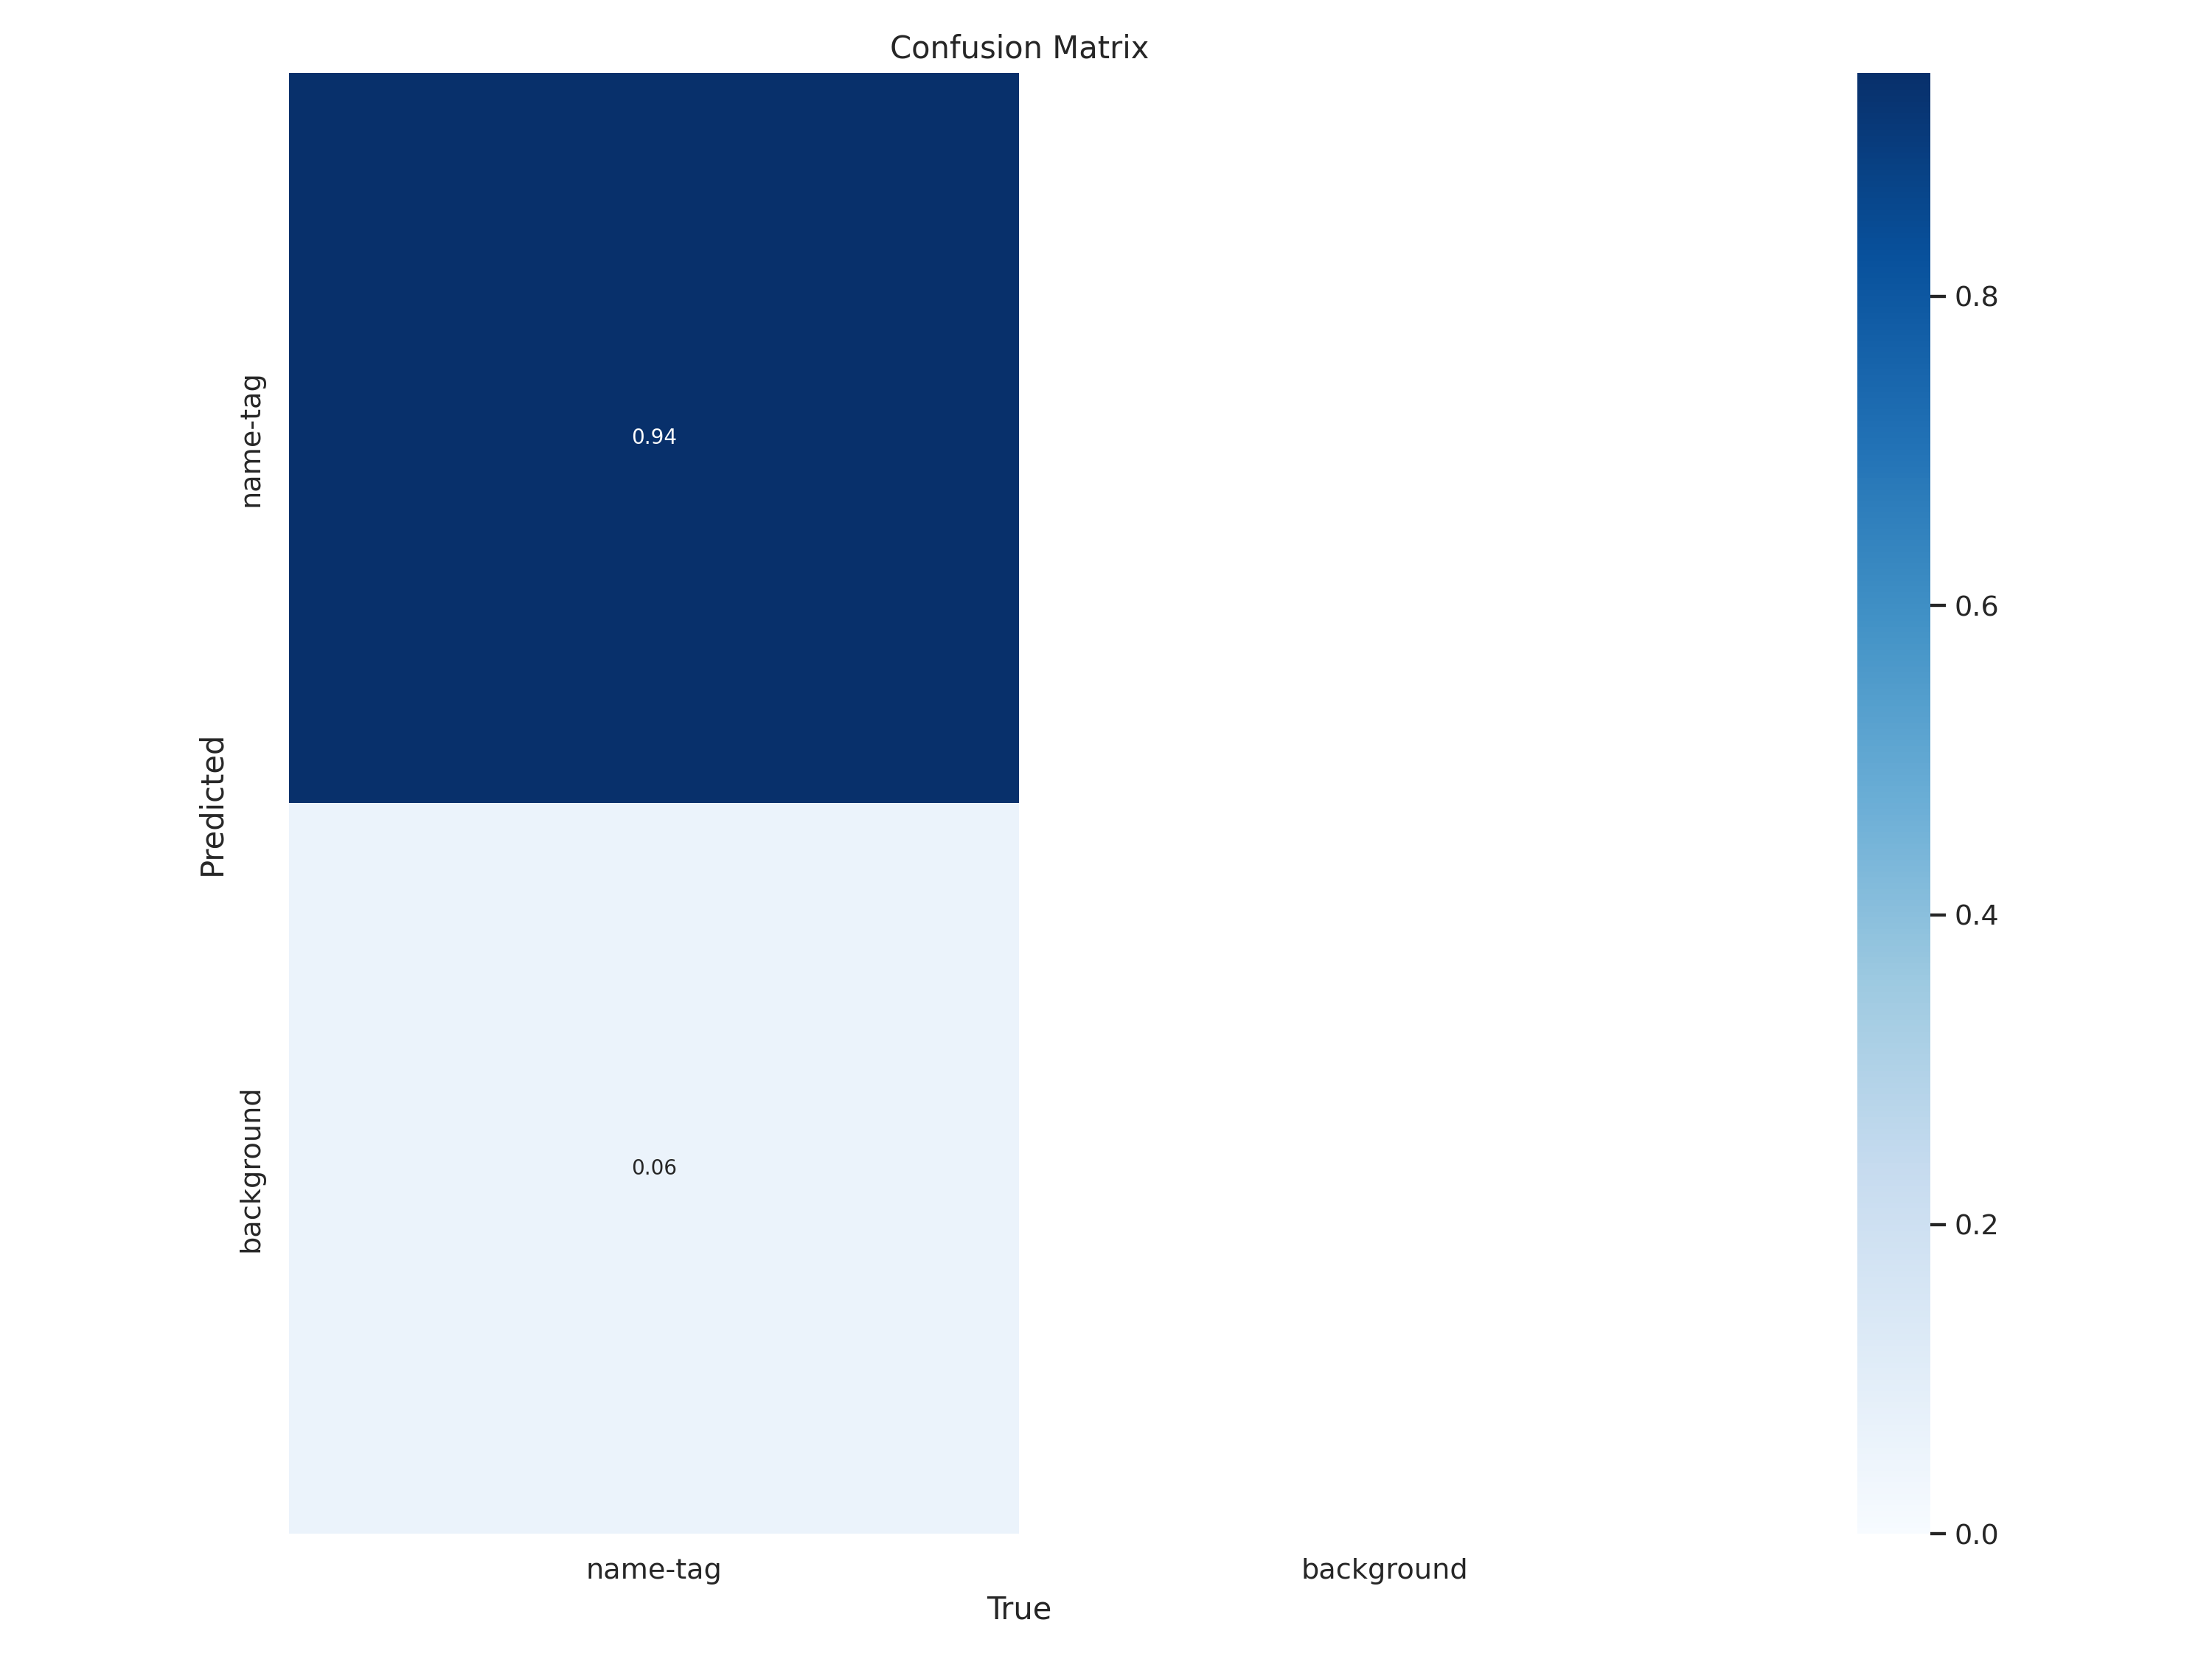

In [7]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

- show how many correct detect name-tag

/kaggle/working


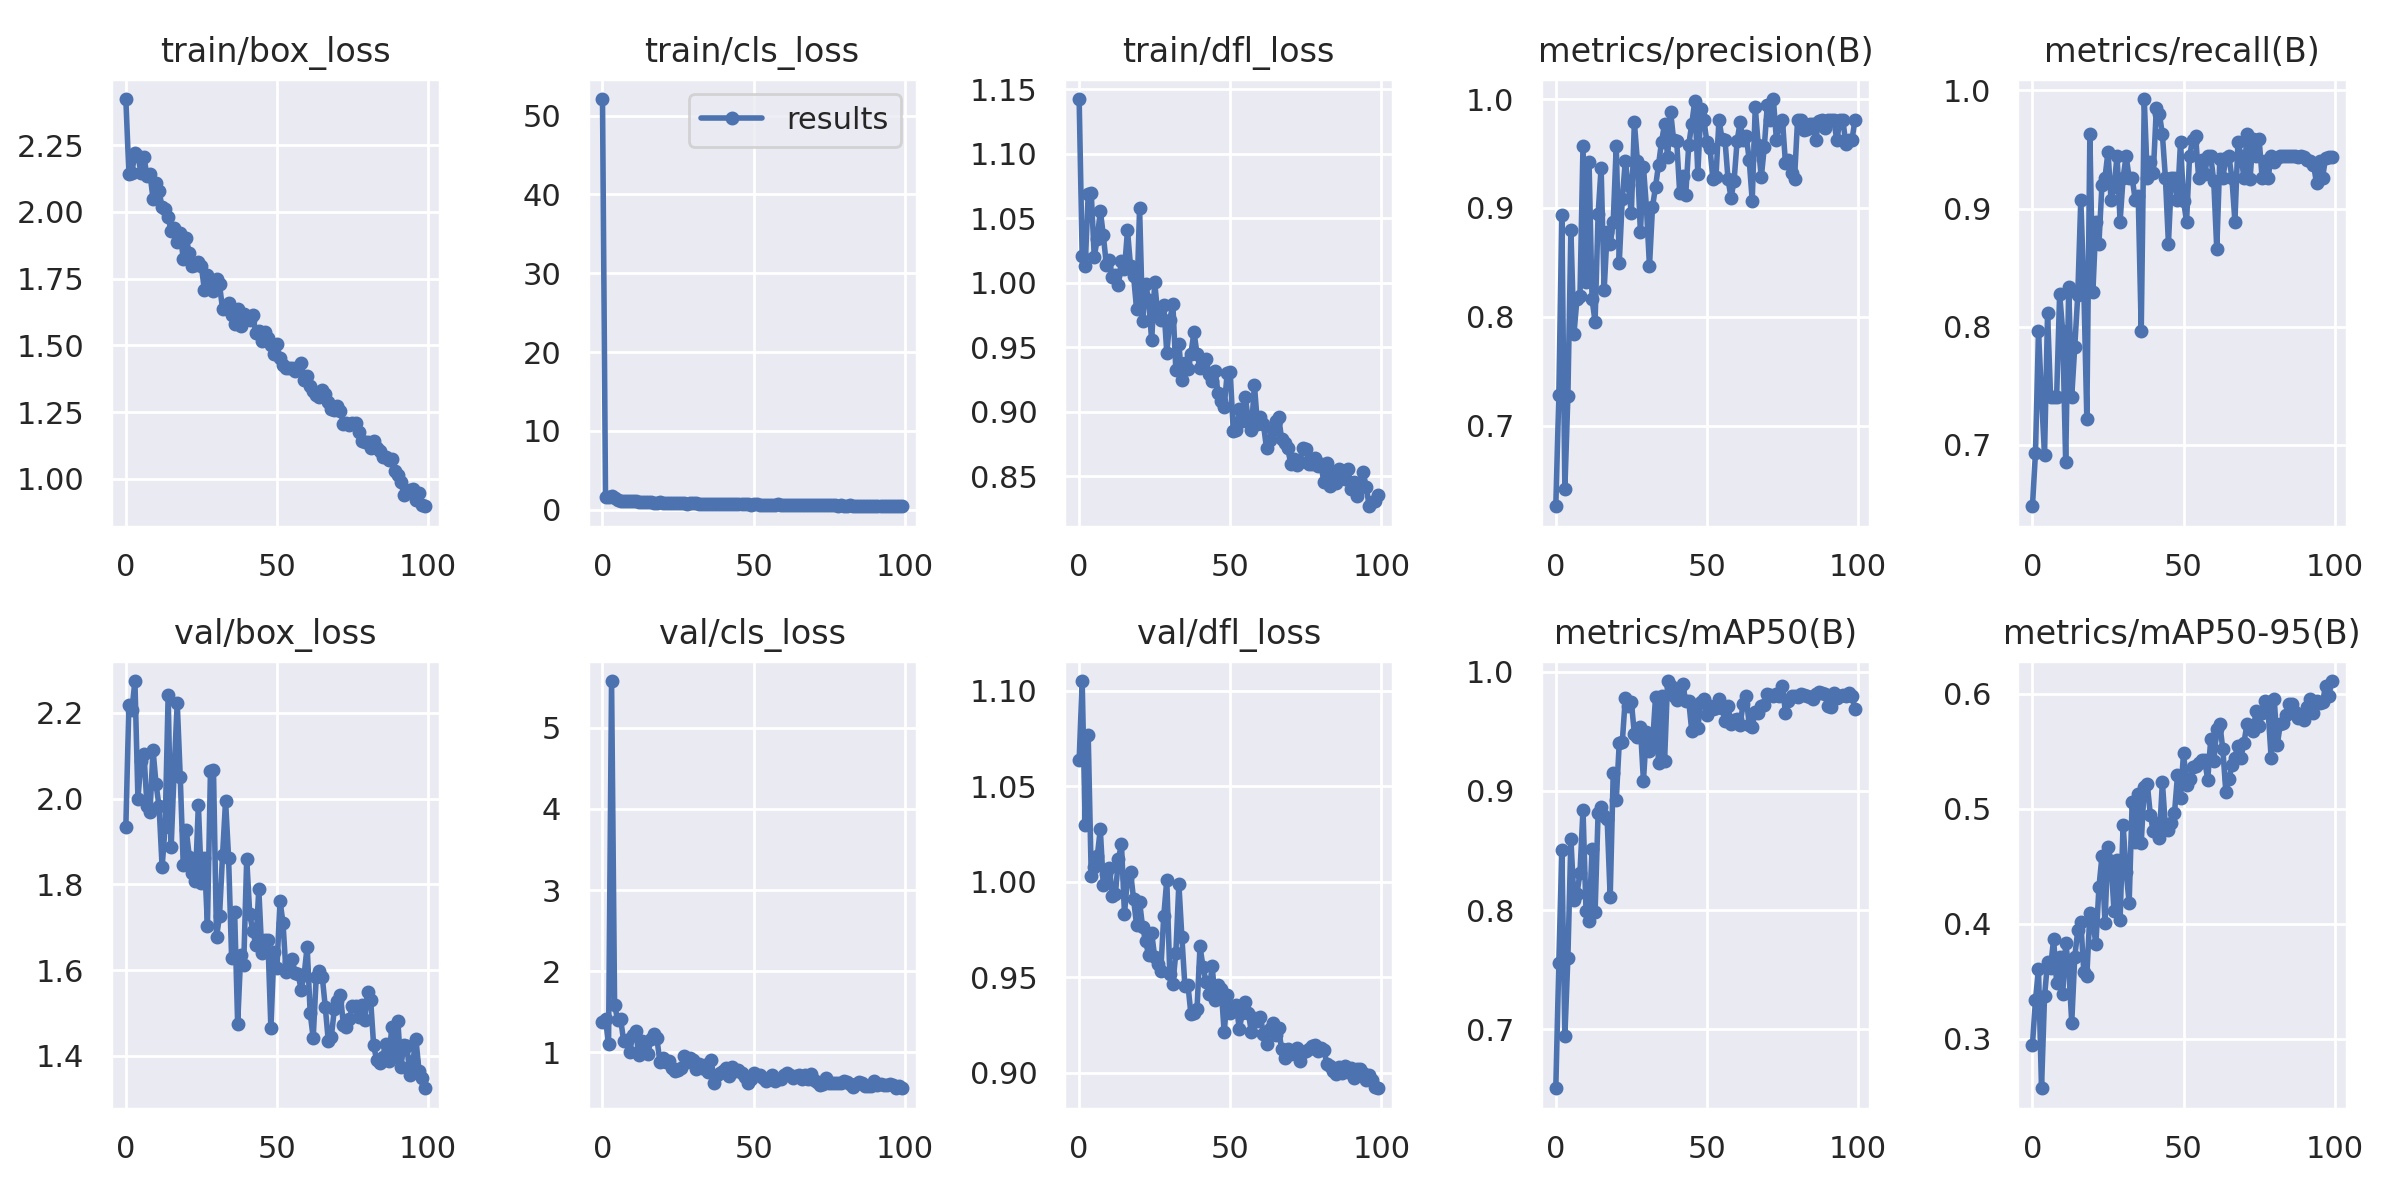

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/kaggle/working


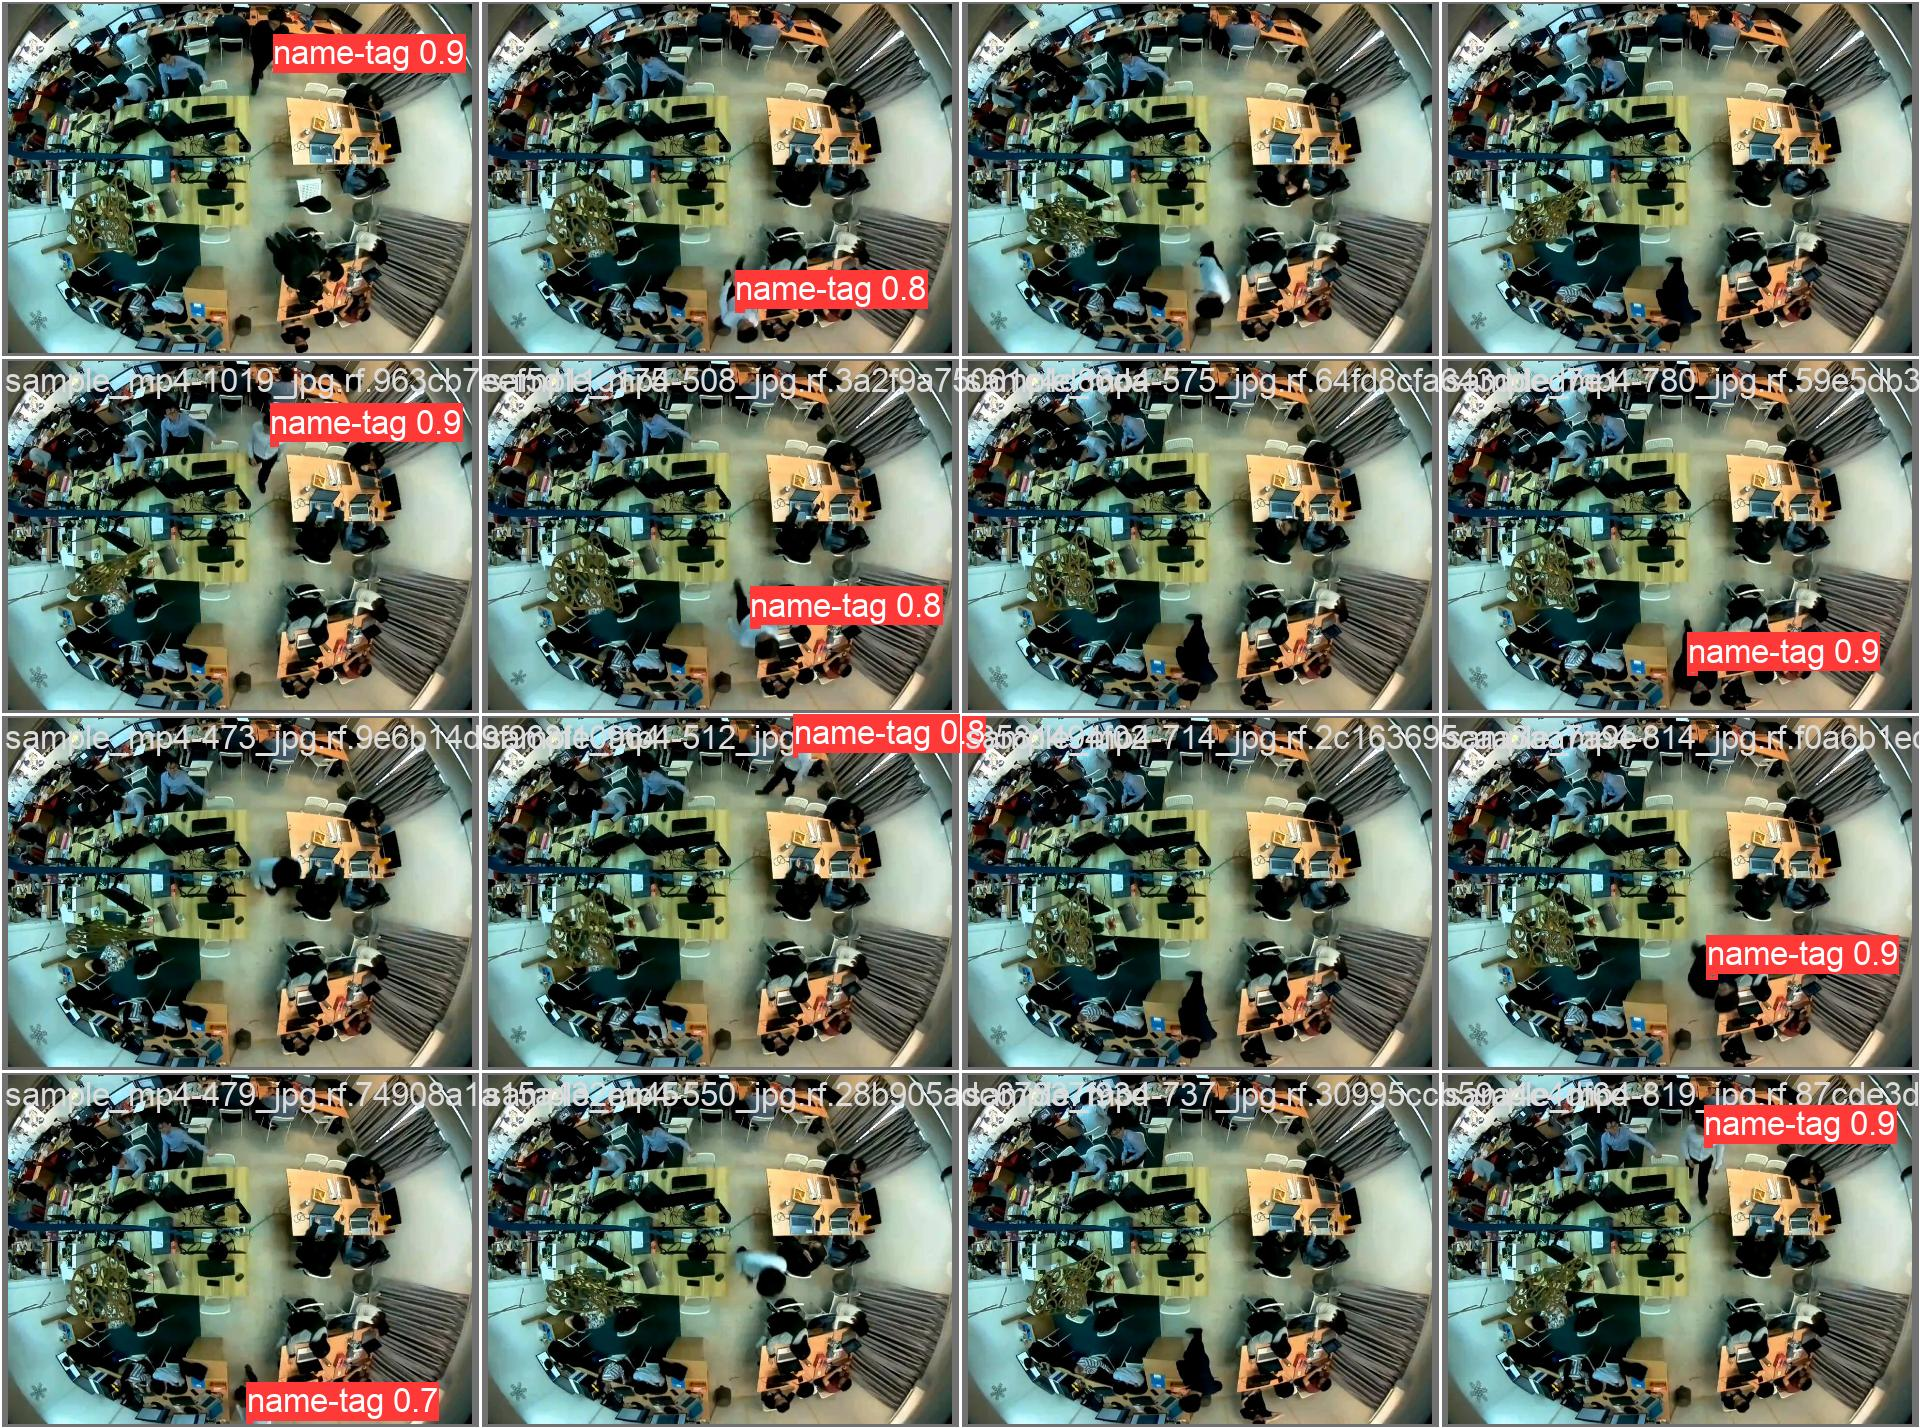

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

#### Validate the model

In [10]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/kaggle/working


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /kaggle/working/datasets/Staff-Attire-Identification-4/valid/label


                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m

                 Class     Images  Instances      Box(P          R      mAP50  m


                   all         68         54      0.981      0.943      0.981      0.618


Speed: 5.5ms pre-process, 10.2ms inference, 0.0ms loss, 0.8ms post-process per image


#### Predict with model

- predict with test set data

In [11]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/kaggle/working


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


image 1/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-1013_jpg.rf.5c7ca3f01ad3a27ca195984a7c69e58d.jpg: 736x960 1 name-tag, 64.1ms


image 2/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-1016_jpg.rf.3c16bdda6ccb99354fe5a910b215143d.jpg: 736x960 1 name-tag, 9.5ms


image 3/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-1021_jpg.rf.f373698fccf02d205e7328db248c56d2.jpg: 736x960 1 name-tag, 9.6ms
image 4/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-1025_jpg.rf.48989990eb2b347b20287dfd6f9dedf6.jpg: 736x960 1 name-tag, 9.6ms


image 5/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-1062_jpg.rf.1c6165959facf0a6143f31c7aee507d6.jpg: 736x960 1 name-tag, 12.5ms


image 6/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-1086_jpg.rf.068247a13092af2dbe9af096a9f41d84.jpg: 736x960 9.6ms


image 7/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-1105_jpg.rf.f3ad23b757d02da580840ab6b8482a42.jpg: 736x960 1 name-tag, 9.6ms


image 8/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-1108_jpg.rf.4651603da382fec65bf747d3d5e665e1.jpg: 736x960 1 name-tag, 9.6ms
image 9/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-1109_jpg.rf.1f1e9ce9aadc97031f42f07deb4c6ffe.jpg: 736x960 1 name-tag, 9.6ms


image 10/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-1114_jpg.rf.35bade76cb4bbfe0e492ad52c62518bd.jpg: 736x960 1 name-tag, 9.6ms


image 11/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-1115_jpg.rf.b92d2f87e3ca2b23a64586fbf0250b76.jpg: 736x960 1 name-tag, 9.6ms


image 12/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-1170_jpg.rf.6dd8a7461f2330750ba167e237bf510f.jpg: 736x960 1 name-tag, 9.5ms
image 13/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-1224_jpg.rf.20e3d6dc35e8e2c2a0c051075ee2e32d.jpg: 736x960 9.6ms


image 14/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-1239_jpg.rf.2f38f4f72e722cf4b6719485dd64358f.jpg: 736x960 1 name-tag, 9.5ms


image 15/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-339_jpg.rf.674661f38e2e51a2e4cdf70a6afd37c9.jpg: 736x960 1 name-tag, 9.6ms


image 16/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-381_jpg.rf.fe43268b51e6c2fde4a0da4abae3f5f3.jpg: 736x960 1 name-tag, 9.6ms


image 17/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-383_jpg.rf.707e4a37c78cb87ed7c33d9f049eb27b.jpg: 736x960 1 name-tag, 9.6ms
image 18/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-433_jpg.rf.18bc9b9595004a72a32eccd648e385dd.jpg: 736x960 1 name-tag, 9.6ms


image 19/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-474_jpg.rf.38b309e08f6cb935f2b7ece9d50af100.jpg: 736x960 1 name-tag, 9.6ms


image 20/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-509_jpg.rf.b4dea78c3a75c810ee16e8d38fd9e41d.jpg: 736x960 1 name-tag, 9.7ms


image 21/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-515_jpg.rf.b476d48ea894397b984650087f4003fe.jpg: 736x960 1 name-tag, 9.7ms
image 22/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-548_jpg.rf.cac4c7472f4f3bec01c2b7862b0fefd1.jpg: 736x960 1 name-tag, 9.6ms


image 23/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-560_jpg.rf.461de8c1676466e0ce8c75fcca5919f9.jpg: 736x960 1 name-tag, 9.6ms


image 24/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-655_jpg.rf.0f65748e8596efb33ef0166316caef64.jpg: 736x960 9.6ms
image 25/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-694_jpg.rf.b8f8cbffa8bd65e205c89227a665d524.jpg: 736x960 9.6ms


image 26/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-697_jpg.rf.9ba4ca0bbc6e404c032c357904738238.jpg: 736x960 9.6ms


image 27/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-704_jpg.rf.58e22f2c20381be071224718423b543b.jpg: 736x960 9.6ms
image 28/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-816_jpg.rf.23a2a935c52a155de520be90c5d8ff18.jpg: 736x960 1 name-tag, 9.6ms


image 29/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-837_jpg.rf.60306b9411582fb566ac4e29279ca239.jpg: 736x960 9.6ms


image 30/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-849_jpg.rf.407469a6c43f0309ecbe3e7c2943d2f7.jpg: 736x960 1 name-tag, 9.6ms


image 31/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-855_jpg.rf.e9f9fad069fb214191e3ddcca20b5567.jpg: 736x960 1 name-tag, 9.6ms
image 32/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-857_jpg.rf.79c01383afaee232833273fe6657bc7f.jpg: 736x960 1 name-tag, 9.6ms


image 33/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-971_jpg.rf.de9495dd3821e5d17b9d3f5aecb08e09.jpg: 736x960 1 name-tag, 9.5ms


image 34/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-976_jpg.rf.268671b16251ac5722d05fc063861410.jpg: 736x960 1 name-tag, 9.6ms
image 35/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-980_jpg.rf.3ef3d04afb59210f4bc403fc619b6b4a.jpg: 736x960 1 name-tag, 9.6ms


image 36/36 /kaggle/working/datasets/Staff-Attire-Identification-4/test/images/sample_mp4-984_jpg.rf.46fce2465bfd85fbc5ec324095d14733.jpg: 736x960 1 name-tag, 9.6ms
Speed: 0.8ms pre-process, 11.2ms inference, 1.3ms postprocess per image at shape (1, 3, 960, 960)
Results saved to runs/detect/predict


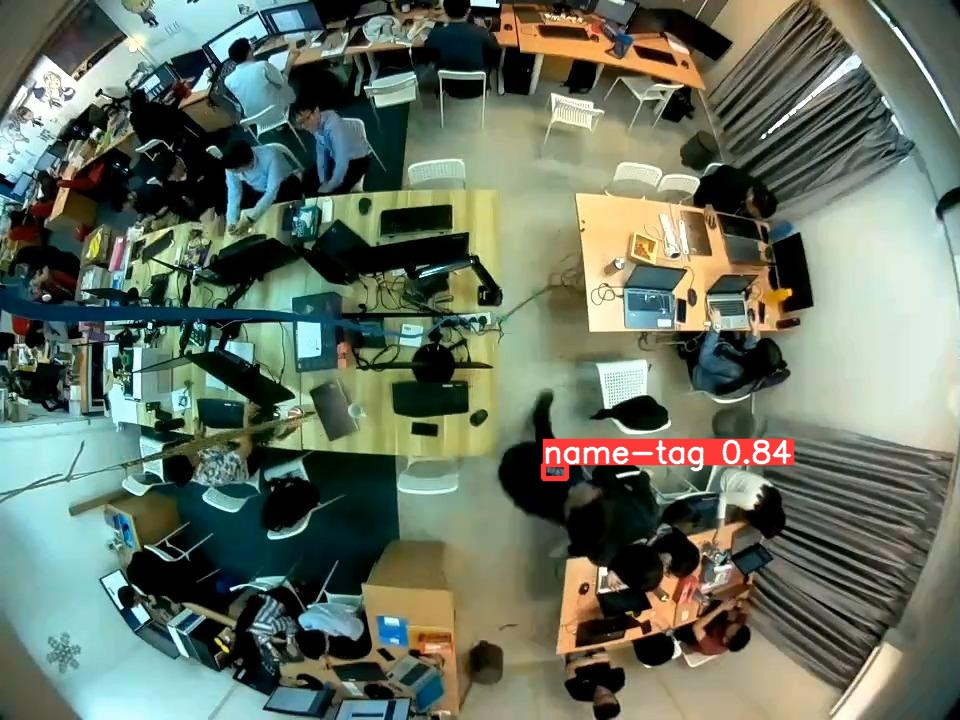

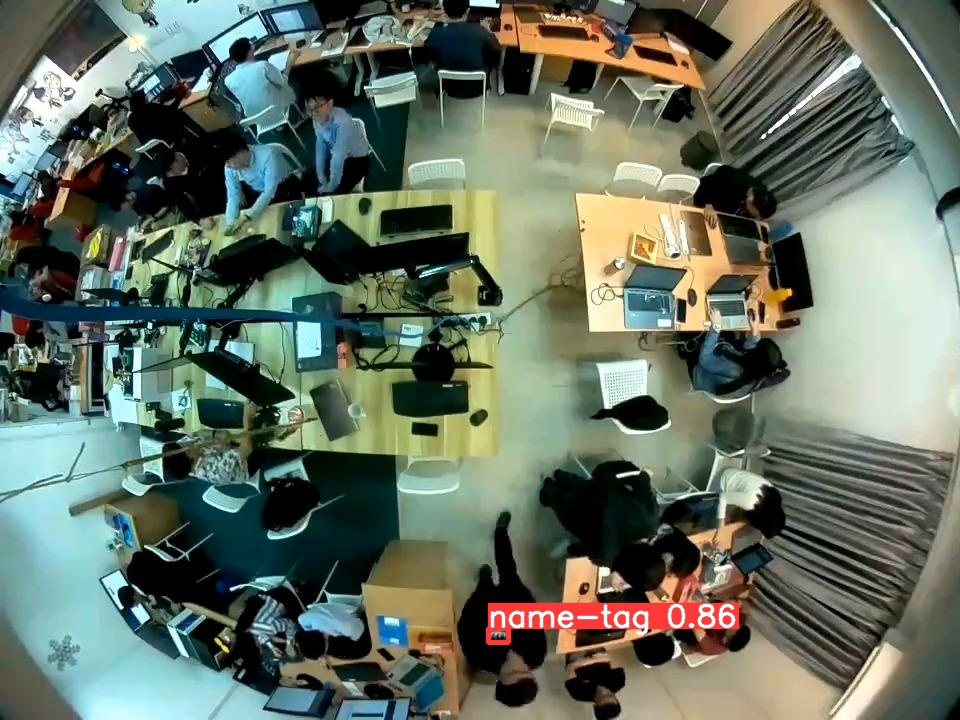

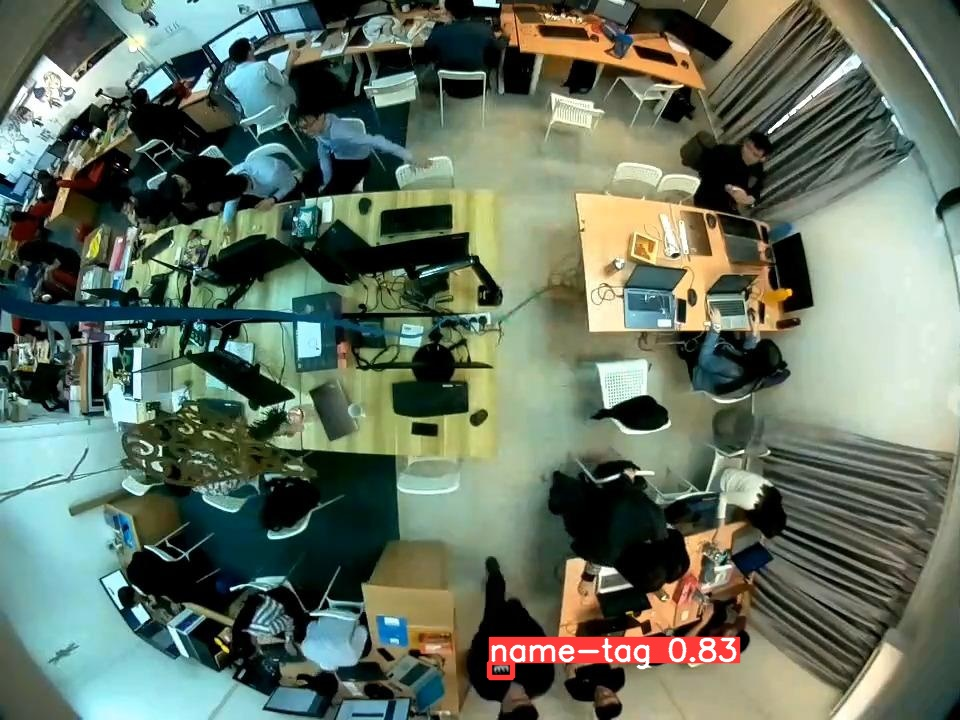

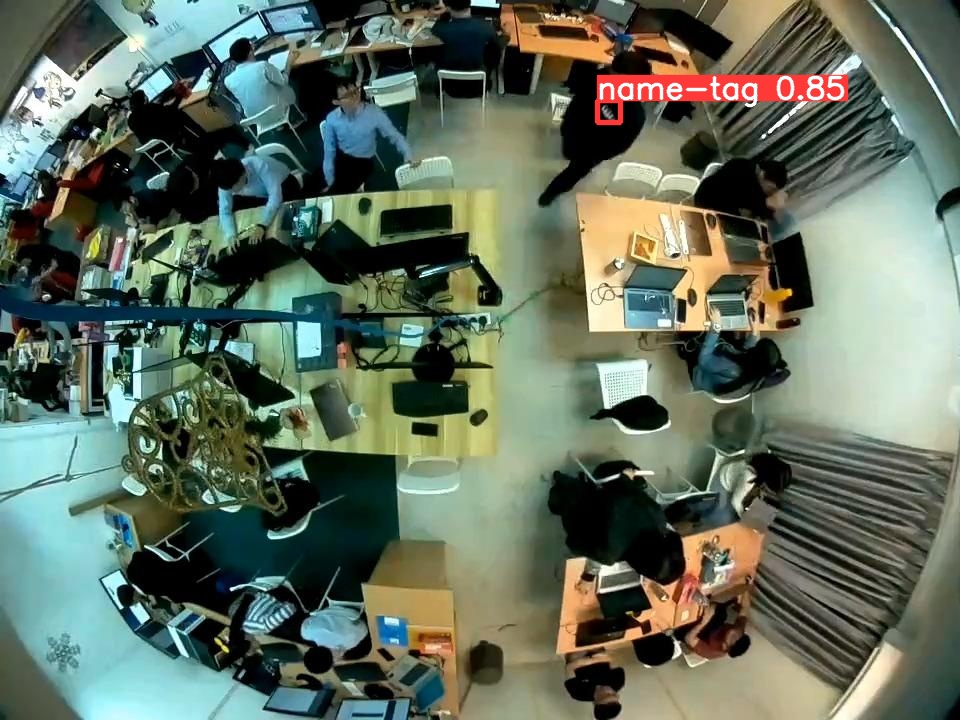

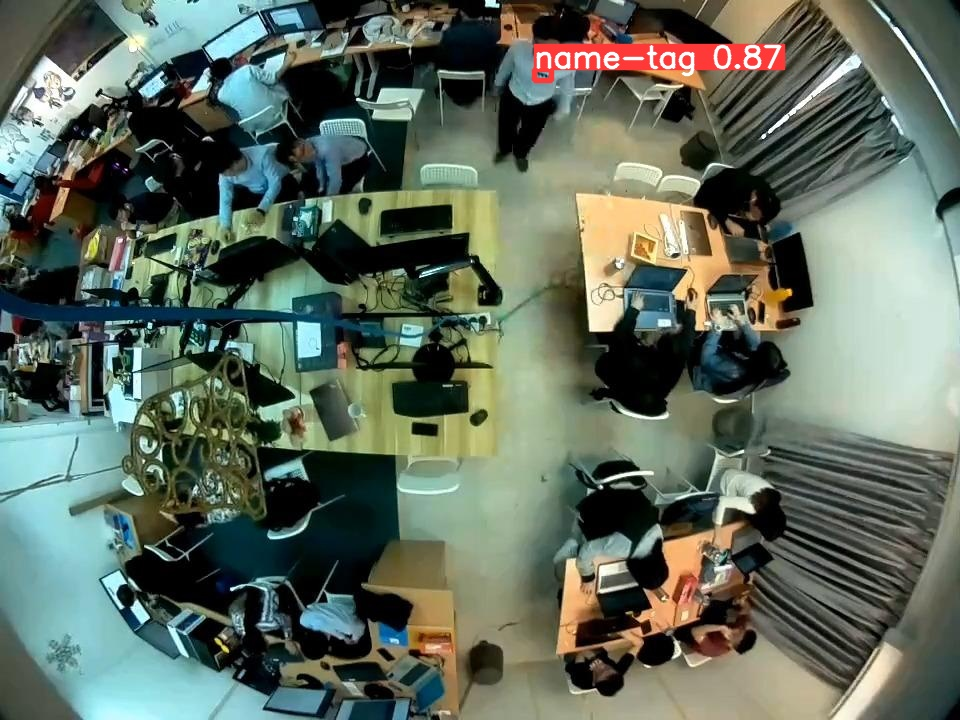

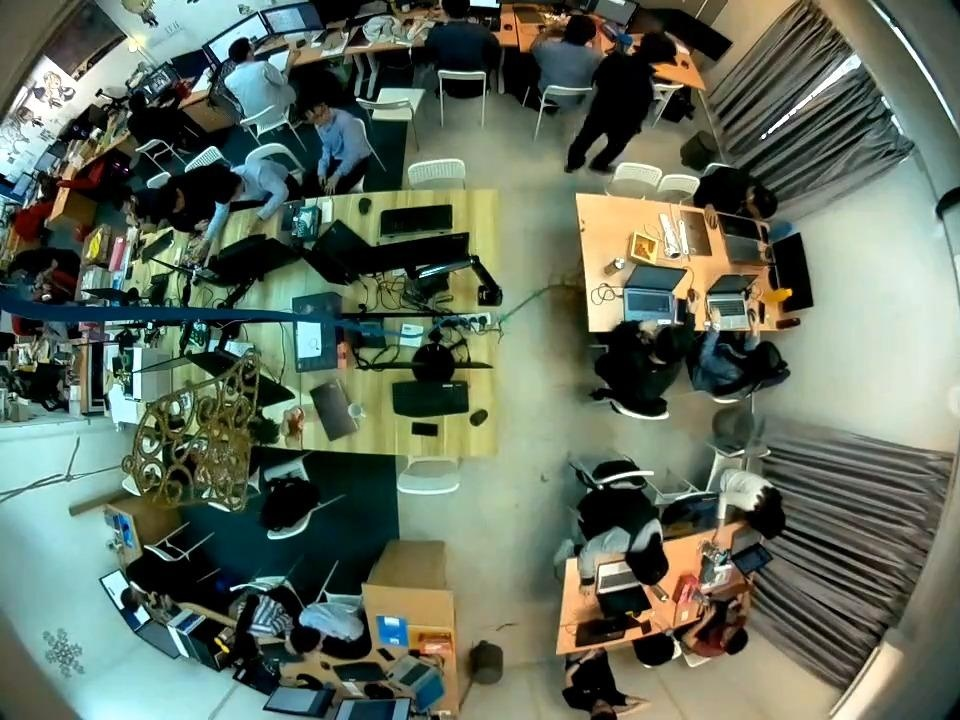

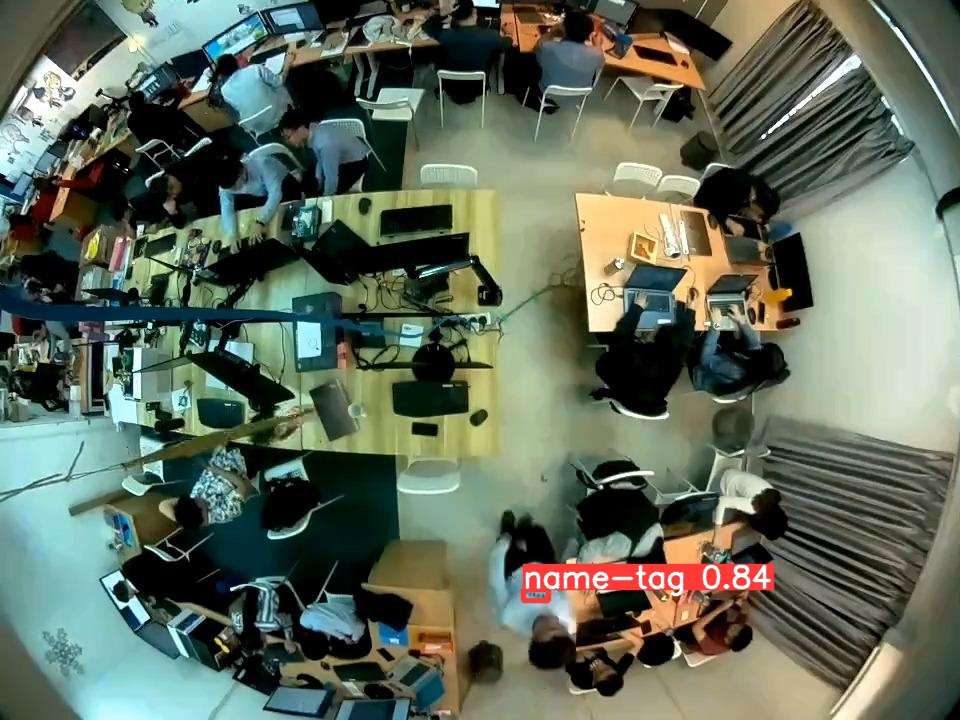

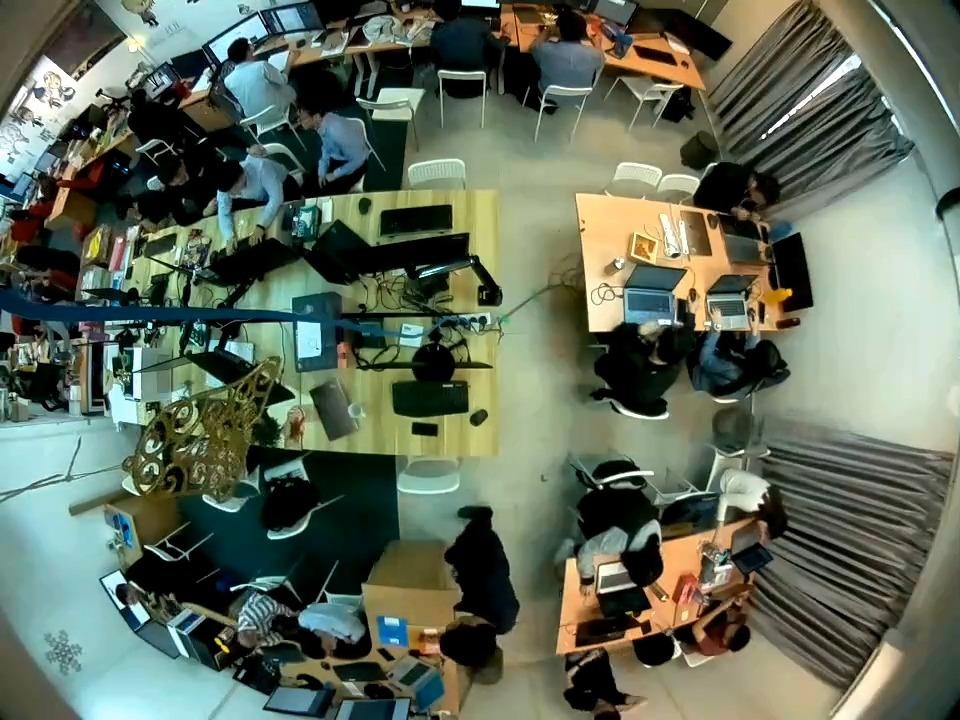

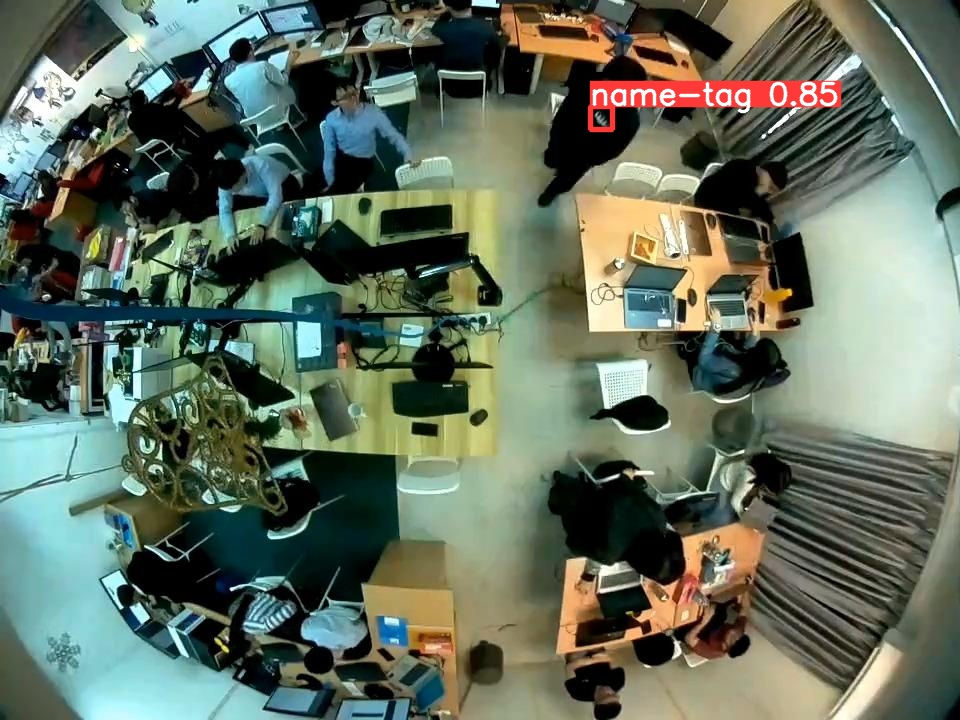

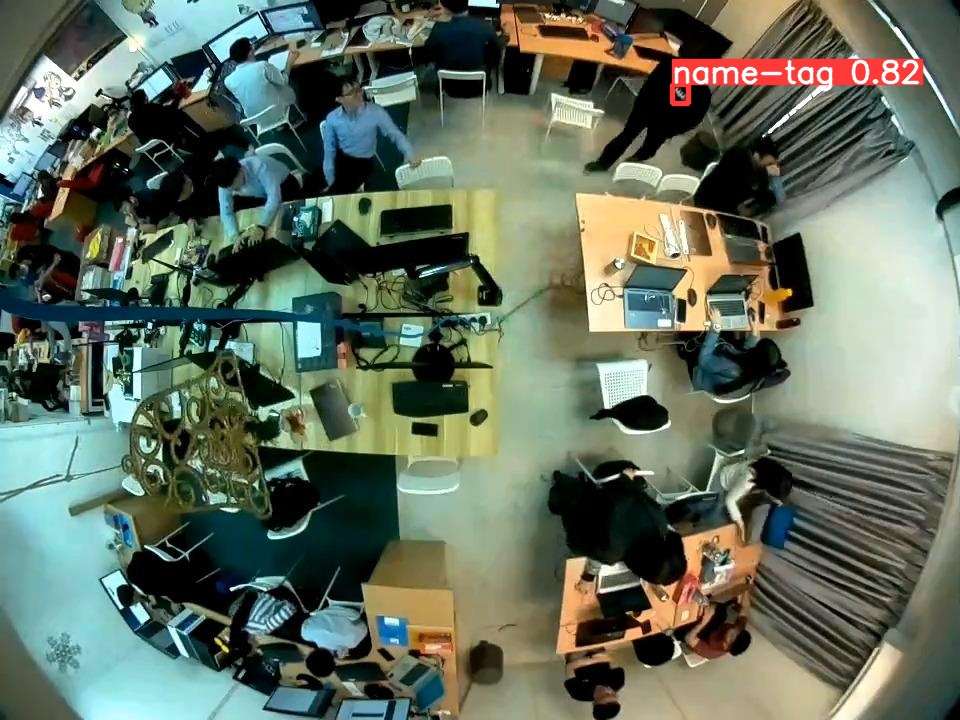

In [12]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")

- used for predict sample.mp4 video

In [13]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/kaggle/input/staff-attire-detect-sample-video/sample.mp4 save=True

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)


Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


video 1/1 (1/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 66.3ms
video 1/1 (2/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 10.6ms


video 1/1 (3/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 10.6ms
video 1/1 (4/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 10.6ms
video 1/1 (5/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 10.5ms


video 1/1 (6/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 10.5ms
video 1/1 (7/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 10.6ms


video 1/1 (8/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 10.6ms
video 1/1 (9/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 10.5ms
video 1/1 (10/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 10.5ms


video 1/1 (11/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 10.5ms
video 1/1 (12/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 10.5ms


video 1/1 (13/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 10.5ms
video 1/1 (14/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 10.6ms
video 1/1 (15/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 10.5ms


video 1/1 (16/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 10.5ms
video 1/1 (17/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.8ms
video 1/1 (18/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.8ms


video 1/1 (19/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (20/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.8ms


video 1/1 (21/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.8ms
video 1/1 (22/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (23/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (24/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (25/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (26/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (27/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (28/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.8ms
video 1/1 (29/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (30/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (31/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (32/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (33/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (34/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (35/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (36/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (37/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (38/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (39/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (40/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (41/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (42/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (43/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (44/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (45/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (46/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (47/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (48/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (49/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (50/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (51/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (52/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (53/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (54/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (55/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (56/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (57/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (58/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (59/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (60/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (61/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (62/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (63/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (64/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (65/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (66/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (67/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (68/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (69/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (70/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (71/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (72/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (73/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (74/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (75/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (76/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (77/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (78/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (79/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (80/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (81/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (82/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (83/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (84/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (85/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (86/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (87/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (88/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (89/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (90/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (91/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (92/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (93/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (94/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (95/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (96/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (97/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (98/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (99/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (100/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (101/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (102/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (103/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (104/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (105/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (106/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (107/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (108/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (109/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (110/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (111/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (112/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (113/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (114/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (115/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (116/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (117/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (118/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (119/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (120/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (121/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (122/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (123/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (124/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (125/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (126/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (127/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (128/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (129/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (130/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (131/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (132/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (133/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (134/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (135/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (136/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (137/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (138/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (139/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (140/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (141/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (142/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (143/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (144/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (145/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (146/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (147/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (148/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (149/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (150/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (151/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (152/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (153/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (154/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (155/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (156/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (157/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (158/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (159/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (160/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (161/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (162/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (163/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (164/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (165/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (166/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (167/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (168/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (169/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (170/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (171/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (172/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (173/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (174/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (175/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (176/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (177/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (178/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (179/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (180/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (181/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (182/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (183/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (184/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (185/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (186/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (187/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (188/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (189/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (190/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (191/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (192/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (193/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (194/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (195/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (196/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (197/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (198/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (199/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (200/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (201/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (202/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (203/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (204/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (205/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (206/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (207/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (208/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (209/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (210/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (211/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (212/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (213/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (214/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (215/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (216/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (217/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (218/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (219/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (220/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (221/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (222/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (223/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (224/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (225/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (226/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (227/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (228/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (229/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms


video 1/1 (230/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (231/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (232/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (233/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (234/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (235/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (236/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (237/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (238/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (239/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (240/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (241/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (242/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (243/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 11.2ms


video 1/1 (244/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 10.8ms
video 1/1 (245/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (246/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (247/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (248/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (249/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (250/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (251/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (252/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (253/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (254/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (255/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (256/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (257/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (258/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (259/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (260/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (261/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (262/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (263/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (264/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (265/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (266/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (267/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (268/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (269/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (270/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (271/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (272/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (273/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (274/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (275/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (276/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (277/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (278/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (279/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (280/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (281/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (282/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (283/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (284/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (285/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (286/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (287/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (288/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (289/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (290/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (291/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (292/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (293/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (294/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (295/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (296/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (297/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (298/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (299/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (300/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (301/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (302/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (303/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (304/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (305/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (306/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (307/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (308/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (309/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (310/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (311/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (312/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (313/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (314/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (315/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (316/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (317/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (318/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (319/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (320/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (321/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (322/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 2 name-tags, 9.6ms


video 1/1 (323/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 2 name-tags, 9.6ms
video 1/1 (324/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (325/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (326/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (327/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (328/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (329/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (330/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (331/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (332/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (333/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms


video 1/1 (334/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (335/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (336/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (337/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (338/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms


video 1/1 (339/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (340/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (341/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (342/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (343/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (344/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (345/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (346/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms


video 1/1 (347/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 2 name-tags, 9.5ms
video 1/1 (348/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (349/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (350/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (351/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (352/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (353/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (354/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (355/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (356/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (357/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (358/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (359/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (360/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (361/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (362/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (363/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (364/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (365/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (366/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (367/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (368/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (369/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (370/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (371/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (372/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (373/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (374/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (375/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (376/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (377/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (378/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (379/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (380/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (381/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (382/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (383/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (384/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (385/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (386/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (387/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (388/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (389/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (390/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (391/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (392/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (393/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (394/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (395/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (396/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (397/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (398/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (399/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (400/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (401/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (402/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (403/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (404/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (405/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (406/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (407/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (408/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (409/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (410/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (411/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (412/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (413/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (414/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (415/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (416/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (417/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (418/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (419/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (420/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (421/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (422/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (423/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (424/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (425/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (426/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (427/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (428/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (429/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (430/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (431/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (432/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (433/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (434/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (435/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (436/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (437/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (438/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (439/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (440/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (441/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (442/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (443/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (444/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (445/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (446/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (447/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (448/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (449/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (450/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (451/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (452/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (453/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (454/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (455/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (456/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (457/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (458/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (459/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (460/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (461/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (462/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (463/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (464/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (465/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (466/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (467/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (468/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (469/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (470/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (471/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (472/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (473/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (474/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.5ms
video 1/1 (475/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (476/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (477/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (478/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (479/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (480/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (481/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (482/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (483/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (484/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (485/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (486/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (487/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (488/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (489/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (490/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (491/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (492/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (493/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (494/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (495/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (496/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (497/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (498/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (499/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (500/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (501/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (502/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (503/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (504/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.5ms
video 1/1 (505/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (506/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (507/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (508/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (509/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (510/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (511/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (512/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (513/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (514/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (515/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (516/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (517/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (518/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (519/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (520/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (521/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (522/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (523/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (524/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (525/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (526/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (527/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (528/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (529/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (530/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (531/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (532/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (533/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (534/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (535/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (536/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (537/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (538/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (539/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (540/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (541/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (542/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (543/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (544/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (545/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (546/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (547/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (548/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (549/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (550/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (551/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (552/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (553/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (554/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (555/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (556/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (557/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (558/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (559/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (560/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (561/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (562/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (563/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (564/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (565/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (566/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (567/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (568/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (569/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (570/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (571/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (572/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (573/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (574/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (575/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (576/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (577/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (578/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (579/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (580/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (581/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (582/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (583/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (584/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (585/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (586/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (587/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (588/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (589/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (590/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (591/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (592/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (593/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (594/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (595/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (596/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (597/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (598/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (599/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (600/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (601/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (602/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (603/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (604/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (605/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (606/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (607/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (608/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (609/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (610/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (611/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (612/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (613/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (614/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (615/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (616/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (617/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (618/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (619/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (620/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (621/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (622/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (623/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (624/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (625/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (626/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (627/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (628/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (629/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (630/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (631/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (632/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (633/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (634/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (635/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (636/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (637/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (638/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (639/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (640/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (641/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (642/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (643/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (644/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (645/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (646/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (647/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (648/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (649/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (650/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (651/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (652/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (653/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (654/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (655/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (656/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (657/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (658/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (659/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (660/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (661/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (662/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (663/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (664/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (665/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (666/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (667/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (668/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (669/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (670/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (671/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (672/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (673/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (674/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (675/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (676/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (677/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (678/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (679/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (680/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (681/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (682/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (683/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (684/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (685/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (686/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (687/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (688/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (689/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 11.7ms


video 1/1 (690/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (691/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (692/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (693/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (694/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (695/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (696/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (697/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (698/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (699/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (700/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms


video 1/1 (701/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (702/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (703/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (704/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (705/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (706/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms


video 1/1 (707/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (708/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (709/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (710/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (711/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (712/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (713/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (714/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (715/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (716/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (717/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (718/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (719/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (720/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (721/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (722/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (723/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (724/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (725/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (726/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (727/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (728/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (729/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (730/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (731/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (732/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (733/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (734/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (735/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (736/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (737/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms


video 1/1 (738/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (739/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (740/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (741/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (742/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (743/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (744/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (745/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (746/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (747/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (748/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (749/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (750/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (751/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (752/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (753/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (754/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (755/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (756/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (757/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (758/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (759/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (760/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (761/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (762/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (763/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (764/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (765/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (766/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (767/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (768/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (769/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (770/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (771/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (772/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (773/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (774/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (775/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (776/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (777/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (778/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (779/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (780/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 10.8ms
video 1/1 (781/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (782/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (783/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 10.0ms
video 1/1 (784/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 10.1ms


video 1/1 (785/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (786/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (787/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (788/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (789/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (790/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (791/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (792/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (793/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (794/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (795/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (796/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (797/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (798/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (799/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (800/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (801/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (802/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (803/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (804/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (805/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (806/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (807/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (808/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (809/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (810/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (811/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (812/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (813/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (814/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms


video 1/1 (815/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (816/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (817/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (818/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (819/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (820/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (821/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (822/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms


video 1/1 (823/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (824/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (825/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (826/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (827/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (828/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (829/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (830/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (831/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (832/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (833/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (834/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (835/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (836/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (837/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (838/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (839/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (840/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (841/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (842/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (843/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (844/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (845/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (846/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (847/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (848/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (849/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (850/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (851/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (852/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (853/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.5ms
video 1/1 (854/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (855/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (856/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (857/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (858/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (859/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (860/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (861/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (862/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (863/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (864/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms


video 1/1 (865/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (866/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (867/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (868/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (869/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (870/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (871/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (872/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (873/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (874/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (875/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (876/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (877/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (878/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (879/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (880/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (881/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (882/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (883/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (884/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (885/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (886/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (887/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (888/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (889/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (890/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (891/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms


video 1/1 (892/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (893/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (894/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (895/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (896/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (897/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (898/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (899/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms


video 1/1 (900/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (901/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (902/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (903/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms


video 1/1 (904/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (905/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (906/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (907/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (908/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms


video 1/1 (909/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (910/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (911/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (912/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (913/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (914/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms


video 1/1 (915/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (916/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (917/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (918/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (919/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (920/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (921/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (922/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (923/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (924/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (925/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (926/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (927/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (928/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (929/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (930/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (931/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (932/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (933/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (934/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms


video 1/1 (935/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (936/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (937/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (938/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (939/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms


video 1/1 (940/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (941/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (942/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms


video 1/1 (943/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (944/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms


video 1/1 (945/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (946/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (947/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (948/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (949/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (950/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (951/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (952/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (953/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (954/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (955/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (956/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (957/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (958/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (959/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (960/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (961/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (962/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (963/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (964/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (965/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (966/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (967/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (968/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms


video 1/1 (969/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (970/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (971/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms


video 1/1 (972/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (973/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms


video 1/1 (974/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (975/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (976/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (977/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (978/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (979/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (980/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (981/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (982/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (983/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (984/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (985/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (986/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (987/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (988/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (989/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (990/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (991/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (992/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (993/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (994/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (995/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (996/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (997/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (998/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (999/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1000/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms


video 1/1 (1001/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1002/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1003/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1004/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1005/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (1006/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1007/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1008/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1009/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (1010/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1011/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1012/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1013/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1014/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1015/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1016/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1017/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1018/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1019/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1020/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (1021/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms


video 1/1 (1022/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.5ms
video 1/1 (1023/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms


video 1/1 (1024/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1025/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1026/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1027/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1028/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1029/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (1030/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1031/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (1032/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1033/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1034/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1035/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1036/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1037/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1038/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1039/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1040/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1041/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1042/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1043/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1044/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1045/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1046/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1047/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (1048/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1049/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1050/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1051/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1052/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1053/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1054/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1055/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (1056/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1057/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1058/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1059/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1060/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1061/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1062/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1063/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1064/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1065/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1066/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1067/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (1068/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1069/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1070/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1071/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1072/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1073/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1074/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.5ms
video 1/1 (1075/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1076/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1077/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1078/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1079/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1080/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1081/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1082/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1083/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1084/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1085/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (1086/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1087/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1088/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1089/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1090/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1091/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1092/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1093/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1094/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1095/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1096/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1097/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1098/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1099/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1100/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1101/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1102/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.5ms
video 1/1 (1103/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms


video 1/1 (1104/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1105/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1106/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1107/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1108/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1109/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1110/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1111/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1112/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.5ms
video 1/1 (1113/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1114/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1115/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1116/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1117/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1118/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms


video 1/1 (1119/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1120/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (1121/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1122/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1123/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1124/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1125/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1126/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (1127/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (1128/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1129/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1130/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1131/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (1132/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1133/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1134/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1135/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1136/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1137/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1138/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (1139/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1140/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1141/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1142/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1143/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1144/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1145/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1146/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1147/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1148/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1149/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1150/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1151/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (1152/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (1153/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1154/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1155/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1156/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1157/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1158/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1159/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1160/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (1161/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1162/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (1163/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1164/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1165/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (1166/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1167/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1168/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1169/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1170/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1171/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1172/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1173/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1174/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1175/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1176/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1177/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1178/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1179/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1180/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1181/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1182/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (1183/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1184/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1185/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1186/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1187/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1188/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1189/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1190/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1191/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1192/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (1193/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1194/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1195/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1196/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1197/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1198/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1199/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1200/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1201/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1202/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1203/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1204/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms


video 1/1 (1205/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1206/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1207/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1208/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1209/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1210/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1211/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1212/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1213/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1214/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1215/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1216/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1217/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (1218/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1219/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1220/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1221/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (1222/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1223/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1224/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1225/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1226/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1227/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1228/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1229/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1230/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1231/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1232/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1233/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1234/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1235/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1236/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1237/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1238/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1239/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms
video 1/1 (1240/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (1241/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1242/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.5ms
video 1/1 (1243/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.6ms


video 1/1 (1244/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 1 name-tag, 9.7ms
video 1/1 (1245/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1246/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms


video 1/1 (1247/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1248/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1249/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1250/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1251/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1252/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1253/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1254/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (1255/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (1256/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1257/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1258/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (1259/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1260/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1261/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1262/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1263/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1264/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1265/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (1266/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1267/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1268/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1269/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1270/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1271/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (1272/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1273/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1274/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1275/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1276/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1277/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1278/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1279/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1280/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1281/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1282/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1283/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1284/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1285/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1286/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1287/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1288/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1289/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1290/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1291/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1292/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1293/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1294/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1295/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms


video 1/1 (1296/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1297/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1298/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1299/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (1300/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 12.3ms


video 1/1 (1301/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1302/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1303/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms


video 1/1 (1304/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1305/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1306/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1307/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1308/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms


video 1/1 (1309/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1310/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1311/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1312/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1313/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1314/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1315/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1316/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1317/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1318/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1319/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1320/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (1321/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1322/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1323/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1324/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1325/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1326/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1327/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1328/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.7ms
video 1/1 (1329/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (1330/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1331/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.5ms
video 1/1 (1332/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1333/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1334/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1335/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1336/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1337/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1338/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms


video 1/1 (1339/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1340/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
video 1/1 (1341/1341) /kaggle/input/staff-attire-detect-sample-video/sample.mp4: 736x960 9.6ms
Speed: 0.7ms pre-process, 9.7ms inference, 0.8ms postprocess per image at shape (1, 3, 960, 960)
Results saved to runs/detect/predict2


- check the result in the saved predict folder

In [ ]:
# Created output zip file
!zip -r staff_attire_detect_output.zip /kaggle/working/